# **01. Import Library**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip3 install scikit-optimize

In [3]:
!pip install xgboost
!pip install catboost

In [4]:
bike_model1 = pd.read_csv('bike_model1.csv')
bike_testing1 = pd.read_csv('bike_testing1.csv')
bike_model2 = pd.read_csv('bike_model2.csv')
bike_testing2 = pd.read_csv('bike_testing2.csv')

In [5]:
bike_model1.isnull().sum()

temp                            0
humidity                        0
windspeed                       0
count                           0
year                            0
month                           0
day                             0
hr                              0
season_Fall                     0
season_Spring                   0
season_Summer                   0
season_Winter                   0
is_holiday_No                   0
is_holiday_Yes                  0
is_workingday_No                0
is_workingday_Yes               0
weather_condition_Clear         0
weather_condition_Cloudy        0
weather_condition_Heavy Rain    0
weather_condition_Light Rain    0
dtype: int64

In [6]:
bike_model1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16637 entries, 0 to 16636
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   temp                          16637 non-null  float64
 1   humidity                      16637 non-null  float64
 2   windspeed                     16637 non-null  float64
 3   count                         16637 non-null  int64  
 4   year                          16637 non-null  int64  
 5   month                         16637 non-null  int64  
 6   day                           16637 non-null  int64  
 7   hr                            16637 non-null  int64  
 8   season_Fall                   16637 non-null  int64  
 9   season_Spring                 16637 non-null  int64  
 10  season_Summer                 16637 non-null  int64  
 11  season_Winter                 16637 non-null  int64  
 12  is_holiday_No                 16637 non-null  int64  
 13  i

In [7]:
bike_model1.describe().transpose()

count        mean         std   min      25%  \
temp                          16637.0   20.694539    7.887134  0.82  13.9400   
humidity                      16637.0   62.475567   19.322707  0.00  47.0000   
windspeed                     16637.0   12.750740    8.168317  0.00   7.0015   
count                         16637.0  190.477009  182.026755  1.00  41.0000   
year                          16637.0    0.480375    0.499630  0.00   0.0000   
month                         16637.0    6.294164    3.310969  1.00   3.0000   
day                           16637.0   15.670313    8.782122  1.00   8.0000   
hr                            16637.0   11.547875    6.914199  0.00   6.0000   
season_Fall                   16637.0    0.270241    0.444098  0.00   0.0000   
season_Spring                 16637.0    0.239226    0.426624  0.00   0.0000   
season_Summer                 16637.0    0.265012    0.441353  0.00   0.0000   
season_Winter                 16637.0    0.225521    0.417938  0.00   0.0000   
is_holiday_No                 16637.0    0.971329    0.166885  0.00   1.0000   
is_holiday_Yes                16637.0    0.028671    0.166885  0.00   0.0000   
is_workingday_No              16637.0    0.315622    0.464777  0.00   0.0000   
is_workingday_Yes             16637.0    0.684378    0.464777  0.00   0.0000   
weather_condition_Clear       16637.0    0.665865    0.471701  0.00   0.0000   
weather_condition_Cloudy      16637.0    0.252870    0.434670  0.00   0.0000   
weather_condition_Heavy Rain  16637.0    0.000180    0.013428  0.00   0.0000   
weather_condition_Light Rain  16637.0    0.081084    0.272973  0.00   0.0000   

                                  50%       75%       max  
temp                           21.320   27.0600   41.0000  
humidity                       62.000   78.0000  100.0000  
windspeed                      12.998   16.9979   56.9969  
count                         143.000  282.0000  977.0000  
year                            0.000    1.0000    1.0000  
month                           6.000    9.0000   12.0000  
day                            16.000   23.0000   31.0000  
hr                             12.000   18.0000   23.0000  
season_Fall                     0.000    1.0000    1.0000  
season_Spring                   0.000    0.0000    1.0000  
season_Summer                   0.000    1.0000    1.0000  
season_Winter                   0.000    0.0000    1.0000  
is_holiday_No                   1.000    1.0000    1.0000  
is_holiday_Yes                  0.000    0.0000    1.0000  
is_workingday_No                0.000    1.0000    1.0000  
is_workingday_Yes               1.000    1.0000    1.0000  
weather_condition_Clear         1.000    1.0000    1.0000  
weather_condition_Cloudy        0.000    1.0000    1.0000  
weather_condition_Heavy Rain    0.000    0.0000    1.0000  
weather_condition_Light Rain    0.000    0.0000    1.0000

#**03. Data Spliting**

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train = bike_model2.drop(columns=['count'])
y_train = bike_model2['count']
X_test = bike_testing2.drop(columns=['count'])
y_test = bike_testing2['count']

# **04. Modeling**

### Machine Learning Regressor

* Linear Regression
* XGBoost
* Random Forrest
* CatBoost

In [10]:
from sklearn.linear_model import  LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor

### Metrics/scoring

In [11]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#### Training and Test Model

In [12]:
models=[LinearRegression(),XGBRegressor(random_state=123),RandomForestRegressor(random_state=123),CatBoostRegressor(random_state=123)]
model_names=['Linear Regresion','XGBRegressor','RandomForestRegressor','CatBoost']
rmse_train=[]
r2_train=[]
mae_train=[]
rmse_test=[]
r2_test=[]
mae_test=[]
d={}
for model in range (len(models)):
    reg=models[model]
    reg.fit(X_train,y_train)
    y_pred_train=reg.predict(X_train)

    #obtaining scoring for training
    rmse_train.append(np.sqrt(mean_squared_error(y_train,y_pred_train)))
    r2_train.append(r2_score(y_train,y_pred_train))
    mae_train.append(mean_absolute_error(y_train,y_pred_train))

    #obtaining scoring for training
    y_pred_test=reg.predict(X_test)
    rmse_test.append(np.sqrt(mean_squared_error(y_test,y_pred_test)))
    r2_test.append(r2_score(y_test,y_pred_test))
    mae_test.append(mean_absolute_error(y_test,y_pred_test))


d={'Modelling Algo':model_names,'RMSE_train':rmse_train, 'RMSE_test':rmse_test, 'MAE_Score_train':mae_train, 'MAE_Score_test':mae_test, 'R2_Score_train':r2_train, 'R2_Score_test':r2_test}   
d

Learning rate set to 0.060892
0:	learn: 147.0674021	total: 141ms	remaining: 2m 20s
1:	learn: 141.9242175	total: 144ms	remaining: 1m 11s
2:	learn: 137.2214864	total: 147ms	remaining: 49s
3:	learn: 132.7375082	total: 151ms	remaining: 37.5s
4:	learn: 128.4767259	total: 154ms	remaining: 30.6s
5:	learn: 124.4446929	total: 157ms	remaining: 26s
6:	learn: 121.0071378	total: 160ms	remaining: 22.7s
7:	learn: 116.7143895	total: 163ms	remaining: 20.2s
8:	learn: 113.5409118	total: 166ms	remaining: 18.3s
9:	learn: 110.8675184	total: 170ms	remaining: 16.8s
10:	learn: 108.3839916	total: 173ms	remaining: 15.5s
11:	learn: 105.2265194	total: 176ms	remaining: 14.5s
12:	learn: 102.7374245	total: 179ms	remaining: 13.6s
13:	learn: 100.7306562	total: 183ms	remaining: 12.9s
14:	learn: 98.9182198	total: 187ms	remaining: 12.2s
15:	learn: 96.0988914	total: 190ms	remaining: 11.7s
16:	learn: 93.2966889	total: 193ms	remaining: 11.2s
17:	learn: 91.4031686	total: 197ms	remaining: 10.7s
18:	learn: 89.6171029	total: 200

173:	learn: 42.0641967	total: 712ms	remaining: 3.38s
174:	learn: 42.0079074	total: 715ms	remaining: 3.37s
175:	learn: 41.9791384	total: 718ms	remaining: 3.36s
176:	learn: 41.9193738	total: 721ms	remaining: 3.35s
177:	learn: 41.8646701	total: 725ms	remaining: 3.35s
178:	learn: 41.7912370	total: 728ms	remaining: 3.34s
179:	learn: 41.7326856	total: 731ms	remaining: 3.33s
180:	learn: 41.6981807	total: 734ms	remaining: 3.32s
181:	learn: 41.6571277	total: 737ms	remaining: 3.31s
182:	learn: 41.6201223	total: 741ms	remaining: 3.31s
183:	learn: 41.5482152	total: 744ms	remaining: 3.3s
184:	learn: 41.4397259	total: 748ms	remaining: 3.29s
185:	learn: 41.4000982	total: 751ms	remaining: 3.29s
186:	learn: 41.3610702	total: 754ms	remaining: 3.28s
187:	learn: 41.3112465	total: 757ms	remaining: 3.27s
188:	learn: 41.2551443	total: 761ms	remaining: 3.26s
189:	learn: 41.1677072	total: 764ms	remaining: 3.26s
190:	learn: 41.1199041	total: 767ms	remaining: 3.25s
191:	learn: 41.0733728	total: 770ms	remaining: 

335:	learn: 36.4004864	total: 1.25s	remaining: 2.46s
336:	learn: 36.3773553	total: 1.25s	remaining: 2.46s
337:	learn: 36.3581552	total: 1.25s	remaining: 2.46s
338:	learn: 36.3384257	total: 1.26s	remaining: 2.45s
339:	learn: 36.3164665	total: 1.26s	remaining: 2.45s
340:	learn: 36.3089584	total: 1.26s	remaining: 2.44s
341:	learn: 36.2822089	total: 1.27s	remaining: 2.44s
342:	learn: 36.2595699	total: 1.27s	remaining: 2.43s
343:	learn: 36.2458389	total: 1.27s	remaining: 2.43s
344:	learn: 36.2075990	total: 1.28s	remaining: 2.42s
345:	learn: 36.1860994	total: 1.28s	remaining: 2.42s
346:	learn: 36.1593239	total: 1.28s	remaining: 2.42s
347:	learn: 36.1304016	total: 1.29s	remaining: 2.41s
348:	learn: 36.1030981	total: 1.29s	remaining: 2.41s
349:	learn: 36.0774892	total: 1.29s	remaining: 2.4s
350:	learn: 36.0525376	total: 1.3s	remaining: 2.4s
351:	learn: 36.0201869	total: 1.3s	remaining: 2.39s
352:	learn: 36.0054098	total: 1.3s	remaining: 2.39s
353:	learn: 35.9869116	total: 1.31s	remaining: 2.38

502:	learn: 33.5795410	total: 1.79s	remaining: 1.77s
503:	learn: 33.5693155	total: 1.79s	remaining: 1.76s
504:	learn: 33.5519146	total: 1.8s	remaining: 1.76s
505:	learn: 33.5313812	total: 1.8s	remaining: 1.76s
506:	learn: 33.5285888	total: 1.8s	remaining: 1.75s
507:	learn: 33.5128707	total: 1.81s	remaining: 1.75s
508:	learn: 33.4975430	total: 1.81s	remaining: 1.75s
509:	learn: 33.4827936	total: 1.81s	remaining: 1.74s
510:	learn: 33.4747397	total: 1.82s	remaining: 1.74s
511:	learn: 33.4622372	total: 1.82s	remaining: 1.73s
512:	learn: 33.4488208	total: 1.82s	remaining: 1.73s
513:	learn: 33.4310987	total: 1.83s	remaining: 1.73s
514:	learn: 33.4194157	total: 1.83s	remaining: 1.72s
515:	learn: 33.4090492	total: 1.83s	remaining: 1.72s
516:	learn: 33.3993901	total: 1.84s	remaining: 1.72s
517:	learn: 33.3888477	total: 1.84s	remaining: 1.71s
518:	learn: 33.3796487	total: 1.84s	remaining: 1.71s
519:	learn: 33.3645803	total: 1.84s	remaining: 1.7s
520:	learn: 33.3550047	total: 1.85s	remaining: 1.7

661:	learn: 31.7106708	total: 2.31s	remaining: 1.18s
662:	learn: 31.6916308	total: 2.31s	remaining: 1.18s
663:	learn: 31.6760229	total: 2.32s	remaining: 1.17s
664:	learn: 31.6558198	total: 2.32s	remaining: 1.17s
665:	learn: 31.6473453	total: 2.33s	remaining: 1.17s
666:	learn: 31.6361774	total: 2.33s	remaining: 1.16s
667:	learn: 31.6283612	total: 2.33s	remaining: 1.16s
668:	learn: 31.6204713	total: 2.33s	remaining: 1.16s
669:	learn: 31.6110016	total: 2.34s	remaining: 1.15s
670:	learn: 31.6006694	total: 2.34s	remaining: 1.15s
671:	learn: 31.5838529	total: 2.35s	remaining: 1.14s
672:	learn: 31.5668476	total: 2.35s	remaining: 1.14s
673:	learn: 31.5605797	total: 2.35s	remaining: 1.14s
674:	learn: 31.5446442	total: 2.35s	remaining: 1.13s
675:	learn: 31.5389252	total: 2.36s	remaining: 1.13s
676:	learn: 31.5278655	total: 2.36s	remaining: 1.13s
677:	learn: 31.5180006	total: 2.37s	remaining: 1.12s
678:	learn: 31.5078401	total: 2.37s	remaining: 1.12s
679:	learn: 31.5022097	total: 2.37s	remaining:

823:	learn: 30.1830384	total: 2.84s	remaining: 607ms
824:	learn: 30.1751095	total: 2.84s	remaining: 603ms
825:	learn: 30.1658129	total: 2.85s	remaining: 600ms
826:	learn: 30.1575261	total: 2.85s	remaining: 597ms
827:	learn: 30.1422203	total: 2.85s	remaining: 593ms
828:	learn: 30.1366964	total: 2.86s	remaining: 590ms
829:	learn: 30.1272171	total: 2.86s	remaining: 586ms
830:	learn: 30.1207462	total: 2.87s	remaining: 583ms
831:	learn: 30.1055022	total: 2.87s	remaining: 579ms
832:	learn: 30.0950264	total: 2.87s	remaining: 576ms
833:	learn: 30.0869519	total: 2.88s	remaining: 572ms
834:	learn: 30.0783476	total: 2.88s	remaining: 569ms
835:	learn: 30.0765286	total: 2.88s	remaining: 565ms
836:	learn: 30.0674659	total: 2.88s	remaining: 562ms
837:	learn: 30.0600335	total: 2.89s	remaining: 558ms
838:	learn: 30.0543092	total: 2.89s	remaining: 555ms
839:	learn: 30.0316582	total: 2.89s	remaining: 551ms
840:	learn: 30.0112335	total: 2.9s	remaining: 548ms
841:	learn: 30.0011324	total: 2.9s	remaining: 5

984:	learn: 28.8689312	total: 3.37s	remaining: 51.3ms
985:	learn: 28.8605458	total: 3.37s	remaining: 47.9ms
986:	learn: 28.8467286	total: 3.38s	remaining: 44.5ms
987:	learn: 28.8414899	total: 3.38s	remaining: 41ms
988:	learn: 28.8297966	total: 3.38s	remaining: 37.6ms
989:	learn: 28.8221627	total: 3.39s	remaining: 34.2ms
990:	learn: 28.8167074	total: 3.39s	remaining: 30.8ms
991:	learn: 28.8077357	total: 3.39s	remaining: 27.4ms
992:	learn: 28.7948884	total: 3.4s	remaining: 23.9ms
993:	learn: 28.7869900	total: 3.4s	remaining: 20.5ms
994:	learn: 28.7750178	total: 3.4s	remaining: 17.1ms
995:	learn: 28.7679603	total: 3.4s	remaining: 13.7ms
996:	learn: 28.7624625	total: 3.41s	remaining: 10.3ms
997:	learn: 28.7544027	total: 3.41s	remaining: 6.84ms
998:	learn: 28.7484845	total: 3.42s	remaining: 3.42ms
999:	learn: 28.7383761	total: 3.42s	remaining: 0us


{'Modelling Algo': ['Linear Regresion',
  'XGBRegressor',
  'RandomForestRegressor',
  'CatBoost'],
 'RMSE_train': [119.149897483233,
  24.56827303376076,
  14.369773171355872,
  28.73837611230686],
 'RMSE_test': [183.44819642957694,
  78.00212730056477,
  79.58261415951785,
  69.1071982105948],
 'MAE_Score_train': [89.40506236978047,
  16.436790760526915,
  8.91936873253329,
  19.213923073149616],
 'MAE_Score_test': [142.67058784883864,
  54.052393556780274,
  53.079136773451,
  46.65024400645811],
 'R2_Score_train': [0.3901099025913334,
  0.9740693444852502,
  0.9911291739842301,
  0.964519585529915],
 'R2_Score_test': [0.3070812348878247,
  0.8747238713283609,
  0.8695957241286648,
  0.901666385785067]}

## Comparing Metrics/Scoring from Training Model

In [13]:
# data spliting for 1 month
model1 = pd.DataFrame(d)
model1

Modelling Algo  RMSE_train   RMSE_test  MAE_Score_train  \
0       Linear Regresion  119.149897  183.448196        89.405062   
1           XGBRegressor   24.568273   78.002127        16.436791   
2  RandomForestRegressor   14.369773   79.582614         8.919369   
3               CatBoost   28.738376   69.107198        19.213923   

   MAE_Score_test  R2_Score_train  R2_Score_test  
0      142.670588        0.390110       0.307081  
1       54.052394        0.974069       0.874724  
2       53.079137        0.991129       0.869596  
3       46.650244        0.964520       0.901666

### R2 Score

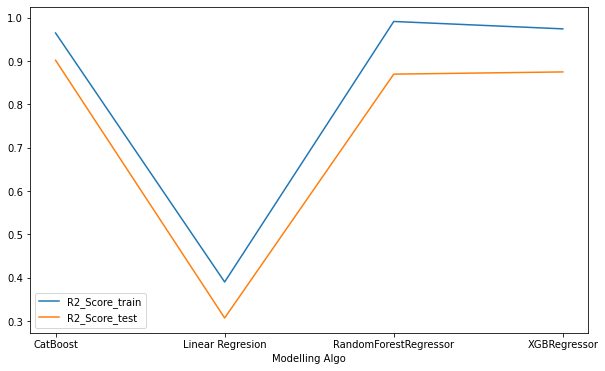

In [14]:
fig, ax = plt.subplots(figsize=(10,6))       
g1 =sns.lineplot(data=model1, x='Modelling Algo', y='R2_Score_train',label=None)
g1.set(ylabel=None)
g2 = sns.lineplot(data=model1, x='Modelling Algo', y='R2_Score_test',label=None)
g2.set(ylabel=None)
plt.legend(['R2_Score_train','R2_Score_test'])
plt.show()

### RMSE

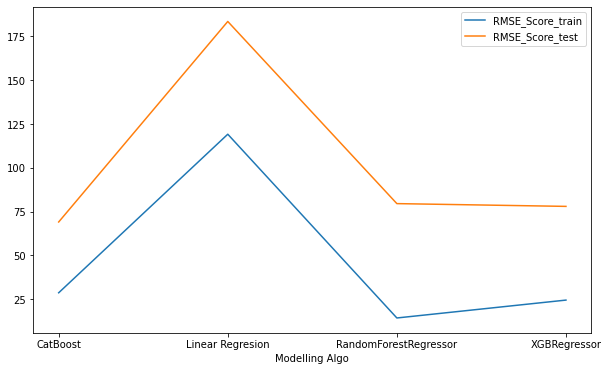

In [15]:
fig, ax = plt.subplots(figsize=(10,6))       
g1 = sns.lineplot(data=model1, x='Modelling Algo', y='RMSE_train')
g1.set(ylabel=None)
g2 = sns.lineplot(data=model1, x='Modelling Algo', y='RMSE_test')
g1.set(ylabel=None)
plt.legend(['RMSE_Score_train','RMSE_Score_test'])
plt.show()

### MAE

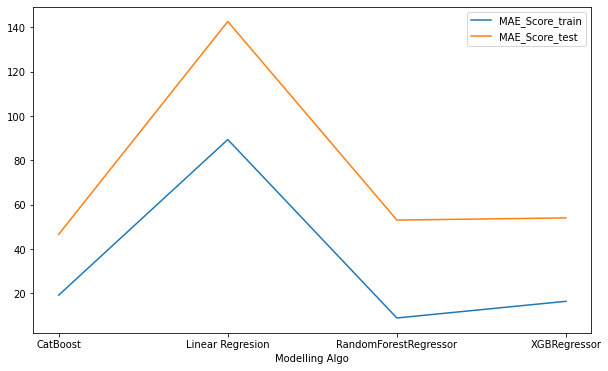

In [16]:
fig, ax = plt.subplots(figsize=(10,6))       
g1 = sns.lineplot(data=model1, x='Modelling Algo', y='MAE_Score_train')
g1.set(ylabel=None)
g2 = sns.lineplot(data=model1, x='Modelling Algo', y='MAE_Score_test')
g1.set(ylabel=None)
plt.legend(['MAE_Score_train','MAE_Score_test'])
plt.show()

Based on comparison for each model:
1. We see the base model (linear regression) has a very low r2 score and the highest rmse & mae score. So we conclude that linear regression is underfit and cannot be used for modeling
2. Random Forest algorithm has a quite large gap between model training and model testing. We conclude based on this gap that Random Forest is overfitting.
3. XGBoost algorithm and CatBoost has a similarity in performance. Both are less overfit than Random Forest.

We will use XGBoost and CatBoost in HyperParameter Tuning in order to achive better performance model.

#**05. Hyperparameter Tunning**

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV


## XGBRegressor Hyperparameter tunning

#### XGB Parameter tunning

In [18]:
param_grid = {"learning_rate"    : [0.10, 0.20, 0.30 ] ,
 "max_depth"        : [ 4, 6, 8, 10],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ], 
 "n_estimators"     : [200,500,1000,2000]}

### Cross Validation

In [19]:
folds = KFold(n_splits = 5)

### XGB BayesianSearchCV

In [20]:
XGB_bayes_search = BayesSearchCV(
    XGBRegressor(random_state=123),
    param_grid,
    cv=folds)

%time XGB_bayes_search.fit(X_train, y_train)

Wall time: 11min 19s


BayesSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
              estimator=XGBRegressor(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, m...straints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=123,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
            

In [21]:
XGB_bayes_search.best_params_

OrderedDict([('colsample_bytree', 0.3),
             ('learning_rate', 0.1),
             ('max_depth', 4),
             ('n_estimators', 2000)])

In [22]:
XGB_bayes_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=2000, n_jobs=12, num_parallel_tree=1,
             random_state=123, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [23]:
XGB_best_bayes = XGB_bayes_search.best_estimator_

In [24]:
XGB_best_bayes.fit(X_train, y_train)

XGB_bayes_y_pred = XGB_best_bayes.predict(X_test)
XGB_bayes_r2 = r2_score(y_test,XGB_bayes_y_pred )
XGB_bayes_RMSE = np.sqrt(mean_squared_error(y_test,XGB_bayes_y_pred))
XGB_bayes_MAE = mean_absolute_error(y_test,XGB_bayes_y_pred) 

In [25]:
print('R-squared XGB_bayes :',XGB_bayes_r2)
print('RMSE XGB_bayes :',XGB_bayes_RMSE)
print('MAE XGB_bayes :', XGB_bayes_MAE)

R-squared XGB_bayes : 0.8810799887293851
RMSE XGB_bayes : 75.99757870814999
MAE XGB_bayes : 54.159644813062975


## CatBoost Regressor Hyperparameter Tunning

In [26]:
param_bayes_cat= {  'depth'         : [4,6,8,10],
                  'learning_rate' : [0.01, 0.05, 0.1, 0.2, 0.3],
                  'iterations'    : [150, 200, 250, 300],
                  'l2_leaf_reg'   : [None, 1.0, 5.5, 0.5]
                 }

### CatBoost Bayesian Search CV

In [27]:
cat_bayes_search = BayesSearchCV(
    CatBoostRegressor(random_state=123),
    param_bayes_cat,
    cv=folds
)

%time cat_bayes_search.fit(X_train, y_train)

0:	learn: 155.4723760	total: 2.94ms	remaining: 734ms
1:	learn: 150.7307785	total: 5.86ms	remaining: 727ms
2:	learn: 146.6150799	total: 8.67ms	remaining: 714ms
3:	learn: 142.6497300	total: 11.4ms	remaining: 703ms
4:	learn: 138.1332615	total: 14.1ms	remaining: 693ms
5:	learn: 134.8319850	total: 16.8ms	remaining: 683ms
6:	learn: 131.4582602	total: 19.5ms	remaining: 676ms
7:	learn: 128.1525205	total: 22.1ms	remaining: 670ms
8:	learn: 125.3244074	total: 24.9ms	remaining: 666ms
9:	learn: 122.4327224	total: 27.6ms	remaining: 663ms
10:	learn: 119.7683913	total: 30.3ms	remaining: 658ms
11:	learn: 116.9929526	total: 33ms	remaining: 654ms
12:	learn: 114.8364652	total: 35.7ms	remaining: 650ms
13:	learn: 112.5766634	total: 38.3ms	remaining: 646ms
14:	learn: 109.5952697	total: 41.1ms	remaining: 643ms
15:	learn: 107.7663430	total: 59.2ms	remaining: 866ms
16:	learn: 105.9837015	total: 62.1ms	remaining: 851ms
17:	learn: 104.2258285	total: 64.8ms	remaining: 835ms
18:	learn: 102.6440719	total: 67.3ms	rem

161:	learn: 45.7653159	total: 468ms	remaining: 254ms
162:	learn: 45.7081823	total: 470ms	remaining: 251ms
163:	learn: 45.6612784	total: 473ms	remaining: 248ms
164:	learn: 45.5948203	total: 476ms	remaining: 245ms
165:	learn: 45.5197470	total: 479ms	remaining: 242ms
166:	learn: 45.4376450	total: 482ms	remaining: 239ms
167:	learn: 45.3832481	total: 484ms	remaining: 236ms
168:	learn: 45.3241130	total: 487ms	remaining: 233ms
169:	learn: 45.2366257	total: 490ms	remaining: 230ms
170:	learn: 45.1649620	total: 493ms	remaining: 228ms
171:	learn: 45.0830238	total: 495ms	remaining: 225ms
172:	learn: 45.0111229	total: 498ms	remaining: 222ms
173:	learn: 44.9861336	total: 501ms	remaining: 219ms
174:	learn: 44.9614469	total: 503ms	remaining: 216ms
175:	learn: 44.8924292	total: 506ms	remaining: 213ms
176:	learn: 44.8617314	total: 509ms	remaining: 210ms
177:	learn: 44.8216563	total: 511ms	remaining: 207ms
178:	learn: 44.7422591	total: 514ms	remaining: 204ms
179:	learn: 44.6832868	total: 517ms	remaining:

90:	learn: 51.0318545	total: 208ms	remaining: 363ms
91:	learn: 50.8891557	total: 210ms	remaining: 361ms
92:	learn: 50.8060100	total: 212ms	remaining: 358ms
93:	learn: 50.6058496	total: 215ms	remaining: 356ms
94:	learn: 50.5015999	total: 217ms	remaining: 354ms
95:	learn: 50.4247411	total: 220ms	remaining: 352ms
96:	learn: 50.2450111	total: 222ms	remaining: 350ms
97:	learn: 50.1690477	total: 224ms	remaining: 348ms
98:	learn: 50.0996318	total: 227ms	remaining: 346ms
99:	learn: 49.9068274	total: 229ms	remaining: 344ms
100:	learn: 49.7905431	total: 231ms	remaining: 341ms
101:	learn: 49.5646813	total: 234ms	remaining: 339ms
102:	learn: 49.4642474	total: 236ms	remaining: 337ms
103:	learn: 49.3731460	total: 239ms	remaining: 335ms
104:	learn: 49.2666890	total: 241ms	remaining: 333ms
105:	learn: 49.0433837	total: 243ms	remaining: 330ms
106:	learn: 48.9568661	total: 245ms	remaining: 328ms
107:	learn: 48.8791154	total: 248ms	remaining: 326ms
108:	learn: 48.8212454	total: 250ms	remaining: 324ms
109

245:	learn: 39.4966525	total: 563ms	remaining: 9.15ms
246:	learn: 39.4621693	total: 566ms	remaining: 6.87ms
247:	learn: 39.4216086	total: 568ms	remaining: 4.58ms
248:	learn: 39.3833808	total: 570ms	remaining: 2.29ms
249:	learn: 39.3395233	total: 573ms	remaining: 0us
0:	learn: 148.8522808	total: 2.19ms	remaining: 546ms
1:	learn: 144.7462340	total: 4.39ms	remaining: 544ms
2:	learn: 140.8462698	total: 6.81ms	remaining: 561ms
3:	learn: 136.8496255	total: 9.12ms	remaining: 561ms
4:	learn: 132.9409649	total: 11.4ms	remaining: 557ms
5:	learn: 129.2497438	total: 13.6ms	remaining: 552ms
6:	learn: 125.9377627	total: 15.8ms	remaining: 548ms
7:	learn: 123.1110633	total: 18ms	remaining: 544ms
8:	learn: 119.9229957	total: 20.2ms	remaining: 541ms
9:	learn: 117.0468131	total: 22.4ms	remaining: 537ms
10:	learn: 114.6265999	total: 24.7ms	remaining: 537ms
11:	learn: 111.6057508	total: 27ms	remaining: 535ms
12:	learn: 109.2118500	total: 29.5ms	remaining: 537ms
13:	learn: 107.3234468	total: 31.8ms	remainin

161:	learn: 43.2178488	total: 381ms	remaining: 207ms
162:	learn: 43.1439371	total: 384ms	remaining: 205ms
163:	learn: 43.0916082	total: 386ms	remaining: 202ms
164:	learn: 43.0192354	total: 388ms	remaining: 200ms
165:	learn: 42.9422830	total: 391ms	remaining: 198ms
166:	learn: 42.8091296	total: 394ms	remaining: 196ms
167:	learn: 42.7619160	total: 396ms	remaining: 193ms
168:	learn: 42.7198039	total: 398ms	remaining: 191ms
169:	learn: 42.6752905	total: 401ms	remaining: 188ms
170:	learn: 42.6041357	total: 403ms	remaining: 186ms
171:	learn: 42.5661070	total: 405ms	remaining: 184ms
172:	learn: 42.5190192	total: 408ms	remaining: 181ms
173:	learn: 42.4264545	total: 410ms	remaining: 179ms
174:	learn: 42.3795770	total: 412ms	remaining: 177ms
175:	learn: 42.3010974	total: 415ms	remaining: 174ms
176:	learn: 42.2604902	total: 417ms	remaining: 172ms
177:	learn: 42.2150315	total: 419ms	remaining: 170ms
178:	learn: 42.1886883	total: 421ms	remaining: 167ms
179:	learn: 42.1192889	total: 424ms	remaining:

88:	learn: 52.1675394	total: 212ms	remaining: 383ms
89:	learn: 51.9519903	total: 214ms	remaining: 381ms
90:	learn: 51.7694873	total: 216ms	remaining: 378ms
91:	learn: 51.6030415	total: 219ms	remaining: 376ms
92:	learn: 51.4924198	total: 221ms	remaining: 373ms
93:	learn: 51.2457939	total: 223ms	remaining: 371ms
94:	learn: 51.1366645	total: 226ms	remaining: 368ms
95:	learn: 51.0362424	total: 228ms	remaining: 366ms
96:	learn: 50.7792784	total: 230ms	remaining: 363ms
97:	learn: 50.7020834	total: 232ms	remaining: 361ms
98:	learn: 50.6060945	total: 235ms	remaining: 358ms
99:	learn: 50.2771984	total: 237ms	remaining: 356ms
100:	learn: 50.1102172	total: 239ms	remaining: 353ms
101:	learn: 50.0057118	total: 242ms	remaining: 351ms
102:	learn: 49.8380887	total: 244ms	remaining: 348ms
103:	learn: 49.7761901	total: 246ms	remaining: 346ms
104:	learn: 49.6664597	total: 249ms	remaining: 343ms
105:	learn: 49.4296787	total: 251ms	remaining: 341ms
106:	learn: 49.3562906	total: 253ms	remaining: 338ms
107:	

8:	learn: 103.7661472	total: 21ms	remaining: 561ms
9:	learn: 101.7005645	total: 23.2ms	remaining: 557ms
10:	learn: 99.6865699	total: 25.5ms	remaining: 554ms
11:	learn: 97.0316434	total: 27.8ms	remaining: 551ms
12:	learn: 95.0865128	total: 30.1ms	remaining: 549ms
13:	learn: 93.1936110	total: 32.6ms	remaining: 549ms
14:	learn: 90.8004297	total: 34.9ms	remaining: 546ms
15:	learn: 89.0645528	total: 37.1ms	remaining: 542ms
16:	learn: 87.7586123	total: 39.3ms	remaining: 539ms
17:	learn: 86.1202781	total: 41.6ms	remaining: 536ms
18:	learn: 84.6961992	total: 43.8ms	remaining: 533ms
19:	learn: 82.8250497	total: 46.1ms	remaining: 530ms
20:	learn: 81.5525060	total: 48.4ms	remaining: 528ms
21:	learn: 80.4773670	total: 50.7ms	remaining: 525ms
22:	learn: 79.5104679	total: 52.9ms	remaining: 523ms
23:	learn: 78.5774419	total: 55.2ms	remaining: 520ms
24:	learn: 77.8704390	total: 57.5ms	remaining: 517ms
25:	learn: 76.9889565	total: 59.7ms	remaining: 515ms
26:	learn: 76.2282093	total: 62.1ms	remaining: 5

204:	learn: 37.0563080	total: 469ms	remaining: 103ms
205:	learn: 36.9946484	total: 472ms	remaining: 101ms
206:	learn: 36.9566021	total: 474ms	remaining: 98.5ms
207:	learn: 36.8974954	total: 476ms	remaining: 96.2ms
208:	learn: 36.8571674	total: 479ms	remaining: 93.9ms
209:	learn: 36.8194334	total: 481ms	remaining: 91.7ms
210:	learn: 36.7766619	total: 484ms	remaining: 89.4ms
211:	learn: 36.7117101	total: 486ms	remaining: 87.1ms
212:	learn: 36.6696509	total: 488ms	remaining: 84.8ms
213:	learn: 36.6180127	total: 491ms	remaining: 82.5ms
214:	learn: 36.5712342	total: 493ms	remaining: 80.2ms
215:	learn: 36.5146266	total: 495ms	remaining: 77.9ms
216:	learn: 36.4868665	total: 497ms	remaining: 75.6ms
217:	learn: 36.4464659	total: 500ms	remaining: 73.4ms
218:	learn: 36.4102831	total: 502ms	remaining: 71ms
219:	learn: 36.3586435	total: 504ms	remaining: 68.8ms
220:	learn: 36.3200127	total: 506ms	remaining: 66.5ms
221:	learn: 36.2843259	total: 509ms	remaining: 64.2ms
222:	learn: 36.2376761	total: 51

116:	learn: 51.6187791	total: 282ms	remaining: 200ms
117:	learn: 51.4820889	total: 284ms	remaining: 197ms
118:	learn: 51.4402128	total: 285ms	remaining: 194ms
119:	learn: 51.2351985	total: 287ms	remaining: 191ms
120:	learn: 51.1305332	total: 289ms	remaining: 189ms
121:	learn: 51.0275755	total: 294ms	remaining: 188ms
122:	learn: 50.9145679	total: 296ms	remaining: 186ms
123:	learn: 50.8461873	total: 298ms	remaining: 183ms
124:	learn: 50.6448891	total: 300ms	remaining: 180ms
125:	learn: 50.5492307	total: 301ms	remaining: 177ms
126:	learn: 50.4685316	total: 303ms	remaining: 174ms
127:	learn: 50.3045548	total: 305ms	remaining: 171ms
128:	learn: 50.2286216	total: 307ms	remaining: 169ms
129:	learn: 50.1748376	total: 309ms	remaining: 166ms
130:	learn: 50.0774029	total: 311ms	remaining: 164ms
131:	learn: 49.9887242	total: 313ms	remaining: 161ms
132:	learn: 49.9341115	total: 315ms	remaining: 159ms
133:	learn: 49.7952626	total: 317ms	remaining: 156ms
134:	learn: 49.7230659	total: 319ms	remaining:

85:	learn: 57.8360643	total: 142ms	remaining: 188ms
86:	learn: 57.1741761	total: 143ms	remaining: 186ms
87:	learn: 56.3938197	total: 145ms	remaining: 185ms
88:	learn: 56.3122483	total: 147ms	remaining: 183ms
89:	learn: 56.2414776	total: 148ms	remaining: 181ms
90:	learn: 56.1589428	total: 150ms	remaining: 180ms
91:	learn: 55.4614879	total: 152ms	remaining: 178ms
92:	learn: 54.9288616	total: 154ms	remaining: 177ms
93:	learn: 54.6130484	total: 156ms	remaining: 175ms
94:	learn: 54.4756110	total: 157ms	remaining: 174ms
95:	learn: 54.1503359	total: 159ms	remaining: 172ms
96:	learn: 53.9073349	total: 161ms	remaining: 171ms
97:	learn: 53.8383545	total: 162ms	remaining: 169ms
98:	learn: 53.6394928	total: 164ms	remaining: 167ms
99:	learn: 53.3225373	total: 166ms	remaining: 166ms
100:	learn: 53.2235558	total: 167ms	remaining: 164ms
101:	learn: 52.9368692	total: 169ms	remaining: 162ms
102:	learn: 52.8280934	total: 170ms	remaining: 160ms
103:	learn: 52.7270100	total: 172ms	remaining: 159ms
104:	lea

67:	learn: 59.3734055	total: 117ms	remaining: 227ms
68:	learn: 58.7851364	total: 118ms	remaining: 225ms
69:	learn: 58.6116027	total: 120ms	remaining: 223ms
70:	learn: 58.4485628	total: 122ms	remaining: 221ms
71:	learn: 58.3473852	total: 124ms	remaining: 220ms
72:	learn: 58.2923941	total: 125ms	remaining: 218ms
73:	learn: 58.0186717	total: 127ms	remaining: 216ms
74:	learn: 57.9615375	total: 129ms	remaining: 215ms
75:	learn: 57.2671117	total: 130ms	remaining: 213ms
76:	learn: 57.1475798	total: 146ms	remaining: 234ms
77:	learn: 57.0614317	total: 148ms	remaining: 231ms
78:	learn: 56.6298867	total: 150ms	remaining: 229ms
79:	learn: 56.5735319	total: 151ms	remaining: 227ms
80:	learn: 55.8589251	total: 153ms	remaining: 225ms
81:	learn: 55.8025479	total: 155ms	remaining: 223ms
82:	learn: 55.6953041	total: 156ms	remaining: 221ms
83:	learn: 55.6233711	total: 158ms	remaining: 218ms
84:	learn: 55.1621931	total: 160ms	remaining: 216ms
85:	learn: 55.0467821	total: 161ms	remaining: 214ms
86:	learn: 5

45:	learn: 72.8724203	total: 81ms	remaining: 271ms
46:	learn: 72.5823463	total: 82.9ms	remaining: 270ms
47:	learn: 72.4708823	total: 84.7ms	remaining: 268ms
48:	learn: 72.2818363	total: 86.4ms	remaining: 266ms
49:	learn: 72.1357386	total: 88.1ms	remaining: 264ms
50:	learn: 71.0459848	total: 89.7ms	remaining: 262ms
51:	learn: 70.9507791	total: 91.3ms	remaining: 260ms
52:	learn: 70.0890686	total: 93.2ms	remaining: 258ms
53:	learn: 69.6458057	total: 94.8ms	remaining: 256ms
54:	learn: 69.3460215	total: 96.4ms	remaining: 254ms
55:	learn: 67.8535521	total: 98ms	remaining: 252ms
56:	learn: 66.5149456	total: 99.6ms	remaining: 250ms
57:	learn: 65.6667802	total: 101ms	remaining: 248ms
58:	learn: 64.8979933	total: 103ms	remaining: 246ms
59:	learn: 64.4048019	total: 104ms	remaining: 244ms
60:	learn: 64.2471731	total: 106ms	remaining: 242ms
61:	learn: 63.1860560	total: 108ms	remaining: 240ms
62:	learn: 63.0659409	total: 109ms	remaining: 238ms
63:	learn: 62.6810834	total: 111ms	remaining: 236ms
64:	

1:	learn: 119.3034032	total: 3.39ms	remaining: 336ms
2:	learn: 114.5371694	total: 5.07ms	remaining: 333ms
3:	learn: 109.3503374	total: 6.83ms	remaining: 335ms
4:	learn: 105.3787532	total: 8.55ms	remaining: 334ms
5:	learn: 101.8040393	total: 10.3ms	remaining: 332ms
6:	learn: 98.5607082	total: 12ms	remaining: 330ms
7:	learn: 96.2861760	total: 13.7ms	remaining: 329ms
8:	learn: 93.8962230	total: 15.4ms	remaining: 326ms
9:	learn: 91.7825879	total: 17ms	remaining: 323ms
10:	learn: 90.0419433	total: 18.7ms	remaining: 321ms
11:	learn: 87.2114610	total: 20.4ms	remaining: 319ms
12:	learn: 85.9485130	total: 22.1ms	remaining: 318ms
13:	learn: 84.1197585	total: 23.8ms	remaining: 316ms
14:	learn: 82.9948757	total: 25.5ms	remaining: 314ms
15:	learn: 82.0187857	total: 27.2ms	remaining: 313ms
16:	learn: 80.5803147	total: 28.9ms	remaining: 311ms
17:	learn: 79.5901322	total: 30.6ms	remaining: 309ms
18:	learn: 78.2012097	total: 32.2ms	remaining: 307ms
19:	learn: 77.5478983	total: 33.9ms	remaining: 305ms
2

194:	learn: 39.9068785	total: 338ms	remaining: 8.67ms
195:	learn: 39.8662744	total: 340ms	remaining: 6.94ms
196:	learn: 39.8499809	total: 342ms	remaining: 5.2ms
197:	learn: 39.8246986	total: 343ms	remaining: 3.47ms
198:	learn: 39.8066592	total: 345ms	remaining: 1.73ms
199:	learn: 39.7209078	total: 347ms	remaining: 0us
0:	learn: 142.1554980	total: 17.3ms	remaining: 5.17s
1:	learn: 127.6521231	total: 20.3ms	remaining: 3.03s
2:	learn: 114.3030422	total: 23.1ms	remaining: 2.28s
3:	learn: 106.3727485	total: 26ms	remaining: 1.92s
4:	learn: 98.4289529	total: 29ms	remaining: 1.71s
5:	learn: 92.4438237	total: 45.9ms	remaining: 2.25s
6:	learn: 83.9198544	total: 48.7ms	remaining: 2.04s
7:	learn: 80.2317647	total: 51.3ms	remaining: 1.87s
8:	learn: 77.6505495	total: 53.9ms	remaining: 1.74s
9:	learn: 71.8807585	total: 56.4ms	remaining: 1.64s
10:	learn: 68.4805867	total: 59ms	remaining: 1.55s
11:	learn: 66.5225368	total: 61.6ms	remaining: 1.48s
12:	learn: 63.6881574	total: 64.1ms	remaining: 1.42s
13:

168:	learn: 34.7624344	total: 492ms	remaining: 382ms
169:	learn: 34.7346290	total: 495ms	remaining: 379ms
170:	learn: 34.6838492	total: 498ms	remaining: 376ms
171:	learn: 34.6210751	total: 501ms	remaining: 373ms
172:	learn: 34.5859511	total: 504ms	remaining: 370ms
173:	learn: 34.5389686	total: 506ms	remaining: 367ms
174:	learn: 34.5307040	total: 509ms	remaining: 364ms
175:	learn: 34.4817442	total: 512ms	remaining: 360ms
176:	learn: 34.4585351	total: 514ms	remaining: 357ms
177:	learn: 34.4168493	total: 517ms	remaining: 354ms
178:	learn: 34.3966688	total: 520ms	remaining: 351ms
179:	learn: 34.3758422	total: 522ms	remaining: 348ms
180:	learn: 34.3481674	total: 525ms	remaining: 345ms
181:	learn: 34.3151697	total: 528ms	remaining: 342ms
182:	learn: 34.2816933	total: 530ms	remaining: 339ms
183:	learn: 34.2580194	total: 533ms	remaining: 336ms
184:	learn: 34.2021631	total: 535ms	remaining: 333ms
185:	learn: 34.1737317	total: 538ms	remaining: 330ms
186:	learn: 34.1288508	total: 541ms	remaining:

48:	learn: 42.5696239	total: 111ms	remaining: 568ms
49:	learn: 42.4635587	total: 113ms	remaining: 566ms
50:	learn: 42.2903842	total: 116ms	remaining: 565ms
51:	learn: 42.1357025	total: 118ms	remaining: 563ms
52:	learn: 42.0157653	total: 121ms	remaining: 562ms
53:	learn: 41.8140387	total: 123ms	remaining: 560ms
54:	learn: 41.4538660	total: 125ms	remaining: 558ms
55:	learn: 41.3078242	total: 128ms	remaining: 556ms
56:	learn: 41.1575904	total: 130ms	remaining: 554ms
57:	learn: 41.0381517	total: 132ms	remaining: 552ms
58:	learn: 40.9436861	total: 134ms	remaining: 549ms
59:	learn: 40.7468973	total: 137ms	remaining: 547ms
60:	learn: 40.5852448	total: 139ms	remaining: 545ms
61:	learn: 40.4544010	total: 141ms	remaining: 542ms
62:	learn: 40.2487227	total: 144ms	remaining: 540ms
63:	learn: 40.1925169	total: 146ms	remaining: 538ms
64:	learn: 40.0334030	total: 148ms	remaining: 535ms
65:	learn: 39.8740024	total: 150ms	remaining: 533ms
66:	learn: 39.7446057	total: 153ms	remaining: 531ms
67:	learn: 3

229:	learn: 30.6077750	total: 529ms	remaining: 161ms
230:	learn: 30.5614539	total: 531ms	remaining: 159ms
231:	learn: 30.5480375	total: 533ms	remaining: 156ms
232:	learn: 30.5363209	total: 536ms	remaining: 154ms
233:	learn: 30.5302469	total: 538ms	remaining: 152ms
234:	learn: 30.5009249	total: 541ms	remaining: 150ms
235:	learn: 30.4507609	total: 543ms	remaining: 147ms
236:	learn: 30.4198246	total: 545ms	remaining: 145ms
237:	learn: 30.3476420	total: 548ms	remaining: 143ms
238:	learn: 30.2945446	total: 550ms	remaining: 140ms
239:	learn: 30.2540094	total: 552ms	remaining: 138ms
240:	learn: 30.2345650	total: 555ms	remaining: 136ms
241:	learn: 30.1836557	total: 557ms	remaining: 133ms
242:	learn: 30.1535529	total: 559ms	remaining: 131ms
243:	learn: 30.1357110	total: 561ms	remaining: 129ms
244:	learn: 30.1051269	total: 564ms	remaining: 127ms
245:	learn: 30.0747405	total: 566ms	remaining: 124ms
246:	learn: 30.0484260	total: 568ms	remaining: 122ms
247:	learn: 30.0102003	total: 570ms	remaining:

115:	learn: 34.7963068	total: 274ms	remaining: 434ms
116:	learn: 34.7638950	total: 276ms	remaining: 432ms
117:	learn: 34.6827234	total: 278ms	remaining: 429ms
118:	learn: 34.6109084	total: 281ms	remaining: 427ms
119:	learn: 34.5833619	total: 283ms	remaining: 425ms
120:	learn: 34.4934204	total: 286ms	remaining: 423ms
121:	learn: 34.4336701	total: 288ms	remaining: 420ms
122:	learn: 34.3512609	total: 290ms	remaining: 418ms
123:	learn: 34.2790947	total: 293ms	remaining: 416ms
124:	learn: 34.2266202	total: 295ms	remaining: 413ms
125:	learn: 34.1342138	total: 297ms	remaining: 411ms
126:	learn: 34.0520683	total: 300ms	remaining: 408ms
127:	learn: 33.9885427	total: 302ms	remaining: 406ms
128:	learn: 33.9502132	total: 305ms	remaining: 404ms
129:	learn: 33.8761159	total: 307ms	remaining: 401ms
130:	learn: 33.8024202	total: 309ms	remaining: 399ms
131:	learn: 33.7586142	total: 312ms	remaining: 396ms
132:	learn: 33.7013931	total: 314ms	remaining: 394ms
133:	learn: 33.6307220	total: 316ms	remaining:

293:	learn: 28.0496501	total: 705ms	remaining: 14.4ms
294:	learn: 28.0249564	total: 708ms	remaining: 12ms
295:	learn: 28.0136297	total: 710ms	remaining: 9.6ms
296:	learn: 28.0131044	total: 712ms	remaining: 7.2ms
297:	learn: 27.9775335	total: 715ms	remaining: 4.8ms
298:	learn: 27.9554231	total: 717ms	remaining: 2.4ms
299:	learn: 27.9331070	total: 720ms	remaining: 0us
0:	learn: 139.9746010	total: 2.31ms	remaining: 692ms
1:	learn: 125.3499388	total: 4.57ms	remaining: 681ms
2:	learn: 114.1524388	total: 6.76ms	remaining: 670ms
3:	learn: 106.4208569	total: 8.97ms	remaining: 664ms
4:	learn: 98.6292108	total: 11.2ms	remaining: 660ms
5:	learn: 93.6211316	total: 13.5ms	remaining: 661ms
6:	learn: 89.0657018	total: 15.7ms	remaining: 658ms
7:	learn: 81.8141915	total: 18ms	remaining: 658ms
8:	learn: 76.0465728	total: 20.4ms	remaining: 660ms
9:	learn: 74.1850480	total: 22.6ms	remaining: 656ms
10:	learn: 70.8583402	total: 24.9ms	remaining: 654ms
11:	learn: 66.8228824	total: 27.2ms	remaining: 652ms
12:

165:	learn: 32.9313699	total: 381ms	remaining: 308ms
166:	learn: 32.8807889	total: 384ms	remaining: 306ms
167:	learn: 32.8487640	total: 386ms	remaining: 303ms
168:	learn: 32.7971882	total: 389ms	remaining: 301ms
169:	learn: 32.7588192	total: 391ms	remaining: 299ms
170:	learn: 32.7242799	total: 394ms	remaining: 297ms
171:	learn: 32.6862282	total: 396ms	remaining: 295ms
172:	learn: 32.6480249	total: 398ms	remaining: 292ms
173:	learn: 32.6240728	total: 401ms	remaining: 290ms
174:	learn: 32.6067062	total: 403ms	remaining: 288ms
175:	learn: 32.5683277	total: 405ms	remaining: 285ms
176:	learn: 32.5120669	total: 408ms	remaining: 283ms
177:	learn: 32.4416441	total: 410ms	remaining: 281ms
178:	learn: 32.4009227	total: 412ms	remaining: 279ms
179:	learn: 32.3667831	total: 414ms	remaining: 276ms
180:	learn: 32.3526726	total: 417ms	remaining: 274ms
181:	learn: 32.2944090	total: 419ms	remaining: 272ms
182:	learn: 32.2470651	total: 421ms	remaining: 269ms
183:	learn: 32.2222084	total: 423ms	remaining:

42:	learn: 40.1297512	total: 98ms	remaining: 586ms
43:	learn: 39.7797857	total: 100ms	remaining: 584ms
44:	learn: 39.4541670	total: 103ms	remaining: 581ms
45:	learn: 39.2594878	total: 105ms	remaining: 579ms
46:	learn: 38.9838404	total: 107ms	remaining: 576ms
47:	learn: 38.6934965	total: 109ms	remaining: 575ms
48:	learn: 38.5290359	total: 112ms	remaining: 573ms
49:	learn: 38.3675701	total: 114ms	remaining: 570ms
50:	learn: 38.3049374	total: 116ms	remaining: 568ms
51:	learn: 38.1933197	total: 118ms	remaining: 565ms
52:	learn: 38.0906379	total: 121ms	remaining: 562ms
53:	learn: 37.8733616	total: 123ms	remaining: 560ms
54:	learn: 37.6227572	total: 125ms	remaining: 558ms
55:	learn: 37.4461111	total: 127ms	remaining: 555ms
56:	learn: 37.2892585	total: 130ms	remaining: 553ms
57:	learn: 37.2085116	total: 132ms	remaining: 551ms
58:	learn: 37.1099262	total: 134ms	remaining: 548ms
59:	learn: 37.0160182	total: 136ms	remaining: 546ms
60:	learn: 36.8966242	total: 139ms	remaining: 543ms
61:	learn: 36

244:	learn: 27.4765378	total: 561ms	remaining: 126ms
245:	learn: 27.4459212	total: 563ms	remaining: 124ms
246:	learn: 27.4116987	total: 566ms	remaining: 121ms
247:	learn: 27.3731165	total: 568ms	remaining: 119ms
248:	learn: 27.3459079	total: 571ms	remaining: 117ms
249:	learn: 27.3284925	total: 573ms	remaining: 115ms
250:	learn: 27.3014215	total: 575ms	remaining: 112ms
251:	learn: 27.2595835	total: 578ms	remaining: 110ms
252:	learn: 27.2414091	total: 580ms	remaining: 108ms
253:	learn: 27.2056663	total: 582ms	remaining: 105ms
254:	learn: 27.1804563	total: 585ms	remaining: 103ms
255:	learn: 27.1747107	total: 587ms	remaining: 101ms
256:	learn: 27.1563631	total: 589ms	remaining: 98.6ms
257:	learn: 27.1316101	total: 591ms	remaining: 96.3ms
258:	learn: 27.1055945	total: 594ms	remaining: 94ms
259:	learn: 27.0723221	total: 596ms	remaining: 91.7ms
260:	learn: 27.0450413	total: 598ms	remaining: 89.4ms
261:	learn: 27.0088947	total: 601ms	remaining: 87.1ms
262:	learn: 26.9792830	total: 603ms	remain

109:	learn: 39.9395722	total: 1.12s	remaining: 1.43s
110:	learn: 39.8679189	total: 1.13s	remaining: 1.42s
111:	learn: 39.8004583	total: 1.14s	remaining: 1.41s
112:	learn: 39.6871471	total: 1.15s	remaining: 1.4s
113:	learn: 39.6058209	total: 1.16s	remaining: 1.38s
114:	learn: 39.5466008	total: 1.17s	remaining: 1.38s
115:	learn: 39.4771985	total: 1.18s	remaining: 1.36s
116:	learn: 39.3826126	total: 1.19s	remaining: 1.35s
117:	learn: 39.2732812	total: 1.2s	remaining: 1.34s
118:	learn: 39.1841596	total: 1.21s	remaining: 1.33s
119:	learn: 39.1178438	total: 1.22s	remaining: 1.32s
120:	learn: 39.0287058	total: 1.23s	remaining: 1.31s
121:	learn: 38.9508436	total: 1.24s	remaining: 1.3s
122:	learn: 38.8859722	total: 1.25s	remaining: 1.29s
123:	learn: 38.7832327	total: 1.26s	remaining: 1.28s
124:	learn: 38.7203275	total: 1.27s	remaining: 1.27s
125:	learn: 38.6321324	total: 1.28s	remaining: 1.26s
126:	learn: 38.5447420	total: 1.29s	remaining: 1.25s
127:	learn: 38.4689586	total: 1.3s	remaining: 1.2

21:	learn: 77.9125005	total: 119ms	remaining: 1.23s
22:	learn: 76.1278347	total: 125ms	remaining: 1.23s
23:	learn: 74.1505546	total: 130ms	remaining: 1.23s
24:	learn: 72.3424783	total: 136ms	remaining: 1.22s
25:	learn: 70.5449016	total: 141ms	remaining: 1.22s
26:	learn: 68.9268537	total: 147ms	remaining: 1.21s
27:	learn: 67.4005760	total: 152ms	remaining: 1.21s
28:	learn: 66.0653973	total: 158ms	remaining: 1.2s
29:	learn: 64.8317872	total: 163ms	remaining: 1.19s
30:	learn: 63.4559330	total: 168ms	remaining: 1.19s
31:	learn: 62.4794888	total: 173ms	remaining: 1.18s
32:	learn: 61.2869685	total: 179ms	remaining: 1.18s
33:	learn: 60.3706925	total: 185ms	remaining: 1.17s
34:	learn: 59.2286220	total: 190ms	remaining: 1.17s
35:	learn: 58.2409833	total: 196ms	remaining: 1.16s
36:	learn: 57.4617041	total: 201ms	remaining: 1.16s
37:	learn: 56.7200617	total: 207ms	remaining: 1.15s
38:	learn: 56.0319078	total: 212ms	remaining: 1.15s
39:	learn: 55.3746703	total: 217ms	remaining: 1.14s
40:	learn: 54

182:	learn: 32.3359934	total: 1.01s	remaining: 370ms
183:	learn: 32.2938796	total: 1.02s	remaining: 365ms
184:	learn: 32.2424309	total: 1.02s	remaining: 360ms
185:	learn: 32.1922847	total: 1.03s	remaining: 354ms
186:	learn: 32.1459421	total: 1.03s	remaining: 349ms
187:	learn: 32.0921005	total: 1.04s	remaining: 343ms
188:	learn: 32.0382866	total: 1.05s	remaining: 338ms
189:	learn: 32.0043909	total: 1.05s	remaining: 332ms
190:	learn: 31.9524900	total: 1.06s	remaining: 327ms
191:	learn: 31.9016319	total: 1.06s	remaining: 321ms
192:	learn: 31.8666116	total: 1.07s	remaining: 316ms
193:	learn: 31.8226845	total: 1.07s	remaining: 310ms
194:	learn: 31.7768117	total: 1.08s	remaining: 305ms
195:	learn: 31.7195326	total: 1.09s	remaining: 300ms
196:	learn: 31.6602812	total: 1.09s	remaining: 294ms
197:	learn: 31.5971717	total: 1.1s	remaining: 289ms
198:	learn: 31.5591610	total: 1.1s	remaining: 283ms
199:	learn: 31.5139659	total: 1.11s	remaining: 278ms
200:	learn: 31.4658204	total: 1.12s	remaining: 2

101:	learn: 37.0829634	total: 559ms	remaining: 810ms
102:	learn: 36.9806177	total: 564ms	remaining: 805ms
103:	learn: 36.8975617	total: 570ms	remaining: 800ms
104:	learn: 36.7958396	total: 575ms	remaining: 795ms
105:	learn: 36.6685129	total: 581ms	remaining: 789ms
106:	learn: 36.5803297	total: 586ms	remaining: 783ms
107:	learn: 36.4917377	total: 591ms	remaining: 777ms
108:	learn: 36.4032254	total: 597ms	remaining: 772ms
109:	learn: 36.3141015	total: 602ms	remaining: 766ms
110:	learn: 36.2490490	total: 607ms	remaining: 761ms
111:	learn: 36.1279766	total: 613ms	remaining: 755ms
112:	learn: 36.0345937	total: 618ms	remaining: 749ms
113:	learn: 35.9571295	total: 624ms	remaining: 744ms
114:	learn: 35.8825436	total: 629ms	remaining: 739ms
115:	learn: 35.7836447	total: 635ms	remaining: 734ms
116:	learn: 35.7021788	total: 640ms	remaining: 728ms
117:	learn: 35.6146149	total: 645ms	remaining: 722ms
118:	learn: 35.5185060	total: 651ms	remaining: 716ms
119:	learn: 35.4001695	total: 656ms	remaining:

16:	learn: 91.5077392	total: 94.5ms	remaining: 1.29s
17:	learn: 88.7996450	total: 100ms	remaining: 1.29s
18:	learn: 86.3812530	total: 106ms	remaining: 1.29s
19:	learn: 83.9791452	total: 112ms	remaining: 1.28s
20:	learn: 81.7676888	total: 117ms	remaining: 1.27s
21:	learn: 80.0428596	total: 123ms	remaining: 1.27s
22:	learn: 78.1588397	total: 128ms	remaining: 1.26s
23:	learn: 76.1585690	total: 134ms	remaining: 1.26s
24:	learn: 74.3285430	total: 139ms	remaining: 1.25s
25:	learn: 72.9882209	total: 145ms	remaining: 1.25s
26:	learn: 71.3400698	total: 150ms	remaining: 1.24s
27:	learn: 69.8076653	total: 156ms	remaining: 1.23s
28:	learn: 68.2148149	total: 161ms	remaining: 1.23s
29:	learn: 66.7079956	total: 167ms	remaining: 1.22s
30:	learn: 65.2507620	total: 172ms	remaining: 1.21s
31:	learn: 63.9370297	total: 177ms	remaining: 1.21s
32:	learn: 62.8965634	total: 183ms	remaining: 1.2s
33:	learn: 62.0568010	total: 188ms	remaining: 1.2s
34:	learn: 61.0856196	total: 194ms	remaining: 1.19s
35:	learn: 59

176:	learn: 33.4117416	total: 985ms	remaining: 406ms
177:	learn: 33.3623026	total: 990ms	remaining: 401ms
178:	learn: 33.2887498	total: 996ms	remaining: 395ms
179:	learn: 33.2393159	total: 1s	remaining: 389ms
180:	learn: 33.1706728	total: 1.01s	remaining: 384ms
181:	learn: 33.1309353	total: 1.01s	remaining: 378ms
182:	learn: 33.0710744	total: 1.02s	remaining: 373ms
183:	learn: 33.0346020	total: 1.02s	remaining: 367ms
184:	learn: 32.9809213	total: 1.03s	remaining: 362ms
185:	learn: 32.9341671	total: 1.03s	remaining: 356ms
186:	learn: 32.8725716	total: 1.04s	remaining: 350ms
187:	learn: 32.8014026	total: 1.04s	remaining: 345ms
188:	learn: 32.7586850	total: 1.05s	remaining: 339ms
189:	learn: 32.7027969	total: 1.06s	remaining: 334ms
190:	learn: 32.6374911	total: 1.06s	remaining: 328ms
191:	learn: 32.5875166	total: 1.07s	remaining: 322ms
192:	learn: 32.5355924	total: 1.07s	remaining: 317ms
193:	learn: 32.4883568	total: 1.08s	remaining: 311ms
194:	learn: 32.4453305	total: 1.08s	remaining: 30

100:	learn: 35.2487378	total: 552ms	remaining: 814ms
101:	learn: 35.1675165	total: 558ms	remaining: 809ms
102:	learn: 35.0670619	total: 564ms	remaining: 805ms
103:	learn: 34.9563418	total: 569ms	remaining: 799ms
104:	learn: 34.8802309	total: 575ms	remaining: 794ms
105:	learn: 34.8078523	total: 580ms	remaining: 788ms
106:	learn: 34.7070074	total: 585ms	remaining: 782ms
107:	learn: 34.6390814	total: 591ms	remaining: 777ms
108:	learn: 34.5401393	total: 596ms	remaining: 771ms
109:	learn: 34.4754237	total: 602ms	remaining: 766ms
110:	learn: 34.4064091	total: 607ms	remaining: 760ms
111:	learn: 34.3236045	total: 613ms	remaining: 755ms
112:	learn: 34.2254809	total: 618ms	remaining: 750ms
113:	learn: 34.1290935	total: 624ms	remaining: 744ms
114:	learn: 34.0270274	total: 630ms	remaining: 739ms
115:	learn: 33.9664275	total: 635ms	remaining: 734ms
116:	learn: 33.8878485	total: 641ms	remaining: 728ms
117:	learn: 33.8226050	total: 646ms	remaining: 723ms
118:	learn: 33.7219422	total: 652ms	remaining:

16:	learn: 49.6265351	total: 59.7ms	remaining: 819ms
17:	learn: 49.3024786	total: 62.4ms	remaining: 804ms
18:	learn: 48.3811296	total: 65.1ms	remaining: 792ms
19:	learn: 47.9120336	total: 67.7ms	remaining: 779ms
20:	learn: 47.5746411	total: 70.5ms	remaining: 769ms
21:	learn: 46.7626325	total: 89.1ms	remaining: 923ms
22:	learn: 46.3944351	total: 91.7ms	remaining: 905ms
23:	learn: 45.9590514	total: 94.3ms	remaining: 888ms
24:	learn: 45.7044389	total: 96.8ms	remaining: 872ms
25:	learn: 45.4057387	total: 99.4ms	remaining: 856ms
26:	learn: 45.2928593	total: 102ms	remaining: 842ms
27:	learn: 45.1314430	total: 104ms	remaining: 828ms
28:	learn: 44.7571612	total: 107ms	remaining: 816ms
29:	learn: 44.6308314	total: 110ms	remaining: 805ms
30:	learn: 44.2603523	total: 112ms	remaining: 793ms
31:	learn: 43.9939171	total: 115ms	remaining: 783ms
32:	learn: 43.7962517	total: 117ms	remaining: 772ms
33:	learn: 43.5035314	total: 120ms	remaining: 763ms
34:	learn: 43.2553052	total: 123ms	remaining: 753ms
35

185:	learn: 29.4393866	total: 545ms	remaining: 187ms
186:	learn: 29.3747927	total: 547ms	remaining: 184ms
187:	learn: 29.3334367	total: 550ms	remaining: 181ms
188:	learn: 29.3006877	total: 553ms	remaining: 178ms
189:	learn: 29.2614146	total: 555ms	remaining: 175ms
190:	learn: 29.1959300	total: 558ms	remaining: 172ms
191:	learn: 29.1607707	total: 561ms	remaining: 169ms
192:	learn: 29.1298356	total: 563ms	remaining: 166ms
193:	learn: 29.1008476	total: 566ms	remaining: 163ms
194:	learn: 29.0680965	total: 569ms	remaining: 160ms
195:	learn: 28.9978306	total: 571ms	remaining: 157ms
196:	learn: 28.8792243	total: 574ms	remaining: 154ms
197:	learn: 28.8544822	total: 577ms	remaining: 151ms
198:	learn: 28.8309142	total: 579ms	remaining: 148ms
199:	learn: 28.7928316	total: 582ms	remaining: 145ms
200:	learn: 28.7469920	total: 584ms	remaining: 142ms
201:	learn: 28.6934917	total: 587ms	remaining: 140ms
202:	learn: 28.6564879	total: 590ms	remaining: 137ms
203:	learn: 28.6120799	total: 592ms	remaining:

136:	learn: 29.9857179	total: 316ms	remaining: 261ms
137:	learn: 29.9254155	total: 319ms	remaining: 259ms
138:	learn: 29.8627314	total: 321ms	remaining: 256ms
139:	learn: 29.8357574	total: 323ms	remaining: 254ms
140:	learn: 29.7544802	total: 326ms	remaining: 252ms
141:	learn: 29.6825491	total: 328ms	remaining: 249ms
142:	learn: 29.6280218	total: 331ms	remaining: 247ms
143:	learn: 29.5812770	total: 333ms	remaining: 245ms
144:	learn: 29.4794207	total: 335ms	remaining: 243ms
145:	learn: 29.4306329	total: 337ms	remaining: 240ms
146:	learn: 29.3867421	total: 340ms	remaining: 238ms
147:	learn: 29.3415848	total: 342ms	remaining: 236ms
148:	learn: 29.3063927	total: 344ms	remaining: 234ms
149:	learn: 29.1999389	total: 347ms	remaining: 231ms
150:	learn: 29.1271087	total: 349ms	remaining: 229ms
151:	learn: 29.0715029	total: 351ms	remaining: 227ms
152:	learn: 28.9584824	total: 354ms	remaining: 224ms
153:	learn: 28.9388100	total: 356ms	remaining: 222ms
154:	learn: 28.8843519	total: 358ms	remaining:

97:	learn: 31.9672203	total: 231ms	remaining: 358ms
98:	learn: 31.8521854	total: 233ms	remaining: 356ms
99:	learn: 31.8016915	total: 236ms	remaining: 353ms
100:	learn: 31.6498175	total: 238ms	remaining: 351ms
101:	learn: 31.5862921	total: 240ms	remaining: 349ms
102:	learn: 31.4878941	total: 243ms	remaining: 347ms
103:	learn: 31.4278342	total: 245ms	remaining: 344ms
104:	learn: 31.3550947	total: 248ms	remaining: 342ms
105:	learn: 31.2887881	total: 250ms	remaining: 340ms
106:	learn: 31.2242668	total: 253ms	remaining: 338ms
107:	learn: 31.1614431	total: 255ms	remaining: 335ms
108:	learn: 31.1080714	total: 257ms	remaining: 333ms
109:	learn: 31.0217415	total: 260ms	remaining: 330ms
110:	learn: 30.9519108	total: 262ms	remaining: 328ms
111:	learn: 30.8450599	total: 264ms	remaining: 326ms
112:	learn: 30.7851923	total: 267ms	remaining: 323ms
113:	learn: 30.7418739	total: 269ms	remaining: 321ms
114:	learn: 30.6686651	total: 272ms	remaining: 319ms
115:	learn: 30.6435951	total: 274ms	remaining: 31

48:	learn: 38.6534541	total: 114ms	remaining: 470ms
49:	learn: 38.5374872	total: 117ms	remaining: 468ms
50:	learn: 38.3714612	total: 119ms	remaining: 466ms
51:	learn: 38.2790929	total: 122ms	remaining: 464ms
52:	learn: 38.0257696	total: 124ms	remaining: 462ms
53:	learn: 37.9092855	total: 127ms	remaining: 461ms
54:	learn: 37.7697578	total: 129ms	remaining: 459ms
55:	learn: 37.6071692	total: 132ms	remaining: 457ms
56:	learn: 37.4924633	total: 134ms	remaining: 454ms
57:	learn: 37.3333522	total: 136ms	remaining: 452ms
58:	learn: 37.1993369	total: 139ms	remaining: 449ms
59:	learn: 36.9832015	total: 141ms	remaining: 447ms
60:	learn: 36.8755989	total: 143ms	remaining: 444ms
61:	learn: 36.7702028	total: 146ms	remaining: 442ms
62:	learn: 36.6183925	total: 148ms	remaining: 439ms
63:	learn: 36.4910230	total: 150ms	remaining: 437ms
64:	learn: 36.3741757	total: 153ms	remaining: 435ms
65:	learn: 36.1957717	total: 155ms	remaining: 432ms
66:	learn: 36.1086101	total: 157ms	remaining: 430ms
67:	learn: 3

220:	learn: 26.0470439	total: 519ms	remaining: 68ms
221:	learn: 26.0159815	total: 521ms	remaining: 65.7ms
222:	learn: 25.9785042	total: 523ms	remaining: 63.4ms
223:	learn: 25.9159094	total: 526ms	remaining: 61ms
224:	learn: 25.8850611	total: 528ms	remaining: 58.7ms
225:	learn: 25.8469250	total: 531ms	remaining: 56.4ms
226:	learn: 25.8265037	total: 533ms	remaining: 54ms
227:	learn: 25.7634736	total: 535ms	remaining: 51.7ms
228:	learn: 25.7233771	total: 538ms	remaining: 49.3ms
229:	learn: 25.6791476	total: 540ms	remaining: 47ms
230:	learn: 25.6540943	total: 542ms	remaining: 44.6ms
231:	learn: 25.6300988	total: 545ms	remaining: 42.3ms
232:	learn: 25.6063940	total: 547ms	remaining: 39.9ms
233:	learn: 25.5774241	total: 549ms	remaining: 37.6ms
234:	learn: 25.5310186	total: 552ms	remaining: 35.2ms
235:	learn: 25.5132808	total: 554ms	remaining: 32.9ms
236:	learn: 25.4802476	total: 556ms	remaining: 30.5ms
237:	learn: 25.4651692	total: 559ms	remaining: 28.2ms
238:	learn: 25.4141998	total: 561ms	

163:	learn: 25.8665796	total: 377ms	remaining: 198ms
164:	learn: 25.8467233	total: 379ms	remaining: 195ms
165:	learn: 25.8263077	total: 381ms	remaining: 193ms
166:	learn: 25.7775441	total: 384ms	remaining: 191ms
167:	learn: 25.7214119	total: 386ms	remaining: 189ms
168:	learn: 25.6820967	total: 389ms	remaining: 186ms
169:	learn: 25.6316486	total: 391ms	remaining: 184ms
170:	learn: 25.6130073	total: 394ms	remaining: 182ms
171:	learn: 25.5553348	total: 396ms	remaining: 180ms
172:	learn: 25.5101075	total: 398ms	remaining: 177ms
173:	learn: 25.4546190	total: 400ms	remaining: 175ms
174:	learn: 25.4131761	total: 403ms	remaining: 173ms
175:	learn: 25.3959020	total: 405ms	remaining: 170ms
176:	learn: 25.3581510	total: 407ms	remaining: 168ms
177:	learn: 25.3179630	total: 410ms	remaining: 166ms
178:	learn: 25.2797906	total: 412ms	remaining: 163ms
179:	learn: 25.2410233	total: 414ms	remaining: 161ms
180:	learn: 25.2256100	total: 417ms	remaining: 159ms
181:	learn: 25.1784133	total: 419ms	remaining:

87:	learn: 38.6271727	total: 283ms	remaining: 360ms
88:	learn: 38.5230497	total: 286ms	remaining: 357ms
89:	learn: 38.4387547	total: 289ms	remaining: 353ms
90:	learn: 38.3873752	total: 291ms	remaining: 349ms
91:	learn: 38.3102373	total: 294ms	remaining: 346ms
92:	learn: 38.2094498	total: 297ms	remaining: 342ms
93:	learn: 38.1290043	total: 300ms	remaining: 338ms
94:	learn: 37.9793554	total: 303ms	remaining: 334ms
95:	learn: 37.9048254	total: 305ms	remaining: 331ms
96:	learn: 37.8676918	total: 308ms	remaining: 327ms
97:	learn: 37.7338551	total: 311ms	remaining: 323ms
98:	learn: 37.6479514	total: 313ms	remaining: 319ms
99:	learn: 37.5655696	total: 316ms	remaining: 316ms
100:	learn: 37.4731759	total: 319ms	remaining: 312ms
101:	learn: 37.4096452	total: 321ms	remaining: 309ms
102:	learn: 37.3712301	total: 324ms	remaining: 305ms
103:	learn: 37.3349771	total: 327ms	remaining: 302ms
104:	learn: 37.2525749	total: 329ms	remaining: 298ms
105:	learn: 37.1063317	total: 332ms	remaining: 294ms
106:	l

74:	learn: 37.9712348	total: 172ms	remaining: 287ms
75:	learn: 37.8534299	total: 175ms	remaining: 285ms
76:	learn: 37.6654943	total: 177ms	remaining: 283ms
77:	learn: 37.5189177	total: 180ms	remaining: 281ms
78:	learn: 37.4472900	total: 183ms	remaining: 280ms
79:	learn: 37.3698112	total: 185ms	remaining: 278ms
80:	learn: 37.2500861	total: 188ms	remaining: 276ms
81:	learn: 37.0665269	total: 190ms	remaining: 274ms
82:	learn: 36.9132159	total: 193ms	remaining: 272ms
83:	learn: 36.8059457	total: 195ms	remaining: 269ms
84:	learn: 36.6999358	total: 198ms	remaining: 267ms
85:	learn: 36.6133895	total: 200ms	remaining: 265ms
86:	learn: 36.4790402	total: 202ms	remaining: 263ms
87:	learn: 36.3757871	total: 205ms	remaining: 260ms
88:	learn: 36.2898076	total: 207ms	remaining: 258ms
89:	learn: 36.2113796	total: 209ms	remaining: 256ms
90:	learn: 36.0757259	total: 212ms	remaining: 254ms
91:	learn: 36.0038927	total: 214ms	remaining: 251ms
92:	learn: 35.8789105	total: 216ms	remaining: 249ms
93:	learn: 3

31:	learn: 45.9415907	total: 115ms	remaining: 602ms
32:	learn: 45.6966231	total: 117ms	remaining: 593ms
33:	learn: 45.5024409	total: 120ms	remaining: 584ms
34:	learn: 44.9683788	total: 122ms	remaining: 576ms
35:	learn: 44.7181674	total: 124ms	remaining: 567ms
36:	learn: 44.4402519	total: 127ms	remaining: 558ms
37:	learn: 44.0573067	total: 129ms	remaining: 550ms
38:	learn: 43.8760924	total: 131ms	remaining: 542ms
39:	learn: 43.4656170	total: 134ms	remaining: 535ms
40:	learn: 43.2772894	total: 136ms	remaining: 528ms
41:	learn: 43.0248025	total: 139ms	remaining: 522ms
42:	learn: 42.7431107	total: 141ms	remaining: 514ms
43:	learn: 42.5851790	total: 143ms	remaining: 508ms
44:	learn: 42.3537277	total: 146ms	remaining: 501ms
45:	learn: 42.1292067	total: 148ms	remaining: 495ms
46:	learn: 41.9534575	total: 150ms	remaining: 489ms
47:	learn: 41.5753124	total: 152ms	remaining: 483ms
48:	learn: 41.2543585	total: 155ms	remaining: 477ms
49:	learn: 41.1040437	total: 157ms	remaining: 472ms
50:	learn: 4

1:	learn: 124.9586322	total: 4.7ms	remaining: 465ms
2:	learn: 113.7559476	total: 7.06ms	remaining: 464ms
3:	learn: 105.9956022	total: 9.41ms	remaining: 461ms
4:	learn: 98.1714539	total: 11.8ms	remaining: 462ms
5:	learn: 93.1957390	total: 14.1ms	remaining: 457ms
6:	learn: 88.6320991	total: 16.5ms	remaining: 456ms
7:	learn: 81.2866853	total: 18.9ms	remaining: 454ms
8:	learn: 75.4505030	total: 21.3ms	remaining: 452ms
9:	learn: 73.6704629	total: 23.5ms	remaining: 447ms
10:	learn: 70.3324987	total: 25.8ms	remaining: 443ms
11:	learn: 68.7759540	total: 28ms	remaining: 439ms
12:	learn: 67.6958158	total: 30.4ms	remaining: 437ms
13:	learn: 66.0320929	total: 32.6ms	remaining: 433ms
14:	learn: 63.6592283	total: 34.8ms	remaining: 429ms
15:	learn: 59.8505487	total: 37.7ms	remaining: 433ms
16:	learn: 58.1293804	total: 40.1ms	remaining: 432ms
17:	learn: 57.3680078	total: 42.7ms	remaining: 432ms
18:	learn: 55.2696277	total: 45.4ms	remaining: 433ms
19:	learn: 54.7102065	total: 48.1ms	remaining: 433ms
20

179:	learn: 31.4505411	total: 421ms	remaining: 46.8ms
180:	learn: 31.4046152	total: 424ms	remaining: 44.5ms
181:	learn: 31.3559411	total: 426ms	remaining: 42.2ms
182:	learn: 31.3128194	total: 429ms	remaining: 39.8ms
183:	learn: 31.2507542	total: 431ms	remaining: 37.5ms
184:	learn: 31.2142344	total: 434ms	remaining: 35.2ms
185:	learn: 31.1666019	total: 437ms	remaining: 32.9ms
186:	learn: 31.1406962	total: 440ms	remaining: 30.6ms
187:	learn: 31.1002424	total: 442ms	remaining: 28.2ms
188:	learn: 31.0614161	total: 444ms	remaining: 25.9ms
189:	learn: 31.0261763	total: 447ms	remaining: 23.5ms
190:	learn: 30.9938215	total: 450ms	remaining: 21.2ms
191:	learn: 30.9577546	total: 453ms	remaining: 18.9ms
192:	learn: 30.9393448	total: 455ms	remaining: 16.5ms
193:	learn: 30.8995374	total: 462ms	remaining: 14.3ms
194:	learn: 30.8623190	total: 465ms	remaining: 11.9ms
195:	learn: 30.8347839	total: 467ms	remaining: 9.53ms
196:	learn: 30.7470216	total: 469ms	remaining: 7.15ms
197:	learn: 30.7197395	total

147:	learn: 29.4028471	total: 345ms	remaining: 121ms
148:	learn: 29.3451897	total: 347ms	remaining: 119ms
149:	learn: 29.3134893	total: 350ms	remaining: 117ms
150:	learn: 29.2863199	total: 352ms	remaining: 114ms
151:	learn: 29.2540461	total: 355ms	remaining: 112ms
152:	learn: 29.2000503	total: 357ms	remaining: 110ms
153:	learn: 29.1626626	total: 360ms	remaining: 107ms
154:	learn: 29.1253731	total: 362ms	remaining: 105ms
155:	learn: 29.0748243	total: 364ms	remaining: 103ms
156:	learn: 29.0270539	total: 366ms	remaining: 100ms
157:	learn: 28.9681914	total: 369ms	remaining: 98ms
158:	learn: 28.9293199	total: 371ms	remaining: 95.7ms
159:	learn: 28.8749749	total: 373ms	remaining: 93.3ms
160:	learn: 28.8418464	total: 376ms	remaining: 91ms
161:	learn: 28.8081207	total: 378ms	remaining: 88.6ms
162:	learn: 28.7611305	total: 380ms	remaining: 86.3ms
163:	learn: 28.7035695	total: 383ms	remaining: 84ms
164:	learn: 28.6686866	total: 385ms	remaining: 81.6ms
165:	learn: 28.6384120	total: 387ms	remainin

136:	learn: 43.1552426	total: 274ms	remaining: 126ms
137:	learn: 43.0879587	total: 276ms	remaining: 124ms
138:	learn: 43.0325804	total: 278ms	remaining: 122ms
139:	learn: 42.9905280	total: 280ms	remaining: 120ms
140:	learn: 42.9271789	total: 281ms	remaining: 118ms
141:	learn: 42.8809070	total: 283ms	remaining: 116ms
142:	learn: 42.8462109	total: 285ms	remaining: 114ms
143:	learn: 42.8043591	total: 318ms	remaining: 124ms
144:	learn: 42.7683818	total: 321ms	remaining: 122ms
145:	learn: 42.7390191	total: 323ms	remaining: 119ms
146:	learn: 42.7042640	total: 325ms	remaining: 117ms
147:	learn: 42.6725562	total: 327ms	remaining: 115ms
148:	learn: 42.6419931	total: 330ms	remaining: 113ms
149:	learn: 42.5963274	total: 332ms	remaining: 111ms
150:	learn: 42.5741472	total: 334ms	remaining: 108ms
151:	learn: 42.5386933	total: 336ms	remaining: 106ms
152:	learn: 42.4653548	total: 338ms	remaining: 104ms
153:	learn: 42.3934878	total: 340ms	remaining: 102ms
154:	learn: 42.3737721	total: 342ms	remaining:

130:	learn: 43.0882101	total: 220ms	remaining: 116ms
131:	learn: 43.0349720	total: 222ms	remaining: 114ms
132:	learn: 43.0122556	total: 224ms	remaining: 113ms
133:	learn: 42.9810310	total: 226ms	remaining: 111ms
134:	learn: 42.9320737	total: 228ms	remaining: 110ms
135:	learn: 42.8929284	total: 230ms	remaining: 108ms
136:	learn: 42.8174231	total: 232ms	remaining: 107ms
137:	learn: 42.7630017	total: 234ms	remaining: 105ms
138:	learn: 42.5693360	total: 236ms	remaining: 103ms
139:	learn: 42.5247487	total: 237ms	remaining: 102ms
140:	learn: 42.4665536	total: 239ms	remaining: 100ms
141:	learn: 42.4111443	total: 241ms	remaining: 98.3ms
142:	learn: 42.2991951	total: 242ms	remaining: 96.6ms
143:	learn: 42.1902630	total: 244ms	remaining: 94.9ms
144:	learn: 42.1334307	total: 246ms	remaining: 93.2ms
145:	learn: 42.0024907	total: 247ms	remaining: 91.5ms
146:	learn: 41.9641793	total: 249ms	remaining: 89.9ms
147:	learn: 41.9472534	total: 251ms	remaining: 88.2ms
148:	learn: 41.9047618	total: 253ms	rem

110:	learn: 43.6697653	total: 197ms	remaining: 158ms
111:	learn: 43.6010582	total: 199ms	remaining: 156ms
112:	learn: 43.5336978	total: 201ms	remaining: 155ms
113:	learn: 43.4493838	total: 203ms	remaining: 153ms
114:	learn: 43.3735667	total: 205ms	remaining: 151ms
115:	learn: 43.2577308	total: 206ms	remaining: 149ms
116:	learn: 43.1764920	total: 208ms	remaining: 148ms
117:	learn: 43.1591978	total: 210ms	remaining: 146ms
118:	learn: 43.1042004	total: 212ms	remaining: 144ms
119:	learn: 43.0399200	total: 214ms	remaining: 142ms
120:	learn: 42.9932881	total: 215ms	remaining: 141ms
121:	learn: 42.9400798	total: 217ms	remaining: 139ms
122:	learn: 42.8831745	total: 224ms	remaining: 140ms
123:	learn: 42.7822388	total: 226ms	remaining: 138ms
124:	learn: 42.7613555	total: 228ms	remaining: 137ms
125:	learn: 42.7264220	total: 229ms	remaining: 135ms
126:	learn: 42.6745098	total: 231ms	remaining: 133ms
127:	learn: 42.6286354	total: 233ms	remaining: 131ms
128:	learn: 42.5607529	total: 235ms	remaining:

93:	learn: 45.8550573	total: 158ms	remaining: 179ms
94:	learn: 45.7157273	total: 160ms	remaining: 177ms
95:	learn: 45.6546648	total: 162ms	remaining: 175ms
96:	learn: 45.5950777	total: 164ms	remaining: 174ms
97:	learn: 45.5221697	total: 165ms	remaining: 172ms
98:	learn: 45.4337080	total: 167ms	remaining: 170ms
99:	learn: 45.3455194	total: 169ms	remaining: 169ms
100:	learn: 45.3234554	total: 170ms	remaining: 167ms
101:	learn: 45.2534816	total: 172ms	remaining: 166ms
102:	learn: 45.1983971	total: 174ms	remaining: 164ms
103:	learn: 45.1578672	total: 176ms	remaining: 162ms
104:	learn: 44.7861223	total: 178ms	remaining: 161ms
105:	learn: 44.5636239	total: 179ms	remaining: 159ms
106:	learn: 44.4880213	total: 181ms	remaining: 157ms
107:	learn: 44.4581531	total: 183ms	remaining: 155ms
108:	learn: 44.2869889	total: 184ms	remaining: 154ms
109:	learn: 43.9427089	total: 186ms	remaining: 152ms
110:	learn: 43.8699097	total: 188ms	remaining: 150ms
111:	learn: 43.8280685	total: 189ms	remaining: 149ms


84:	learn: 40.3925275	total: 143ms	remaining: 193ms
85:	learn: 40.3141758	total: 144ms	remaining: 191ms
86:	learn: 40.1964377	total: 146ms	remaining: 190ms
87:	learn: 40.1390238	total: 148ms	remaining: 188ms
88:	learn: 40.0386487	total: 149ms	remaining: 186ms
89:	learn: 39.9103580	total: 151ms	remaining: 185ms
90:	learn: 39.7662688	total: 153ms	remaining: 183ms
91:	learn: 39.6813392	total: 155ms	remaining: 182ms
92:	learn: 39.4616878	total: 157ms	remaining: 180ms
93:	learn: 39.4010165	total: 158ms	remaining: 179ms
94:	learn: 39.3639581	total: 160ms	remaining: 177ms
95:	learn: 39.2791582	total: 162ms	remaining: 175ms
96:	learn: 39.2268958	total: 164ms	remaining: 174ms
97:	learn: 39.1664961	total: 165ms	remaining: 172ms
98:	learn: 39.0974176	total: 167ms	remaining: 170ms
99:	learn: 39.0082114	total: 169ms	remaining: 169ms
100:	learn: 38.9449706	total: 171ms	remaining: 167ms
101:	learn: 38.8912423	total: 173ms	remaining: 166ms
102:	learn: 38.8468684	total: 175ms	remaining: 164ms
103:	lear

57:	learn: 110.1051149	total: 295ms	remaining: 1.23s
58:	learn: 109.5552759	total: 299ms	remaining: 1.22s
59:	learn: 108.9726176	total: 304ms	remaining: 1.22s
60:	learn: 108.4181964	total: 323ms	remaining: 1.27s
61:	learn: 107.8084949	total: 328ms	remaining: 1.26s
62:	learn: 107.1362121	total: 332ms	remaining: 1.25s
63:	learn: 106.5851935	total: 336ms	remaining: 1.24s
64:	learn: 105.9215562	total: 341ms	remaining: 1.23s
65:	learn: 105.3253332	total: 346ms	remaining: 1.23s
66:	learn: 104.6810608	total: 350ms	remaining: 1.22s
67:	learn: 104.1171056	total: 355ms	remaining: 1.21s
68:	learn: 103.5115720	total: 360ms	remaining: 1.2s
69:	learn: 102.8859717	total: 368ms	remaining: 1.21s
70:	learn: 102.3925267	total: 373ms	remaining: 1.2s
71:	learn: 101.8227133	total: 377ms	remaining: 1.19s
72:	learn: 101.2922623	total: 381ms	remaining: 1.19s
73:	learn: 100.7670435	total: 386ms	remaining: 1.18s
74:	learn: 100.3647249	total: 390ms	remaining: 1.17s
75:	learn: 99.9163959	total: 395ms	remaining: 1.

219:	learn: 59.3578594	total: 1.26s	remaining: 460ms
220:	learn: 59.2621760	total: 1.27s	remaining: 454ms
221:	learn: 59.1072029	total: 1.27s	remaining: 448ms
222:	learn: 58.9716237	total: 1.28s	remaining: 442ms
223:	learn: 58.8564494	total: 1.29s	remaining: 438ms
224:	learn: 58.7085622	total: 1.29s	remaining: 432ms
225:	learn: 58.5836793	total: 1.3s	remaining: 426ms
226:	learn: 58.4853593	total: 1.3s	remaining: 419ms
227:	learn: 58.3867616	total: 1.31s	remaining: 413ms
228:	learn: 58.2762459	total: 1.31s	remaining: 407ms
229:	learn: 58.1653216	total: 1.32s	remaining: 401ms
230:	learn: 58.0069776	total: 1.32s	remaining: 395ms
231:	learn: 57.9196684	total: 1.33s	remaining: 389ms
232:	learn: 57.8137059	total: 1.33s	remaining: 383ms
233:	learn: 57.6696966	total: 1.33s	remaining: 377ms
234:	learn: 57.5638775	total: 1.34s	remaining: 371ms
235:	learn: 57.4165908	total: 1.34s	remaining: 365ms
236:	learn: 57.2804065	total: 1.35s	remaining: 358ms
237:	learn: 57.1387105	total: 1.35s	remaining: 3

85:	learn: 92.4742439	total: 271ms	remaining: 675ms
86:	learn: 91.9314589	total: 275ms	remaining: 672ms
87:	learn: 91.5782393	total: 278ms	remaining: 669ms
88:	learn: 91.2194344	total: 281ms	remaining: 666ms
89:	learn: 90.7505623	total: 284ms	remaining: 663ms
90:	learn: 90.3437554	total: 287ms	remaining: 660ms
91:	learn: 90.0154593	total: 291ms	remaining: 657ms
92:	learn: 89.5281219	total: 294ms	remaining: 654ms
93:	learn: 89.2171536	total: 297ms	remaining: 650ms
94:	learn: 88.8452197	total: 300ms	remaining: 647ms
95:	learn: 88.3996264	total: 303ms	remaining: 644ms
96:	learn: 87.9528347	total: 306ms	remaining: 641ms
97:	learn: 87.6523361	total: 310ms	remaining: 638ms
98:	learn: 87.3486621	total: 313ms	remaining: 635ms
99:	learn: 86.9414347	total: 316ms	remaining: 633ms
100:	learn: 86.4620104	total: 319ms	remaining: 629ms
101:	learn: 86.0121118	total: 323ms	remaining: 626ms
102:	learn: 85.7330032	total: 326ms	remaining: 623ms
103:	learn: 85.3217450	total: 329ms	remaining: 620ms
104:	lea

243:	learn: 54.4734209	total: 795ms	remaining: 183ms
244:	learn: 54.4191418	total: 798ms	remaining: 179ms
245:	learn: 54.3338686	total: 802ms	remaining: 176ms
246:	learn: 54.1952627	total: 805ms	remaining: 173ms
247:	learn: 54.0716372	total: 809ms	remaining: 170ms
248:	learn: 53.9581079	total: 812ms	remaining: 166ms
249:	learn: 53.8615173	total: 816ms	remaining: 163ms
250:	learn: 53.7185009	total: 819ms	remaining: 160ms
251:	learn: 53.5815402	total: 822ms	remaining: 157ms
252:	learn: 53.5168353	total: 826ms	remaining: 153ms
253:	learn: 53.3904984	total: 829ms	remaining: 150ms
254:	learn: 53.2891279	total: 832ms	remaining: 147ms
255:	learn: 53.1988263	total: 836ms	remaining: 144ms
256:	learn: 53.1300906	total: 839ms	remaining: 140ms
257:	learn: 53.0208065	total: 842ms	remaining: 137ms
258:	learn: 52.9174898	total: 845ms	remaining: 134ms
259:	learn: 52.8278801	total: 849ms	remaining: 131ms
260:	learn: 52.7170833	total: 852ms	remaining: 127ms
261:	learn: 52.6529317	total: 855ms	remaining:

109:	learn: 82.5643657	total: 398ms	remaining: 688ms
110:	learn: 82.1343543	total: 403ms	remaining: 685ms
111:	learn: 81.8174454	total: 406ms	remaining: 681ms
112:	learn: 81.4014904	total: 409ms	remaining: 678ms
113:	learn: 80.9875388	total: 414ms	remaining: 675ms
114:	learn: 80.6873850	total: 417ms	remaining: 671ms
115:	learn: 80.2764156	total: 421ms	remaining: 668ms
116:	learn: 79.8818720	total: 425ms	remaining: 664ms
117:	learn: 79.5823183	total: 428ms	remaining: 660ms
118:	learn: 79.1805013	total: 432ms	remaining: 656ms
119:	learn: 78.9196423	total: 435ms	remaining: 653ms
120:	learn: 78.6747582	total: 438ms	remaining: 649ms
121:	learn: 78.4009207	total: 442ms	remaining: 645ms
122:	learn: 78.0558747	total: 445ms	remaining: 641ms
123:	learn: 77.7496550	total: 449ms	remaining: 637ms
124:	learn: 77.4729537	total: 452ms	remaining: 633ms
125:	learn: 77.1297893	total: 455ms	remaining: 629ms
126:	learn: 76.8072194	total: 459ms	remaining: 625ms
127:	learn: 76.4549788	total: 462ms	remaining:

283:	learn: 50.2645608	total: 1.01s	remaining: 57ms
284:	learn: 50.1566006	total: 1.01s	remaining: 53.4ms
285:	learn: 50.0769196	total: 1.02s	remaining: 49.8ms
286:	learn: 49.9950620	total: 1.02s	remaining: 46.3ms
287:	learn: 49.8972853	total: 1.04s	remaining: 43.2ms
288:	learn: 49.7999815	total: 1.04s	remaining: 39.6ms
289:	learn: 49.7470811	total: 1.04s	remaining: 36ms
290:	learn: 49.6959907	total: 1.05s	remaining: 32.4ms
291:	learn: 49.6293318	total: 1.05s	remaining: 28.8ms
292:	learn: 49.5859402	total: 1.05s	remaining: 25.2ms
293:	learn: 49.5073814	total: 1.06s	remaining: 21.6ms
294:	learn: 49.4587807	total: 1.06s	remaining: 18ms
295:	learn: 49.3875190	total: 1.06s	remaining: 14.4ms
296:	learn: 49.3321222	total: 1.07s	remaining: 10.8ms
297:	learn: 49.2346863	total: 1.07s	remaining: 7.19ms
298:	learn: 49.1900673	total: 1.07s	remaining: 3.6ms
299:	learn: 49.1174950	total: 1.08s	remaining: 0us
0:	learn: 158.0989459	total: 3.55ms	remaining: 1.06s
1:	learn: 157.0220621	total: 7.26ms	rem

169:	learn: 67.3269557	total: 531ms	remaining: 406ms
170:	learn: 67.0389688	total: 534ms	remaining: 403ms
171:	learn: 66.7853527	total: 537ms	remaining: 400ms
172:	learn: 66.5189995	total: 541ms	remaining: 397ms
173:	learn: 66.2669401	total: 544ms	remaining: 394ms
174:	learn: 66.1007709	total: 547ms	remaining: 391ms
175:	learn: 65.8617387	total: 550ms	remaining: 388ms
176:	learn: 65.6657701	total: 554ms	remaining: 385ms
177:	learn: 65.4371496	total: 557ms	remaining: 382ms
178:	learn: 65.2814777	total: 560ms	remaining: 379ms
179:	learn: 65.0414505	total: 563ms	remaining: 376ms
180:	learn: 64.8184882	total: 566ms	remaining: 372ms
181:	learn: 64.6760653	total: 570ms	remaining: 369ms
182:	learn: 64.4481001	total: 573ms	remaining: 366ms
183:	learn: 64.3002504	total: 576ms	remaining: 363ms
184:	learn: 64.1221006	total: 579ms	remaining: 360ms
185:	learn: 63.8988269	total: 582ms	remaining: 357ms
186:	learn: 63.6619238	total: 586ms	remaining: 354ms
187:	learn: 63.4804807	total: 589ms	remaining:

35:	learn: 104.8574225	total: 128ms	remaining: 935ms
36:	learn: 104.1869495	total: 131ms	remaining: 930ms
37:	learn: 103.4913819	total: 134ms	remaining: 926ms
38:	learn: 102.9595119	total: 138ms	remaining: 921ms
39:	learn: 102.3547012	total: 141ms	remaining: 916ms
40:	learn: 101.8044156	total: 144ms	remaining: 909ms
41:	learn: 101.1920853	total: 147ms	remaining: 904ms
42:	learn: 100.5741922	total: 150ms	remaining: 898ms
43:	learn: 99.9437884	total: 153ms	remaining: 893ms
44:	learn: 99.5013353	total: 156ms	remaining: 887ms
45:	learn: 99.0127306	total: 160ms	remaining: 881ms
46:	learn: 98.4675604	total: 163ms	remaining: 875ms
47:	learn: 98.0522118	total: 166ms	remaining: 870ms
48:	learn: 97.4553179	total: 169ms	remaining: 865ms
49:	learn: 96.9886548	total: 172ms	remaining: 860ms
50:	learn: 96.4069168	total: 175ms	remaining: 855ms
51:	learn: 95.9128067	total: 178ms	remaining: 850ms
52:	learn: 95.4965867	total: 181ms	remaining: 845ms
53:	learn: 94.8961561	total: 184ms	remaining: 840ms
54:	

204:	learn: 53.2244918	total: 662ms	remaining: 307ms
205:	learn: 53.0722518	total: 665ms	remaining: 303ms
206:	learn: 52.9918132	total: 669ms	remaining: 300ms
207:	learn: 52.8994113	total: 672ms	remaining: 297ms
208:	learn: 52.7497651	total: 676ms	remaining: 294ms
209:	learn: 52.6290332	total: 679ms	remaining: 291ms
210:	learn: 52.4758309	total: 682ms	remaining: 288ms
211:	learn: 52.3395629	total: 685ms	remaining: 284ms
212:	learn: 52.1934131	total: 689ms	remaining: 281ms
213:	learn: 52.1077781	total: 692ms	remaining: 278ms
214:	learn: 51.9921908	total: 695ms	remaining: 275ms
215:	learn: 51.8533064	total: 698ms	remaining: 272ms
216:	learn: 51.7064671	total: 702ms	remaining: 268ms
217:	learn: 51.6019210	total: 705ms	remaining: 265ms
218:	learn: 51.5368846	total: 708ms	remaining: 262ms
219:	learn: 51.4261517	total: 711ms	remaining: 259ms
220:	learn: 51.3516553	total: 715ms	remaining: 255ms
221:	learn: 51.2091366	total: 718ms	remaining: 252ms
222:	learn: 51.0702838	total: 721ms	remaining:

67:	learn: 29.2278102	total: 691ms	remaining: 1.34s
68:	learn: 29.0459057	total: 702ms	remaining: 1.33s
69:	learn: 28.8841200	total: 712ms	remaining: 1.32s
70:	learn: 28.7372062	total: 722ms	remaining: 1.31s
71:	learn: 28.6192239	total: 732ms	remaining: 1.3s
72:	learn: 28.4802269	total: 742ms	remaining: 1.29s
73:	learn: 28.3721340	total: 753ms	remaining: 1.28s
74:	learn: 28.2508626	total: 763ms	remaining: 1.27s
75:	learn: 28.1284949	total: 773ms	remaining: 1.26s
76:	learn: 27.9872106	total: 783ms	remaining: 1.25s
77:	learn: 27.7981283	total: 793ms	remaining: 1.24s
78:	learn: 27.6276996	total: 804ms	remaining: 1.23s
79:	learn: 27.4179444	total: 814ms	remaining: 1.22s
80:	learn: 27.2102235	total: 824ms	remaining: 1.21s
81:	learn: 27.0367163	total: 834ms	remaining: 1.2s
82:	learn: 26.9233885	total: 844ms	remaining: 1.19s
83:	learn: 26.7921183	total: 854ms	remaining: 1.18s
84:	learn: 26.7451687	total: 864ms	remaining: 1.17s
85:	learn: 26.7014993	total: 874ms	remaining: 1.16s
86:	learn: 26.

23:	learn: 36.6596228	total: 130ms	remaining: 954ms
24:	learn: 36.2946366	total: 136ms	remaining: 949ms
25:	learn: 35.9374139	total: 142ms	remaining: 947ms
26:	learn: 35.6513756	total: 147ms	remaining: 943ms
27:	learn: 35.1596581	total: 153ms	remaining: 937ms
28:	learn: 34.9134440	total: 158ms	remaining: 933ms
29:	learn: 34.5045523	total: 164ms	remaining: 928ms
30:	learn: 34.0440655	total: 169ms	remaining: 923ms
31:	learn: 33.6815987	total: 175ms	remaining: 917ms
32:	learn: 33.4926063	total: 180ms	remaining: 911ms
33:	learn: 33.2067546	total: 186ms	remaining: 906ms
34:	learn: 32.8641748	total: 191ms	remaining: 901ms
35:	learn: 32.7029784	total: 197ms	remaining: 896ms
36:	learn: 32.4815110	total: 202ms	remaining: 891ms
37:	learn: 32.1465207	total: 208ms	remaining: 887ms
38:	learn: 31.8721555	total: 213ms	remaining: 881ms
39:	learn: 31.6827226	total: 219ms	remaining: 875ms
40:	learn: 31.4830854	total: 224ms	remaining: 869ms
41:	learn: 31.1626241	total: 230ms	remaining: 864ms
42:	learn: 3

187:	learn: 15.7432237	total: 1.02s	remaining: 65.3ms
188:	learn: 15.6973217	total: 1.03s	remaining: 59.9ms
189:	learn: 15.6332491	total: 1.03s	remaining: 54.4ms
190:	learn: 15.6104823	total: 1.04s	remaining: 49ms
191:	learn: 15.5321727	total: 1.04s	remaining: 43.6ms
192:	learn: 15.4555804	total: 1.05s	remaining: 38.1ms
193:	learn: 15.3925573	total: 1.06s	remaining: 32.7ms
194:	learn: 15.3232835	total: 1.06s	remaining: 27.2ms
195:	learn: 15.2929772	total: 1.07s	remaining: 21.8ms
196:	learn: 15.2574910	total: 1.07s	remaining: 16.3ms
197:	learn: 15.1929294	total: 1.08s	remaining: 10.9ms
198:	learn: 15.1128779	total: 1.08s	remaining: 5.44ms
199:	learn: 15.0776781	total: 1.09s	remaining: 0us
0:	learn: 130.8627521	total: 5.89ms	remaining: 1.17s
1:	learn: 111.4267434	total: 12.1ms	remaining: 1.2s
2:	learn: 97.7871261	total: 17.9ms	remaining: 1.18s
3:	learn: 84.9811292	total: 23.4ms	remaining: 1.15s
4:	learn: 74.9390335	total: 28.6ms	remaining: 1.11s
5:	learn: 66.5381442	total: 33.8ms	remaini

166:	learn: 16.5941225	total: 909ms	remaining: 180ms
167:	learn: 16.5751669	total: 915ms	remaining: 174ms
168:	learn: 16.5044490	total: 921ms	remaining: 169ms
169:	learn: 16.4379436	total: 927ms	remaining: 164ms
170:	learn: 16.3956064	total: 932ms	remaining: 158ms
171:	learn: 16.3665041	total: 937ms	remaining: 153ms
172:	learn: 16.3244422	total: 943ms	remaining: 147ms
173:	learn: 16.2509753	total: 948ms	remaining: 142ms
174:	learn: 16.2070679	total: 954ms	remaining: 136ms
175:	learn: 16.1142594	total: 960ms	remaining: 131ms
176:	learn: 16.0539768	total: 965ms	remaining: 125ms
177:	learn: 15.9899638	total: 971ms	remaining: 120ms
178:	learn: 15.9412307	total: 976ms	remaining: 115ms
179:	learn: 15.8775394	total: 982ms	remaining: 109ms
180:	learn: 15.8366251	total: 987ms	remaining: 104ms
181:	learn: 15.7991699	total: 993ms	remaining: 98.2ms
182:	learn: 15.7591305	total: 998ms	remaining: 92.7ms
183:	learn: 15.7105887	total: 1s	remaining: 87.2ms
184:	learn: 15.6613057	total: 1.01s	remaining:

123:	learn: 20.8012678	total: 670ms	remaining: 411ms
124:	learn: 20.6662090	total: 676ms	remaining: 406ms
125:	learn: 20.6094547	total: 682ms	remaining: 400ms
126:	learn: 20.5152332	total: 687ms	remaining: 395ms
127:	learn: 20.4008203	total: 692ms	remaining: 389ms
128:	learn: 20.2989572	total: 698ms	remaining: 384ms
129:	learn: 20.2439785	total: 703ms	remaining: 379ms
130:	learn: 20.1946561	total: 709ms	remaining: 373ms
131:	learn: 20.0878909	total: 714ms	remaining: 368ms
132:	learn: 20.0430024	total: 720ms	remaining: 363ms
133:	learn: 19.9692320	total: 725ms	remaining: 357ms
134:	learn: 19.9142858	total: 730ms	remaining: 352ms
135:	learn: 19.8613166	total: 736ms	remaining: 346ms
136:	learn: 19.7845935	total: 742ms	remaining: 341ms
137:	learn: 19.7376446	total: 747ms	remaining: 336ms
138:	learn: 19.6467523	total: 752ms	remaining: 330ms
139:	learn: 19.5580115	total: 758ms	remaining: 325ms
140:	learn: 19.5026031	total: 763ms	remaining: 319ms
141:	learn: 19.4304254	total: 768ms	remaining:

79:	learn: 22.9865717	total: 431ms	remaining: 646ms
80:	learn: 22.7900392	total: 437ms	remaining: 641ms
81:	learn: 22.6413906	total: 442ms	remaining: 637ms
82:	learn: 22.5501658	total: 448ms	remaining: 631ms
83:	learn: 22.4285006	total: 453ms	remaining: 626ms
84:	learn: 22.3253917	total: 459ms	remaining: 621ms
85:	learn: 22.2005682	total: 464ms	remaining: 615ms
86:	learn: 22.1232759	total: 470ms	remaining: 610ms
87:	learn: 22.0826006	total: 475ms	remaining: 605ms
88:	learn: 21.9086546	total: 480ms	remaining: 599ms
89:	learn: 21.8503357	total: 486ms	remaining: 594ms
90:	learn: 21.7069322	total: 491ms	remaining: 589ms
91:	learn: 21.5694657	total: 497ms	remaining: 584ms
92:	learn: 21.4566548	total: 503ms	remaining: 579ms
93:	learn: 21.4071195	total: 508ms	remaining: 573ms
94:	learn: 21.3080593	total: 514ms	remaining: 568ms
95:	learn: 21.2213717	total: 519ms	remaining: 562ms
96:	learn: 21.1535217	total: 525ms	remaining: 557ms
97:	learn: 21.0681981	total: 530ms	remaining: 552ms
98:	learn: 2

36:	learn: 42.8581880	total: 377ms	remaining: 1.66s
37:	learn: 42.5203556	total: 388ms	remaining: 1.65s
38:	learn: 42.1841408	total: 398ms	remaining: 1.64s
39:	learn: 41.9058503	total: 408ms	remaining: 1.63s
40:	learn: 41.6356250	total: 418ms	remaining: 1.62s
41:	learn: 41.3270466	total: 428ms	remaining: 1.61s
42:	learn: 41.0113786	total: 438ms	remaining: 1.6s
43:	learn: 40.8490204	total: 449ms	remaining: 1.59s
44:	learn: 40.6797391	total: 458ms	remaining: 1.58s
45:	learn: 40.4755684	total: 468ms	remaining: 1.57s
46:	learn: 40.1945190	total: 479ms	remaining: 1.56s
47:	learn: 39.8378144	total: 489ms	remaining: 1.55s
48:	learn: 39.6499073	total: 499ms	remaining: 1.54s
49:	learn: 39.5048649	total: 510ms	remaining: 1.53s
50:	learn: 39.3379265	total: 520ms	remaining: 1.52s
51:	learn: 39.0152961	total: 530ms	remaining: 1.51s
52:	learn: 38.7935019	total: 540ms	remaining: 1.5s
53:	learn: 38.5882771	total: 550ms	remaining: 1.49s
54:	learn: 38.3480984	total: 560ms	remaining: 1.48s
55:	learn: 38.

0:	learn: 140.8920888	total: 5.34ms	remaining: 1.06s
1:	learn: 130.0736103	total: 10.7ms	remaining: 1.06s
2:	learn: 120.8372176	total: 15.9ms	remaining: 1.04s
3:	learn: 112.2981339	total: 21ms	remaining: 1.03s
4:	learn: 104.2264216	total: 26.3ms	remaining: 1.03s
5:	learn: 97.1358929	total: 31.5ms	remaining: 1.02s
6:	learn: 92.4057469	total: 36.6ms	remaining: 1.01s
7:	learn: 87.4157519	total: 42.8ms	remaining: 1.03s
8:	learn: 82.3496854	total: 49.1ms	remaining: 1.04s
9:	learn: 77.6773248	total: 55.1ms	remaining: 1.05s
10:	learn: 73.1071020	total: 61.3ms	remaining: 1.05s
11:	learn: 69.3962879	total: 67.3ms	remaining: 1.05s
12:	learn: 65.8846357	total: 73.5ms	remaining: 1.06s
13:	learn: 63.1025258	total: 79.8ms	remaining: 1.06s
14:	learn: 61.1411398	total: 85.7ms	remaining: 1.06s
15:	learn: 58.6562059	total: 91.9ms	remaining: 1.06s
16:	learn: 56.2447540	total: 98ms	remaining: 1.05s
17:	learn: 54.9820768	total: 104ms	remaining: 1.05s
18:	learn: 53.2399540	total: 110ms	remaining: 1.05s
19:	

159:	learn: 23.0441768	total: 904ms	remaining: 226ms
160:	learn: 23.0015904	total: 910ms	remaining: 220ms
161:	learn: 22.9688857	total: 916ms	remaining: 215ms
162:	learn: 22.9237473	total: 921ms	remaining: 209ms
163:	learn: 22.8164296	total: 927ms	remaining: 203ms
164:	learn: 22.7273167	total: 933ms	remaining: 198ms
165:	learn: 22.6837575	total: 938ms	remaining: 192ms
166:	learn: 22.6146027	total: 944ms	remaining: 186ms
167:	learn: 22.5571324	total: 949ms	remaining: 181ms
168:	learn: 22.5320800	total: 955ms	remaining: 175ms
169:	learn: 22.4727403	total: 960ms	remaining: 169ms
170:	learn: 22.4190290	total: 965ms	remaining: 164ms
171:	learn: 22.3673617	total: 971ms	remaining: 158ms
172:	learn: 22.3059632	total: 977ms	remaining: 152ms
173:	learn: 22.2456768	total: 982ms	remaining: 147ms
174:	learn: 22.1857036	total: 987ms	remaining: 141ms
175:	learn: 22.1112529	total: 993ms	remaining: 135ms
176:	learn: 22.0391236	total: 999ms	remaining: 130ms
177:	learn: 21.9927492	total: 1s	remaining: 12

118:	learn: 25.9033061	total: 633ms	remaining: 431ms
119:	learn: 25.7905543	total: 639ms	remaining: 426ms
120:	learn: 25.6613101	total: 644ms	remaining: 421ms
121:	learn: 25.5103892	total: 650ms	remaining: 415ms
122:	learn: 25.4011529	total: 655ms	remaining: 410ms
123:	learn: 25.3035678	total: 660ms	remaining: 405ms
124:	learn: 25.2201293	total: 666ms	remaining: 399ms
125:	learn: 25.1241274	total: 671ms	remaining: 394ms
126:	learn: 25.0597884	total: 676ms	remaining: 389ms
127:	learn: 24.9886429	total: 682ms	remaining: 383ms
128:	learn: 24.9417800	total: 687ms	remaining: 378ms
129:	learn: 24.8945187	total: 692ms	remaining: 373ms
130:	learn: 24.8402966	total: 698ms	remaining: 367ms
131:	learn: 24.7787556	total: 703ms	remaining: 362ms
132:	learn: 24.7382305	total: 708ms	remaining: 357ms
133:	learn: 24.6519139	total: 713ms	remaining: 351ms
134:	learn: 24.6087039	total: 719ms	remaining: 346ms
135:	learn: 24.4992021	total: 724ms	remaining: 341ms
136:	learn: 24.4062847	total: 730ms	remaining:

99:	learn: 29.7879457	total: 565ms	remaining: 565ms
100:	learn: 29.6350660	total: 571ms	remaining: 560ms
101:	learn: 29.5433527	total: 578ms	remaining: 555ms
102:	learn: 29.4315484	total: 584ms	remaining: 550ms
103:	learn: 29.3044634	total: 590ms	remaining: 544ms
104:	learn: 29.1978929	total: 596ms	remaining: 539ms
105:	learn: 29.1066318	total: 602ms	remaining: 534ms
106:	learn: 28.9916624	total: 608ms	remaining: 528ms
107:	learn: 28.8958785	total: 613ms	remaining: 523ms
108:	learn: 28.7606402	total: 619ms	remaining: 517ms
109:	learn: 28.6312967	total: 626ms	remaining: 512ms
110:	learn: 28.5360356	total: 632ms	remaining: 507ms
111:	learn: 28.4622358	total: 638ms	remaining: 501ms
112:	learn: 28.3608635	total: 644ms	remaining: 496ms
113:	learn: 28.2909883	total: 650ms	remaining: 490ms
114:	learn: 28.2303707	total: 656ms	remaining: 485ms
115:	learn: 28.1437770	total: 662ms	remaining: 479ms
116:	learn: 28.0209961	total: 668ms	remaining: 474ms
117:	learn: 27.9312959	total: 674ms	remaining: 

80:	learn: 29.2145661	total: 456ms	remaining: 670ms
81:	learn: 29.1490030	total: 462ms	remaining: 664ms
82:	learn: 29.0460367	total: 468ms	remaining: 659ms
83:	learn: 28.8451356	total: 473ms	remaining: 654ms
84:	learn: 28.7356053	total: 479ms	remaining: 648ms
85:	learn: 28.6500971	total: 485ms	remaining: 643ms
86:	learn: 28.5738866	total: 490ms	remaining: 637ms
87:	learn: 28.3936094	total: 496ms	remaining: 632ms
88:	learn: 28.2934283	total: 502ms	remaining: 626ms
89:	learn: 28.2023949	total: 508ms	remaining: 621ms
90:	learn: 28.1029618	total: 514ms	remaining: 616ms
91:	learn: 27.9778115	total: 520ms	remaining: 610ms
92:	learn: 27.8748348	total: 525ms	remaining: 604ms
93:	learn: 27.7194332	total: 531ms	remaining: 598ms
94:	learn: 27.6482299	total: 536ms	remaining: 592ms
95:	learn: 27.5395686	total: 541ms	remaining: 587ms
96:	learn: 27.4602640	total: 547ms	remaining: 581ms
97:	learn: 27.3408424	total: 553ms	remaining: 575ms
98:	learn: 27.2275281	total: 558ms	remaining: 569ms
99:	learn: 2

69:	learn: 47.9553373	total: 185ms	remaining: 607ms
70:	learn: 47.8591457	total: 187ms	remaining: 605ms
71:	learn: 47.7406276	total: 190ms	remaining: 602ms
72:	learn: 47.5130386	total: 193ms	remaining: 600ms
73:	learn: 47.3651646	total: 196ms	remaining: 598ms
74:	learn: 47.2345033	total: 199ms	remaining: 596ms
75:	learn: 47.0359861	total: 201ms	remaining: 593ms
76:	learn: 46.9311715	total: 204ms	remaining: 590ms
77:	learn: 46.8003224	total: 206ms	remaining: 588ms
78:	learn: 46.6033852	total: 209ms	remaining: 585ms
79:	learn: 46.4970717	total: 212ms	remaining: 583ms
80:	learn: 46.4474144	total: 214ms	remaining: 580ms
81:	learn: 46.2808300	total: 217ms	remaining: 577ms
82:	learn: 46.1220630	total: 220ms	remaining: 575ms
83:	learn: 46.0160739	total: 222ms	remaining: 572ms
84:	learn: 45.8877347	total: 225ms	remaining: 570ms
85:	learn: 45.7916171	total: 228ms	remaining: 567ms
86:	learn: 45.7247937	total: 231ms	remaining: 564ms
87:	learn: 45.6163300	total: 233ms	remaining: 562ms
88:	learn: 4

262:	learn: 36.9527002	total: 720ms	remaining: 101ms
263:	learn: 36.9012968	total: 723ms	remaining: 98.6ms
264:	learn: 36.8662855	total: 726ms	remaining: 95.9ms
265:	learn: 36.8216708	total: 729ms	remaining: 93.1ms
266:	learn: 36.8053529	total: 731ms	remaining: 90.4ms
267:	learn: 36.7922272	total: 734ms	remaining: 87.7ms
268:	learn: 36.7659684	total: 737ms	remaining: 85ms
269:	learn: 36.7336511	total: 740ms	remaining: 82.2ms
270:	learn: 36.7259123	total: 743ms	remaining: 79.5ms
271:	learn: 36.6857085	total: 745ms	remaining: 76.7ms
272:	learn: 36.6631606	total: 748ms	remaining: 74ms
273:	learn: 36.6229542	total: 751ms	remaining: 71.2ms
274:	learn: 36.6148407	total: 753ms	remaining: 68.5ms
275:	learn: 36.5926135	total: 756ms	remaining: 65.7ms
276:	learn: 36.5539848	total: 759ms	remaining: 63ms
277:	learn: 36.5249053	total: 762ms	remaining: 60.3ms
278:	learn: 36.4933182	total: 764ms	remaining: 57.5ms
279:	learn: 36.4732786	total: 767ms	remaining: 54.8ms
280:	learn: 36.4479246	total: 770ms

155:	learn: 38.2073795	total: 360ms	remaining: 333ms
156:	learn: 38.1734916	total: 363ms	remaining: 331ms
157:	learn: 38.1104109	total: 365ms	remaining: 328ms
158:	learn: 38.0627102	total: 368ms	remaining: 326ms
159:	learn: 38.0066504	total: 370ms	remaining: 324ms
160:	learn: 37.9172473	total: 373ms	remaining: 322ms
161:	learn: 37.8805478	total: 375ms	remaining: 320ms
162:	learn: 37.8217189	total: 377ms	remaining: 317ms
163:	learn: 37.7607829	total: 380ms	remaining: 315ms
164:	learn: 37.7045845	total: 382ms	remaining: 313ms
165:	learn: 37.6511561	total: 384ms	remaining: 310ms
166:	learn: 37.5875414	total: 387ms	remaining: 308ms
167:	learn: 37.5207721	total: 389ms	remaining: 306ms
168:	learn: 37.4518334	total: 391ms	remaining: 303ms
169:	learn: 37.3962222	total: 394ms	remaining: 301ms
170:	learn: 37.3694873	total: 396ms	remaining: 299ms
171:	learn: 37.3564434	total: 398ms	remaining: 296ms
172:	learn: 37.2906829	total: 400ms	remaining: 294ms
173:	learn: 37.2394301	total: 403ms	remaining:

75:	learn: 44.7415522	total: 195ms	remaining: 574ms
76:	learn: 44.6547960	total: 197ms	remaining: 571ms
77:	learn: 44.5829083	total: 200ms	remaining: 569ms
78:	learn: 44.4063946	total: 202ms	remaining: 566ms
79:	learn: 44.2557836	total: 205ms	remaining: 563ms
80:	learn: 44.0942461	total: 207ms	remaining: 560ms
81:	learn: 43.9967616	total: 210ms	remaining: 558ms
82:	learn: 43.8705749	total: 212ms	remaining: 555ms
83:	learn: 43.6357531	total: 215ms	remaining: 552ms
84:	learn: 43.5570713	total: 217ms	remaining: 549ms
85:	learn: 43.5085941	total: 219ms	remaining: 546ms
86:	learn: 43.4309060	total: 222ms	remaining: 543ms
87:	learn: 43.3579297	total: 224ms	remaining: 540ms
88:	learn: 43.2412373	total: 226ms	remaining: 537ms
89:	learn: 43.1467650	total: 229ms	remaining: 534ms
90:	learn: 42.9042598	total: 236ms	remaining: 541ms
91:	learn: 42.8213261	total: 238ms	remaining: 539ms
92:	learn: 42.6784613	total: 241ms	remaining: 536ms
93:	learn: 42.5092790	total: 244ms	remaining: 534ms
94:	learn: 4

296:	learn: 32.9651207	total: 720ms	remaining: 7.27ms
297:	learn: 32.9432580	total: 723ms	remaining: 4.85ms
298:	learn: 32.9193873	total: 725ms	remaining: 2.42ms
299:	learn: 32.8813847	total: 727ms	remaining: 0us
0:	learn: 149.3623045	total: 2.3ms	remaining: 687ms
1:	learn: 140.7380628	total: 4.56ms	remaining: 680ms
2:	learn: 132.8115003	total: 6.82ms	remaining: 675ms
3:	learn: 126.1867302	total: 9.04ms	remaining: 669ms
4:	learn: 119.0733469	total: 11.3ms	remaining: 665ms
5:	learn: 113.3467397	total: 13.5ms	remaining: 659ms
6:	learn: 108.8198946	total: 15.7ms	remaining: 658ms
7:	learn: 105.2037604	total: 18ms	remaining: 656ms
8:	learn: 101.4616233	total: 20.2ms	remaining: 653ms
9:	learn: 98.7040702	total: 22.3ms	remaining: 647ms
10:	learn: 95.3136439	total: 24.5ms	remaining: 644ms
11:	learn: 91.2580559	total: 26.7ms	remaining: 641ms
12:	learn: 88.3736264	total: 29ms	remaining: 639ms
13:	learn: 84.4795780	total: 31.2ms	remaining: 638ms
14:	learn: 82.0341533	total: 33.4ms	remaining: 634m

205:	learn: 36.3825280	total: 472ms	remaining: 215ms
206:	learn: 36.3607165	total: 474ms	remaining: 213ms
207:	learn: 36.3233484	total: 476ms	remaining: 211ms
208:	learn: 36.3141692	total: 479ms	remaining: 208ms
209:	learn: 36.2881514	total: 481ms	remaining: 206ms
210:	learn: 36.2685243	total: 484ms	remaining: 204ms
211:	learn: 36.2097355	total: 486ms	remaining: 202ms
212:	learn: 36.1611901	total: 488ms	remaining: 199ms
213:	learn: 36.1315865	total: 491ms	remaining: 197ms
214:	learn: 36.0940386	total: 493ms	remaining: 195ms
215:	learn: 36.0503313	total: 495ms	remaining: 193ms
216:	learn: 36.0178970	total: 498ms	remaining: 190ms
217:	learn: 35.9952860	total: 500ms	remaining: 188ms
218:	learn: 35.9701033	total: 502ms	remaining: 186ms
219:	learn: 35.9477750	total: 504ms	remaining: 183ms
220:	learn: 35.9047058	total: 507ms	remaining: 181ms
221:	learn: 35.8903131	total: 509ms	remaining: 179ms
222:	learn: 35.8487044	total: 511ms	remaining: 177ms
223:	learn: 35.8049719	total: 514ms	remaining:

122:	learn: 36.4612806	total: 281ms	remaining: 405ms
123:	learn: 36.4059369	total: 284ms	remaining: 403ms
124:	learn: 36.3557320	total: 286ms	remaining: 400ms
125:	learn: 36.3170572	total: 288ms	remaining: 398ms
126:	learn: 36.2410899	total: 291ms	remaining: 396ms
127:	learn: 36.1979680	total: 293ms	remaining: 394ms
128:	learn: 36.1390921	total: 295ms	remaining: 391ms
129:	learn: 36.0450743	total: 298ms	remaining: 389ms
130:	learn: 35.9978836	total: 300ms	remaining: 387ms
131:	learn: 35.8943228	total: 302ms	remaining: 385ms
132:	learn: 35.8511428	total: 304ms	remaining: 382ms
133:	learn: 35.7502703	total: 307ms	remaining: 380ms
134:	learn: 35.6663832	total: 309ms	remaining: 378ms
135:	learn: 35.5997461	total: 311ms	remaining: 375ms
136:	learn: 35.5689039	total: 314ms	remaining: 373ms
137:	learn: 35.5197516	total: 316ms	remaining: 371ms
138:	learn: 35.4835243	total: 318ms	remaining: 369ms
139:	learn: 35.4363725	total: 320ms	remaining: 366ms
140:	learn: 35.3831427	total: 323ms	remaining:

277:	learn: 30.9334369	total: 636ms	remaining: 50.4ms
278:	learn: 30.9315132	total: 639ms	remaining: 48.1ms
279:	learn: 30.9297223	total: 641ms	remaining: 45.8ms
280:	learn: 30.9259322	total: 644ms	remaining: 43.5ms
281:	learn: 30.9202594	total: 646ms	remaining: 41.2ms
282:	learn: 30.9052878	total: 648ms	remaining: 38.9ms
283:	learn: 30.8718549	total: 651ms	remaining: 36.7ms
284:	learn: 30.8645998	total: 653ms	remaining: 34.4ms
285:	learn: 30.8523530	total: 655ms	remaining: 32.1ms
286:	learn: 30.8417965	total: 657ms	remaining: 29.8ms
287:	learn: 30.8114785	total: 660ms	remaining: 27.5ms
288:	learn: 30.7871405	total: 662ms	remaining: 25.2ms
289:	learn: 30.7720303	total: 664ms	remaining: 22.9ms
290:	learn: 30.7618191	total: 667ms	remaining: 20.6ms
291:	learn: 30.7459006	total: 669ms	remaining: 18.3ms
292:	learn: 30.7263556	total: 671ms	remaining: 16ms
293:	learn: 30.7090056	total: 673ms	remaining: 13.7ms
294:	learn: 30.6520900	total: 676ms	remaining: 11.5ms
295:	learn: 30.6305718	total: 

131:	learn: 89.3627099	total: 351ms	remaining: 447ms
132:	learn: 89.1517312	total: 354ms	remaining: 445ms
133:	learn: 88.7687166	total: 357ms	remaining: 442ms
134:	learn: 88.5658290	total: 360ms	remaining: 439ms
135:	learn: 88.3638993	total: 362ms	remaining: 437ms
136:	learn: 88.0322682	total: 365ms	remaining: 434ms
137:	learn: 87.8403120	total: 368ms	remaining: 432ms
138:	learn: 87.6479423	total: 370ms	remaining: 429ms
139:	learn: 87.2654344	total: 373ms	remaining: 426ms
140:	learn: 86.8862139	total: 375ms	remaining: 423ms
141:	learn: 86.6985267	total: 378ms	remaining: 421ms
142:	learn: 86.5170462	total: 381ms	remaining: 418ms
143:	learn: 86.3361394	total: 383ms	remaining: 415ms
144:	learn: 86.1667345	total: 386ms	remaining: 413ms
145:	learn: 85.8650719	total: 389ms	remaining: 410ms
146:	learn: 85.5021993	total: 391ms	remaining: 407ms
147:	learn: 85.2066784	total: 394ms	remaining: 404ms
148:	learn: 85.0021951	total: 396ms	remaining: 402ms
149:	learn: 84.6765877	total: 399ms	remaining:

21:	learn: 134.9668107	total: 49.5ms	remaining: 625ms
22:	learn: 134.2701941	total: 51.8ms	remaining: 624ms
23:	learn: 133.6132393	total: 54.1ms	remaining: 622ms
24:	learn: 132.8897412	total: 56.4ms	remaining: 620ms
25:	learn: 132.2496865	total: 58.7ms	remaining: 619ms
26:	learn: 131.6496410	total: 61ms	remaining: 617ms
27:	learn: 130.9823590	total: 63.3ms	remaining: 615ms
28:	learn: 130.3592998	total: 65.7ms	remaining: 614ms
29:	learn: 129.7146699	total: 67.9ms	remaining: 612ms
30:	learn: 129.0664521	total: 70.2ms	remaining: 609ms
31:	learn: 128.4130045	total: 72.5ms	remaining: 607ms
32:	learn: 127.7603378	total: 74.8ms	remaining: 605ms
33:	learn: 127.1485106	total: 77.1ms	remaining: 603ms
34:	learn: 126.4711638	total: 79.4ms	remaining: 601ms
35:	learn: 125.9094344	total: 81.8ms	remaining: 600ms
36:	learn: 125.2845335	total: 84.1ms	remaining: 598ms
37:	learn: 124.7331511	total: 86.4ms	remaining: 595ms
38:	learn: 124.0877599	total: 88.7ms	remaining: 594ms
39:	learn: 123.4637396	total: 

244:	learn: 66.7101381	total: 566ms	remaining: 127ms
245:	learn: 66.5197938	total: 568ms	remaining: 125ms
246:	learn: 66.3906975	total: 570ms	remaining: 122ms
247:	learn: 66.2675470	total: 573ms	remaining: 120ms
248:	learn: 66.1208989	total: 575ms	remaining: 118ms
249:	learn: 65.9924336	total: 577ms	remaining: 115ms
250:	learn: 65.9196199	total: 580ms	remaining: 113ms
251:	learn: 65.7446031	total: 582ms	remaining: 111ms
252:	learn: 65.6526657	total: 585ms	remaining: 109ms
253:	learn: 65.5773741	total: 587ms	remaining: 106ms
254:	learn: 65.4946693	total: 589ms	remaining: 104ms
255:	learn: 65.4103889	total: 592ms	remaining: 102ms
256:	learn: 65.3428448	total: 594ms	remaining: 99.4ms
257:	learn: 65.2752535	total: 596ms	remaining: 97.1ms
258:	learn: 65.1277065	total: 598ms	remaining: 94.7ms
259:	learn: 64.9787526	total: 601ms	remaining: 92.4ms
260:	learn: 64.9134932	total: 603ms	remaining: 90.1ms
261:	learn: 64.8274043	total: 606ms	remaining: 87.8ms
262:	learn: 64.6714566	total: 608ms	rema

149:	learn: 83.1160099	total: 390ms	remaining: 390ms
150:	learn: 82.7945487	total: 392ms	remaining: 387ms
151:	learn: 82.6467879	total: 395ms	remaining: 384ms
152:	learn: 82.5005091	total: 397ms	remaining: 381ms
153:	learn: 82.3510665	total: 400ms	remaining: 379ms
154:	learn: 82.1819240	total: 402ms	remaining: 376ms
155:	learn: 81.9915824	total: 405ms	remaining: 374ms
156:	learn: 81.6819472	total: 407ms	remaining: 371ms
157:	learn: 81.3454340	total: 410ms	remaining: 368ms
158:	learn: 81.1793486	total: 412ms	remaining: 366ms
159:	learn: 81.0428334	total: 415ms	remaining: 363ms
160:	learn: 80.7151049	total: 417ms	remaining: 360ms
161:	learn: 80.5492535	total: 419ms	remaining: 357ms
162:	learn: 80.2689707	total: 422ms	remaining: 354ms
163:	learn: 80.1318267	total: 424ms	remaining: 352ms
164:	learn: 79.8413840	total: 426ms	remaining: 349ms
165:	learn: 79.5555742	total: 429ms	remaining: 346ms
166:	learn: 79.2433313	total: 431ms	remaining: 343ms
167:	learn: 78.9477260	total: 434ms	remaining:

53:	learn: 119.0429109	total: 121ms	remaining: 550ms
54:	learn: 118.5479057	total: 123ms	remaining: 548ms
55:	learn: 118.0148935	total: 125ms	remaining: 545ms
56:	learn: 117.5164546	total: 136ms	remaining: 582ms
57:	learn: 116.9749808	total: 139ms	remaining: 579ms
58:	learn: 116.4894852	total: 141ms	remaining: 577ms
59:	learn: 115.9611507	total: 144ms	remaining: 576ms
60:	learn: 115.4628083	total: 146ms	remaining: 573ms
61:	learn: 114.9794801	total: 149ms	remaining: 570ms
62:	learn: 114.4937999	total: 151ms	remaining: 568ms
63:	learn: 114.0267311	total: 153ms	remaining: 565ms
64:	learn: 113.5368064	total: 156ms	remaining: 562ms
65:	learn: 113.1204427	total: 158ms	remaining: 560ms
66:	learn: 112.7740321	total: 160ms	remaining: 557ms
67:	learn: 112.1581252	total: 162ms	remaining: 554ms
68:	learn: 111.8115835	total: 165ms	remaining: 551ms
69:	learn: 111.3215245	total: 167ms	remaining: 548ms
70:	learn: 110.8748127	total: 169ms	remaining: 546ms
71:	learn: 110.4380151	total: 171ms	remaining:

282:	learn: 64.2003158	total: 652ms	remaining: 39.2ms
283:	learn: 64.1430823	total: 655ms	remaining: 36.9ms
284:	learn: 64.0198439	total: 657ms	remaining: 34.6ms
285:	learn: 63.8861703	total: 659ms	remaining: 32.3ms
286:	learn: 63.7333674	total: 662ms	remaining: 30ms
287:	learn: 63.6218564	total: 664ms	remaining: 27.7ms
288:	learn: 63.4811893	total: 667ms	remaining: 25.4ms
289:	learn: 63.4343889	total: 669ms	remaining: 23.1ms
290:	learn: 63.3737521	total: 671ms	remaining: 20.8ms
291:	learn: 63.3307728	total: 674ms	remaining: 18.5ms
292:	learn: 63.1904120	total: 676ms	remaining: 16.1ms
293:	learn: 63.1498774	total: 678ms	remaining: 13.8ms
294:	learn: 63.0000270	total: 680ms	remaining: 11.5ms
295:	learn: 62.9454660	total: 683ms	remaining: 9.22ms
296:	learn: 62.8587666	total: 685ms	remaining: 6.92ms
297:	learn: 62.8094511	total: 687ms	remaining: 4.61ms
298:	learn: 62.7567403	total: 689ms	remaining: 2.31ms
299:	learn: 62.6606756	total: 692ms	remaining: 0us
0:	learn: 131.9085181	total: 2.31

196:	learn: 64.3276990	total: 454ms	remaining: 237ms
197:	learn: 64.1143647	total: 456ms	remaining: 235ms
198:	learn: 63.9641533	total: 459ms	remaining: 233ms
199:	learn: 63.8019269	total: 461ms	remaining: 231ms
200:	learn: 63.6053048	total: 464ms	remaining: 228ms
201:	learn: 63.4060237	total: 466ms	remaining: 226ms
202:	learn: 63.3188320	total: 469ms	remaining: 224ms
203:	learn: 63.1731813	total: 471ms	remaining: 222ms
204:	learn: 63.0885417	total: 474ms	remaining: 219ms
205:	learn: 62.9434714	total: 476ms	remaining: 217ms
206:	learn: 62.8631424	total: 478ms	remaining: 215ms
207:	learn: 62.7096270	total: 480ms	remaining: 212ms
208:	learn: 62.5389525	total: 483ms	remaining: 210ms
209:	learn: 62.4005337	total: 485ms	remaining: 208ms
210:	learn: 62.3272067	total: 488ms	remaining: 206ms
211:	learn: 62.2448483	total: 490ms	remaining: 203ms
212:	learn: 62.1697020	total: 492ms	remaining: 201ms
213:	learn: 62.0027768	total: 494ms	remaining: 199ms
214:	learn: 61.9252331	total: 497ms	remaining:

75:	learn: 32.5656029	total: 387ms	remaining: 1.14s
76:	learn: 32.4369726	total: 392ms	remaining: 1.14s
77:	learn: 32.3078602	total: 397ms	remaining: 1.13s
78:	learn: 32.1756781	total: 402ms	remaining: 1.12s
79:	learn: 32.0782855	total: 406ms	remaining: 1.12s
80:	learn: 32.0322831	total: 411ms	remaining: 1.11s
81:	learn: 31.8752027	total: 415ms	remaining: 1.1s
82:	learn: 31.8329864	total: 420ms	remaining: 1.1s
83:	learn: 31.7041689	total: 425ms	remaining: 1.09s
84:	learn: 31.5557924	total: 430ms	remaining: 1.09s
85:	learn: 31.4151992	total: 435ms	remaining: 1.08s
86:	learn: 31.3048818	total: 439ms	remaining: 1.07s
87:	learn: 31.1888568	total: 444ms	remaining: 1.07s
88:	learn: 31.1516077	total: 448ms	remaining: 1.06s
89:	learn: 31.1265642	total: 453ms	remaining: 1.06s
90:	learn: 31.0735498	total: 470ms	remaining: 1.08s
91:	learn: 30.9701432	total: 474ms	remaining: 1.07s
92:	learn: 30.8739515	total: 479ms	remaining: 1.06s
93:	learn: 30.7778808	total: 483ms	remaining: 1.06s
94:	learn: 30.

249:	learn: 22.1954897	total: 1.31s	remaining: 263ms
250:	learn: 22.1678513	total: 1.32s	remaining: 257ms
251:	learn: 22.1413401	total: 1.32s	remaining: 252ms
252:	learn: 22.0999388	total: 1.33s	remaining: 247ms
253:	learn: 22.0829087	total: 1.33s	remaining: 241ms
254:	learn: 22.0410463	total: 1.34s	remaining: 236ms
255:	learn: 22.0227462	total: 1.34s	remaining: 231ms
256:	learn: 21.9818203	total: 1.35s	remaining: 225ms
257:	learn: 21.9427644	total: 1.35s	remaining: 220ms
258:	learn: 21.9062729	total: 1.35s	remaining: 215ms
259:	learn: 21.8925549	total: 1.36s	remaining: 209ms
260:	learn: 21.8730476	total: 1.36s	remaining: 204ms
261:	learn: 21.8591889	total: 1.37s	remaining: 199ms
262:	learn: 21.8222566	total: 1.37s	remaining: 193ms
263:	learn: 21.7922411	total: 1.38s	remaining: 188ms
264:	learn: 21.7579803	total: 1.38s	remaining: 183ms
265:	learn: 21.7090423	total: 1.39s	remaining: 177ms
266:	learn: 21.6567391	total: 1.39s	remaining: 172ms
267:	learn: 21.6458853	total: 1.4s	remaining: 

123:	learn: 25.8738970	total: 410ms	remaining: 582ms
124:	learn: 25.8058876	total: 414ms	remaining: 579ms
125:	learn: 25.6973632	total: 418ms	remaining: 577ms
126:	learn: 25.6018521	total: 421ms	remaining: 574ms
127:	learn: 25.5320705	total: 425ms	remaining: 571ms
128:	learn: 25.4618943	total: 428ms	remaining: 568ms
129:	learn: 25.3883507	total: 432ms	remaining: 565ms
130:	learn: 25.3312326	total: 435ms	remaining: 562ms
131:	learn: 25.2061645	total: 439ms	remaining: 558ms
132:	learn: 25.1374778	total: 442ms	remaining: 555ms
133:	learn: 25.0540331	total: 446ms	remaining: 552ms
134:	learn: 24.9908005	total: 449ms	remaining: 549ms
135:	learn: 24.9570995	total: 453ms	remaining: 546ms
136:	learn: 24.9422651	total: 456ms	remaining: 543ms
137:	learn: 24.8437483	total: 460ms	remaining: 540ms
138:	learn: 24.7583580	total: 463ms	remaining: 536ms
139:	learn: 24.6674313	total: 466ms	remaining: 533ms
140:	learn: 24.6349166	total: 470ms	remaining: 530ms
141:	learn: 24.5476330	total: 474ms	remaining:

14:	learn: 43.5105862	total: 59.4ms	remaining: 1.13s
15:	learn: 43.0237351	total: 62.8ms	remaining: 1.11s
16:	learn: 42.1116356	total: 66.1ms	remaining: 1.1s
17:	learn: 41.5687152	total: 69.7ms	remaining: 1.09s
18:	learn: 41.2477061	total: 73.2ms	remaining: 1.08s
19:	learn: 40.6135193	total: 76.6ms	remaining: 1.07s
20:	learn: 40.1935736	total: 79.8ms	remaining: 1.06s
21:	learn: 39.8512173	total: 83.1ms	remaining: 1.05s
22:	learn: 39.5299694	total: 86.6ms	remaining: 1.04s
23:	learn: 39.1956681	total: 89.9ms	remaining: 1.03s
24:	learn: 38.7566079	total: 93.2ms	remaining: 1.02s
25:	learn: 38.6282813	total: 96.5ms	remaining: 1.02s
26:	learn: 38.0473578	total: 99.8ms	remaining: 1.01s
27:	learn: 37.8596463	total: 103ms	remaining: 1s
28:	learn: 37.6855103	total: 106ms	remaining: 994ms
29:	learn: 37.2945159	total: 110ms	remaining: 987ms
30:	learn: 37.0036889	total: 113ms	remaining: 979ms
31:	learn: 36.6870242	total: 116ms	remaining: 974ms
32:	learn: 36.4350603	total: 120ms	remaining: 968ms
33:

204:	learn: 21.0536397	total: 778ms	remaining: 361ms
205:	learn: 21.0265529	total: 782ms	remaining: 357ms
206:	learn: 20.9772617	total: 785ms	remaining: 353ms
207:	learn: 20.9435199	total: 789ms	remaining: 349ms
208:	learn: 20.9224514	total: 793ms	remaining: 345ms
209:	learn: 20.8604823	total: 797ms	remaining: 341ms
210:	learn: 20.8283888	total: 800ms	remaining: 338ms
211:	learn: 20.7893347	total: 804ms	remaining: 334ms
212:	learn: 20.7520589	total: 808ms	remaining: 330ms
213:	learn: 20.7201943	total: 811ms	remaining: 326ms
214:	learn: 20.6712903	total: 815ms	remaining: 322ms
215:	learn: 20.6206562	total: 819ms	remaining: 318ms
216:	learn: 20.5655973	total: 822ms	remaining: 314ms
217:	learn: 20.5303778	total: 826ms	remaining: 311ms
218:	learn: 20.5191281	total: 829ms	remaining: 307ms
219:	learn: 20.4811775	total: 833ms	remaining: 303ms
220:	learn: 20.4561255	total: 837ms	remaining: 299ms
221:	learn: 20.4225871	total: 840ms	remaining: 295ms
222:	learn: 20.3969736	total: 844ms	remaining:

116:	learn: 26.9143085	total: 368ms	remaining: 576ms
117:	learn: 26.8111452	total: 372ms	remaining: 573ms
118:	learn: 26.6793570	total: 375ms	remaining: 571ms
119:	learn: 26.6239289	total: 379ms	remaining: 568ms
120:	learn: 26.5472596	total: 382ms	remaining: 566ms
121:	learn: 26.5397427	total: 386ms	remaining: 563ms
122:	learn: 26.4631981	total: 389ms	remaining: 560ms
123:	learn: 26.3572373	total: 392ms	remaining: 557ms
124:	learn: 26.2725692	total: 396ms	remaining: 555ms
125:	learn: 26.2201468	total: 399ms	remaining: 552ms
126:	learn: 26.1426049	total: 403ms	remaining: 549ms
127:	learn: 26.0421236	total: 406ms	remaining: 546ms
128:	learn: 25.9780469	total: 410ms	remaining: 543ms
129:	learn: 25.8682523	total: 413ms	remaining: 540ms
130:	learn: 25.8070287	total: 417ms	remaining: 537ms
131:	learn: 25.7463807	total: 420ms	remaining: 534ms
132:	learn: 25.6729353	total: 423ms	remaining: 532ms
133:	learn: 25.6190226	total: 427ms	remaining: 528ms
134:	learn: 25.5704474	total: 430ms	remaining:

281:	learn: 19.7188845	total: 894ms	remaining: 57.1ms
282:	learn: 19.7168378	total: 897ms	remaining: 53.9ms
283:	learn: 19.6886758	total: 900ms	remaining: 50.7ms
284:	learn: 19.6414583	total: 904ms	remaining: 47.6ms
285:	learn: 19.6160213	total: 907ms	remaining: 44.4ms
286:	learn: 19.5708230	total: 910ms	remaining: 41.2ms
287:	learn: 19.5455851	total: 913ms	remaining: 38ms
288:	learn: 19.5196197	total: 916ms	remaining: 34.9ms
289:	learn: 19.4991257	total: 920ms	remaining: 31.7ms
290:	learn: 19.4608992	total: 923ms	remaining: 28.6ms
291:	learn: 19.4307550	total: 926ms	remaining: 25.4ms
292:	learn: 19.4108776	total: 929ms	remaining: 22.2ms
293:	learn: 19.3914885	total: 933ms	remaining: 19ms
294:	learn: 19.3715271	total: 936ms	remaining: 15.9ms
295:	learn: 19.3310197	total: 939ms	remaining: 12.7ms
296:	learn: 19.3055452	total: 942ms	remaining: 9.52ms
297:	learn: 19.2554150	total: 945ms	remaining: 6.34ms
298:	learn: 19.2218184	total: 949ms	remaining: 3.17ms
299:	learn: 19.1756529	total: 95

190:	learn: 21.5762165	total: 611ms	remaining: 349ms
191:	learn: 21.4989244	total: 614ms	remaining: 346ms
192:	learn: 21.4364193	total: 618ms	remaining: 342ms
193:	learn: 21.3804219	total: 621ms	remaining: 339ms
194:	learn: 21.3330600	total: 624ms	remaining: 336ms
195:	learn: 21.2761238	total: 628ms	remaining: 333ms
196:	learn: 21.2488500	total: 631ms	remaining: 330ms
197:	learn: 21.2061414	total: 634ms	remaining: 327ms
198:	learn: 21.1554486	total: 637ms	remaining: 324ms
199:	learn: 21.1112701	total: 641ms	remaining: 320ms
200:	learn: 21.0828384	total: 644ms	remaining: 317ms
201:	learn: 21.0144044	total: 647ms	remaining: 314ms
202:	learn: 20.9642406	total: 650ms	remaining: 311ms
203:	learn: 20.9223224	total: 654ms	remaining: 308ms
204:	learn: 20.8788895	total: 657ms	remaining: 304ms
205:	learn: 20.8643581	total: 660ms	remaining: 301ms
206:	learn: 20.8227453	total: 663ms	remaining: 298ms
207:	learn: 20.7418992	total: 666ms	remaining: 295ms
208:	learn: 20.7137935	total: 670ms	remaining:

99:	learn: 43.2415127	total: 179ms	remaining: 269ms
100:	learn: 43.1261727	total: 181ms	remaining: 267ms
101:	learn: 43.0335787	total: 183ms	remaining: 265ms
102:	learn: 42.9562150	total: 184ms	remaining: 263ms
103:	learn: 42.8878570	total: 186ms	remaining: 261ms
104:	learn: 42.8499744	total: 188ms	remaining: 260ms
105:	learn: 42.7544731	total: 190ms	remaining: 258ms
106:	learn: 42.6919374	total: 192ms	remaining: 256ms
107:	learn: 42.5941343	total: 193ms	remaining: 254ms
108:	learn: 42.5521296	total: 195ms	remaining: 253ms
109:	learn: 42.4886361	total: 197ms	remaining: 251ms
110:	learn: 42.4053811	total: 199ms	remaining: 249ms
111:	learn: 42.3674450	total: 201ms	remaining: 248ms
112:	learn: 42.2950008	total: 203ms	remaining: 246ms
113:	learn: 42.1803841	total: 205ms	remaining: 244ms
114:	learn: 42.0619677	total: 206ms	remaining: 242ms
115:	learn: 41.9927813	total: 208ms	remaining: 241ms
116:	learn: 41.9524791	total: 210ms	remaining: 239ms
117:	learn: 41.8294873	total: 212ms	remaining: 

27:	learn: 54.9474743	total: 45.9ms	remaining: 364ms
28:	learn: 54.8122021	total: 47.7ms	remaining: 363ms
29:	learn: 54.1663081	total: 49.4ms	remaining: 362ms
30:	learn: 53.3213890	total: 51.1ms	remaining: 361ms
31:	learn: 52.8571580	total: 52.7ms	remaining: 359ms
32:	learn: 52.1967546	total: 54.5ms	remaining: 358ms
33:	learn: 51.9923858	total: 56.2ms	remaining: 357ms
34:	learn: 51.7779744	total: 58ms	remaining: 356ms
35:	learn: 51.6460301	total: 59.8ms	remaining: 355ms
36:	learn: 51.3690120	total: 61.4ms	remaining: 354ms
37:	learn: 50.9216392	total: 63.1ms	remaining: 352ms
38:	learn: 50.4439831	total: 64.7ms	remaining: 350ms
39:	learn: 50.0330058	total: 66.4ms	remaining: 349ms
40:	learn: 49.8576744	total: 68.1ms	remaining: 347ms
41:	learn: 49.7586031	total: 69.7ms	remaining: 345ms
42:	learn: 49.6513458	total: 71.4ms	remaining: 344ms
43:	learn: 49.4182563	total: 73ms	remaining: 342ms
44:	learn: 49.2540212	total: 74.7ms	remaining: 341ms
45:	learn: 49.1137441	total: 76.4ms	remaining: 339

230:	learn: 35.4763877	total: 387ms	remaining: 31.8ms
231:	learn: 35.4573649	total: 389ms	remaining: 30.2ms
232:	learn: 35.4357097	total: 391ms	remaining: 28.5ms
233:	learn: 35.3935840	total: 392ms	remaining: 26.8ms
234:	learn: 35.3227509	total: 394ms	remaining: 25.2ms
235:	learn: 35.2830091	total: 396ms	remaining: 23.5ms
236:	learn: 35.2506935	total: 398ms	remaining: 21.8ms
237:	learn: 35.2317166	total: 400ms	remaining: 20.1ms
238:	learn: 35.2078140	total: 402ms	remaining: 18.5ms
239:	learn: 35.1827537	total: 404ms	remaining: 16.8ms
240:	learn: 35.1371878	total: 405ms	remaining: 15.1ms
241:	learn: 35.1240933	total: 407ms	remaining: 13.5ms
242:	learn: 35.1102368	total: 409ms	remaining: 11.8ms
243:	learn: 35.0812820	total: 411ms	remaining: 10.1ms
244:	learn: 35.0476480	total: 412ms	remaining: 8.42ms
245:	learn: 35.0305845	total: 414ms	remaining: 6.73ms
246:	learn: 35.0058259	total: 416ms	remaining: 5.05ms
247:	learn: 34.9204126	total: 418ms	remaining: 3.37ms
248:	learn: 34.8837646	total

153:	learn: 38.2497897	total: 275ms	remaining: 171ms
154:	learn: 38.1686161	total: 277ms	remaining: 170ms
155:	learn: 38.0660720	total: 278ms	remaining: 168ms
156:	learn: 38.0270489	total: 280ms	remaining: 166ms
157:	learn: 38.0098853	total: 282ms	remaining: 164ms
158:	learn: 37.9016328	total: 283ms	remaining: 162ms
159:	learn: 37.8334887	total: 285ms	remaining: 160ms
160:	learn: 37.8051041	total: 288ms	remaining: 159ms
161:	learn: 37.7160888	total: 289ms	remaining: 157ms
162:	learn: 37.6630629	total: 291ms	remaining: 155ms
163:	learn: 37.6264231	total: 293ms	remaining: 154ms
164:	learn: 37.5745580	total: 295ms	remaining: 152ms
165:	learn: 37.5469067	total: 297ms	remaining: 150ms
166:	learn: 37.5003547	total: 301ms	remaining: 149ms
167:	learn: 37.4824019	total: 302ms	remaining: 148ms
168:	learn: 37.4543635	total: 304ms	remaining: 146ms
169:	learn: 37.3980429	total: 306ms	remaining: 144ms
170:	learn: 37.3813898	total: 308ms	remaining: 142ms
171:	learn: 37.3557593	total: 310ms	remaining:

80:	learn: 44.0866040	total: 135ms	remaining: 282ms
81:	learn: 43.9625930	total: 137ms	remaining: 281ms
82:	learn: 43.8871365	total: 139ms	remaining: 279ms
83:	learn: 43.6581714	total: 141ms	remaining: 278ms
84:	learn: 43.5107448	total: 143ms	remaining: 277ms
85:	learn: 43.4564675	total: 144ms	remaining: 275ms
86:	learn: 43.3686034	total: 146ms	remaining: 274ms
87:	learn: 43.2838933	total: 148ms	remaining: 273ms
88:	learn: 43.2348409	total: 150ms	remaining: 271ms
89:	learn: 43.0773702	total: 152ms	remaining: 269ms
90:	learn: 43.0271071	total: 153ms	remaining: 268ms
91:	learn: 42.9380361	total: 155ms	remaining: 266ms
92:	learn: 42.7789080	total: 156ms	remaining: 264ms
93:	learn: 42.6301120	total: 158ms	remaining: 263ms
94:	learn: 42.3205543	total: 160ms	remaining: 261ms
95:	learn: 42.2527904	total: 161ms	remaining: 259ms
96:	learn: 42.0295250	total: 163ms	remaining: 257ms
97:	learn: 41.9520963	total: 165ms	remaining: 256ms
98:	learn: 41.8924082	total: 167ms	remaining: 254ms
99:	learn: 4

20:	learn: 50.9826402	total: 35.3ms	remaining: 385ms
21:	learn: 49.8376600	total: 37.1ms	remaining: 385ms
22:	learn: 49.3452824	total: 38.8ms	remaining: 383ms
23:	learn: 48.9626594	total: 40.5ms	remaining: 381ms
24:	learn: 48.6040612	total: 42.2ms	remaining: 379ms
25:	learn: 48.4487652	total: 43.9ms	remaining: 378ms
26:	learn: 47.7500814	total: 45.6ms	remaining: 376ms
27:	learn: 47.4701993	total: 47.4ms	remaining: 376ms
28:	learn: 47.2572806	total: 49.3ms	remaining: 376ms
29:	learn: 46.6498248	total: 51.3ms	remaining: 376ms
30:	learn: 46.4217819	total: 53ms	remaining: 374ms
31:	learn: 46.1479392	total: 54.7ms	remaining: 373ms
32:	learn: 45.8089749	total: 56.4ms	remaining: 371ms
33:	learn: 45.3840977	total: 58ms	remaining: 369ms
34:	learn: 45.2482962	total: 59.6ms	remaining: 366ms
35:	learn: 45.0681116	total: 61.2ms	remaining: 364ms
36:	learn: 44.7812127	total: 63ms	remaining: 362ms
37:	learn: 44.5802727	total: 64.6ms	remaining: 360ms
38:	learn: 44.3657087	total: 66.3ms	remaining: 358ms

222:	learn: 31.3577166	total: 376ms	remaining: 45.5ms
223:	learn: 31.3198812	total: 378ms	remaining: 43.8ms
224:	learn: 31.2692193	total: 380ms	remaining: 42.2ms
225:	learn: 31.2583183	total: 381ms	remaining: 40.5ms
226:	learn: 31.2276336	total: 383ms	remaining: 38.8ms
227:	learn: 31.2122647	total: 385ms	remaining: 37.1ms
228:	learn: 31.1979507	total: 386ms	remaining: 35.4ms
229:	learn: 31.1837100	total: 388ms	remaining: 33.7ms
230:	learn: 31.1608784	total: 390ms	remaining: 32.1ms
231:	learn: 31.1401495	total: 392ms	remaining: 30.4ms
232:	learn: 31.1158849	total: 393ms	remaining: 28.7ms
233:	learn: 31.0831220	total: 395ms	remaining: 27ms
234:	learn: 31.0580280	total: 397ms	remaining: 25.3ms
235:	learn: 31.0392051	total: 399ms	remaining: 23.6ms
236:	learn: 31.0244794	total: 400ms	remaining: 22ms
237:	learn: 31.0063383	total: 402ms	remaining: 20.3ms
238:	learn: 30.9713278	total: 404ms	remaining: 18.6ms
239:	learn: 30.9510719	total: 405ms	remaining: 16.9ms
240:	learn: 30.9322570	total: 40

151:	learn: 30.6543499	total: 745ms	remaining: 725ms
152:	learn: 30.6141121	total: 749ms	remaining: 720ms
153:	learn: 30.5290312	total: 754ms	remaining: 715ms
154:	learn: 30.4736724	total: 759ms	remaining: 710ms
155:	learn: 30.4077763	total: 763ms	remaining: 704ms
156:	learn: 30.3401128	total: 768ms	remaining: 699ms
157:	learn: 30.2591705	total: 789ms	remaining: 709ms
158:	learn: 30.2208650	total: 793ms	remaining: 703ms
159:	learn: 30.1878953	total: 798ms	remaining: 698ms
160:	learn: 30.1127499	total: 802ms	remaining: 693ms
161:	learn: 30.0969887	total: 807ms	remaining: 687ms
162:	learn: 30.0686770	total: 811ms	remaining: 682ms
163:	learn: 30.0307190	total: 816ms	remaining: 676ms
164:	learn: 30.0070627	total: 820ms	remaining: 671ms
165:	learn: 29.9271411	total: 824ms	remaining: 666ms
166:	learn: 29.8931137	total: 829ms	remaining: 660ms
167:	learn: 29.8296722	total: 833ms	remaining: 655ms
168:	learn: 29.8029396	total: 838ms	remaining: 649ms
169:	learn: 29.7783339	total: 842ms	remaining:

34:	learn: 40.1486048	total: 107ms	remaining: 807ms
35:	learn: 39.9176963	total: 110ms	remaining: 804ms
36:	learn: 39.6854870	total: 113ms	remaining: 801ms
37:	learn: 39.4104287	total: 116ms	remaining: 800ms
38:	learn: 38.9925355	total: 119ms	remaining: 800ms
39:	learn: 38.7391357	total: 123ms	remaining: 797ms
40:	learn: 38.5268104	total: 126ms	remaining: 795ms
41:	learn: 38.3541407	total: 129ms	remaining: 792ms
42:	learn: 38.1795151	total: 132ms	remaining: 789ms
43:	learn: 37.8929371	total: 135ms	remaining: 787ms
44:	learn: 37.6754557	total: 138ms	remaining: 783ms
45:	learn: 37.4356203	total: 141ms	remaining: 780ms
46:	learn: 37.2963190	total: 144ms	remaining: 777ms
47:	learn: 37.1734902	total: 147ms	remaining: 774ms
48:	learn: 37.0185189	total: 151ms	remaining: 771ms
49:	learn: 36.8645812	total: 154ms	remaining: 768ms
50:	learn: 36.6965085	total: 157ms	remaining: 765ms
51:	learn: 36.5105069	total: 160ms	remaining: 762ms
52:	learn: 36.3009694	total: 163ms	remaining: 760ms
53:	learn: 3

203:	learn: 25.2938088	total: 640ms	remaining: 301ms
204:	learn: 25.2592243	total: 643ms	remaining: 298ms
205:	learn: 25.1975927	total: 646ms	remaining: 295ms
206:	learn: 25.1564020	total: 650ms	remaining: 292ms
207:	learn: 25.1125538	total: 653ms	remaining: 289ms
208:	learn: 25.0423970	total: 656ms	remaining: 286ms
209:	learn: 24.9964586	total: 659ms	remaining: 283ms
210:	learn: 24.9349093	total: 662ms	remaining: 279ms
211:	learn: 24.8921386	total: 666ms	remaining: 276ms
212:	learn: 24.8195492	total: 669ms	remaining: 273ms
213:	learn: 24.7768133	total: 672ms	remaining: 270ms
214:	learn: 24.7096511	total: 675ms	remaining: 267ms
215:	learn: 24.6575115	total: 678ms	remaining: 264ms
216:	learn: 24.6178390	total: 681ms	remaining: 261ms
217:	learn: 24.5810661	total: 685ms	remaining: 257ms
218:	learn: 24.5456876	total: 688ms	remaining: 254ms
219:	learn: 24.5239601	total: 691ms	remaining: 251ms
220:	learn: 24.4888931	total: 694ms	remaining: 248ms
221:	learn: 24.4758800	total: 697ms	remaining:

98:	learn: 29.8621077	total: 358ms	remaining: 727ms
99:	learn: 29.7712009	total: 362ms	remaining: 723ms
100:	learn: 29.6506823	total: 365ms	remaining: 720ms
101:	learn: 29.5903463	total: 369ms	remaining: 716ms
102:	learn: 29.5428113	total: 373ms	remaining: 713ms
103:	learn: 29.4361344	total: 377ms	remaining: 710ms
104:	learn: 29.3750855	total: 380ms	remaining: 706ms
105:	learn: 29.3707550	total: 383ms	remaining: 702ms
106:	learn: 29.2974401	total: 387ms	remaining: 698ms
107:	learn: 29.2444882	total: 390ms	remaining: 694ms
108:	learn: 29.1919444	total: 394ms	remaining: 690ms
109:	learn: 29.0478942	total: 397ms	remaining: 686ms
110:	learn: 29.0173877	total: 401ms	remaining: 682ms
111:	learn: 28.9262379	total: 404ms	remaining: 678ms
112:	learn: 28.8402583	total: 408ms	remaining: 674ms
113:	learn: 28.7391892	total: 411ms	remaining: 671ms
114:	learn: 28.6858231	total: 414ms	remaining: 667ms
115:	learn: 28.5800945	total: 418ms	remaining: 663ms
116:	learn: 28.5190403	total: 421ms	remaining: 6

0:	learn: 138.9939057	total: 3.33ms	remaining: 995ms
1:	learn: 123.9105648	total: 6.73ms	remaining: 1s
2:	learn: 108.4231475	total: 10.1ms	remaining: 997ms
3:	learn: 97.4422107	total: 13.4ms	remaining: 989ms
4:	learn: 89.5955427	total: 16.6ms	remaining: 977ms
5:	learn: 80.4910469	total: 20ms	remaining: 979ms
6:	learn: 74.0955050	total: 23.1ms	remaining: 966ms
7:	learn: 67.9986490	total: 26.1ms	remaining: 953ms
8:	learn: 64.9825107	total: 29.1ms	remaining: 941ms
9:	learn: 60.6430239	total: 32.3ms	remaining: 936ms
10:	learn: 57.2133627	total: 35.4ms	remaining: 930ms
11:	learn: 55.7532554	total: 38.3ms	remaining: 919ms
12:	learn: 53.3373987	total: 41.4ms	remaining: 913ms
13:	learn: 51.2331985	total: 44.5ms	remaining: 909ms
14:	learn: 50.0626204	total: 47.6ms	remaining: 904ms
15:	learn: 48.5406470	total: 50.6ms	remaining: 899ms
16:	learn: 47.7276560	total: 53.6ms	remaining: 892ms
17:	learn: 46.8921911	total: 56.7ms	remaining: 888ms
18:	learn: 46.2717397	total: 59.8ms	remaining: 885ms
19:	l

167:	learn: 26.7995073	total: 528ms	remaining: 415ms
168:	learn: 26.7496966	total: 531ms	remaining: 411ms
169:	learn: 26.7037816	total: 534ms	remaining: 408ms
170:	learn: 26.6374653	total: 537ms	remaining: 405ms
171:	learn: 26.5848399	total: 541ms	remaining: 403ms
172:	learn: 26.5569417	total: 545ms	remaining: 400ms
173:	learn: 26.5003476	total: 548ms	remaining: 397ms
174:	learn: 26.4534357	total: 551ms	remaining: 394ms
175:	learn: 26.4019767	total: 554ms	remaining: 390ms
176:	learn: 26.3408439	total: 557ms	remaining: 387ms
177:	learn: 26.3045080	total: 561ms	remaining: 384ms
178:	learn: 26.2863950	total: 564ms	remaining: 381ms
179:	learn: 26.2118980	total: 567ms	remaining: 378ms
180:	learn: 26.1769431	total: 570ms	remaining: 375ms
181:	learn: 26.1330774	total: 573ms	remaining: 372ms
182:	learn: 26.0822560	total: 576ms	remaining: 368ms
183:	learn: 26.0396026	total: 580ms	remaining: 365ms
184:	learn: 26.0226478	total: 583ms	remaining: 362ms
185:	learn: 25.9866355	total: 586ms	remaining:

76:	learn: 30.0058425	total: 245ms	remaining: 709ms
77:	learn: 29.9312006	total: 248ms	remaining: 706ms
78:	learn: 29.8105531	total: 252ms	remaining: 704ms
79:	learn: 29.7150008	total: 255ms	remaining: 702ms
80:	learn: 29.6263365	total: 259ms	remaining: 699ms
81:	learn: 29.5472058	total: 262ms	remaining: 697ms
82:	learn: 29.5022629	total: 265ms	remaining: 694ms
83:	learn: 29.3910247	total: 269ms	remaining: 690ms
84:	learn: 29.3250760	total: 272ms	remaining: 687ms
85:	learn: 29.2166011	total: 275ms	remaining: 684ms
86:	learn: 29.2057521	total: 278ms	remaining: 680ms
87:	learn: 29.1694227	total: 281ms	remaining: 677ms
88:	learn: 29.0973705	total: 284ms	remaining: 674ms
89:	learn: 29.0350905	total: 287ms	remaining: 670ms
90:	learn: 28.9828814	total: 290ms	remaining: 667ms
91:	learn: 28.9016962	total: 294ms	remaining: 664ms
92:	learn: 28.8787869	total: 297ms	remaining: 660ms
93:	learn: 28.8182884	total: 300ms	remaining: 657ms
94:	learn: 28.7750043	total: 303ms	remaining: 653ms
95:	learn: 2

241:	learn: 22.0802443	total: 767ms	remaining: 184ms
242:	learn: 22.0567546	total: 770ms	remaining: 181ms
243:	learn: 22.0117319	total: 773ms	remaining: 178ms
244:	learn: 22.0112469	total: 776ms	remaining: 174ms
245:	learn: 21.9951945	total: 780ms	remaining: 171ms
246:	learn: 21.9723408	total: 783ms	remaining: 168ms
247:	learn: 21.9205868	total: 786ms	remaining: 165ms
248:	learn: 21.8879949	total: 790ms	remaining: 162ms
249:	learn: 21.8710375	total: 793ms	remaining: 159ms
250:	learn: 21.8429609	total: 796ms	remaining: 155ms
251:	learn: 21.8387867	total: 799ms	remaining: 152ms
252:	learn: 21.8273805	total: 803ms	remaining: 149ms
253:	learn: 21.7988259	total: 806ms	remaining: 146ms
254:	learn: 21.7949988	total: 809ms	remaining: 143ms
255:	learn: 21.7682676	total: 812ms	remaining: 140ms
256:	learn: 21.7652451	total: 815ms	remaining: 136ms
257:	learn: 21.7338088	total: 818ms	remaining: 133ms
258:	learn: 21.7123953	total: 822ms	remaining: 130ms
259:	learn: 21.7119949	total: 824ms	remaining:

106:	learn: 18.8149754	total: 1.1s	remaining: 953ms
107:	learn: 18.7278513	total: 1.11s	remaining: 943ms
108:	learn: 18.6608604	total: 1.12s	remaining: 933ms
109:	learn: 18.5328688	total: 1.13s	remaining: 922ms
110:	learn: 18.4650217	total: 1.14s	remaining: 912ms
111:	learn: 18.3755529	total: 1.15s	remaining: 902ms
112:	learn: 18.2614109	total: 1.16s	remaining: 891ms
113:	learn: 18.2331792	total: 1.17s	remaining: 881ms
114:	learn: 18.1766331	total: 1.18s	remaining: 871ms
115:	learn: 18.1150480	total: 1.19s	remaining: 860ms
116:	learn: 18.0341691	total: 1.2s	remaining: 850ms
117:	learn: 17.9734555	total: 1.21s	remaining: 839ms
118:	learn: 17.8504765	total: 1.22s	remaining: 829ms
119:	learn: 17.7840259	total: 1.23s	remaining: 819ms
120:	learn: 17.6429653	total: 1.24s	remaining: 808ms
121:	learn: 17.5618355	total: 1.25s	remaining: 798ms
122:	learn: 17.4730204	total: 1.26s	remaining: 788ms
123:	learn: 17.3966835	total: 1.27s	remaining: 777ms
124:	learn: 17.3232834	total: 1.28s	remaining: 7

84:	learn: 18.7605442	total: 456ms	remaining: 616ms
85:	learn: 18.6231379	total: 461ms	remaining: 611ms
86:	learn: 18.5646993	total: 467ms	remaining: 606ms
87:	learn: 18.4834728	total: 472ms	remaining: 601ms
88:	learn: 18.3410876	total: 478ms	remaining: 596ms
89:	learn: 18.1836517	total: 483ms	remaining: 590ms
90:	learn: 18.0216395	total: 489ms	remaining: 585ms
91:	learn: 17.9253856	total: 494ms	remaining: 580ms
92:	learn: 17.8337655	total: 500ms	remaining: 575ms
93:	learn: 17.7036147	total: 505ms	remaining: 569ms
94:	learn: 17.6404933	total: 510ms	remaining: 564ms
95:	learn: 17.5442437	total: 516ms	remaining: 559ms
96:	learn: 17.4600854	total: 521ms	remaining: 553ms
97:	learn: 17.3025948	total: 526ms	remaining: 548ms
98:	learn: 17.1048128	total: 532ms	remaining: 543ms
99:	learn: 16.9770295	total: 537ms	remaining: 537ms
100:	learn: 16.9063354	total: 543ms	remaining: 532ms
101:	learn: 16.8382704	total: 548ms	remaining: 527ms
102:	learn: 16.7106086	total: 554ms	remaining: 521ms
103:	lear

40:	learn: 26.7842663	total: 217ms	remaining: 842ms
41:	learn: 26.5312302	total: 222ms	remaining: 837ms
42:	learn: 26.2636604	total: 228ms	remaining: 832ms
43:	learn: 26.1580775	total: 233ms	remaining: 828ms
44:	learn: 25.8461236	total: 239ms	remaining: 823ms
45:	learn: 25.4460214	total: 244ms	remaining: 817ms
46:	learn: 25.2820458	total: 249ms	remaining: 811ms
47:	learn: 24.9838422	total: 254ms	remaining: 806ms
48:	learn: 24.7668388	total: 260ms	remaining: 800ms
49:	learn: 24.5038684	total: 265ms	remaining: 795ms
50:	learn: 24.1874416	total: 270ms	remaining: 790ms
51:	learn: 23.9851268	total: 276ms	remaining: 785ms
52:	learn: 23.8598303	total: 281ms	remaining: 779ms
53:	learn: 23.6638801	total: 287ms	remaining: 775ms
54:	learn: 23.5221936	total: 292ms	remaining: 770ms
55:	learn: 23.2741525	total: 297ms	remaining: 764ms
56:	learn: 23.0419628	total: 303ms	remaining: 759ms
57:	learn: 22.8850448	total: 308ms	remaining: 755ms
58:	learn: 22.7194031	total: 314ms	remaining: 750ms
59:	learn: 2

0:	learn: 127.2406224	total: 5.68ms	remaining: 1.13s
1:	learn: 99.4564327	total: 11.3ms	remaining: 1.12s
2:	learn: 83.5027176	total: 16.8ms	remaining: 1.1s
3:	learn: 69.7092365	total: 22.3ms	remaining: 1.09s
4:	learn: 60.9489736	total: 27.7ms	remaining: 1.08s
5:	learn: 54.6961248	total: 33.6ms	remaining: 1.08s
6:	learn: 51.1733604	total: 39.3ms	remaining: 1.08s
7:	learn: 49.1740373	total: 44.9ms	remaining: 1.08s
8:	learn: 46.0227283	total: 50.7ms	remaining: 1.08s
9:	learn: 44.0222401	total: 56.4ms	remaining: 1.07s
10:	learn: 42.3715042	total: 62ms	remaining: 1.06s
11:	learn: 41.1181714	total: 67.7ms	remaining: 1.06s
12:	learn: 40.1220776	total: 73.5ms	remaining: 1.06s
13:	learn: 39.1174615	total: 79.9ms	remaining: 1.06s
14:	learn: 38.6942907	total: 85.4ms	remaining: 1.05s
15:	learn: 38.3696536	total: 91.1ms	remaining: 1.05s
16:	learn: 37.8713025	total: 96.7ms	remaining: 1.04s
17:	learn: 37.3109152	total: 102ms	remaining: 1.03s
18:	learn: 36.6926294	total: 108ms	remaining: 1.03s
19:	lea

182:	learn: 12.1403944	total: 1.08s	remaining: 100ms
183:	learn: 12.1039521	total: 1.08s	remaining: 94.2ms
184:	learn: 12.0762472	total: 1.09s	remaining: 88.3ms
185:	learn: 12.0254775	total: 1.09s	remaining: 82.4ms
186:	learn: 11.9326340	total: 1.1s	remaining: 76.6ms
187:	learn: 11.8730738	total: 1.11s	remaining: 70.7ms
188:	learn: 11.8610201	total: 1.11s	remaining: 64.8ms
189:	learn: 11.8010413	total: 1.12s	remaining: 58.9ms
190:	learn: 11.7466803	total: 1.12s	remaining: 53ms
191:	learn: 11.7078303	total: 1.13s	remaining: 47.1ms
192:	learn: 11.6617390	total: 1.14s	remaining: 41.2ms
193:	learn: 11.6230209	total: 1.14s	remaining: 35.3ms
194:	learn: 11.6014120	total: 1.15s	remaining: 29.4ms
195:	learn: 11.5458404	total: 1.15s	remaining: 23.5ms
196:	learn: 11.5225928	total: 1.16s	remaining: 17.6ms
197:	learn: 11.4809188	total: 1.16s	remaining: 11.8ms
198:	learn: 11.4446724	total: 1.17s	remaining: 5.88ms
199:	learn: 11.4027740	total: 1.18s	remaining: 0us
0:	learn: 103.8014303	total: 5.37ms

160:	learn: 12.1424824	total: 892ms	remaining: 216ms
161:	learn: 12.0701983	total: 899ms	remaining: 211ms
162:	learn: 11.9761288	total: 905ms	remaining: 205ms
163:	learn: 11.9263111	total: 911ms	remaining: 200ms
164:	learn: 11.8623107	total: 917ms	remaining: 194ms
165:	learn: 11.8261189	total: 923ms	remaining: 189ms
166:	learn: 11.7805858	total: 928ms	remaining: 183ms
167:	learn: 11.7573906	total: 934ms	remaining: 178ms
168:	learn: 11.7118874	total: 942ms	remaining: 173ms
169:	learn: 11.6549959	total: 947ms	remaining: 167ms
170:	learn: 11.6307705	total: 953ms	remaining: 162ms
171:	learn: 11.5987011	total: 959ms	remaining: 156ms
172:	learn: 11.5593038	total: 965ms	remaining: 151ms
173:	learn: 11.5157503	total: 971ms	remaining: 145ms
174:	learn: 11.4612478	total: 977ms	remaining: 140ms
175:	learn: 11.4180473	total: 983ms	remaining: 134ms
176:	learn: 11.3714851	total: 989ms	remaining: 128ms
177:	learn: 11.3292119	total: 995ms	remaining: 123ms
178:	learn: 11.2931011	total: 1s	remaining: 11

150:	learn: 39.8857532	total: 729ms	remaining: 719ms
151:	learn: 39.8283958	total: 733ms	remaining: 714ms
152:	learn: 39.8022265	total: 741ms	remaining: 712ms
153:	learn: 39.7304866	total: 756ms	remaining: 717ms
154:	learn: 39.6386550	total: 761ms	remaining: 712ms
155:	learn: 39.5841705	total: 765ms	remaining: 706ms
156:	learn: 39.5249992	total: 770ms	remaining: 701ms
157:	learn: 39.4952298	total: 774ms	remaining: 696ms
158:	learn: 39.4351714	total: 779ms	remaining: 691ms
159:	learn: 39.3840335	total: 783ms	remaining: 685ms
160:	learn: 39.3467842	total: 788ms	remaining: 680ms
161:	learn: 39.2599685	total: 792ms	remaining: 675ms
162:	learn: 39.1967887	total: 797ms	remaining: 670ms
163:	learn: 39.1551423	total: 801ms	remaining: 664ms
164:	learn: 39.1000954	total: 805ms	remaining: 659ms
165:	learn: 39.0452066	total: 810ms	remaining: 654ms
166:	learn: 38.9663095	total: 814ms	remaining: 648ms
167:	learn: 38.8966139	total: 818ms	remaining: 643ms
168:	learn: 38.8339669	total: 823ms	remaining:

49:	learn: 53.0909452	total: 153ms	remaining: 763ms
50:	learn: 52.7160246	total: 156ms	remaining: 761ms
51:	learn: 52.4015134	total: 159ms	remaining: 758ms
52:	learn: 52.0985724	total: 162ms	remaining: 756ms
53:	learn: 51.5501799	total: 165ms	remaining: 754ms
54:	learn: 51.0846630	total: 169ms	remaining: 753ms
55:	learn: 50.5657921	total: 172ms	remaining: 750ms
56:	learn: 50.0656070	total: 175ms	remaining: 747ms
57:	learn: 49.6916570	total: 178ms	remaining: 745ms
58:	learn: 49.2791177	total: 182ms	remaining: 741ms
59:	learn: 48.8935856	total: 185ms	remaining: 739ms
60:	learn: 48.7015524	total: 188ms	remaining: 736ms
61:	learn: 48.3579665	total: 191ms	remaining: 733ms
62:	learn: 48.1151037	total: 194ms	remaining: 731ms
63:	learn: 47.7539672	total: 197ms	remaining: 728ms
64:	learn: 47.5311490	total: 200ms	remaining: 725ms
65:	learn: 47.1745367	total: 204ms	remaining: 722ms
66:	learn: 46.8495376	total: 207ms	remaining: 718ms
67:	learn: 46.6167424	total: 210ms	remaining: 715ms
68:	learn: 4

217:	learn: 33.5256664	total: 672ms	remaining: 253ms
218:	learn: 33.4918979	total: 675ms	remaining: 250ms
219:	learn: 33.4348759	total: 679ms	remaining: 247ms
220:	learn: 33.4088112	total: 683ms	remaining: 244ms
221:	learn: 33.3640758	total: 686ms	remaining: 241ms
222:	learn: 33.3330516	total: 689ms	remaining: 238ms
223:	learn: 33.2827392	total: 692ms	remaining: 235ms
224:	learn: 33.2345939	total: 696ms	remaining: 232ms
225:	learn: 33.1842037	total: 699ms	remaining: 229ms
226:	learn: 33.1511282	total: 702ms	remaining: 226ms
227:	learn: 33.1180549	total: 705ms	remaining: 223ms
228:	learn: 33.0617380	total: 709ms	remaining: 220ms
229:	learn: 33.0100319	total: 712ms	remaining: 217ms
230:	learn: 32.9734605	total: 715ms	remaining: 214ms
231:	learn: 32.9398580	total: 718ms	remaining: 210ms
232:	learn: 32.8842689	total: 721ms	remaining: 207ms
233:	learn: 32.8322382	total: 724ms	remaining: 204ms
234:	learn: 32.7856247	total: 728ms	remaining: 201ms
235:	learn: 32.7421940	total: 731ms	remaining:

109:	learn: 40.2497873	total: 411ms	remaining: 711ms
110:	learn: 40.1582776	total: 415ms	remaining: 706ms
111:	learn: 40.0290050	total: 418ms	remaining: 702ms
112:	learn: 39.9309753	total: 422ms	remaining: 698ms
113:	learn: 39.8501472	total: 425ms	remaining: 693ms
114:	learn: 39.7418618	total: 428ms	remaining: 689ms
115:	learn: 39.6544939	total: 432ms	remaining: 685ms
116:	learn: 39.5973342	total: 435ms	remaining: 680ms
117:	learn: 39.5141017	total: 438ms	remaining: 675ms
118:	learn: 39.3824998	total: 441ms	remaining: 671ms
119:	learn: 39.3282921	total: 445ms	remaining: 667ms
120:	learn: 39.2152884	total: 448ms	remaining: 663ms
121:	learn: 39.1292373	total: 451ms	remaining: 658ms
122:	learn: 39.0905099	total: 454ms	remaining: 654ms
123:	learn: 39.0256236	total: 458ms	remaining: 650ms
124:	learn: 38.9747848	total: 461ms	remaining: 645ms
125:	learn: 38.9103924	total: 464ms	remaining: 641ms
126:	learn: 38.7979661	total: 467ms	remaining: 637ms
127:	learn: 38.7270563	total: 471ms	remaining:

264:	learn: 30.8685731	total: 945ms	remaining: 125ms
265:	learn: 30.8327047	total: 948ms	remaining: 121ms
266:	learn: 30.8129315	total: 952ms	remaining: 118ms
267:	learn: 30.7821680	total: 956ms	remaining: 114ms
268:	learn: 30.7565553	total: 963ms	remaining: 111ms
269:	learn: 30.7207995	total: 967ms	remaining: 107ms
270:	learn: 30.6813383	total: 970ms	remaining: 104ms
271:	learn: 30.6434003	total: 974ms	remaining: 100ms
272:	learn: 30.6121820	total: 977ms	remaining: 96.6ms
273:	learn: 30.5736784	total: 980ms	remaining: 93ms
274:	learn: 30.5370061	total: 984ms	remaining: 89.4ms
275:	learn: 30.4940594	total: 987ms	remaining: 85.9ms
276:	learn: 30.4520159	total: 991ms	remaining: 82.3ms
277:	learn: 30.4072859	total: 994ms	remaining: 78.7ms
278:	learn: 30.3735534	total: 997ms	remaining: 75.1ms
279:	learn: 30.3516492	total: 1s	remaining: 71.5ms
280:	learn: 30.3199358	total: 1s	remaining: 67.9ms
281:	learn: 30.2970759	total: 1.01s	remaining: 64.3ms
282:	learn: 30.2639471	total: 1.01s	remainin

120:	learn: 40.0938513	total: 370ms	remaining: 548ms
121:	learn: 39.9835623	total: 373ms	remaining: 545ms
122:	learn: 39.8725108	total: 377ms	remaining: 542ms
123:	learn: 39.7984562	total: 380ms	remaining: 539ms
124:	learn: 39.7411736	total: 383ms	remaining: 536ms
125:	learn: 39.7031402	total: 386ms	remaining: 534ms
126:	learn: 39.5681521	total: 390ms	remaining: 531ms
127:	learn: 39.5109319	total: 393ms	remaining: 528ms
128:	learn: 39.4205018	total: 396ms	remaining: 525ms
129:	learn: 39.3773225	total: 399ms	remaining: 522ms
130:	learn: 39.3177942	total: 402ms	remaining: 518ms
131:	learn: 39.2507024	total: 405ms	remaining: 515ms
132:	learn: 39.1838913	total: 408ms	remaining: 512ms
133:	learn: 39.1126118	total: 411ms	remaining: 509ms
134:	learn: 39.0346246	total: 414ms	remaining: 506ms
135:	learn: 38.9700439	total: 418ms	remaining: 504ms
136:	learn: 38.9029742	total: 421ms	remaining: 501ms
137:	learn: 38.8409468	total: 424ms	remaining: 497ms
138:	learn: 38.7555239	total: 427ms	remaining:

286:	learn: 31.6998367	total: 896ms	remaining: 40.6ms
287:	learn: 31.6586470	total: 899ms	remaining: 37.4ms
288:	learn: 31.6300865	total: 902ms	remaining: 34.3ms
289:	learn: 31.6038057	total: 905ms	remaining: 31.2ms
290:	learn: 31.5536491	total: 908ms	remaining: 28.1ms
291:	learn: 31.5291030	total: 912ms	remaining: 25ms
292:	learn: 31.4893734	total: 915ms	remaining: 21.9ms
293:	learn: 31.4716151	total: 918ms	remaining: 18.7ms
294:	learn: 31.4381204	total: 921ms	remaining: 15.6ms
295:	learn: 31.3945050	total: 924ms	remaining: 12.5ms
296:	learn: 31.3492348	total: 927ms	remaining: 9.37ms
297:	learn: 31.3150936	total: 930ms	remaining: 6.24ms
298:	learn: 31.2808755	total: 933ms	remaining: 3.12ms
299:	learn: 31.2501577	total: 936ms	remaining: 0us
0:	learn: 127.8730361	total: 3.21ms	remaining: 961ms
1:	learn: 123.9379726	total: 6.21ms	remaining: 925ms
2:	learn: 119.4778735	total: 9.31ms	remaining: 922ms
3:	learn: 115.8074648	total: 12.5ms	remaining: 923ms
4:	learn: 112.4030362	total: 15.5ms	r

145:	learn: 34.5712916	total: 455ms	remaining: 480ms
146:	learn: 34.5016384	total: 459ms	remaining: 478ms
147:	learn: 34.4260589	total: 463ms	remaining: 475ms
148:	learn: 34.3786435	total: 466ms	remaining: 472ms
149:	learn: 34.3566214	total: 469ms	remaining: 469ms
150:	learn: 34.2878189	total: 473ms	remaining: 467ms
151:	learn: 34.2161864	total: 476ms	remaining: 464ms
152:	learn: 34.1484820	total: 479ms	remaining: 461ms
153:	learn: 34.0727980	total: 483ms	remaining: 458ms
154:	learn: 34.0264820	total: 486ms	remaining: 454ms
155:	learn: 33.9850385	total: 489ms	remaining: 451ms
156:	learn: 33.9303179	total: 492ms	remaining: 448ms
157:	learn: 33.8718201	total: 495ms	remaining: 445ms
158:	learn: 33.8049072	total: 499ms	remaining: 442ms
159:	learn: 33.7447951	total: 502ms	remaining: 439ms
160:	learn: 33.6914478	total: 505ms	remaining: 436ms
161:	learn: 33.6382042	total: 509ms	remaining: 433ms
162:	learn: 33.5745043	total: 512ms	remaining: 430ms
163:	learn: 33.5165284	total: 515ms	remaining:

0:	learn: 155.8024466	total: 13.8ms	remaining: 4.12s
1:	learn: 151.8124460	total: 28.9ms	remaining: 4.3s
2:	learn: 147.9053872	total: 44.2ms	remaining: 4.37s
3:	learn: 144.5132278	total: 46.1ms	remaining: 3.41s
4:	learn: 141.5619866	total: 47.9ms	remaining: 2.83s
5:	learn: 138.4906111	total: 49.9ms	remaining: 2.44s
6:	learn: 135.4852243	total: 51.7ms	remaining: 2.16s
7:	learn: 133.1097026	total: 53.5ms	remaining: 1.95s
8:	learn: 130.7878143	total: 55.4ms	remaining: 1.79s
9:	learn: 128.3389650	total: 57.5ms	remaining: 1.67s
10:	learn: 126.0675526	total: 59.5ms	remaining: 1.56s
11:	learn: 123.9846878	total: 61.4ms	remaining: 1.47s
12:	learn: 121.9197331	total: 63.2ms	remaining: 1.4s
13:	learn: 120.1502236	total: 65.2ms	remaining: 1.33s
14:	learn: 118.5962783	total: 67.1ms	remaining: 1.27s
15:	learn: 117.1518502	total: 68.9ms	remaining: 1.22s
16:	learn: 115.6829115	total: 70.7ms	remaining: 1.18s
17:	learn: 114.3393234	total: 72.6ms	remaining: 1.14s
18:	learn: 113.1693243	total: 74.4ms	rem

166:	learn: 57.2684003	total: 359ms	remaining: 286ms
167:	learn: 57.0365644	total: 372ms	remaining: 292ms
168:	learn: 56.9832486	total: 374ms	remaining: 290ms
169:	learn: 56.7671487	total: 386ms	remaining: 295ms
170:	learn: 56.5592691	total: 388ms	remaining: 293ms
171:	learn: 56.3533752	total: 390ms	remaining: 290ms
172:	learn: 56.2873774	total: 392ms	remaining: 288ms
173:	learn: 56.0963280	total: 393ms	remaining: 285ms
174:	learn: 56.0485295	total: 395ms	remaining: 282ms
175:	learn: 56.0113519	total: 397ms	remaining: 280ms
176:	learn: 55.8984548	total: 399ms	remaining: 277ms
177:	learn: 55.7232034	total: 400ms	remaining: 274ms
178:	learn: 55.6674682	total: 402ms	remaining: 272ms
179:	learn: 55.5950472	total: 404ms	remaining: 269ms
180:	learn: 55.4391171	total: 406ms	remaining: 267ms
181:	learn: 55.2924667	total: 407ms	remaining: 264ms
182:	learn: 55.2379626	total: 409ms	remaining: 262ms
183:	learn: 55.1633419	total: 411ms	remaining: 259ms
184:	learn: 55.1140212	total: 413ms	remaining:

35:	learn: 92.7070734	total: 59.9ms	remaining: 440ms
36:	learn: 91.5816803	total: 61.9ms	remaining: 440ms
37:	learn: 90.7483611	total: 63.6ms	remaining: 438ms
38:	learn: 90.2481844	total: 65.2ms	remaining: 437ms
39:	learn: 89.4523491	total: 67ms	remaining: 436ms
40:	learn: 89.0335741	total: 68.8ms	remaining: 435ms
41:	learn: 88.6063605	total: 70.5ms	remaining: 433ms
42:	learn: 88.0716411	total: 72.3ms	remaining: 432ms
43:	learn: 87.4671587	total: 74ms	remaining: 431ms
44:	learn: 86.9110185	total: 75.8ms	remaining: 429ms
45:	learn: 86.5546032	total: 77.5ms	remaining: 428ms
46:	learn: 86.0856263	total: 79.2ms	remaining: 426ms
47:	learn: 85.7137158	total: 80.9ms	remaining: 425ms
48:	learn: 85.2666582	total: 82.6ms	remaining: 423ms
49:	learn: 84.9439173	total: 84.3ms	remaining: 421ms
50:	learn: 84.4297302	total: 86ms	remaining: 420ms
51:	learn: 84.1950123	total: 87.7ms	remaining: 418ms
52:	learn: 83.9029381	total: 89.4ms	remaining: 417ms
53:	learn: 83.6376624	total: 91.1ms	remaining: 415ms

238:	learn: 50.7124213	total: 402ms	remaining: 103ms
239:	learn: 50.6415911	total: 404ms	remaining: 101ms
240:	learn: 50.6153380	total: 406ms	remaining: 99.4ms
241:	learn: 50.5909552	total: 408ms	remaining: 97.7ms
242:	learn: 50.5693390	total: 409ms	remaining: 96ms
243:	learn: 50.5520265	total: 411ms	remaining: 94.4ms
244:	learn: 50.5226776	total: 413ms	remaining: 92.7ms
245:	learn: 50.4899226	total: 415ms	remaining: 91ms
246:	learn: 50.4580177	total: 417ms	remaining: 89.4ms
247:	learn: 50.3789050	total: 418ms	remaining: 87.7ms
248:	learn: 50.3139179	total: 420ms	remaining: 86ms
249:	learn: 50.2904921	total: 422ms	remaining: 84.4ms
250:	learn: 50.1959340	total: 424ms	remaining: 82.7ms
251:	learn: 50.1637134	total: 425ms	remaining: 81ms
252:	learn: 50.0916311	total: 427ms	remaining: 79.3ms
253:	learn: 50.0407059	total: 429ms	remaining: 77.7ms
254:	learn: 50.0224619	total: 431ms	remaining: 76ms
255:	learn: 49.9500659	total: 432ms	remaining: 74.3ms
256:	learn: 49.9316731	total: 434ms	rema

121:	learn: 61.7711496	total: 206ms	remaining: 300ms
122:	learn: 61.7171894	total: 208ms	remaining: 299ms
123:	learn: 61.5560514	total: 209ms	remaining: 297ms
124:	learn: 60.9968220	total: 211ms	remaining: 295ms
125:	learn: 60.8847392	total: 212ms	remaining: 293ms
126:	learn: 60.8074510	total: 214ms	remaining: 292ms
127:	learn: 60.3867495	total: 216ms	remaining: 290ms
128:	learn: 60.3397541	total: 218ms	remaining: 288ms
129:	learn: 60.2534763	total: 219ms	remaining: 287ms
130:	learn: 60.1645385	total: 221ms	remaining: 285ms
131:	learn: 59.8796332	total: 223ms	remaining: 284ms
132:	learn: 59.7764649	total: 225ms	remaining: 282ms
133:	learn: 59.7405529	total: 226ms	remaining: 280ms
134:	learn: 59.7057413	total: 228ms	remaining: 279ms
135:	learn: 59.6575265	total: 230ms	remaining: 277ms
136:	learn: 59.4800598	total: 231ms	remaining: 275ms
137:	learn: 59.3116086	total: 233ms	remaining: 274ms
138:	learn: 59.0121575	total: 235ms	remaining: 272ms
139:	learn: 58.9638806	total: 236ms	remaining:

13:	learn: 118.5800629	total: 23.1ms	remaining: 472ms
14:	learn: 116.9263666	total: 25ms	remaining: 476ms
15:	learn: 115.5138822	total: 26.7ms	remaining: 474ms
16:	learn: 114.0018143	total: 28.4ms	remaining: 472ms
17:	learn: 112.2652283	total: 30.1ms	remaining: 471ms
18:	learn: 110.9775093	total: 31.9ms	remaining: 472ms
19:	learn: 109.8446315	total: 33.5ms	remaining: 470ms
20:	learn: 108.8003096	total: 35.2ms	remaining: 467ms
21:	learn: 107.2710021	total: 37ms	remaining: 467ms
22:	learn: 106.2963007	total: 38.7ms	remaining: 466ms
23:	learn: 105.4314947	total: 40.5ms	remaining: 466ms
24:	learn: 104.3582811	total: 42.2ms	remaining: 464ms
25:	learn: 103.5937018	total: 43.9ms	remaining: 462ms
26:	learn: 102.7792540	total: 45.5ms	remaining: 461ms
27:	learn: 102.0435095	total: 47.2ms	remaining: 459ms
28:	learn: 100.9463276	total: 49ms	remaining: 458ms
29:	learn: 99.6348413	total: 50.7ms	remaining: 457ms
30:	learn: 98.9586627	total: 52.4ms	remaining: 455ms
31:	learn: 97.8945210	total: 54.1ms	

207:	learn: 52.5536920	total: 360ms	remaining: 159ms
208:	learn: 52.5041093	total: 361ms	remaining: 157ms
209:	learn: 52.3992229	total: 363ms	remaining: 156ms
210:	learn: 52.3753263	total: 365ms	remaining: 154ms
211:	learn: 52.3480071	total: 366ms	remaining: 152ms
212:	learn: 52.2124099	total: 368ms	remaining: 150ms
213:	learn: 52.1515512	total: 370ms	remaining: 149ms
214:	learn: 52.1248837	total: 371ms	remaining: 147ms
215:	learn: 52.0918736	total: 373ms	remaining: 145ms
216:	learn: 52.0474220	total: 375ms	remaining: 143ms
217:	learn: 52.0256491	total: 377ms	remaining: 142ms
218:	learn: 51.9919872	total: 378ms	remaining: 140ms
219:	learn: 51.8705645	total: 380ms	remaining: 138ms
220:	learn: 51.8460034	total: 382ms	remaining: 136ms
221:	learn: 51.8064970	total: 383ms	remaining: 135ms
222:	learn: 51.6764396	total: 385ms	remaining: 133ms
223:	learn: 51.6286666	total: 387ms	remaining: 131ms
224:	learn: 51.6114671	total: 389ms	remaining: 130ms
225:	learn: 51.5433516	total: 390ms	remaining:

91:	learn: 63.1900918	total: 155ms	remaining: 351ms
92:	learn: 63.0529898	total: 157ms	remaining: 349ms
93:	learn: 62.9812875	total: 159ms	remaining: 347ms
94:	learn: 62.9264502	total: 160ms	remaining: 346ms
95:	learn: 62.3176629	total: 162ms	remaining: 344ms
96:	learn: 62.2041690	total: 164ms	remaining: 343ms
97:	learn: 62.1280730	total: 165ms	remaining: 341ms
98:	learn: 62.0216929	total: 167ms	remaining: 339ms
99:	learn: 61.8132999	total: 169ms	remaining: 338ms
100:	learn: 61.7383113	total: 171ms	remaining: 336ms
101:	learn: 61.2221484	total: 172ms	remaining: 335ms
102:	learn: 60.6573031	total: 174ms	remaining: 333ms
103:	learn: 60.6156451	total: 176ms	remaining: 331ms
104:	learn: 60.3707206	total: 177ms	remaining: 330ms
105:	learn: 60.2818210	total: 179ms	remaining: 328ms
106:	learn: 60.2064520	total: 181ms	remaining: 326ms
107:	learn: 60.1448198	total: 182ms	remaining: 324ms
108:	learn: 59.6421228	total: 184ms	remaining: 323ms
109:	learn: 58.9038363	total: 186ms	remaining: 321ms
11

293:	learn: 42.7505806	total: 489ms	remaining: 9.97ms
294:	learn: 42.7150185	total: 490ms	remaining: 8.31ms
295:	learn: 42.6931862	total: 492ms	remaining: 6.65ms
296:	learn: 42.6816083	total: 494ms	remaining: 4.99ms
297:	learn: 42.6584891	total: 496ms	remaining: 3.33ms
298:	learn: 42.6363090	total: 497ms	remaining: 1.66ms
299:	learn: 42.6124439	total: 499ms	remaining: 0us
0:	learn: 149.0203223	total: 5.35ms	remaining: 1.6s
1:	learn: 138.8699488	total: 10.6ms	remaining: 1.58s
2:	learn: 130.2898751	total: 15.4ms	remaining: 1.53s
3:	learn: 122.5603542	total: 19.8ms	remaining: 1.47s
4:	learn: 116.1882437	total: 24.2ms	remaining: 1.43s
5:	learn: 109.2836415	total: 28.7ms	remaining: 1.41s
6:	learn: 103.1199451	total: 33.1ms	remaining: 1.39s
7:	learn: 97.7933489	total: 37.8ms	remaining: 1.38s
8:	learn: 92.5750568	total: 42.2ms	remaining: 1.36s
9:	learn: 87.9031087	total: 46.8ms	remaining: 1.36s
10:	learn: 83.8153027	total: 51.3ms	remaining: 1.35s
11:	learn: 80.6392465	total: 55.7ms	remaining:

174:	learn: 34.3018071	total: 924ms	remaining: 660ms
175:	learn: 34.2644153	total: 928ms	remaining: 654ms
176:	learn: 34.2360719	total: 937ms	remaining: 651ms
177:	learn: 34.1885607	total: 942ms	remaining: 645ms
178:	learn: 34.1167567	total: 946ms	remaining: 640ms
179:	learn: 34.0791758	total: 951ms	remaining: 634ms
180:	learn: 34.0602953	total: 955ms	remaining: 628ms
181:	learn: 34.0253752	total: 959ms	remaining: 622ms
182:	learn: 33.9696004	total: 964ms	remaining: 616ms
183:	learn: 33.9370268	total: 971ms	remaining: 612ms
184:	learn: 33.9002869	total: 976ms	remaining: 606ms
185:	learn: 33.8674032	total: 987ms	remaining: 605ms
186:	learn: 33.8245348	total: 991ms	remaining: 599ms
187:	learn: 33.7483207	total: 995ms	remaining: 593ms
188:	learn: 33.7083394	total: 1000ms	remaining: 587ms
189:	learn: 33.6447433	total: 1s	remaining: 581ms
190:	learn: 33.5871055	total: 1.01s	remaining: 575ms
191:	learn: 33.5589604	total: 1.01s	remaining: 570ms
192:	learn: 33.5182687	total: 1.02s	remaining: 5

57:	learn: 41.3166270	total: 179ms	remaining: 746ms
58:	learn: 41.1887076	total: 182ms	remaining: 743ms
59:	learn: 40.9984726	total: 185ms	remaining: 740ms
60:	learn: 40.8063243	total: 188ms	remaining: 737ms
61:	learn: 40.7397805	total: 191ms	remaining: 735ms
62:	learn: 40.6535310	total: 195ms	remaining: 733ms
63:	learn: 40.5140835	total: 198ms	remaining: 730ms
64:	learn: 40.3937164	total: 201ms	remaining: 727ms
65:	learn: 40.1460035	total: 204ms	remaining: 723ms
66:	learn: 40.0048896	total: 207ms	remaining: 721ms
67:	learn: 39.8534517	total: 210ms	remaining: 717ms
68:	learn: 39.6909883	total: 213ms	remaining: 714ms
69:	learn: 39.6215927	total: 216ms	remaining: 711ms
70:	learn: 39.4929516	total: 219ms	remaining: 708ms
71:	learn: 39.3252861	total: 223ms	remaining: 705ms
72:	learn: 39.2380580	total: 226ms	remaining: 702ms
73:	learn: 39.0704828	total: 229ms	remaining: 699ms
74:	learn: 38.9697763	total: 232ms	remaining: 696ms
75:	learn: 38.8951747	total: 235ms	remaining: 693ms
76:	learn: 3

227:	learn: 29.2414417	total: 713ms	remaining: 225ms
228:	learn: 29.2035401	total: 717ms	remaining: 222ms
229:	learn: 29.1545307	total: 720ms	remaining: 219ms
230:	learn: 29.1362549	total: 723ms	remaining: 216ms
231:	learn: 29.1015272	total: 727ms	remaining: 213ms
232:	learn: 29.0486418	total: 730ms	remaining: 210ms
233:	learn: 29.0050060	total: 734ms	remaining: 207ms
234:	learn: 28.9877212	total: 737ms	remaining: 204ms
235:	learn: 28.9542557	total: 740ms	remaining: 201ms
236:	learn: 28.9303615	total: 743ms	remaining: 198ms
237:	learn: 28.9005149	total: 746ms	remaining: 194ms
238:	learn: 28.8627645	total: 749ms	remaining: 191ms
239:	learn: 28.8183801	total: 753ms	remaining: 188ms
240:	learn: 28.7733619	total: 756ms	remaining: 185ms
241:	learn: 28.7198541	total: 759ms	remaining: 182ms
242:	learn: 28.6933687	total: 763ms	remaining: 179ms
243:	learn: 28.6575714	total: 766ms	remaining: 176ms
244:	learn: 28.6349118	total: 769ms	remaining: 173ms
245:	learn: 28.6010138	total: 772ms	remaining:

124:	learn: 33.5006912	total: 441ms	remaining: 617ms
125:	learn: 33.4180034	total: 444ms	remaining: 613ms
126:	learn: 33.3570141	total: 448ms	remaining: 610ms
127:	learn: 33.2901379	total: 451ms	remaining: 606ms
128:	learn: 33.2184269	total: 455ms	remaining: 603ms
129:	learn: 33.1289358	total: 458ms	remaining: 599ms
130:	learn: 33.0713298	total: 462ms	remaining: 596ms
131:	learn: 33.0044546	total: 465ms	remaining: 592ms
132:	learn: 32.8900915	total: 469ms	remaining: 588ms
133:	learn: 32.8368258	total: 472ms	remaining: 585ms
134:	learn: 32.7801108	total: 476ms	remaining: 581ms
135:	learn: 32.7401421	total: 479ms	remaining: 578ms
136:	learn: 32.6921375	total: 482ms	remaining: 574ms
137:	learn: 32.6416637	total: 486ms	remaining: 570ms
138:	learn: 32.5991498	total: 489ms	remaining: 567ms
139:	learn: 32.5295387	total: 493ms	remaining: 563ms
140:	learn: 32.4861004	total: 496ms	remaining: 559ms
141:	learn: 32.4211738	total: 499ms	remaining: 556ms
142:	learn: 32.3852645	total: 503ms	remaining:

21:	learn: 58.3285800	total: 67.3ms	remaining: 850ms
22:	learn: 56.9331922	total: 70.5ms	remaining: 849ms
23:	learn: 55.5721072	total: 73.7ms	remaining: 848ms
24:	learn: 54.9622405	total: 76.9ms	remaining: 846ms
25:	learn: 53.9155512	total: 80.4ms	remaining: 847ms
26:	learn: 52.7930071	total: 83.8ms	remaining: 847ms
27:	learn: 52.1268864	total: 86.9ms	remaining: 845ms
28:	learn: 51.1129128	total: 90.1ms	remaining: 842ms
29:	learn: 50.5626754	total: 93.3ms	remaining: 839ms
30:	learn: 50.0231506	total: 96.4ms	remaining: 836ms
31:	learn: 49.4349072	total: 99.5ms	remaining: 833ms
32:	learn: 48.6332864	total: 103ms	remaining: 831ms
33:	learn: 48.1508815	total: 106ms	remaining: 828ms
34:	learn: 47.5594167	total: 109ms	remaining: 827ms
35:	learn: 47.0715001	total: 112ms	remaining: 824ms
36:	learn: 46.7857595	total: 115ms	remaining: 821ms
37:	learn: 46.5470630	total: 119ms	remaining: 817ms
38:	learn: 46.0773156	total: 122ms	remaining: 815ms
39:	learn: 45.8284491	total: 125ms	remaining: 811ms
4

190:	learn: 31.2970673	total: 600ms	remaining: 343ms
191:	learn: 31.2308710	total: 604ms	remaining: 340ms
192:	learn: 31.1980482	total: 607ms	remaining: 337ms
193:	learn: 31.1679141	total: 610ms	remaining: 334ms
194:	learn: 31.1168572	total: 614ms	remaining: 331ms
195:	learn: 31.0833096	total: 618ms	remaining: 328ms
196:	learn: 31.0572638	total: 621ms	remaining: 325ms
197:	learn: 31.0388901	total: 624ms	remaining: 322ms
198:	learn: 30.9817546	total: 628ms	remaining: 319ms
199:	learn: 30.9414599	total: 631ms	remaining: 315ms
200:	learn: 30.9014862	total: 634ms	remaining: 312ms
201:	learn: 30.8448401	total: 637ms	remaining: 309ms
202:	learn: 30.7997503	total: 641ms	remaining: 306ms
203:	learn: 30.7670638	total: 644ms	remaining: 303ms
204:	learn: 30.7196284	total: 647ms	remaining: 300ms
205:	learn: 30.6762368	total: 650ms	remaining: 297ms
206:	learn: 30.6342499	total: 653ms	remaining: 293ms
207:	learn: 30.5932582	total: 656ms	remaining: 290ms
208:	learn: 30.5574116	total: 660ms	remaining:

99:	learn: 32.9270767	total: 316ms	remaining: 633ms
100:	learn: 32.8339924	total: 320ms	remaining: 630ms
101:	learn: 32.7522162	total: 323ms	remaining: 626ms
102:	learn: 32.6958924	total: 326ms	remaining: 623ms
103:	learn: 32.6533997	total: 329ms	remaining: 620ms
104:	learn: 32.5750418	total: 333ms	remaining: 618ms
105:	learn: 32.4833093	total: 336ms	remaining: 614ms
106:	learn: 32.4153774	total: 339ms	remaining: 611ms
107:	learn: 32.3312803	total: 342ms	remaining: 608ms
108:	learn: 32.2586056	total: 345ms	remaining: 605ms
109:	learn: 32.1893461	total: 348ms	remaining: 602ms
110:	learn: 32.1262617	total: 351ms	remaining: 598ms
111:	learn: 32.0435420	total: 355ms	remaining: 595ms
112:	learn: 31.9544922	total: 358ms	remaining: 592ms
113:	learn: 31.8979676	total: 361ms	remaining: 589ms
114:	learn: 31.8453166	total: 364ms	remaining: 586ms
115:	learn: 31.7707466	total: 367ms	remaining: 583ms
116:	learn: 31.7254579	total: 371ms	remaining: 580ms
117:	learn: 31.6737266	total: 374ms	remaining: 

271:	learn: 26.0936766	total: 863ms	remaining: 88.8ms
272:	learn: 26.0893915	total: 866ms	remaining: 85.6ms
273:	learn: 26.0458625	total: 869ms	remaining: 82.5ms
274:	learn: 26.0151971	total: 873ms	remaining: 79.3ms
275:	learn: 25.9743729	total: 876ms	remaining: 76.2ms
276:	learn: 25.9496845	total: 879ms	remaining: 73ms
277:	learn: 25.9227480	total: 882ms	remaining: 69.8ms
278:	learn: 25.9172556	total: 886ms	remaining: 66.7ms
279:	learn: 25.9149324	total: 889ms	remaining: 63.5ms
280:	learn: 25.8950547	total: 892ms	remaining: 60.3ms
281:	learn: 25.8737812	total: 895ms	remaining: 57.1ms
282:	learn: 25.8458140	total: 898ms	remaining: 54ms
283:	learn: 25.8209911	total: 901ms	remaining: 50.8ms
284:	learn: 25.8076319	total: 904ms	remaining: 47.6ms
285:	learn: 25.7798902	total: 908ms	remaining: 44.4ms
286:	learn: 25.7588012	total: 911ms	remaining: 41.3ms
287:	learn: 25.7262556	total: 914ms	remaining: 38.1ms
288:	learn: 25.6989680	total: 917ms	remaining: 34.9ms
289:	learn: 25.6758524	total: 92

129:	learn: 35.2772567	total: 363ms	remaining: 335ms
130:	learn: 35.2005839	total: 366ms	remaining: 333ms
131:	learn: 35.1523679	total: 369ms	remaining: 330ms
132:	learn: 35.0863671	total: 372ms	remaining: 327ms
133:	learn: 35.0101311	total: 375ms	remaining: 324ms
134:	learn: 34.9535925	total: 378ms	remaining: 322ms
135:	learn: 34.8566944	total: 381ms	remaining: 319ms
136:	learn: 34.8051771	total: 383ms	remaining: 316ms
137:	learn: 34.6837780	total: 386ms	remaining: 313ms
138:	learn: 34.6083172	total: 389ms	remaining: 310ms
139:	learn: 34.5471276	total: 391ms	remaining: 307ms
140:	learn: 34.5086899	total: 394ms	remaining: 305ms
141:	learn: 34.4755221	total: 397ms	remaining: 302ms
142:	learn: 34.4512402	total: 399ms	remaining: 299ms
143:	learn: 34.3324111	total: 402ms	remaining: 296ms
144:	learn: 34.2873235	total: 405ms	remaining: 293ms
145:	learn: 34.2069329	total: 407ms	remaining: 290ms
146:	learn: 34.1636873	total: 410ms	remaining: 287ms
147:	learn: 34.1120624	total: 413ms	remaining:

78:	learn: 37.2469374	total: 181ms	remaining: 391ms
79:	learn: 37.0909958	total: 183ms	remaining: 389ms
80:	learn: 37.0051062	total: 185ms	remaining: 387ms
81:	learn: 36.8021919	total: 188ms	remaining: 385ms
82:	learn: 36.6931447	total: 190ms	remaining: 383ms
83:	learn: 36.5261207	total: 193ms	remaining: 381ms
84:	learn: 36.4105861	total: 195ms	remaining: 379ms
85:	learn: 36.3424627	total: 198ms	remaining: 377ms
86:	learn: 36.2566710	total: 200ms	remaining: 374ms
87:	learn: 36.1300791	total: 202ms	remaining: 372ms
88:	learn: 36.0670977	total: 204ms	remaining: 370ms
89:	learn: 35.9875896	total: 207ms	remaining: 368ms
90:	learn: 35.8461110	total: 209ms	remaining: 365ms
91:	learn: 35.7224109	total: 211ms	remaining: 363ms
92:	learn: 35.6420880	total: 214ms	remaining: 361ms
93:	learn: 35.5619169	total: 216ms	remaining: 359ms
94:	learn: 35.4317283	total: 218ms	remaining: 356ms
95:	learn: 35.3606426	total: 221ms	remaining: 354ms
96:	learn: 35.3096684	total: 223ms	remaining: 352ms
97:	learn: 3

39:	learn: 43.1720096	total: 100ms	remaining: 527ms
40:	learn: 42.9722828	total: 103ms	remaining: 524ms
41:	learn: 42.6565690	total: 105ms	remaining: 521ms
42:	learn: 42.3985395	total: 107ms	remaining: 517ms
43:	learn: 42.2148802	total: 110ms	remaining: 514ms
44:	learn: 42.0945335	total: 112ms	remaining: 511ms
45:	learn: 41.9109716	total: 115ms	remaining: 508ms
46:	learn: 41.6403109	total: 117ms	remaining: 505ms
47:	learn: 41.4217675	total: 119ms	remaining: 502ms
48:	learn: 41.2052381	total: 122ms	remaining: 499ms
49:	learn: 41.0402072	total: 124ms	remaining: 496ms
50:	learn: 40.8497757	total: 126ms	remaining: 493ms
51:	learn: 40.6415239	total: 129ms	remaining: 490ms
52:	learn: 40.5264756	total: 131ms	remaining: 487ms
53:	learn: 40.2820038	total: 133ms	remaining: 484ms
54:	learn: 40.1294791	total: 136ms	remaining: 481ms
55:	learn: 39.9459109	total: 138ms	remaining: 478ms
56:	learn: 39.8073450	total: 140ms	remaining: 475ms
57:	learn: 39.6703175	total: 143ms	remaining: 472ms
58:	learn: 3

0:	learn: 139.6730016	total: 2.34ms	remaining: 583ms
1:	learn: 124.9137188	total: 4.54ms	remaining: 563ms
2:	learn: 113.7107257	total: 6.65ms	remaining: 547ms
3:	learn: 105.9464045	total: 8.82ms	remaining: 542ms
4:	learn: 98.1189186	total: 11ms	remaining: 539ms
5:	learn: 93.1467782	total: 13.2ms	remaining: 537ms
6:	learn: 88.5823910	total: 15.3ms	remaining: 533ms
7:	learn: 81.2260914	total: 17.5ms	remaining: 530ms
8:	learn: 75.3819889	total: 19.8ms	remaining: 531ms
9:	learn: 73.6036312	total: 22ms	remaining: 528ms
10:	learn: 70.2669969	total: 24.2ms	remaining: 526ms
11:	learn: 68.2414568	total: 26.4ms	remaining: 524ms
12:	learn: 63.8317065	total: 28.6ms	remaining: 522ms
13:	learn: 62.5935305	total: 30.9ms	remaining: 520ms
14:	learn: 60.4788453	total: 33.1ms	remaining: 518ms
15:	learn: 58.3645599	total: 35.3ms	remaining: 516ms
16:	learn: 56.3028395	total: 37.5ms	remaining: 514ms
17:	learn: 55.3998096	total: 39.8ms	remaining: 513ms
18:	learn: 54.0061593	total: 42ms	remaining: 511ms
19:	l

217:	learn: 29.2235734	total: 497ms	remaining: 73ms
218:	learn: 29.1629421	total: 500ms	remaining: 70.7ms
219:	learn: 29.1236703	total: 502ms	remaining: 68.4ms
220:	learn: 29.0974161	total: 504ms	remaining: 66.2ms
221:	learn: 29.0745306	total: 507ms	remaining: 63.9ms
222:	learn: 29.0290527	total: 509ms	remaining: 61.7ms
223:	learn: 28.9846716	total: 512ms	remaining: 59.4ms
224:	learn: 28.9397725	total: 514ms	remaining: 57.1ms
225:	learn: 28.9075228	total: 517ms	remaining: 54.9ms
226:	learn: 28.8965936	total: 519ms	remaining: 52.6ms
227:	learn: 28.8621633	total: 521ms	remaining: 50.3ms
228:	learn: 28.8143338	total: 524ms	remaining: 48ms
229:	learn: 28.7823589	total: 526ms	remaining: 45.8ms
230:	learn: 28.7461668	total: 529ms	remaining: 43.5ms
231:	learn: 28.7126930	total: 531ms	remaining: 41.2ms
232:	learn: 28.6786023	total: 533ms	remaining: 38.9ms
233:	learn: 28.6153870	total: 536ms	remaining: 36.6ms
234:	learn: 28.5792513	total: 538ms	remaining: 34.3ms
235:	learn: 28.5710381	total: 54

181:	learn: 27.6487974	total: 419ms	remaining: 157ms
182:	learn: 27.6031276	total: 421ms	remaining: 154ms
183:	learn: 27.5854478	total: 424ms	remaining: 152ms
184:	learn: 27.5318564	total: 426ms	remaining: 150ms
185:	learn: 27.4844263	total: 428ms	remaining: 147ms
186:	learn: 27.4524326	total: 431ms	remaining: 145ms
187:	learn: 27.3996580	total: 433ms	remaining: 143ms
188:	learn: 27.3546930	total: 436ms	remaining: 141ms
189:	learn: 27.3035295	total: 438ms	remaining: 138ms
190:	learn: 27.2849068	total: 440ms	remaining: 136ms
191:	learn: 27.2597064	total: 443ms	remaining: 134ms
192:	learn: 27.2180653	total: 445ms	remaining: 131ms
193:	learn: 27.1848767	total: 447ms	remaining: 129ms
194:	learn: 27.1497206	total: 450ms	remaining: 127ms
195:	learn: 27.1149867	total: 452ms	remaining: 124ms
196:	learn: 27.0736074	total: 454ms	remaining: 122ms
197:	learn: 27.0164309	total: 456ms	remaining: 120ms
198:	learn: 26.9736212	total: 459ms	remaining: 118ms
199:	learn: 26.9350778	total: 461ms	remaining:

131:	learn: 35.1523679	total: 402ms	remaining: 54.8ms
132:	learn: 35.0863671	total: 404ms	remaining: 51.7ms
133:	learn: 35.0101311	total: 407ms	remaining: 48.6ms
134:	learn: 34.9535925	total: 410ms	remaining: 45.5ms
135:	learn: 34.8566944	total: 413ms	remaining: 42.5ms
136:	learn: 34.8051771	total: 415ms	remaining: 39.4ms
137:	learn: 34.6837780	total: 418ms	remaining: 36.4ms
138:	learn: 34.6083172	total: 421ms	remaining: 33.3ms
139:	learn: 34.5471276	total: 424ms	remaining: 30.3ms
140:	learn: 34.5086899	total: 426ms	remaining: 27.2ms
141:	learn: 34.4755221	total: 429ms	remaining: 24.2ms
142:	learn: 34.4512402	total: 432ms	remaining: 21.1ms
143:	learn: 34.3324111	total: 434ms	remaining: 18.1ms
144:	learn: 34.2873235	total: 437ms	remaining: 15.1ms
145:	learn: 34.2069329	total: 440ms	remaining: 12.1ms
146:	learn: 34.1636873	total: 442ms	remaining: 9.03ms
147:	learn: 34.1120624	total: 445ms	remaining: 6.01ms
148:	learn: 34.0803063	total: 448ms	remaining: 3ms
149:	learn: 34.0201825	total: 4

32:	learn: 45.3249080	total: 87.8ms	remaining: 311ms
33:	learn: 45.1435605	total: 90.5ms	remaining: 309ms
34:	learn: 44.5437822	total: 93.5ms	remaining: 307ms
35:	learn: 44.3026183	total: 96.3ms	remaining: 305ms
36:	learn: 43.8892430	total: 99.1ms	remaining: 303ms
37:	learn: 43.6328453	total: 102ms	remaining: 299ms
38:	learn: 43.4302804	total: 104ms	remaining: 297ms
39:	learn: 43.1720096	total: 107ms	remaining: 295ms
40:	learn: 42.9722828	total: 110ms	remaining: 292ms
41:	learn: 42.6565690	total: 112ms	remaining: 289ms
42:	learn: 42.3985395	total: 115ms	remaining: 285ms
43:	learn: 42.2148802	total: 117ms	remaining: 282ms
44:	learn: 42.0945335	total: 120ms	remaining: 279ms
45:	learn: 41.9109716	total: 122ms	remaining: 276ms
46:	learn: 41.6403109	total: 124ms	remaining: 273ms
47:	learn: 41.4217675	total: 127ms	remaining: 269ms
48:	learn: 41.2052381	total: 129ms	remaining: 266ms
49:	learn: 41.0402072	total: 131ms	remaining: 263ms
50:	learn: 40.8497757	total: 134ms	remaining: 260ms
51:	lea

94:	learn: 36.0478048	total: 216ms	remaining: 125ms
95:	learn: 35.9679990	total: 218ms	remaining: 123ms
96:	learn: 35.8914856	total: 220ms	remaining: 120ms
97:	learn: 35.8268536	total: 223ms	remaining: 118ms
98:	learn: 35.7112550	total: 225ms	remaining: 116ms
99:	learn: 35.6486523	total: 228ms	remaining: 114ms
100:	learn: 35.4764846	total: 230ms	remaining: 112ms
101:	learn: 35.4166701	total: 232ms	remaining: 109ms
102:	learn: 35.3752650	total: 235ms	remaining: 107ms
103:	learn: 35.2843880	total: 237ms	remaining: 105ms
104:	learn: 35.2349598	total: 240ms	remaining: 103ms
105:	learn: 35.1429299	total: 242ms	remaining: 101ms
106:	learn: 35.0596410	total: 245ms	remaining: 98.3ms
107:	learn: 34.9829326	total: 247ms	remaining: 96ms
108:	learn: 34.9434544	total: 249ms	remaining: 93.8ms
109:	learn: 34.8728825	total: 252ms	remaining: 91.5ms
110:	learn: 34.7646281	total: 254ms	remaining: 89.2ms
111:	learn: 34.6853914	total: 256ms	remaining: 87ms
112:	learn: 34.5833551	total: 259ms	remaining: 84.

0:	learn: 142.0278951	total: 17.8ms	remaining: 4.43s
1:	learn: 127.4492095	total: 20.8ms	remaining: 2.58s
2:	learn: 114.0837638	total: 23.7ms	remaining: 1.95s
3:	learn: 106.1171962	total: 26.6ms	remaining: 1.63s
4:	learn: 98.1361719	total: 29.6ms	remaining: 1.45s
5:	learn: 92.1463582	total: 32.4ms	remaining: 1.32s
6:	learn: 83.5916824	total: 35.4ms	remaining: 1.23s
7:	learn: 79.9032916	total: 38.3ms	remaining: 1.16s
8:	learn: 77.3355251	total: 41.1ms	remaining: 1.1s
9:	learn: 71.5819679	total: 44ms	remaining: 1.05s
10:	learn: 68.1984422	total: 46.6ms	remaining: 1.01s
11:	learn: 66.4334011	total: 49.1ms	remaining: 974ms
12:	learn: 63.6468452	total: 51.6ms	remaining: 941ms
13:	learn: 60.9446224	total: 54.2ms	remaining: 914ms
14:	learn: 59.3175860	total: 56.9ms	remaining: 891ms
15:	learn: 58.2091403	total: 59.5ms	remaining: 871ms
16:	learn: 56.9549638	total: 62.2ms	remaining: 853ms
17:	learn: 56.3104359	total: 64.9ms	remaining: 836ms
18:	learn: 54.8480474	total: 67.5ms	remaining: 821ms
19

191:	learn: 33.5784444	total: 546ms	remaining: 165ms
192:	learn: 33.5649100	total: 549ms	remaining: 162ms
193:	learn: 33.5329821	total: 552ms	remaining: 159ms
194:	learn: 33.5122508	total: 555ms	remaining: 156ms
195:	learn: 33.4454772	total: 558ms	remaining: 154ms
196:	learn: 33.4246471	total: 561ms	remaining: 151ms
197:	learn: 33.3979636	total: 563ms	remaining: 148ms
198:	learn: 33.3385452	total: 566ms	remaining: 145ms
199:	learn: 33.2854687	total: 569ms	remaining: 142ms
200:	learn: 33.2543315	total: 572ms	remaining: 139ms
201:	learn: 33.2341528	total: 574ms	remaining: 136ms
202:	learn: 33.2105938	total: 577ms	remaining: 134ms
203:	learn: 33.1794898	total: 580ms	remaining: 131ms
204:	learn: 33.1266946	total: 583ms	remaining: 128ms
205:	learn: 33.1003137	total: 585ms	remaining: 125ms
206:	learn: 33.0848828	total: 588ms	remaining: 122ms
207:	learn: 33.0430978	total: 591ms	remaining: 119ms
208:	learn: 33.0242609	total: 594ms	remaining: 116ms
209:	learn: 32.9777168	total: 596ms	remaining:

146:	learn: 33.3711565	total: 338ms	remaining: 237ms
147:	learn: 33.3353212	total: 340ms	remaining: 235ms
148:	learn: 33.3039900	total: 343ms	remaining: 232ms
149:	learn: 33.2678967	total: 345ms	remaining: 230ms
150:	learn: 33.1861431	total: 347ms	remaining: 228ms
151:	learn: 33.1684729	total: 349ms	remaining: 225ms
152:	learn: 33.0963773	total: 352ms	remaining: 223ms
153:	learn: 33.0679352	total: 354ms	remaining: 221ms
154:	learn: 32.9791812	total: 357ms	remaining: 219ms
155:	learn: 32.9611198	total: 359ms	remaining: 216ms
156:	learn: 32.9066157	total: 361ms	remaining: 214ms
157:	learn: 32.8585734	total: 364ms	remaining: 212ms
158:	learn: 32.8087812	total: 366ms	remaining: 209ms
159:	learn: 32.7180983	total: 368ms	remaining: 207ms
160:	learn: 32.6552407	total: 370ms	remaining: 205ms
161:	learn: 32.6160727	total: 373ms	remaining: 202ms
162:	learn: 32.6052199	total: 375ms	remaining: 200ms
163:	learn: 32.5888387	total: 377ms	remaining: 198ms
164:	learn: 32.5332761	total: 379ms	remaining:

115:	learn: 34.3297339	total: 269ms	remaining: 311ms
116:	learn: 34.3069913	total: 271ms	remaining: 309ms
117:	learn: 34.2337028	total: 274ms	remaining: 306ms
118:	learn: 34.1464605	total: 276ms	remaining: 304ms
119:	learn: 34.1153287	total: 279ms	remaining: 302ms
120:	learn: 33.9840343	total: 281ms	remaining: 300ms
121:	learn: 33.9440389	total: 283ms	remaining: 297ms
122:	learn: 33.8934515	total: 286ms	remaining: 295ms
123:	learn: 33.8643043	total: 288ms	remaining: 293ms
124:	learn: 33.8159647	total: 297ms	remaining: 297ms
125:	learn: 33.7915453	total: 299ms	remaining: 294ms
126:	learn: 33.7758040	total: 301ms	remaining: 292ms
127:	learn: 33.7212047	total: 304ms	remaining: 290ms
128:	learn: 33.6671615	total: 306ms	remaining: 287ms
129:	learn: 33.5560987	total: 308ms	remaining: 285ms
130:	learn: 33.5372843	total: 311ms	remaining: 282ms
131:	learn: 33.4674717	total: 313ms	remaining: 280ms
132:	learn: 33.3979404	total: 316ms	remaining: 278ms
133:	learn: 33.2876274	total: 318ms	remaining:

59:	learn: 41.2017389	total: 136ms	remaining: 431ms
60:	learn: 41.1207396	total: 139ms	remaining: 432ms
61:	learn: 41.0225899	total: 142ms	remaining: 431ms
62:	learn: 40.8183105	total: 145ms	remaining: 429ms
63:	learn: 40.7347721	total: 147ms	remaining: 428ms
64:	learn: 40.5791316	total: 150ms	remaining: 427ms
65:	learn: 40.3979505	total: 153ms	remaining: 427ms
66:	learn: 40.1538217	total: 156ms	remaining: 425ms
67:	learn: 40.0122382	total: 158ms	remaining: 423ms
68:	learn: 39.8686995	total: 160ms	remaining: 421ms
69:	learn: 39.7180766	total: 163ms	remaining: 418ms
70:	learn: 39.5048678	total: 165ms	remaining: 416ms
71:	learn: 39.4063652	total: 167ms	remaining: 414ms
72:	learn: 39.1432194	total: 170ms	remaining: 412ms
73:	learn: 39.0043697	total: 172ms	remaining: 409ms
74:	learn: 38.8588366	total: 174ms	remaining: 407ms
75:	learn: 38.7682663	total: 177ms	remaining: 405ms
76:	learn: 38.6580176	total: 179ms	remaining: 402ms
77:	learn: 38.5364988	total: 181ms	remaining: 400ms
78:	learn: 3

12:	learn: 56.7803450	total: 44ms	remaining: 803ms
13:	learn: 53.8535678	total: 46.3ms	remaining: 780ms
14:	learn: 53.0211138	total: 48.5ms	remaining: 760ms
15:	learn: 51.6970936	total: 50.7ms	remaining: 742ms
16:	learn: 50.0447915	total: 53.1ms	remaining: 728ms
17:	learn: 49.4387288	total: 55.3ms	remaining: 713ms
18:	learn: 48.2559699	total: 72.1ms	remaining: 877ms
19:	learn: 47.5726833	total: 74.6ms	remaining: 858ms
20:	learn: 47.1667746	total: 76.9ms	remaining: 838ms
21:	learn: 46.7706832	total: 79.1ms	remaining: 820ms
22:	learn: 46.4219845	total: 81.4ms	remaining: 804ms
23:	learn: 46.1926692	total: 83.6ms	remaining: 788ms
24:	learn: 45.9545364	total: 85.9ms	remaining: 773ms
25:	learn: 45.2749124	total: 88.2ms	remaining: 760ms
26:	learn: 44.4943280	total: 90.4ms	remaining: 747ms
27:	learn: 44.1809464	total: 92.7ms	remaining: 735ms
28:	learn: 43.5290103	total: 95ms	remaining: 724ms
29:	learn: 43.0772586	total: 97.3ms	remaining: 713ms
30:	learn: 42.6256970	total: 99.5ms	remaining: 703

233:	learn: 26.9607586	total: 569ms	remaining: 38.9ms
234:	learn: 26.9238658	total: 572ms	remaining: 36.5ms
235:	learn: 26.9024118	total: 574ms	remaining: 34.1ms
236:	learn: 26.8855370	total: 577ms	remaining: 31.6ms
237:	learn: 26.8244591	total: 579ms	remaining: 29.2ms
238:	learn: 26.8036605	total: 582ms	remaining: 26.8ms
239:	learn: 26.7816999	total: 584ms	remaining: 24.3ms
240:	learn: 26.7516686	total: 586ms	remaining: 21.9ms
241:	learn: 26.6963316	total: 589ms	remaining: 19.5ms
242:	learn: 26.6695900	total: 591ms	remaining: 17ms
243:	learn: 26.6638879	total: 593ms	remaining: 14.6ms
244:	learn: 26.6398766	total: 596ms	remaining: 12.2ms
245:	learn: 26.6177465	total: 598ms	remaining: 9.72ms
246:	learn: 26.6074543	total: 600ms	remaining: 7.29ms
247:	learn: 26.5789697	total: 602ms	remaining: 4.86ms
248:	learn: 26.5498196	total: 605ms	remaining: 2.43ms
249:	learn: 26.5205362	total: 607ms	remaining: 0us
0:	learn: 148.7133605	total: 17.3ms	remaining: 2.58s
1:	learn: 138.1780410	total: 22ms	

25:	learn: 52.5434767	total: 82.1ms	remaining: 392ms
26:	learn: 51.4428972	total: 85.4ms	remaining: 389ms
27:	learn: 50.7239950	total: 88.7ms	remaining: 386ms
28:	learn: 49.6265659	total: 92ms	remaining: 384ms
29:	learn: 49.2076184	total: 95.3ms	remaining: 381ms
30:	learn: 48.6868416	total: 99.2ms	remaining: 381ms
31:	learn: 47.9825584	total: 102ms	remaining: 378ms
32:	learn: 47.3581352	total: 106ms	remaining: 375ms
33:	learn: 46.6941035	total: 109ms	remaining: 371ms
34:	learn: 46.2125880	total: 112ms	remaining: 368ms
35:	learn: 45.6936678	total: 115ms	remaining: 365ms
36:	learn: 45.2988192	total: 118ms	remaining: 362ms
37:	learn: 44.9830834	total: 122ms	remaining: 358ms
38:	learn: 44.6546623	total: 125ms	remaining: 355ms
39:	learn: 44.4235421	total: 128ms	remaining: 352ms
40:	learn: 43.8658630	total: 131ms	remaining: 349ms
41:	learn: 43.6073178	total: 134ms	remaining: 346ms
42:	learn: 43.2708514	total: 138ms	remaining: 342ms
43:	learn: 43.0372868	total: 141ms	remaining: 339ms
44:	lear

78:	learn: 36.6501774	total: 271ms	remaining: 243ms
79:	learn: 36.5183216	total: 274ms	remaining: 240ms
80:	learn: 36.3356367	total: 278ms	remaining: 237ms
81:	learn: 36.2238609	total: 282ms	remaining: 234ms
82:	learn: 36.1179046	total: 285ms	remaining: 230ms
83:	learn: 36.0091781	total: 289ms	remaining: 227ms
84:	learn: 35.9035029	total: 292ms	remaining: 224ms
85:	learn: 35.8402707	total: 296ms	remaining: 220ms
86:	learn: 35.7628129	total: 299ms	remaining: 217ms
87:	learn: 35.6500556	total: 303ms	remaining: 213ms
88:	learn: 35.5183667	total: 306ms	remaining: 210ms
89:	learn: 35.4234342	total: 309ms	remaining: 206ms
90:	learn: 35.3068777	total: 313ms	remaining: 203ms
91:	learn: 35.2128880	total: 316ms	remaining: 199ms
92:	learn: 35.0761209	total: 320ms	remaining: 196ms
93:	learn: 35.0111338	total: 323ms	remaining: 192ms
94:	learn: 34.9444958	total: 326ms	remaining: 189ms
95:	learn: 34.8426382	total: 330ms	remaining: 185ms
96:	learn: 34.7837551	total: 333ms	remaining: 182ms
97:	learn: 3

135:	learn: 32.7399858	total: 430ms	remaining: 44.3ms
136:	learn: 32.6763584	total: 433ms	remaining: 41.1ms
137:	learn: 32.5943818	total: 436ms	remaining: 37.9ms
138:	learn: 32.5291041	total: 440ms	remaining: 34.8ms
139:	learn: 32.4640553	total: 443ms	remaining: 31.7ms
140:	learn: 32.3907196	total: 447ms	remaining: 28.5ms
141:	learn: 32.3032664	total: 450ms	remaining: 25.4ms
142:	learn: 32.2485489	total: 453ms	remaining: 22.2ms
143:	learn: 32.1942015	total: 456ms	remaining: 19ms
144:	learn: 32.1353751	total: 460ms	remaining: 15.8ms
145:	learn: 32.0832967	total: 463ms	remaining: 12.7ms
146:	learn: 32.0026643	total: 466ms	remaining: 9.51ms
147:	learn: 31.9475108	total: 469ms	remaining: 6.34ms
148:	learn: 31.9090874	total: 473ms	remaining: 3.17ms
149:	learn: 31.8538852	total: 476ms	remaining: 0us
0:	learn: 123.1430028	total: 3.25ms	remaining: 484ms
1:	learn: 116.6169072	total: 6.36ms	remaining: 471ms
2:	learn: 108.5965797	total: 9.41ms	remaining: 461ms
3:	learn: 102.4286929	total: 12.6ms	

144:	learn: 28.6811857	total: 457ms	remaining: 15.8ms
145:	learn: 28.6480181	total: 460ms	remaining: 12.6ms
146:	learn: 28.5740016	total: 463ms	remaining: 9.46ms
147:	learn: 28.5257437	total: 467ms	remaining: 6.31ms
148:	learn: 28.4784563	total: 470ms	remaining: 3.15ms
149:	learn: 28.4238000	total: 474ms	remaining: 0us
0:	learn: 159.3224496	total: 2.04ms	remaining: 508ms
1:	learn: 158.4704185	total: 4.06ms	remaining: 503ms
2:	learn: 157.5899381	total: 6.06ms	remaining: 499ms
3:	learn: 156.7412347	total: 28.5ms	remaining: 1.75s
4:	learn: 156.0066716	total: 30.6ms	remaining: 1.5s
5:	learn: 155.2050808	total: 32.7ms	remaining: 1.33s
6:	learn: 154.4524316	total: 34.9ms	remaining: 1.21s
7:	learn: 153.7313028	total: 37.1ms	remaining: 1.12s
8:	learn: 152.9485257	total: 38.9ms	remaining: 1.04s
9:	learn: 152.1980491	total: 40.7ms	remaining: 977ms
10:	learn: 151.4323980	total: 42.4ms	remaining: 922ms
11:	learn: 150.6509590	total: 44.1ms	remaining: 876ms
12:	learn: 149.8970746	total: 45.9ms	remai

171:	learn: 98.2446870	total: 336ms	remaining: 152ms
172:	learn: 98.1252724	total: 338ms	remaining: 151ms
173:	learn: 98.0114541	total: 340ms	remaining: 149ms
174:	learn: 97.9129909	total: 342ms	remaining: 146ms
175:	learn: 97.7299701	total: 344ms	remaining: 145ms
176:	learn: 97.5654738	total: 346ms	remaining: 143ms
177:	learn: 97.4698808	total: 348ms	remaining: 141ms
178:	learn: 97.3633319	total: 349ms	remaining: 139ms
179:	learn: 97.2604904	total: 352ms	remaining: 137ms
180:	learn: 96.9656004	total: 354ms	remaining: 135ms
181:	learn: 96.7715192	total: 355ms	remaining: 133ms
182:	learn: 96.5657169	total: 357ms	remaining: 131ms
183:	learn: 96.2948821	total: 373ms	remaining: 134ms
184:	learn: 96.1855197	total: 375ms	remaining: 132ms
185:	learn: 96.0806180	total: 376ms	remaining: 129ms
186:	learn: 95.9839020	total: 378ms	remaining: 127ms
187:	learn: 95.6980287	total: 380ms	remaining: 125ms
188:	learn: 95.6127100	total: 382ms	remaining: 123ms
189:	learn: 95.5010655	total: 384ms	remaining:

99:	learn: 107.8428598	total: 174ms	remaining: 260ms
100:	learn: 107.5846462	total: 175ms	remaining: 259ms
101:	learn: 107.3087824	total: 177ms	remaining: 257ms
102:	learn: 107.0850509	total: 179ms	remaining: 256ms
103:	learn: 106.8855065	total: 181ms	remaining: 254ms
104:	learn: 106.6229122	total: 183ms	remaining: 252ms
105:	learn: 106.3769263	total: 184ms	remaining: 251ms
106:	learn: 106.1580458	total: 186ms	remaining: 249ms
107:	learn: 105.9023144	total: 188ms	remaining: 247ms
108:	learn: 105.7167927	total: 190ms	remaining: 246ms
109:	learn: 105.4997430	total: 192ms	remaining: 244ms
110:	learn: 105.2983598	total: 194ms	remaining: 242ms
111:	learn: 105.0919605	total: 195ms	remaining: 241ms
112:	learn: 104.8365907	total: 197ms	remaining: 239ms
113:	learn: 104.6552210	total: 199ms	remaining: 237ms
114:	learn: 104.4353766	total: 201ms	remaining: 235ms
115:	learn: 104.1809453	total: 203ms	remaining: 234ms
116:	learn: 103.9463396	total: 204ms	remaining: 232ms
117:	learn: 103.7054823	total

19:	learn: 138.7883336	total: 40.2ms	remaining: 462ms
20:	learn: 138.1689064	total: 42.3ms	remaining: 461ms
21:	learn: 137.5291814	total: 44.1ms	remaining: 457ms
22:	learn: 136.8992782	total: 45.9ms	remaining: 453ms
23:	learn: 136.2846361	total: 47.7ms	remaining: 449ms
24:	learn: 135.6731306	total: 49.4ms	remaining: 445ms
25:	learn: 135.0819947	total: 51.2ms	remaining: 441ms
26:	learn: 134.4930070	total: 53ms	remaining: 438ms
27:	learn: 133.8821610	total: 54.8ms	remaining: 434ms
28:	learn: 133.2980706	total: 56.5ms	remaining: 430ms
29:	learn: 132.6906945	total: 58.4ms	remaining: 428ms
30:	learn: 132.1691805	total: 60.1ms	remaining: 424ms
31:	learn: 131.6358634	total: 61.8ms	remaining: 421ms
32:	learn: 131.0840306	total: 63.5ms	remaining: 417ms
33:	learn: 130.5910586	total: 65.1ms	remaining: 413ms
34:	learn: 130.0515061	total: 67.1ms	remaining: 412ms
35:	learn: 129.6130178	total: 68.8ms	remaining: 409ms
36:	learn: 129.0923315	total: 70.6ms	remaining: 406ms
37:	learn: 128.5868951	total: 

204:	learn: 88.5172410	total: 383ms	remaining: 84ms
205:	learn: 88.4259847	total: 384ms	remaining: 82.1ms
206:	learn: 88.3413274	total: 386ms	remaining: 80.2ms
207:	learn: 88.2555224	total: 388ms	remaining: 78.3ms
208:	learn: 88.1619101	total: 390ms	remaining: 76.4ms
209:	learn: 87.9461834	total: 392ms	remaining: 74.6ms
210:	learn: 87.8664502	total: 393ms	remaining: 72.7ms
211:	learn: 87.7854294	total: 401ms	remaining: 71.8ms
212:	learn: 87.7253411	total: 402ms	remaining: 69.9ms
213:	learn: 87.5871808	total: 404ms	remaining: 68ms
214:	learn: 87.5005608	total: 406ms	remaining: 66.1ms
215:	learn: 87.3860234	total: 408ms	remaining: 64.2ms
216:	learn: 87.1476706	total: 410ms	remaining: 62.3ms
217:	learn: 87.0618943	total: 411ms	remaining: 60.4ms
218:	learn: 86.9152596	total: 413ms	remaining: 58.5ms
219:	learn: 86.8471668	total: 415ms	remaining: 56.6ms
220:	learn: 86.7168129	total: 417ms	remaining: 54.7ms
221:	learn: 86.5344936	total: 419ms	remaining: 52.8ms
222:	learn: 86.4642585	total: 42

133:	learn: 102.9985090	total: 225ms	remaining: 195ms
134:	learn: 102.8449844	total: 227ms	remaining: 193ms
135:	learn: 102.6905959	total: 228ms	remaining: 192ms
136:	learn: 102.5439858	total: 230ms	remaining: 190ms
137:	learn: 102.3838712	total: 232ms	remaining: 188ms
138:	learn: 102.1315240	total: 234ms	remaining: 187ms
139:	learn: 101.8506986	total: 236ms	remaining: 185ms
140:	learn: 101.6014309	total: 237ms	remaining: 184ms
141:	learn: 101.4542771	total: 239ms	remaining: 182ms
142:	learn: 101.2213181	total: 241ms	remaining: 180ms
143:	learn: 100.9983451	total: 243ms	remaining: 179ms
144:	learn: 100.8569684	total: 245ms	remaining: 177ms
145:	learn: 100.5494043	total: 246ms	remaining: 176ms
146:	learn: 100.4099754	total: 248ms	remaining: 174ms
147:	learn: 100.1153758	total: 250ms	remaining: 172ms
148:	learn: 99.8970653	total: 252ms	remaining: 171ms
149:	learn: 99.6924147	total: 253ms	remaining: 169ms
150:	learn: 99.4755990	total: 255ms	remaining: 167ms
151:	learn: 99.3350804	total: 2

64:	learn: 101.3352079	total: 110ms	remaining: 313ms
65:	learn: 101.0561310	total: 112ms	remaining: 312ms
66:	learn: 100.7965647	total: 114ms	remaining: 311ms
67:	learn: 100.5172956	total: 116ms	remaining: 310ms
68:	learn: 100.2619157	total: 117ms	remaining: 308ms
69:	learn: 99.9836393	total: 119ms	remaining: 307ms
70:	learn: 99.7074294	total: 121ms	remaining: 305ms
71:	learn: 99.4434779	total: 123ms	remaining: 304ms
72:	learn: 99.2019894	total: 125ms	remaining: 302ms
73:	learn: 98.9658259	total: 126ms	remaining: 301ms
74:	learn: 98.6933192	total: 128ms	remaining: 299ms
75:	learn: 98.4433467	total: 130ms	remaining: 297ms
76:	learn: 98.1993288	total: 132ms	remaining: 295ms
77:	learn: 97.9185736	total: 133ms	remaining: 294ms
78:	learn: 97.6211860	total: 135ms	remaining: 292ms
79:	learn: 97.3760547	total: 137ms	remaining: 290ms
80:	learn: 97.0987943	total: 138ms	remaining: 289ms
81:	learn: 96.8892444	total: 140ms	remaining: 287ms
82:	learn: 96.6683734	total: 142ms	remaining: 285ms
83:	lea

0:	learn: 159.0086416	total: 10.9ms	remaining: 2.18s
1:	learn: 157.7820547	total: 22.3ms	remaining: 2.21s
2:	learn: 156.5720352	total: 33.6ms	remaining: 2.21s
3:	learn: 155.4237306	total: 44.5ms	remaining: 2.18s
4:	learn: 154.2357671	total: 56.3ms	remaining: 2.19s
5:	learn: 153.0585916	total: 66.9ms	remaining: 2.16s
6:	learn: 151.9354069	total: 77.6ms	remaining: 2.14s
7:	learn: 150.7978955	total: 88.3ms	remaining: 2.12s
8:	learn: 149.5989082	total: 99.5ms	remaining: 2.11s
9:	learn: 148.4385831	total: 110ms	remaining: 2.1s
10:	learn: 147.3180891	total: 121ms	remaining: 2.08s
11:	learn: 146.1919638	total: 133ms	remaining: 2.08s
12:	learn: 145.1414249	total: 143ms	remaining: 2.06s
13:	learn: 144.0884322	total: 153ms	remaining: 2.04s
14:	learn: 143.0638485	total: 164ms	remaining: 2.02s
15:	learn: 141.9938246	total: 174ms	remaining: 2s
16:	learn: 140.9647297	total: 185ms	remaining: 1.99s
17:	learn: 139.9063890	total: 195ms	remaining: 1.97s
18:	learn: 138.9324633	total: 206ms	remaining: 1.96

162:	learn: 63.4325637	total: 1.67s	remaining: 380ms
163:	learn: 63.1733673	total: 1.68s	remaining: 369ms
164:	learn: 62.9303070	total: 1.69s	remaining: 359ms
165:	learn: 62.7069742	total: 1.7s	remaining: 349ms
166:	learn: 62.5123174	total: 1.71s	remaining: 338ms
167:	learn: 62.3157671	total: 1.72s	remaining: 328ms
168:	learn: 62.0817745	total: 1.73s	remaining: 318ms
169:	learn: 61.8639728	total: 1.74s	remaining: 308ms
170:	learn: 61.7053174	total: 1.75s	remaining: 297ms
171:	learn: 61.4786480	total: 1.76s	remaining: 287ms
172:	learn: 61.2565385	total: 1.77s	remaining: 277ms
173:	learn: 61.0687468	total: 1.78s	remaining: 266ms
174:	learn: 60.8456170	total: 1.79s	remaining: 256ms
175:	learn: 60.6344320	total: 1.8s	remaining: 246ms
176:	learn: 60.4356228	total: 1.81s	remaining: 236ms
177:	learn: 60.2216990	total: 1.82s	remaining: 225ms
178:	learn: 60.0045721	total: 1.83s	remaining: 215ms
179:	learn: 59.7990878	total: 1.84s	remaining: 205ms
180:	learn: 59.6320823	total: 1.85s	remaining: 1

147:	learn: 63.8969039	total: 816ms	remaining: 287ms
148:	learn: 63.7074372	total: 821ms	remaining: 281ms
149:	learn: 63.4874352	total: 827ms	remaining: 276ms
150:	learn: 63.1857383	total: 833ms	remaining: 270ms
151:	learn: 62.9065853	total: 839ms	remaining: 265ms
152:	learn: 62.6728868	total: 844ms	remaining: 259ms
153:	learn: 62.4615529	total: 850ms	remaining: 254ms
154:	learn: 62.2193428	total: 855ms	remaining: 248ms
155:	learn: 61.9376883	total: 861ms	remaining: 243ms
156:	learn: 61.7004118	total: 866ms	remaining: 237ms
157:	learn: 61.4207323	total: 871ms	remaining: 232ms
158:	learn: 61.1888964	total: 877ms	remaining: 226ms
159:	learn: 60.9353593	total: 882ms	remaining: 221ms
160:	learn: 60.7119608	total: 888ms	remaining: 215ms
161:	learn: 60.5350201	total: 893ms	remaining: 209ms
162:	learn: 60.2793859	total: 899ms	remaining: 204ms
163:	learn: 60.0224772	total: 904ms	remaining: 198ms
164:	learn: 59.7608052	total: 909ms	remaining: 193ms
165:	learn: 59.5193809	total: 915ms	remaining:

134:	learn: 67.1951146	total: 740ms	remaining: 356ms
135:	learn: 66.9074475	total: 745ms	remaining: 351ms
136:	learn: 66.5980622	total: 751ms	remaining: 345ms
137:	learn: 66.3052495	total: 757ms	remaining: 340ms
138:	learn: 65.9906709	total: 762ms	remaining: 335ms
139:	learn: 65.6801336	total: 768ms	remaining: 329ms
140:	learn: 65.3822958	total: 773ms	remaining: 323ms
141:	learn: 65.1045985	total: 779ms	remaining: 318ms
142:	learn: 64.7897097	total: 784ms	remaining: 312ms
143:	learn: 64.5214454	total: 789ms	remaining: 307ms
144:	learn: 64.2252455	total: 795ms	remaining: 301ms
145:	learn: 63.9306263	total: 800ms	remaining: 296ms
146:	learn: 63.6419252	total: 805ms	remaining: 290ms
147:	learn: 63.3754582	total: 811ms	remaining: 285ms
148:	learn: 63.1800037	total: 816ms	remaining: 279ms
149:	learn: 62.8946749	total: 821ms	remaining: 274ms
150:	learn: 62.6386408	total: 827ms	remaining: 268ms
151:	learn: 62.4138038	total: 832ms	remaining: 263ms
152:	learn: 62.1279719	total: 837ms	remaining:

89:	learn: 86.4275604	total: 489ms	remaining: 598ms
90:	learn: 85.9251147	total: 495ms	remaining: 593ms
91:	learn: 85.4353438	total: 500ms	remaining: 587ms
92:	learn: 84.9920044	total: 506ms	remaining: 582ms
93:	learn: 84.6025907	total: 511ms	remaining: 576ms
94:	learn: 84.2028541	total: 516ms	remaining: 571ms
95:	learn: 83.7426085	total: 522ms	remaining: 565ms
96:	learn: 83.2514355	total: 527ms	remaining: 560ms
97:	learn: 82.8609270	total: 532ms	remaining: 554ms
98:	learn: 82.4281376	total: 538ms	remaining: 549ms
99:	learn: 81.9470017	total: 543ms	remaining: 543ms
100:	learn: 81.5290802	total: 549ms	remaining: 538ms
101:	learn: 81.0975264	total: 554ms	remaining: 532ms
102:	learn: 80.6625838	total: 559ms	remaining: 527ms
103:	learn: 80.2007672	total: 565ms	remaining: 521ms
104:	learn: 79.7888886	total: 570ms	remaining: 516ms
105:	learn: 79.4201558	total: 575ms	remaining: 510ms
106:	learn: 79.0489612	total: 581ms	remaining: 505ms
107:	learn: 78.5861777	total: 586ms	remaining: 499ms
108:

48:	learn: 95.0854413	total: 261ms	remaining: 803ms
49:	learn: 94.5353078	total: 266ms	remaining: 799ms
50:	learn: 93.8973477	total: 272ms	remaining: 795ms
51:	learn: 93.2713438	total: 277ms	remaining: 790ms
52:	learn: 92.6439083	total: 283ms	remaining: 785ms
53:	learn: 92.0298587	total: 289ms	remaining: 780ms
54:	learn: 91.4793043	total: 294ms	remaining: 775ms
55:	learn: 90.8766316	total: 299ms	remaining: 770ms
56:	learn: 90.3235908	total: 305ms	remaining: 765ms
57:	learn: 89.7562486	total: 310ms	remaining: 759ms
58:	learn: 89.1901897	total: 316ms	remaining: 754ms
59:	learn: 88.6105127	total: 321ms	remaining: 749ms
60:	learn: 88.0398534	total: 326ms	remaining: 744ms
61:	learn: 87.5211202	total: 332ms	remaining: 738ms
62:	learn: 87.0069232	total: 337ms	remaining: 733ms
63:	learn: 86.4818532	total: 342ms	remaining: 727ms
64:	learn: 85.9906430	total: 347ms	remaining: 722ms
65:	learn: 85.5086295	total: 353ms	remaining: 717ms
66:	learn: 84.9577688	total: 358ms	remaining: 711ms
67:	learn: 8

63:	learn: 38.6880655	total: 200ms	remaining: 738ms
64:	learn: 38.5455406	total: 203ms	remaining: 735ms
65:	learn: 38.4485834	total: 206ms	remaining: 731ms
66:	learn: 38.3027163	total: 209ms	remaining: 726ms
67:	learn: 38.2512621	total: 211ms	remaining: 721ms
68:	learn: 38.1497604	total: 214ms	remaining: 716ms
69:	learn: 38.0634682	total: 217ms	remaining: 712ms
70:	learn: 37.9580397	total: 219ms	remaining: 707ms
71:	learn: 37.8351661	total: 222ms	remaining: 703ms
72:	learn: 37.7330165	total: 225ms	remaining: 698ms
73:	learn: 37.6212209	total: 227ms	remaining: 694ms
74:	learn: 37.5854723	total: 230ms	remaining: 690ms
75:	learn: 37.4363464	total: 233ms	remaining: 686ms
76:	learn: 37.3737047	total: 235ms	remaining: 681ms
77:	learn: 37.3055279	total: 238ms	remaining: 677ms
78:	learn: 37.2267686	total: 240ms	remaining: 673ms
79:	learn: 37.0806028	total: 243ms	remaining: 669ms
80:	learn: 37.0276251	total: 246ms	remaining: 664ms
81:	learn: 36.9556624	total: 248ms	remaining: 660ms
82:	learn: 3

257:	learn: 28.0121083	total: 717ms	remaining: 117ms
258:	learn: 27.9308140	total: 720ms	remaining: 114ms
259:	learn: 27.9085360	total: 722ms	remaining: 111ms
260:	learn: 27.8774336	total: 725ms	remaining: 108ms
261:	learn: 27.8462595	total: 728ms	remaining: 106ms
262:	learn: 27.8297148	total: 731ms	remaining: 103ms
263:	learn: 27.7991792	total: 734ms	remaining: 100ms
264:	learn: 27.7780691	total: 737ms	remaining: 97.3ms
265:	learn: 27.7263869	total: 739ms	remaining: 94.5ms
266:	learn: 27.7203938	total: 742ms	remaining: 91.7ms
267:	learn: 27.6904168	total: 745ms	remaining: 88.9ms
268:	learn: 27.6419507	total: 747ms	remaining: 86.1ms
269:	learn: 27.6168641	total: 750ms	remaining: 83.3ms
270:	learn: 27.5896360	total: 753ms	remaining: 80.5ms
271:	learn: 27.5561723	total: 755ms	remaining: 77.8ms
272:	learn: 27.5392457	total: 758ms	remaining: 75ms
273:	learn: 27.5077799	total: 761ms	remaining: 72.2ms
274:	learn: 27.4828956	total: 763ms	remaining: 69.4ms
275:	learn: 27.4571778	total: 766ms	r

158:	learn: 29.6438930	total: 367ms	remaining: 326ms
159:	learn: 29.6098634	total: 370ms	remaining: 323ms
160:	learn: 29.5770640	total: 372ms	remaining: 321ms
161:	learn: 29.5578988	total: 374ms	remaining: 319ms
162:	learn: 29.5336159	total: 376ms	remaining: 316ms
163:	learn: 29.4988596	total: 379ms	remaining: 314ms
164:	learn: 29.4528591	total: 381ms	remaining: 312ms
165:	learn: 29.4280951	total: 383ms	remaining: 310ms
166:	learn: 29.3722982	total: 386ms	remaining: 307ms
167:	learn: 29.3402900	total: 388ms	remaining: 305ms
168:	learn: 29.2921709	total: 390ms	remaining: 303ms
169:	learn: 29.2470880	total: 393ms	remaining: 300ms
170:	learn: 29.1504324	total: 395ms	remaining: 298ms
171:	learn: 29.1408453	total: 397ms	remaining: 296ms
172:	learn: 29.1045564	total: 400ms	remaining: 293ms
173:	learn: 29.0607733	total: 402ms	remaining: 291ms
174:	learn: 29.0037057	total: 404ms	remaining: 289ms
175:	learn: 28.9608492	total: 407ms	remaining: 286ms
176:	learn: 28.9394183	total: 409ms	remaining:

75:	learn: 34.6518836	total: 177ms	remaining: 522ms
76:	learn: 34.5658231	total: 179ms	remaining: 520ms
77:	learn: 34.4356638	total: 182ms	remaining: 518ms
78:	learn: 34.3380288	total: 184ms	remaining: 516ms
79:	learn: 34.1748939	total: 187ms	remaining: 514ms
80:	learn: 34.0869806	total: 189ms	remaining: 512ms
81:	learn: 33.9774772	total: 192ms	remaining: 510ms
82:	learn: 33.8767601	total: 194ms	remaining: 508ms
83:	learn: 33.7475956	total: 197ms	remaining: 506ms
84:	learn: 33.6398329	total: 199ms	remaining: 504ms
85:	learn: 33.5601238	total: 202ms	remaining: 502ms
86:	learn: 33.4552124	total: 204ms	remaining: 499ms
87:	learn: 33.3930760	total: 206ms	remaining: 497ms
88:	learn: 33.3086644	total: 209ms	remaining: 495ms
89:	learn: 33.2167123	total: 211ms	remaining: 493ms
90:	learn: 33.1548598	total: 214ms	remaining: 490ms
91:	learn: 33.0692197	total: 216ms	remaining: 488ms
92:	learn: 33.0063660	total: 218ms	remaining: 486ms
93:	learn: 32.8813260	total: 221ms	remaining: 484ms
94:	learn: 3

295:	learn: 24.1564427	total: 696ms	remaining: 9.41ms
296:	learn: 24.1377014	total: 699ms	remaining: 7.06ms
297:	learn: 24.1090228	total: 701ms	remaining: 4.71ms
298:	learn: 24.0836618	total: 704ms	remaining: 2.35ms
299:	learn: 24.0563767	total: 706ms	remaining: 0us
0:	learn: 130.9019184	total: 2.44ms	remaining: 731ms
1:	learn: 112.8125679	total: 4.67ms	remaining: 696ms
2:	learn: 103.2482466	total: 6.97ms	remaining: 690ms
3:	learn: 95.4288834	total: 9.17ms	remaining: 679ms
4:	learn: 81.4692067	total: 11.5ms	remaining: 677ms
5:	learn: 78.0618736	total: 13.7ms	remaining: 672ms
6:	learn: 70.1652962	total: 16ms	remaining: 671ms
7:	learn: 65.3814864	total: 18.2ms	remaining: 666ms
8:	learn: 59.9815465	total: 20.4ms	remaining: 661ms
9:	learn: 58.2493533	total: 22.6ms	remaining: 656ms
10:	learn: 55.2401689	total: 24.9ms	remaining: 653ms
11:	learn: 53.9604366	total: 27.1ms	remaining: 650ms
12:	learn: 53.1107802	total: 29.3ms	remaining: 647ms
13:	learn: 52.4200685	total: 31.5ms	remaining: 644ms


212:	learn: 27.6960018	total: 485ms	remaining: 198ms
213:	learn: 27.6543697	total: 488ms	remaining: 196ms
214:	learn: 27.6170291	total: 490ms	remaining: 194ms
215:	learn: 27.6013004	total: 492ms	remaining: 191ms
216:	learn: 27.5813850	total: 495ms	remaining: 189ms
217:	learn: 27.5656656	total: 497ms	remaining: 187ms
218:	learn: 27.5207514	total: 499ms	remaining: 185ms
219:	learn: 27.4831362	total: 502ms	remaining: 183ms
220:	learn: 27.4622916	total: 504ms	remaining: 180ms
221:	learn: 27.4120210	total: 507ms	remaining: 178ms
222:	learn: 27.3664288	total: 509ms	remaining: 176ms
223:	learn: 27.3268848	total: 511ms	remaining: 174ms
224:	learn: 27.3023450	total: 514ms	remaining: 171ms
225:	learn: 27.2826159	total: 516ms	remaining: 169ms
226:	learn: 27.2240493	total: 518ms	remaining: 167ms
227:	learn: 27.1779212	total: 521ms	remaining: 164ms
228:	learn: 27.1397464	total: 523ms	remaining: 162ms
229:	learn: 27.1023432	total: 525ms	remaining: 160ms
230:	learn: 27.0742374	total: 527ms	remaining:

118:	learn: 28.9060980	total: 276ms	remaining: 420ms
119:	learn: 28.8692425	total: 279ms	remaining: 418ms
120:	learn: 28.8136384	total: 281ms	remaining: 416ms
121:	learn: 28.7380435	total: 284ms	remaining: 414ms
122:	learn: 28.6644052	total: 286ms	remaining: 412ms
123:	learn: 28.6280138	total: 289ms	remaining: 410ms
124:	learn: 28.5784042	total: 291ms	remaining: 407ms
125:	learn: 28.5361807	total: 293ms	remaining: 405ms
126:	learn: 28.4677800	total: 296ms	remaining: 403ms
127:	learn: 28.4046189	total: 298ms	remaining: 401ms
128:	learn: 28.3712334	total: 301ms	remaining: 398ms
129:	learn: 28.3098276	total: 303ms	remaining: 396ms
130:	learn: 28.2064653	total: 305ms	remaining: 394ms
131:	learn: 28.1584938	total: 307ms	remaining: 391ms
132:	learn: 28.1160363	total: 310ms	remaining: 389ms
133:	learn: 28.0604723	total: 312ms	remaining: 387ms
134:	learn: 28.0161096	total: 315ms	remaining: 385ms
135:	learn: 27.9750722	total: 317ms	remaining: 382ms
136:	learn: 27.8959370	total: 319ms	remaining:

0:	learn: 141.8917846	total: 30.5ms	remaining: 9.11s
1:	learn: 127.2360740	total: 33.8ms	remaining: 5.04s
2:	learn: 113.8562938	total: 37.4ms	remaining: 3.7s
3:	learn: 105.8505620	total: 40.7ms	remaining: 3.01s
4:	learn: 97.8295172	total: 43.8ms	remaining: 2.58s
5:	learn: 91.8345707	total: 46.4ms	remaining: 2.27s
6:	learn: 83.2499009	total: 49ms	remaining: 2.05s
7:	learn: 79.5566293	total: 59.1ms	remaining: 2.16s
8:	learn: 77.0032151	total: 61.8ms	remaining: 2s
9:	learn: 71.2695634	total: 64.6ms	remaining: 1.87s
10:	learn: 67.9048302	total: 90.7ms	remaining: 2.38s
11:	learn: 66.1430403	total: 94.2ms	remaining: 2.26s
12:	learn: 63.3964963	total: 97ms	remaining: 2.14s
13:	learn: 60.6369760	total: 99.7ms	remaining: 2.04s
14:	learn: 59.0361131	total: 102ms	remaining: 1.95s
15:	learn: 57.9258656	total: 105ms	remaining: 1.87s
16:	learn: 56.6505943	total: 108ms	remaining: 1.8s
17:	learn: 56.0173963	total: 111ms	remaining: 1.74s
18:	learn: 54.5751587	total: 113ms	remaining: 1.68s
19:	learn: 53

173:	learn: 32.8311594	total: 566ms	remaining: 410ms
174:	learn: 32.8173325	total: 569ms	remaining: 406ms
175:	learn: 32.7927533	total: 572ms	remaining: 403ms
176:	learn: 32.7490695	total: 575ms	remaining: 399ms
177:	learn: 32.7016579	total: 578ms	remaining: 396ms
178:	learn: 32.6501695	total: 581ms	remaining: 393ms
179:	learn: 32.6037204	total: 584ms	remaining: 389ms
180:	learn: 32.5655058	total: 587ms	remaining: 386ms
181:	learn: 32.5298741	total: 589ms	remaining: 382ms
182:	learn: 32.4724447	total: 592ms	remaining: 379ms
183:	learn: 32.4310922	total: 595ms	remaining: 375ms
184:	learn: 32.3666126	total: 598ms	remaining: 372ms
185:	learn: 32.3520668	total: 601ms	remaining: 368ms
186:	learn: 32.3288794	total: 603ms	remaining: 365ms
187:	learn: 32.3006455	total: 606ms	remaining: 361ms
188:	learn: 32.2521832	total: 609ms	remaining: 358ms
189:	learn: 32.2163702	total: 612ms	remaining: 354ms
190:	learn: 32.1871438	total: 615ms	remaining: 351ms
191:	learn: 32.1396169	total: 621ms	remaining:

40:	learn: 44.1707857	total: 91.8ms	remaining: 580ms
41:	learn: 43.9049967	total: 94.2ms	remaining: 579ms
42:	learn: 43.5578065	total: 96.4ms	remaining: 576ms
43:	learn: 43.3337686	total: 98.8ms	remaining: 575ms
44:	learn: 43.0955562	total: 101ms	remaining: 573ms
45:	learn: 42.8340942	total: 103ms	remaining: 571ms
46:	learn: 42.6143567	total: 106ms	remaining: 569ms
47:	learn: 42.5119077	total: 108ms	remaining: 567ms
48:	learn: 42.2992761	total: 110ms	remaining: 566ms
49:	learn: 41.9775835	total: 113ms	remaining: 564ms
50:	learn: 41.5061449	total: 115ms	remaining: 562ms
51:	learn: 41.3648127	total: 118ms	remaining: 560ms
52:	learn: 41.0953368	total: 120ms	remaining: 558ms
53:	learn: 40.8325868	total: 122ms	remaining: 556ms
54:	learn: 40.6596951	total: 124ms	remaining: 553ms
55:	learn: 40.5756659	total: 126ms	remaining: 551ms
56:	learn: 40.4465700	total: 129ms	remaining: 549ms
57:	learn: 40.2779805	total: 131ms	remaining: 546ms
58:	learn: 40.0862169	total: 133ms	remaining: 544ms
59:	lear

268:	learn: 27.1049304	total: 619ms	remaining: 71.3ms
269:	learn: 27.0951546	total: 621ms	remaining: 69ms
270:	learn: 27.0692767	total: 624ms	remaining: 66.7ms
271:	learn: 27.0446879	total: 626ms	remaining: 64.4ms
272:	learn: 27.0161093	total: 628ms	remaining: 62.1ms
273:	learn: 26.9659492	total: 631ms	remaining: 59.9ms
274:	learn: 26.9321100	total: 633ms	remaining: 57.6ms
275:	learn: 26.9231736	total: 636ms	remaining: 55.3ms
276:	learn: 26.9050986	total: 638ms	remaining: 53ms
277:	learn: 26.8778383	total: 641ms	remaining: 50.7ms
278:	learn: 26.8483862	total: 643ms	remaining: 48.4ms
279:	learn: 26.8249457	total: 645ms	remaining: 46.1ms
280:	learn: 26.7897477	total: 648ms	remaining: 43.8ms
281:	learn: 26.7636721	total: 650ms	remaining: 41.5ms
282:	learn: 26.7255919	total: 652ms	remaining: 39.2ms
283:	learn: 26.6681131	total: 654ms	remaining: 36.9ms
284:	learn: 26.6534004	total: 657ms	remaining: 34.6ms
285:	learn: 26.6229239	total: 659ms	remaining: 32.3ms
286:	learn: 26.6048269	total: 66

168:	learn: 30.2767583	total: 408ms	remaining: 316ms
169:	learn: 30.2536757	total: 411ms	remaining: 314ms
170:	learn: 30.1723273	total: 413ms	remaining: 312ms
171:	learn: 30.1324546	total: 416ms	remaining: 310ms
172:	learn: 30.0800770	total: 419ms	remaining: 307ms
173:	learn: 30.0434969	total: 421ms	remaining: 305ms
174:	learn: 30.0292693	total: 424ms	remaining: 303ms
175:	learn: 30.0157363	total: 427ms	remaining: 300ms
176:	learn: 29.9740764	total: 429ms	remaining: 298ms
177:	learn: 29.9278439	total: 432ms	remaining: 296ms
178:	learn: 29.8937765	total: 434ms	remaining: 294ms
179:	learn: 29.8639775	total: 437ms	remaining: 291ms
180:	learn: 29.8359089	total: 439ms	remaining: 289ms
181:	learn: 29.7804136	total: 441ms	remaining: 286ms
182:	learn: 29.7478537	total: 444ms	remaining: 284ms
183:	learn: 29.7112753	total: 446ms	remaining: 281ms
184:	learn: 29.6786775	total: 449ms	remaining: 279ms
185:	learn: 29.6377589	total: 451ms	remaining: 276ms
186:	learn: 29.5958797	total: 453ms	remaining:

78:	learn: 37.5488041	total: 181ms	remaining: 505ms
79:	learn: 37.4163069	total: 183ms	remaining: 503ms
80:	learn: 37.3127071	total: 185ms	remaining: 501ms
81:	learn: 37.2348032	total: 187ms	remaining: 498ms
82:	learn: 37.1662243	total: 190ms	remaining: 496ms
83:	learn: 37.0284202	total: 192ms	remaining: 494ms
84:	learn: 36.9295070	total: 194ms	remaining: 492ms
85:	learn: 36.7934899	total: 197ms	remaining: 490ms
86:	learn: 36.7015340	total: 199ms	remaining: 488ms
87:	learn: 36.6389426	total: 202ms	remaining: 486ms
88:	learn: 36.5043668	total: 204ms	remaining: 483ms
89:	learn: 36.4603599	total: 206ms	remaining: 481ms
90:	learn: 36.3860848	total: 208ms	remaining: 479ms
91:	learn: 36.2964049	total: 211ms	remaining: 476ms
92:	learn: 36.2408165	total: 213ms	remaining: 474ms
93:	learn: 36.1104112	total: 215ms	remaining: 472ms
94:	learn: 36.0478048	total: 218ms	remaining: 470ms
95:	learn: 35.9679990	total: 220ms	remaining: 467ms
96:	learn: 35.8914856	total: 222ms	remaining: 465ms
97:	learn: 3

0:	learn: 117.1785187	total: 2.68ms	remaining: 802ms
1:	learn: 105.2678707	total: 6.4ms	remaining: 953ms
2:	learn: 96.4562270	total: 9.29ms	remaining: 920ms
3:	learn: 89.5742801	total: 11.6ms	remaining: 859ms
4:	learn: 83.5525313	total: 13.8ms	remaining: 816ms
5:	learn: 76.1299717	total: 16.1ms	remaining: 787ms
6:	learn: 70.0761007	total: 18.7ms	remaining: 782ms
7:	learn: 67.2547759	total: 21.1ms	remaining: 770ms
8:	learn: 65.0772321	total: 23.4ms	remaining: 757ms
9:	learn: 63.4709364	total: 25.9ms	remaining: 750ms
10:	learn: 61.3020808	total: 28.6ms	remaining: 752ms
11:	learn: 57.6938672	total: 31.4ms	remaining: 754ms
12:	learn: 56.5491425	total: 34ms	remaining: 750ms
13:	learn: 53.6479104	total: 36.9ms	remaining: 754ms
14:	learn: 52.8175123	total: 39.2ms	remaining: 744ms
15:	learn: 51.4890548	total: 41.4ms	remaining: 734ms
16:	learn: 50.0451882	total: 43.6ms	remaining: 726ms
17:	learn: 49.3101829	total: 45.8ms	remaining: 718ms
18:	learn: 48.0968516	total: 48.1ms	remaining: 712ms
19:	

231:	learn: 25.8891564	total: 539ms	remaining: 158ms
232:	learn: 25.8444840	total: 541ms	remaining: 156ms
233:	learn: 25.8243719	total: 543ms	remaining: 153ms
234:	learn: 25.8078764	total: 546ms	remaining: 151ms
235:	learn: 25.7394854	total: 548ms	remaining: 149ms
236:	learn: 25.7052458	total: 550ms	remaining: 146ms
237:	learn: 25.6816128	total: 553ms	remaining: 144ms
238:	learn: 25.6710390	total: 555ms	remaining: 142ms
239:	learn: 25.6489277	total: 557ms	remaining: 139ms
240:	learn: 25.6234494	total: 560ms	remaining: 137ms
241:	learn: 25.6116029	total: 562ms	remaining: 135ms
242:	learn: 25.5692523	total: 564ms	remaining: 132ms
243:	learn: 25.5292865	total: 567ms	remaining: 130ms
244:	learn: 25.4957668	total: 569ms	remaining: 128ms
245:	learn: 25.4772758	total: 571ms	remaining: 125ms
246:	learn: 25.4555151	total: 574ms	remaining: 123ms
247:	learn: 25.4309679	total: 576ms	remaining: 121ms
248:	learn: 25.3823399	total: 578ms	remaining: 118ms
249:	learn: 25.3356796	total: 581ms	remaining:

97:	learn: 37.5836254	total: 560ms	remaining: 868ms
98:	learn: 37.4241561	total: 565ms	remaining: 861ms
99:	learn: 37.3572837	total: 585ms	remaining: 877ms
100:	learn: 37.2741968	total: 589ms	remaining: 869ms
101:	learn: 37.1708377	total: 593ms	remaining: 861ms
102:	learn: 37.0860222	total: 598ms	remaining: 853ms
103:	learn: 36.9305967	total: 603ms	remaining: 846ms
104:	learn: 36.8470309	total: 641ms	remaining: 885ms
105:	learn: 36.7625483	total: 647ms	remaining: 879ms
106:	learn: 36.6604815	total: 653ms	remaining: 872ms
107:	learn: 36.5850972	total: 657ms	remaining: 864ms
108:	learn: 36.4692933	total: 662ms	remaining: 856ms
109:	learn: 36.3798718	total: 666ms	remaining: 848ms
110:	learn: 36.2995539	total: 671ms	remaining: 840ms
111:	learn: 36.2283940	total: 675ms	remaining: 832ms
112:	learn: 36.1229722	total: 680ms	remaining: 824ms
113:	learn: 36.0540342	total: 685ms	remaining: 817ms
114:	learn: 35.9558662	total: 689ms	remaining: 809ms
115:	learn: 35.8284782	total: 693ms	remaining: 80

10:	learn: 81.7928353	total: 33.5ms	remaining: 728ms
11:	learn: 78.7973895	total: 36.7ms	remaining: 727ms
12:	learn: 76.6520647	total: 39.8ms	remaining: 725ms
13:	learn: 72.8649289	total: 43ms	remaining: 725ms
14:	learn: 69.5290626	total: 46.3ms	remaining: 725ms
15:	learn: 66.8965295	total: 49.7ms	remaining: 726ms
16:	learn: 65.3449161	total: 52.9ms	remaining: 725ms
17:	learn: 62.8812165	total: 56.1ms	remaining: 723ms
18:	learn: 61.0981084	total: 59.2ms	remaining: 720ms
19:	learn: 59.1526174	total: 62.2ms	remaining: 716ms
20:	learn: 57.3227814	total: 65.4ms	remaining: 713ms
21:	learn: 56.0359510	total: 68.5ms	remaining: 710ms
22:	learn: 55.0665577	total: 71.7ms	remaining: 707ms
23:	learn: 54.3118673	total: 74.8ms	remaining: 704ms
24:	learn: 53.2518927	total: 78ms	remaining: 702ms
25:	learn: 52.6714867	total: 81ms	remaining: 697ms
26:	learn: 51.5606681	total: 84ms	remaining: 694ms
27:	learn: 50.5396618	total: 87.1ms	remaining: 691ms
28:	learn: 49.6556366	total: 90.3ms	remaining: 688ms
2

182:	learn: 28.6001373	total: 568ms	remaining: 208ms
183:	learn: 28.5675873	total: 571ms	remaining: 205ms
184:	learn: 28.4887406	total: 575ms	remaining: 202ms
185:	learn: 28.4038642	total: 578ms	remaining: 199ms
186:	learn: 28.3680577	total: 582ms	remaining: 196ms
187:	learn: 28.3252044	total: 585ms	remaining: 193ms
188:	learn: 28.2755476	total: 588ms	remaining: 190ms
189:	learn: 28.2415160	total: 592ms	remaining: 187ms
190:	learn: 28.1941011	total: 595ms	remaining: 184ms
191:	learn: 28.1458669	total: 598ms	remaining: 181ms
192:	learn: 28.0727116	total: 602ms	remaining: 178ms
193:	learn: 28.0290523	total: 605ms	remaining: 175ms
194:	learn: 27.9964699	total: 608ms	remaining: 172ms
195:	learn: 27.9201885	total: 611ms	remaining: 168ms
196:	learn: 27.8421829	total: 615ms	remaining: 165ms
197:	learn: 27.8008393	total: 618ms	remaining: 162ms
198:	learn: 27.7631277	total: 621ms	remaining: 159ms
199:	learn: 27.7181889	total: 624ms	remaining: 156ms
200:	learn: 27.6751844	total: 627ms	remaining:

126:	learn: 31.6244287	total: 454ms	remaining: 440ms
127:	learn: 31.5547284	total: 458ms	remaining: 436ms
128:	learn: 31.4375403	total: 461ms	remaining: 433ms
129:	learn: 31.3338087	total: 465ms	remaining: 429ms
130:	learn: 31.2507114	total: 468ms	remaining: 425ms
131:	learn: 31.1862599	total: 472ms	remaining: 422ms
132:	learn: 31.1264610	total: 475ms	remaining: 418ms
133:	learn: 31.0568476	total: 479ms	remaining: 415ms
134:	learn: 30.9749207	total: 482ms	remaining: 411ms
135:	learn: 30.9068353	total: 486ms	remaining: 407ms
136:	learn: 30.8677078	total: 489ms	remaining: 403ms
137:	learn: 30.7904565	total: 492ms	remaining: 400ms
138:	learn: 30.7072429	total: 496ms	remaining: 396ms
139:	learn: 30.6258188	total: 499ms	remaining: 392ms
140:	learn: 30.5580598	total: 502ms	remaining: 388ms
141:	learn: 30.5042429	total: 506ms	remaining: 385ms
142:	learn: 30.4529452	total: 509ms	remaining: 381ms
143:	learn: 30.4013714	total: 512ms	remaining: 377ms
144:	learn: 30.3446214	total: 516ms	remaining:

74:	learn: 38.2796632	total: 231ms	remaining: 538ms
75:	learn: 38.1418458	total: 234ms	remaining: 536ms
76:	learn: 37.9057132	total: 237ms	remaining: 532ms
77:	learn: 37.6886202	total: 240ms	remaining: 529ms
78:	learn: 37.6081681	total: 243ms	remaining: 527ms
79:	learn: 37.4648743	total: 246ms	remaining: 524ms
80:	learn: 37.3816513	total: 250ms	remaining: 521ms
81:	learn: 37.2379661	total: 253ms	remaining: 518ms
82:	learn: 37.1633178	total: 256ms	remaining: 515ms
83:	learn: 37.0661005	total: 259ms	remaining: 512ms
84:	learn: 36.9309281	total: 262ms	remaining: 509ms
85:	learn: 36.8259025	total: 265ms	remaining: 505ms
86:	learn: 36.6816630	total: 268ms	remaining: 502ms
87:	learn: 36.5925082	total: 271ms	remaining: 499ms
88:	learn: 36.4653009	total: 274ms	remaining: 496ms
89:	learn: 36.3855088	total: 277ms	remaining: 493ms
90:	learn: 36.3045196	total: 280ms	remaining: 490ms
91:	learn: 36.2307512	total: 284ms	remaining: 487ms
92:	learn: 36.1381608	total: 287ms	remaining: 484ms
93:	learn: 3

244:	learn: 26.6830598	total: 766ms	remaining: 15.6ms
245:	learn: 26.6470227	total: 769ms	remaining: 12.5ms
246:	learn: 26.6275045	total: 772ms	remaining: 9.38ms
247:	learn: 26.5888747	total: 775ms	remaining: 6.25ms
248:	learn: 26.5597892	total: 779ms	remaining: 3.13ms
249:	learn: 26.5140374	total: 782ms	remaining: 0us
0:	learn: 123.1172869	total: 3.33ms	remaining: 831ms
1:	learn: 116.5742763	total: 6.45ms	remaining: 800ms
2:	learn: 108.5374176	total: 9.55ms	remaining: 786ms
3:	learn: 102.3509558	total: 12.7ms	remaining: 780ms
4:	learn: 96.9635975	total: 15.7ms	remaining: 769ms
5:	learn: 91.2277989	total: 18.8ms	remaining: 764ms
6:	learn: 86.3227774	total: 21.9ms	remaining: 762ms
7:	learn: 81.5008080	total: 25.4ms	remaining: 767ms
8:	learn: 77.2129017	total: 28.8ms	remaining: 771ms
9:	learn: 73.9601878	total: 32.1ms	remaining: 770ms
10:	learn: 70.7258274	total: 35.5ms	remaining: 772ms
11:	learn: 67.6487144	total: 39.3ms	remaining: 780ms
12:	learn: 65.3806783	total: 42.5ms	remaining: 77

206:	learn: 25.5077719	total: 663ms	remaining: 138ms
207:	learn: 25.4502663	total: 666ms	remaining: 135ms
208:	learn: 25.4222500	total: 670ms	remaining: 131ms
209:	learn: 25.3916457	total: 673ms	remaining: 128ms
210:	learn: 25.3469904	total: 676ms	remaining: 125ms
211:	learn: 25.3227478	total: 680ms	remaining: 122ms
212:	learn: 25.2916373	total: 683ms	remaining: 119ms
213:	learn: 25.2712622	total: 686ms	remaining: 115ms
214:	learn: 25.2429745	total: 689ms	remaining: 112ms
215:	learn: 25.2158679	total: 693ms	remaining: 109ms
216:	learn: 25.1792305	total: 696ms	remaining: 106ms
217:	learn: 25.1280374	total: 699ms	remaining: 103ms
218:	learn: 25.0769491	total: 702ms	remaining: 99.4ms
219:	learn: 25.0479386	total: 705ms	remaining: 96.2ms
220:	learn: 25.0076969	total: 709ms	remaining: 93ms
221:	learn: 24.9527805	total: 712ms	remaining: 89.8ms
222:	learn: 24.9086450	total: 715ms	remaining: 86.6ms
223:	learn: 24.8774407	total: 718ms	remaining: 83.4ms
224:	learn: 24.8356125	total: 722ms	remain

142:	learn: 35.1899828	total: 730ms	remaining: 291ms
143:	learn: 35.1085190	total: 735ms	remaining: 286ms
144:	learn: 35.0625955	total: 740ms	remaining: 281ms
145:	learn: 34.9975171	total: 750ms	remaining: 277ms
146:	learn: 34.9546672	total: 755ms	remaining: 272ms
147:	learn: 34.9101572	total: 760ms	remaining: 267ms
148:	learn: 34.8422467	total: 764ms	remaining: 262ms
149:	learn: 34.7948412	total: 769ms	remaining: 256ms
150:	learn: 34.7580419	total: 774ms	remaining: 251ms
151:	learn: 34.7187610	total: 780ms	remaining: 246ms
152:	learn: 34.6785449	total: 796ms	remaining: 244ms
153:	learn: 34.6374085	total: 800ms	remaining: 239ms
154:	learn: 34.5990310	total: 805ms	remaining: 234ms
155:	learn: 34.5558429	total: 810ms	remaining: 228ms
156:	learn: 34.4933446	total: 815ms	remaining: 223ms
157:	learn: 34.3975018	total: 819ms	remaining: 218ms
158:	learn: 34.3723988	total: 824ms	remaining: 213ms
159:	learn: 34.2866910	total: 829ms	remaining: 207ms
160:	learn: 34.2208140	total: 834ms	remaining:

113:	learn: 34.2980216	total: 372ms	remaining: 281ms
114:	learn: 34.2137318	total: 375ms	remaining: 277ms
115:	learn: 34.1537230	total: 378ms	remaining: 274ms
116:	learn: 34.0947722	total: 382ms	remaining: 271ms
117:	learn: 34.0377324	total: 385ms	remaining: 268ms
118:	learn: 33.9705317	total: 388ms	remaining: 264ms
119:	learn: 33.9014110	total: 392ms	remaining: 261ms
120:	learn: 33.8271705	total: 395ms	remaining: 258ms
121:	learn: 33.7204777	total: 398ms	remaining: 254ms
122:	learn: 33.6258800	total: 401ms	remaining: 251ms
123:	learn: 33.5345097	total: 404ms	remaining: 248ms
124:	learn: 33.4313566	total: 408ms	remaining: 245ms
125:	learn: 33.3660147	total: 411ms	remaining: 241ms
126:	learn: 33.3116554	total: 414ms	remaining: 238ms
127:	learn: 33.2304310	total: 417ms	remaining: 235ms
128:	learn: 33.1681077	total: 420ms	remaining: 231ms
129:	learn: 33.0880504	total: 424ms	remaining: 228ms
130:	learn: 33.0269072	total: 427ms	remaining: 225ms
131:	learn: 32.9674018	total: 430ms	remaining:

110:	learn: 33.9815559	total: 403ms	remaining: 323ms
111:	learn: 33.8907001	total: 407ms	remaining: 319ms
112:	learn: 33.7998766	total: 410ms	remaining: 316ms
113:	learn: 33.6875430	total: 414ms	remaining: 312ms
114:	learn: 33.6276894	total: 417ms	remaining: 309ms
115:	learn: 33.5539700	total: 421ms	remaining: 305ms
116:	learn: 33.4817536	total: 425ms	remaining: 301ms
117:	learn: 33.4124833	total: 428ms	remaining: 297ms
118:	learn: 33.3386425	total: 431ms	remaining: 294ms
119:	learn: 33.2978895	total: 435ms	remaining: 290ms
120:	learn: 33.2033307	total: 438ms	remaining: 286ms
121:	learn: 33.0771990	total: 442ms	remaining: 282ms
122:	learn: 32.9955307	total: 445ms	remaining: 279ms
123:	learn: 32.9314910	total: 448ms	remaining: 275ms
124:	learn: 32.8502599	total: 452ms	remaining: 271ms
125:	learn: 32.7763344	total: 455ms	remaining: 267ms
126:	learn: 32.7117319	total: 458ms	remaining: 264ms
127:	learn: 32.6183466	total: 462ms	remaining: 260ms
128:	learn: 32.5299443	total: 465ms	remaining:

111:	learn: 35.2961617	total: 352ms	remaining: 277ms
112:	learn: 35.1898104	total: 356ms	remaining: 274ms
113:	learn: 35.0885407	total: 359ms	remaining: 271ms
114:	learn: 35.0129504	total: 362ms	remaining: 268ms
115:	learn: 34.9383050	total: 365ms	remaining: 265ms
116:	learn: 34.8452981	total: 369ms	remaining: 262ms
117:	learn: 34.7081512	total: 372ms	remaining: 259ms
118:	learn: 34.6184350	total: 375ms	remaining: 256ms
119:	learn: 34.5675647	total: 379ms	remaining: 252ms
120:	learn: 34.4934858	total: 382ms	remaining: 249ms
121:	learn: 34.4176156	total: 385ms	remaining: 246ms
122:	learn: 34.3584682	total: 388ms	remaining: 243ms
123:	learn: 34.2712275	total: 391ms	remaining: 240ms
124:	learn: 34.1895489	total: 394ms	remaining: 237ms
125:	learn: 34.1116716	total: 397ms	remaining: 233ms
126:	learn: 34.0519062	total: 401ms	remaining: 230ms
127:	learn: 33.9563355	total: 404ms	remaining: 227ms
128:	learn: 33.9049918	total: 407ms	remaining: 224ms
129:	learn: 33.8211450	total: 410ms	remaining:

68:	learn: 35.7052747	total: 217ms	remaining: 412ms
69:	learn: 35.6423918	total: 220ms	remaining: 409ms
70:	learn: 35.4645340	total: 224ms	remaining: 406ms
71:	learn: 35.2838168	total: 227ms	remaining: 403ms
72:	learn: 35.1861780	total: 230ms	remaining: 400ms
73:	learn: 35.0559117	total: 233ms	remaining: 397ms
74:	learn: 34.9521998	total: 237ms	remaining: 394ms
75:	learn: 34.8489918	total: 240ms	remaining: 391ms
76:	learn: 34.7036915	total: 243ms	remaining: 388ms
77:	learn: 34.6282363	total: 246ms	remaining: 385ms
78:	learn: 34.5589763	total: 249ms	remaining: 381ms
79:	learn: 34.4678464	total: 252ms	remaining: 378ms
80:	learn: 34.3516757	total: 255ms	remaining: 375ms
81:	learn: 34.2810660	total: 258ms	remaining: 372ms
82:	learn: 34.1762751	total: 262ms	remaining: 369ms
83:	learn: 34.0779294	total: 265ms	remaining: 366ms
84:	learn: 33.9715716	total: 268ms	remaining: 362ms
85:	learn: 33.9173466	total: 271ms	remaining: 359ms
86:	learn: 33.8239485	total: 274ms	remaining: 356ms
87:	learn: 3

62:	learn: 39.3833996	total: 196ms	remaining: 271ms
63:	learn: 39.2732251	total: 199ms	remaining: 268ms
64:	learn: 39.0792852	total: 202ms	remaining: 264ms
65:	learn: 39.0405640	total: 204ms	remaining: 260ms
66:	learn: 38.9992652	total: 207ms	remaining: 256ms
67:	learn: 38.8181004	total: 210ms	remaining: 253ms
68:	learn: 38.6998393	total: 213ms	remaining: 250ms
69:	learn: 38.5711637	total: 216ms	remaining: 246ms
70:	learn: 38.5374218	total: 224ms	remaining: 250ms
71:	learn: 38.4135658	total: 227ms	remaining: 246ms
72:	learn: 38.2320106	total: 230ms	remaining: 242ms
73:	learn: 38.1403563	total: 232ms	remaining: 238ms
74:	learn: 38.0696848	total: 235ms	remaining: 235ms
75:	learn: 37.9322699	total: 237ms	remaining: 231ms
76:	learn: 37.8389207	total: 240ms	remaining: 228ms
77:	learn: 37.7881290	total: 243ms	remaining: 224ms
78:	learn: 37.7052983	total: 245ms	remaining: 220ms
79:	learn: 37.5967101	total: 248ms	remaining: 217ms
80:	learn: 37.5332583	total: 250ms	remaining: 213ms
81:	learn: 3

94:	learn: 33.7855888	total: 215ms	remaining: 125ms
95:	learn: 33.7521224	total: 217ms	remaining: 122ms
96:	learn: 33.7078261	total: 220ms	remaining: 120ms
97:	learn: 33.6215071	total: 222ms	remaining: 118ms
98:	learn: 33.5443384	total: 224ms	remaining: 116ms
99:	learn: 33.4718758	total: 227ms	remaining: 113ms
100:	learn: 33.4148113	total: 229ms	remaining: 111ms
101:	learn: 33.3206132	total: 232ms	remaining: 109ms
102:	learn: 33.2253571	total: 234ms	remaining: 107ms
103:	learn: 33.1750348	total: 236ms	remaining: 105ms
104:	learn: 33.0912836	total: 239ms	remaining: 102ms
105:	learn: 32.9806889	total: 241ms	remaining: 100ms
106:	learn: 32.9440546	total: 243ms	remaining: 97.8ms
107:	learn: 32.8525571	total: 246ms	remaining: 95.5ms
108:	learn: 32.8064582	total: 248ms	remaining: 93.3ms
109:	learn: 32.7464142	total: 250ms	remaining: 91ms
110:	learn: 32.6791326	total: 252ms	remaining: 88.7ms
111:	learn: 32.6244118	total: 255ms	remaining: 86.4ms
112:	learn: 32.5475338	total: 257ms	remaining: 8

1:	learn: 113.0621273	total: 4.93ms	remaining: 365ms
2:	learn: 103.5006173	total: 7.29ms	remaining: 357ms
3:	learn: 95.6306622	total: 9.52ms	remaining: 347ms
4:	learn: 81.7430041	total: 11.9ms	remaining: 345ms
5:	learn: 78.3138041	total: 14.4ms	remaining: 344ms
6:	learn: 70.4481197	total: 16.7ms	remaining: 341ms
7:	learn: 65.7060713	total: 19.2ms	remaining: 341ms
8:	learn: 60.0851511	total: 21.6ms	remaining: 339ms
9:	learn: 57.4646898	total: 24ms	remaining: 336ms
10:	learn: 56.2326034	total: 26.5ms	remaining: 335ms
11:	learn: 55.2536961	total: 28.8ms	remaining: 331ms
12:	learn: 54.4009487	total: 31ms	remaining: 327ms
13:	learn: 53.2000832	total: 33.4ms	remaining: 325ms
14:	learn: 51.6052901	total: 35.8ms	remaining: 322ms
15:	learn: 50.0499428	total: 38.1ms	remaining: 319ms
16:	learn: 48.7618801	total: 40.4ms	remaining: 316ms
17:	learn: 48.3277984	total: 42.7ms	remaining: 313ms
18:	learn: 47.6930625	total: 45ms	remaining: 311ms
19:	learn: 47.4040082	total: 47.3ms	remaining: 307ms
20:	le

59:	learn: 33.9628188	total: 138ms	remaining: 207ms
60:	learn: 33.7938129	total: 141ms	remaining: 205ms
61:	learn: 33.6960530	total: 143ms	remaining: 203ms
62:	learn: 33.5616080	total: 145ms	remaining: 200ms
63:	learn: 33.5016198	total: 148ms	remaining: 198ms
64:	learn: 33.4239323	total: 150ms	remaining: 196ms
65:	learn: 33.3330892	total: 152ms	remaining: 194ms
66:	learn: 33.2633871	total: 155ms	remaining: 192ms
67:	learn: 33.2145510	total: 157ms	remaining: 190ms
68:	learn: 33.1662620	total: 160ms	remaining: 187ms
69:	learn: 33.0223388	total: 162ms	remaining: 185ms
70:	learn: 32.9892241	total: 164ms	remaining: 183ms
71:	learn: 32.9187046	total: 167ms	remaining: 180ms
72:	learn: 32.8478427	total: 169ms	remaining: 178ms
73:	learn: 32.7959624	total: 171ms	remaining: 176ms
74:	learn: 32.6902468	total: 174ms	remaining: 174ms
75:	learn: 32.6224851	total: 176ms	remaining: 171ms
76:	learn: 32.5431966	total: 178ms	remaining: 169ms
77:	learn: 32.3950732	total: 180ms	remaining: 167ms
78:	learn: 3

67:	learn: 40.5272394	total: 194ms	remaining: 662ms
68:	learn: 40.4306892	total: 197ms	remaining: 658ms
69:	learn: 40.3305963	total: 199ms	remaining: 655ms
70:	learn: 40.2257828	total: 202ms	remaining: 652ms
71:	learn: 40.0759941	total: 205ms	remaining: 648ms
72:	learn: 39.9481606	total: 208ms	remaining: 645ms
73:	learn: 39.8801727	total: 210ms	remaining: 643ms
74:	learn: 39.7697656	total: 213ms	remaining: 640ms
75:	learn: 39.6878380	total: 216ms	remaining: 636ms
76:	learn: 39.5865788	total: 218ms	remaining: 633ms
77:	learn: 39.4712221	total: 221ms	remaining: 629ms
78:	learn: 39.4015486	total: 224ms	remaining: 626ms
79:	learn: 39.2944145	total: 226ms	remaining: 622ms
80:	learn: 39.1570617	total: 229ms	remaining: 618ms
81:	learn: 39.0553701	total: 231ms	remaining: 615ms
82:	learn: 38.9498304	total: 234ms	remaining: 612ms
83:	learn: 38.8169352	total: 237ms	remaining: 609ms
84:	learn: 38.6815724	total: 240ms	remaining: 607ms
85:	learn: 38.5814295	total: 243ms	remaining: 604ms
86:	learn: 3

258:	learn: 29.7501610	total: 718ms	remaining: 114ms
259:	learn: 29.7027022	total: 721ms	remaining: 111ms
260:	learn: 29.6784117	total: 724ms	remaining: 108ms
261:	learn: 29.6435250	total: 726ms	remaining: 105ms
262:	learn: 29.5886240	total: 729ms	remaining: 103ms
263:	learn: 29.5533623	total: 732ms	remaining: 99.8ms
264:	learn: 29.5236525	total: 735ms	remaining: 97ms
265:	learn: 29.5087996	total: 737ms	remaining: 94.3ms
266:	learn: 29.4893675	total: 740ms	remaining: 91.5ms
267:	learn: 29.4602184	total: 743ms	remaining: 88.7ms
268:	learn: 29.4333425	total: 761ms	remaining: 87.7ms
269:	learn: 29.4164897	total: 764ms	remaining: 84.9ms
270:	learn: 29.3764645	total: 766ms	remaining: 82ms
271:	learn: 29.3081186	total: 769ms	remaining: 79.2ms
272:	learn: 29.2885435	total: 772ms	remaining: 76.3ms
273:	learn: 29.2479645	total: 774ms	remaining: 73.5ms
274:	learn: 29.2204716	total: 777ms	remaining: 70.6ms
275:	learn: 29.1914308	total: 779ms	remaining: 67.8ms
276:	learn: 29.1764450	total: 782ms	r

163:	learn: 30.8946128	total: 375ms	remaining: 311ms
164:	learn: 30.8681582	total: 377ms	remaining: 309ms
165:	learn: 30.8120886	total: 380ms	remaining: 307ms
166:	learn: 30.7805009	total: 382ms	remaining: 304ms
167:	learn: 30.7347869	total: 384ms	remaining: 302ms
168:	learn: 30.6954624	total: 387ms	remaining: 300ms
169:	learn: 30.6454581	total: 389ms	remaining: 298ms
170:	learn: 30.5981599	total: 392ms	remaining: 296ms
171:	learn: 30.5632070	total: 394ms	remaining: 293ms
172:	learn: 30.5001258	total: 397ms	remaining: 291ms
173:	learn: 30.4674258	total: 399ms	remaining: 289ms
174:	learn: 30.4210134	total: 401ms	remaining: 287ms
175:	learn: 30.3957937	total: 403ms	remaining: 284ms
176:	learn: 30.3336638	total: 406ms	remaining: 282ms
177:	learn: 30.3121599	total: 408ms	remaining: 280ms
178:	learn: 30.2775700	total: 410ms	remaining: 277ms
179:	learn: 30.2472911	total: 412ms	remaining: 275ms
180:	learn: 30.1934211	total: 415ms	remaining: 273ms
181:	learn: 30.1586120	total: 417ms	remaining:

76:	learn: 36.7922140	total: 184ms	remaining: 532ms
77:	learn: 36.7239390	total: 186ms	remaining: 530ms
78:	learn: 36.5677907	total: 189ms	remaining: 528ms
79:	learn: 36.4922828	total: 191ms	remaining: 526ms
80:	learn: 36.4120773	total: 194ms	remaining: 524ms
81:	learn: 36.3133900	total: 196ms	remaining: 521ms
82:	learn: 36.2460425	total: 198ms	remaining: 519ms
83:	learn: 36.1222255	total: 201ms	remaining: 516ms
84:	learn: 36.0453129	total: 203ms	remaining: 514ms
85:	learn: 35.9330048	total: 206ms	remaining: 512ms
86:	learn: 35.8684536	total: 208ms	remaining: 509ms
87:	learn: 35.7780310	total: 210ms	remaining: 507ms
88:	learn: 35.6315430	total: 213ms	remaining: 504ms
89:	learn: 35.5416019	total: 215ms	remaining: 502ms
90:	learn: 35.4577270	total: 217ms	remaining: 499ms
91:	learn: 35.3854771	total: 220ms	remaining: 497ms
92:	learn: 35.3030576	total: 222ms	remaining: 494ms
93:	learn: 35.2312894	total: 224ms	remaining: 492ms
94:	learn: 35.1617689	total: 227ms	remaining: 489ms
95:	learn: 3

292:	learn: 26.0238911	total: 694ms	remaining: 16.6ms
293:	learn: 25.9935460	total: 696ms	remaining: 14.2ms
294:	learn: 25.9464965	total: 698ms	remaining: 11.8ms
295:	learn: 25.9323002	total: 701ms	remaining: 9.47ms
296:	learn: 25.9106473	total: 703ms	remaining: 7.1ms
297:	learn: 25.8858578	total: 706ms	remaining: 4.74ms
298:	learn: 25.8452548	total: 708ms	remaining: 2.37ms
299:	learn: 25.7963411	total: 711ms	remaining: 0us
0:	learn: 139.6730016	total: 2.32ms	remaining: 692ms
1:	learn: 124.9137188	total: 4.55ms	remaining: 678ms
2:	learn: 113.7107257	total: 6.8ms	remaining: 674ms
3:	learn: 105.9464045	total: 9.02ms	remaining: 668ms
4:	learn: 98.1189186	total: 11.3ms	remaining: 666ms
5:	learn: 93.1467782	total: 13.5ms	remaining: 661ms
6:	learn: 88.5823910	total: 15.7ms	remaining: 657ms
7:	learn: 81.2260914	total: 18.1ms	remaining: 659ms
8:	learn: 75.3819889	total: 20.4ms	remaining: 659ms
9:	learn: 73.6036312	total: 22.6ms	remaining: 656ms
10:	learn: 70.2669969	total: 25ms	remaining: 656m

207:	learn: 29.5659738	total: 476ms	remaining: 210ms
208:	learn: 29.5260199	total: 478ms	remaining: 208ms
209:	learn: 29.4871375	total: 481ms	remaining: 206ms
210:	learn: 29.4673380	total: 483ms	remaining: 204ms
211:	learn: 29.4554518	total: 486ms	remaining: 202ms
212:	learn: 29.4298005	total: 488ms	remaining: 199ms
213:	learn: 29.3763522	total: 491ms	remaining: 197ms
214:	learn: 29.3400590	total: 493ms	remaining: 195ms
215:	learn: 29.3058049	total: 496ms	remaining: 193ms
216:	learn: 29.2602776	total: 498ms	remaining: 191ms
217:	learn: 29.2235734	total: 501ms	remaining: 188ms
218:	learn: 29.1629421	total: 503ms	remaining: 186ms
219:	learn: 29.1236703	total: 505ms	remaining: 184ms
220:	learn: 29.0974161	total: 508ms	remaining: 181ms
221:	learn: 29.0745306	total: 510ms	remaining: 179ms
222:	learn: 29.0290527	total: 512ms	remaining: 177ms
223:	learn: 28.9846716	total: 515ms	remaining: 175ms
224:	learn: 28.9397725	total: 517ms	remaining: 172ms
225:	learn: 28.9075228	total: 519ms	remaining:

117:	learn: 30.8521002	total: 272ms	remaining: 419ms
118:	learn: 30.8102399	total: 274ms	remaining: 417ms
119:	learn: 30.7590492	total: 276ms	remaining: 415ms
120:	learn: 30.6933749	total: 279ms	remaining: 412ms
121:	learn: 30.6401563	total: 281ms	remaining: 410ms
122:	learn: 30.5876222	total: 283ms	remaining: 408ms
123:	learn: 30.5112522	total: 286ms	remaining: 406ms
124:	learn: 30.4592550	total: 288ms	remaining: 403ms
125:	learn: 30.4024910	total: 291ms	remaining: 402ms
126:	learn: 30.3612463	total: 293ms	remaining: 399ms
127:	learn: 30.2406666	total: 296ms	remaining: 397ms
128:	learn: 30.1971286	total: 298ms	remaining: 395ms
129:	learn: 30.1407587	total: 300ms	remaining: 393ms
130:	learn: 30.0841342	total: 302ms	remaining: 390ms
131:	learn: 30.0012153	total: 305ms	remaining: 388ms
132:	learn: 29.9589624	total: 307ms	remaining: 385ms
133:	learn: 29.9010420	total: 309ms	remaining: 383ms
134:	learn: 29.8743864	total: 311ms	remaining: 381ms
135:	learn: 29.8326048	total: 314ms	remaining:

0:	learn: 141.8917846	total: 15.2ms	remaining: 3.02s
1:	learn: 127.2360740	total: 19.5ms	remaining: 1.93s
2:	learn: 113.8562938	total: 23ms	remaining: 1.51s
3:	learn: 105.8505620	total: 26.7ms	remaining: 1.31s
4:	learn: 97.8295172	total: 29.8ms	remaining: 1.16s
5:	learn: 91.8345707	total: 32.4ms	remaining: 1.05s
6:	learn: 83.2499009	total: 34.9ms	remaining: 963ms
7:	learn: 79.5566293	total: 37.4ms	remaining: 898ms
8:	learn: 77.0032151	total: 39.9ms	remaining: 846ms
9:	learn: 71.2695634	total: 42.5ms	remaining: 807ms
10:	learn: 67.9048302	total: 45.1ms	remaining: 775ms
11:	learn: 66.1430403	total: 47.7ms	remaining: 747ms
12:	learn: 63.3964963	total: 50.2ms	remaining: 722ms
13:	learn: 60.6369760	total: 52.8ms	remaining: 702ms
14:	learn: 59.0361131	total: 55.3ms	remaining: 683ms
15:	learn: 57.9258656	total: 58ms	remaining: 667ms
16:	learn: 56.6505943	total: 60.6ms	remaining: 653ms
17:	learn: 56.0173963	total: 63.3ms	remaining: 640ms
18:	learn: 54.5751587	total: 65.9ms	remaining: 628ms
19:

188:	learn: 32.2521832	total: 554ms	remaining: 32.2ms
189:	learn: 32.2163702	total: 556ms	remaining: 29.3ms
190:	learn: 32.1871438	total: 559ms	remaining: 26.4ms
191:	learn: 32.1396169	total: 562ms	remaining: 23.4ms
192:	learn: 32.0987482	total: 565ms	remaining: 20.5ms
193:	learn: 32.0629012	total: 568ms	remaining: 17.6ms
194:	learn: 32.0052673	total: 571ms	remaining: 14.6ms
195:	learn: 31.9509439	total: 574ms	remaining: 11.7ms
196:	learn: 31.9083633	total: 576ms	remaining: 8.78ms
197:	learn: 31.8540030	total: 579ms	remaining: 5.85ms
198:	learn: 31.8281377	total: 582ms	remaining: 2.92ms
199:	learn: 31.7962260	total: 584ms	remaining: 0us
0:	learn: 133.6639690	total: 2.34ms	remaining: 466ms
1:	learn: 120.6000041	total: 4.63ms	remaining: 458ms
2:	learn: 110.2484044	total: 6.92ms	remaining: 454ms
3:	learn: 102.8668033	total: 9.17ms	remaining: 449ms
4:	learn: 92.4904572	total: 11.5ms	remaining: 447ms
5:	learn: 87.6290688	total: 13.7ms	remaining: 442ms
6:	learn: 83.5613961	total: 16ms	remain

186:	learn: 29.9212897	total: 444ms	remaining: 30.9ms
187:	learn: 29.8830681	total: 446ms	remaining: 28.5ms
188:	learn: 29.8539708	total: 449ms	remaining: 26.1ms
189:	learn: 29.8255062	total: 452ms	remaining: 23.8ms
190:	learn: 29.7965094	total: 454ms	remaining: 21.4ms
191:	learn: 29.7665311	total: 456ms	remaining: 19ms
192:	learn: 29.7429221	total: 459ms	remaining: 16.6ms
193:	learn: 29.7190385	total: 462ms	remaining: 14.3ms
194:	learn: 29.6932493	total: 464ms	remaining: 11.9ms
195:	learn: 29.6572337	total: 467ms	remaining: 9.53ms
196:	learn: 29.6257888	total: 469ms	remaining: 7.15ms
197:	learn: 29.6028256	total: 472ms	remaining: 4.76ms
198:	learn: 29.5630011	total: 474ms	remaining: 2.38ms
199:	learn: 29.5231959	total: 476ms	remaining: 0us
0:	learn: 135.3442300	total: 21.8ms	remaining: 4.34s
1:	learn: 120.9635395	total: 24.3ms	remaining: 2.4s
2:	learn: 111.3951367	total: 26.7ms	remaining: 1.75s
3:	learn: 103.4567090	total: 29ms	remaining: 1.42s
4:	learn: 92.6752591	total: 31.3ms	remai

178:	learn: 29.8937765	total: 458ms	remaining: 53.8ms
179:	learn: 29.8639775	total: 461ms	remaining: 51.2ms
180:	learn: 29.8359089	total: 463ms	remaining: 48.6ms
181:	learn: 29.7804136	total: 466ms	remaining: 46.1ms
182:	learn: 29.7478537	total: 468ms	remaining: 43.5ms
183:	learn: 29.7112753	total: 471ms	remaining: 40.9ms
184:	learn: 29.6786775	total: 473ms	remaining: 38.4ms
185:	learn: 29.6377589	total: 476ms	remaining: 35.8ms
186:	learn: 29.5958797	total: 478ms	remaining: 33.2ms
187:	learn: 29.5509988	total: 481ms	remaining: 30.7ms
188:	learn: 29.4946449	total: 483ms	remaining: 28.1ms
189:	learn: 29.4583623	total: 485ms	remaining: 25.6ms
190:	learn: 29.4447475	total: 488ms	remaining: 23ms
191:	learn: 29.4150550	total: 490ms	remaining: 20.4ms
192:	learn: 29.3879161	total: 492ms	remaining: 17.9ms
193:	learn: 29.3286290	total: 495ms	remaining: 15.3ms
194:	learn: 29.2658366	total: 497ms	remaining: 12.7ms
195:	learn: 29.2154818	total: 499ms	remaining: 10.2ms
196:	learn: 29.1793940	total: 

195:	learn: 30.1769681	total: 448ms	remaining: 9.15ms
196:	learn: 30.1471379	total: 451ms	remaining: 6.86ms
197:	learn: 30.1009275	total: 453ms	remaining: 4.58ms
198:	learn: 30.0621978	total: 455ms	remaining: 2.29ms
199:	learn: 30.0112306	total: 458ms	remaining: 0us
0:	learn: 117.1785187	total: 2.39ms	remaining: 476ms
1:	learn: 105.2678707	total: 4.7ms	remaining: 465ms
2:	learn: 96.4562270	total: 6.98ms	remaining: 458ms
3:	learn: 89.5742801	total: 9.22ms	remaining: 452ms
4:	learn: 83.5525313	total: 11.6ms	remaining: 452ms
5:	learn: 76.1299717	total: 13.9ms	remaining: 449ms
6:	learn: 70.0761007	total: 16.3ms	remaining: 449ms
7:	learn: 67.2547759	total: 18.6ms	remaining: 447ms
8:	learn: 65.0772321	total: 20.9ms	remaining: 444ms
9:	learn: 63.4709364	total: 23.3ms	remaining: 442ms
10:	learn: 61.3020808	total: 25.7ms	remaining: 442ms
11:	learn: 57.6938672	total: 28.1ms	remaining: 440ms
12:	learn: 56.5491425	total: 30.4ms	remaining: 437ms
13:	learn: 53.6479104	total: 32.6ms	remaining: 433ms


196:	learn: 27.0736074	total: 466ms	remaining: 7.1ms
197:	learn: 27.0164309	total: 469ms	remaining: 4.73ms
198:	learn: 26.9736212	total: 471ms	remaining: 2.37ms
199:	learn: 26.9350778	total: 474ms	remaining: 0us
0:	learn: 154.4915010	total: 10.9ms	remaining: 2.17s
1:	learn: 148.9626471	total: 16.2ms	remaining: 1.6s
2:	learn: 144.1650972	total: 21.3ms	remaining: 1.4s
3:	learn: 139.4739335	total: 40.7ms	remaining: 1.99s
4:	learn: 135.4264650	total: 45.8ms	remaining: 1.79s
5:	learn: 130.9475200	total: 50.7ms	remaining: 1.64s
6:	learn: 126.5158530	total: 55.3ms	remaining: 1.52s
7:	learn: 123.0992736	total: 59.6ms	remaining: 1.43s
8:	learn: 119.1484804	total: 64.1ms	remaining: 1.36s
9:	learn: 115.4839321	total: 68.6ms	remaining: 1.3s
10:	learn: 112.7814508	total: 73.2ms	remaining: 1.26s
11:	learn: 109.4088499	total: 77.6ms	remaining: 1.22s
12:	learn: 105.9799109	total: 82.3ms	remaining: 1.18s
13:	learn: 103.0154061	total: 86.8ms	remaining: 1.15s
14:	learn: 100.7677212	total: 91.3ms	remainin

169:	learn: 39.5710888	total: 915ms	remaining: 161ms
170:	learn: 39.5337193	total: 922ms	remaining: 156ms
171:	learn: 39.4911610	total: 927ms	remaining: 151ms
172:	learn: 39.4406100	total: 936ms	remaining: 146ms
173:	learn: 39.3811612	total: 940ms	remaining: 141ms
174:	learn: 39.3429644	total: 945ms	remaining: 135ms
175:	learn: 39.2864437	total: 951ms	remaining: 130ms
176:	learn: 39.2320152	total: 956ms	remaining: 124ms
177:	learn: 39.1546449	total: 960ms	remaining: 119ms
178:	learn: 39.1010741	total: 965ms	remaining: 113ms
179:	learn: 39.0463540	total: 970ms	remaining: 108ms
180:	learn: 39.0005126	total: 975ms	remaining: 102ms
181:	learn: 38.9560910	total: 979ms	remaining: 96.9ms
182:	learn: 38.9184702	total: 984ms	remaining: 91.4ms
183:	learn: 38.8829283	total: 993ms	remaining: 86.4ms
184:	learn: 38.8317352	total: 998ms	remaining: 80.9ms
185:	learn: 38.8071470	total: 1s	remaining: 75.4ms
186:	learn: 38.7593753	total: 1.01s	remaining: 70ms
187:	learn: 38.7162974	total: 1.01s	remaining

172:	learn: 36.8618052	total: 537ms	remaining: 83.8ms
173:	learn: 36.8211142	total: 541ms	remaining: 80.8ms
174:	learn: 36.7510656	total: 544ms	remaining: 77.8ms
175:	learn: 36.7077239	total: 548ms	remaining: 74.7ms
176:	learn: 36.6737131	total: 551ms	remaining: 71.6ms
177:	learn: 36.6066509	total: 554ms	remaining: 68.5ms
178:	learn: 36.5531724	total: 558ms	remaining: 65.5ms
179:	learn: 36.5109885	total: 562ms	remaining: 62.4ms
180:	learn: 36.4700190	total: 565ms	remaining: 59.3ms
181:	learn: 36.4393279	total: 568ms	remaining: 56.2ms
182:	learn: 36.3985376	total: 571ms	remaining: 53ms
183:	learn: 36.3710007	total: 574ms	remaining: 49.9ms
184:	learn: 36.3116237	total: 577ms	remaining: 46.8ms
185:	learn: 36.2880071	total: 580ms	remaining: 43.7ms
186:	learn: 36.2163952	total: 584ms	remaining: 40.6ms
187:	learn: 36.1774461	total: 587ms	remaining: 37.5ms
188:	learn: 36.1185452	total: 590ms	remaining: 34.3ms
189:	learn: 36.0472005	total: 593ms	remaining: 31.2ms
190:	learn: 35.9824833	total: 

168:	learn: 36.4280350	total: 587ms	remaining: 108ms
169:	learn: 36.3777729	total: 591ms	remaining: 104ms
170:	learn: 36.3000895	total: 594ms	remaining: 101ms
171:	learn: 36.2438765	total: 600ms	remaining: 97.7ms
172:	learn: 36.2011485	total: 604ms	remaining: 94.3ms
173:	learn: 36.1423525	total: 608ms	remaining: 90.8ms
174:	learn: 36.0483369	total: 611ms	remaining: 87.3ms
175:	learn: 36.0154409	total: 614ms	remaining: 83.8ms
176:	learn: 35.9699370	total: 618ms	remaining: 80.3ms
177:	learn: 35.9256136	total: 621ms	remaining: 76.8ms
178:	learn: 35.8459311	total: 625ms	remaining: 73.3ms
179:	learn: 35.7991072	total: 628ms	remaining: 69.8ms
180:	learn: 35.7513289	total: 632ms	remaining: 66.3ms
181:	learn: 35.7005586	total: 635ms	remaining: 62.8ms
182:	learn: 35.6414710	total: 638ms	remaining: 59.3ms
183:	learn: 35.6186496	total: 642ms	remaining: 55.8ms
184:	learn: 35.5850037	total: 645ms	remaining: 52.3ms
185:	learn: 35.5445065	total: 648ms	remaining: 48.8ms
186:	learn: 35.4799330	total: 6

172:	learn: 37.5817893	total: 551ms	remaining: 85.9ms
173:	learn: 37.5254200	total: 554ms	remaining: 82.8ms
174:	learn: 37.4356359	total: 557ms	remaining: 79.6ms
175:	learn: 37.3927413	total: 560ms	remaining: 76.4ms
176:	learn: 37.3304020	total: 564ms	remaining: 73.2ms
177:	learn: 37.2689370	total: 567ms	remaining: 70.1ms
178:	learn: 37.2237131	total: 570ms	remaining: 66.9ms
179:	learn: 37.1695572	total: 573ms	remaining: 63.7ms
180:	learn: 37.1167101	total: 576ms	remaining: 60.5ms
181:	learn: 37.0717866	total: 579ms	remaining: 57.3ms
182:	learn: 37.0210791	total: 583ms	remaining: 54.1ms
183:	learn: 36.9818252	total: 586ms	remaining: 50.9ms
184:	learn: 36.9471263	total: 589ms	remaining: 47.7ms
185:	learn: 36.8744889	total: 592ms	remaining: 44.6ms
186:	learn: 36.8255354	total: 595ms	remaining: 41.4ms
187:	learn: 36.7832153	total: 598ms	remaining: 38.2ms
188:	learn: 36.7331599	total: 601ms	remaining: 35ms
189:	learn: 36.6628081	total: 605ms	remaining: 31.8ms
190:	learn: 36.6221450	total: 

185:	learn: 33.1170569	total: 584ms	remaining: 44ms
186:	learn: 33.0549303	total: 588ms	remaining: 40.9ms
187:	learn: 33.0111833	total: 591ms	remaining: 37.7ms
188:	learn: 32.9713113	total: 594ms	remaining: 34.6ms
189:	learn: 32.9190996	total: 598ms	remaining: 31.4ms
190:	learn: 32.8807631	total: 601ms	remaining: 28.3ms
191:	learn: 32.8261759	total: 604ms	remaining: 25.2ms
192:	learn: 32.7826310	total: 607ms	remaining: 22ms
193:	learn: 32.7322443	total: 610ms	remaining: 18.9ms
194:	learn: 32.6971410	total: 614ms	remaining: 15.7ms
195:	learn: 32.6531743	total: 617ms	remaining: 12.6ms
196:	learn: 32.6057239	total: 620ms	remaining: 9.44ms
197:	learn: 32.5629499	total: 623ms	remaining: 6.29ms
198:	learn: 32.5125371	total: 626ms	remaining: 3.15ms
199:	learn: 32.4793780	total: 629ms	remaining: 0us
0:	learn: 133.5150352	total: 2.61ms	remaining: 519ms
1:	learn: 115.5241623	total: 5.28ms	remaining: 523ms
2:	learn: 98.2599169	total: 7.87ms	remaining: 517ms
3:	learn: 90.3229654	total: 10.5ms	rema

187:	learn: 28.9703306	total: 528ms	remaining: 33.7ms
188:	learn: 28.9486973	total: 531ms	remaining: 30.9ms
189:	learn: 28.9035746	total: 534ms	remaining: 28.1ms
190:	learn: 28.8731291	total: 536ms	remaining: 25.3ms
191:	learn: 28.8386410	total: 539ms	remaining: 22.5ms
192:	learn: 28.7864991	total: 542ms	remaining: 19.7ms
193:	learn: 28.7195356	total: 545ms	remaining: 16.9ms
194:	learn: 28.6551451	total: 548ms	remaining: 14.1ms
195:	learn: 28.6242216	total: 551ms	remaining: 11.2ms
196:	learn: 28.5770807	total: 554ms	remaining: 8.43ms
197:	learn: 28.5277198	total: 556ms	remaining: 5.62ms
198:	learn: 28.4969958	total: 559ms	remaining: 2.81ms
199:	learn: 28.4608108	total: 562ms	remaining: 0us
0:	learn: 124.8008435	total: 16.9ms	remaining: 3.37s
1:	learn: 108.6042955	total: 19.1ms	remaining: 1.89s
2:	learn: 99.3260408	total: 21.3ms	remaining: 1.4s
3:	learn: 90.6655641	total: 23.5ms	remaining: 1.15s
4:	learn: 78.8637939	total: 25.7ms	remaining: 1s
5:	learn: 75.7043415	total: 27.9ms	remainin

189:	learn: 26.4399588	total: 450ms	remaining: 23.7ms
190:	learn: 26.3814400	total: 453ms	remaining: 21.3ms
191:	learn: 26.3309000	total: 455ms	remaining: 19ms
192:	learn: 26.3105770	total: 458ms	remaining: 16.6ms
193:	learn: 26.2499183	total: 460ms	remaining: 14.2ms
194:	learn: 26.2145639	total: 463ms	remaining: 11.9ms
195:	learn: 26.1882242	total: 465ms	remaining: 9.49ms
196:	learn: 26.1567835	total: 467ms	remaining: 7.11ms
197:	learn: 26.0947969	total: 470ms	remaining: 4.74ms
198:	learn: 26.0605909	total: 472ms	remaining: 2.37ms
199:	learn: 26.0313970	total: 474ms	remaining: 0us
0:	learn: 126.9846191	total: 4.21ms	remaining: 838ms
1:	learn: 109.2183842	total: 6.57ms	remaining: 650ms
2:	learn: 99.4809238	total: 8.9ms	remaining: 584ms
3:	learn: 92.9941694	total: 11.2ms	remaining: 549ms
4:	learn: 79.1871871	total: 13.6ms	remaining: 530ms
5:	learn: 70.4330973	total: 15.9ms	remaining: 514ms
6:	learn: 64.4651190	total: 18.2ms	remaining: 502ms
7:	learn: 59.9046972	total: 20.5ms	remaining: 

0:	learn: 130.6848239	total: 2.33ms	remaining: 465ms
1:	learn: 112.5567605	total: 4.55ms	remaining: 450ms
2:	learn: 102.9874225	total: 6.93ms	remaining: 455ms
3:	learn: 95.2223088	total: 9.13ms	remaining: 447ms
4:	learn: 81.1902952	total: 11.4ms	remaining: 445ms
5:	learn: 77.7880735	total: 13.7ms	remaining: 442ms
6:	learn: 69.8652156	total: 16ms	remaining: 441ms
7:	learn: 65.1026334	total: 18.2ms	remaining: 436ms
8:	learn: 59.7002736	total: 20.4ms	remaining: 433ms
9:	learn: 57.9726858	total: 22.6ms	remaining: 429ms
10:	learn: 56.4904852	total: 24.9ms	remaining: 427ms
11:	learn: 53.6882612	total: 27.1ms	remaining: 425ms
12:	learn: 53.0923011	total: 29.3ms	remaining: 422ms
13:	learn: 52.0358090	total: 31.5ms	remaining: 419ms
14:	learn: 51.2847274	total: 33.7ms	remaining: 416ms
15:	learn: 50.4925631	total: 35.9ms	remaining: 413ms
16:	learn: 50.1498445	total: 38.1ms	remaining: 410ms
17:	learn: 49.3212942	total: 40.4ms	remaining: 408ms
18:	learn: 48.5758605	total: 42.6ms	remaining: 406ms
19

2:	learn: 80.6986238	total: 6.93ms	remaining: 455ms
3:	learn: 73.4240868	total: 9.53ms	remaining: 467ms
4:	learn: 65.5159348	total: 11.9ms	remaining: 464ms
5:	learn: 61.4604240	total: 14.1ms	remaining: 457ms
6:	learn: 57.3254583	total: 16.6ms	remaining: 457ms
7:	learn: 55.3559091	total: 18.9ms	remaining: 452ms
8:	learn: 52.1762119	total: 21.1ms	remaining: 449ms
9:	learn: 50.9566550	total: 23.4ms	remaining: 445ms
10:	learn: 50.2670010	total: 25.7ms	remaining: 442ms
11:	learn: 48.8211343	total: 28ms	remaining: 439ms
12:	learn: 48.2951851	total: 30.2ms	remaining: 435ms
13:	learn: 46.7040860	total: 32.5ms	remaining: 431ms
14:	learn: 46.0230929	total: 34.6ms	remaining: 427ms
15:	learn: 44.8144593	total: 36.8ms	remaining: 423ms
16:	learn: 44.5097237	total: 39ms	remaining: 420ms
17:	learn: 43.6241670	total: 41.4ms	remaining: 418ms
18:	learn: 42.4199317	total: 43.6ms	remaining: 415ms
19:	learn: 41.9492181	total: 45.9ms	remaining: 413ms
20:	learn: 41.5033481	total: 48.1ms	remaining: 410ms
21:	l

0:	learn: 141.8917846	total: 15.7ms	remaining: 4.68s
1:	learn: 127.2360740	total: 19.3ms	remaining: 2.87s
2:	learn: 113.8562938	total: 23ms	remaining: 2.28s
3:	learn: 105.8505620	total: 26.8ms	remaining: 1.98s
4:	learn: 97.8295172	total: 29.8ms	remaining: 1.76s
5:	learn: 91.8345707	total: 32.4ms	remaining: 1.59s
6:	learn: 83.2499009	total: 35ms	remaining: 1.47s
7:	learn: 79.5566293	total: 37.5ms	remaining: 1.37s
8:	learn: 77.0032151	total: 40.1ms	remaining: 1.29s
9:	learn: 71.2695634	total: 42.7ms	remaining: 1.24s
10:	learn: 67.9048302	total: 45.3ms	remaining: 1.19s
11:	learn: 66.1430403	total: 47.9ms	remaining: 1.15s
12:	learn: 63.3964963	total: 50.5ms	remaining: 1.11s
13:	learn: 60.6369760	total: 53.1ms	remaining: 1.08s
14:	learn: 59.0361131	total: 55.6ms	remaining: 1.06s
15:	learn: 57.9258656	total: 58.1ms	remaining: 1.03s
16:	learn: 56.6505943	total: 60.8ms	remaining: 1.01s
17:	learn: 56.0173963	total: 63.5ms	remaining: 994ms
18:	learn: 54.5751587	total: 66.1ms	remaining: 977ms
19:

183:	learn: 32.4310922	total: 547ms	remaining: 345ms
184:	learn: 32.3666126	total: 550ms	remaining: 342ms
185:	learn: 32.3520668	total: 552ms	remaining: 338ms
186:	learn: 32.3288794	total: 555ms	remaining: 335ms
187:	learn: 32.3006455	total: 558ms	remaining: 332ms
188:	learn: 32.2521832	total: 561ms	remaining: 329ms
189:	learn: 32.2163702	total: 564ms	remaining: 326ms
190:	learn: 32.1871438	total: 567ms	remaining: 323ms
191:	learn: 32.1396169	total: 569ms	remaining: 320ms
192:	learn: 32.0987482	total: 572ms	remaining: 317ms
193:	learn: 32.0629012	total: 574ms	remaining: 314ms
194:	learn: 32.0052673	total: 577ms	remaining: 311ms
195:	learn: 31.9509439	total: 580ms	remaining: 308ms
196:	learn: 31.9083633	total: 582ms	remaining: 304ms
197:	learn: 31.8540030	total: 585ms	remaining: 301ms
198:	learn: 31.8281377	total: 588ms	remaining: 298ms
199:	learn: 31.7962260	total: 590ms	remaining: 295ms
200:	learn: 31.7569735	total: 593ms	remaining: 292ms
201:	learn: 31.7114123	total: 596ms	remaining:

78:	learn: 37.2469374	total: 181ms	remaining: 505ms
79:	learn: 37.0909958	total: 183ms	remaining: 503ms
80:	learn: 37.0051062	total: 185ms	remaining: 501ms
81:	learn: 36.8021919	total: 187ms	remaining: 498ms
82:	learn: 36.6931447	total: 190ms	remaining: 497ms
83:	learn: 36.5261207	total: 192ms	remaining: 495ms
84:	learn: 36.4105861	total: 195ms	remaining: 493ms
85:	learn: 36.3424627	total: 197ms	remaining: 491ms
86:	learn: 36.2566710	total: 200ms	remaining: 489ms
87:	learn: 36.1300791	total: 202ms	remaining: 487ms
88:	learn: 36.0670977	total: 204ms	remaining: 485ms
89:	learn: 35.9875896	total: 207ms	remaining: 482ms
90:	learn: 35.8461110	total: 209ms	remaining: 480ms
91:	learn: 35.7224109	total: 211ms	remaining: 478ms
92:	learn: 35.6420880	total: 214ms	remaining: 476ms
93:	learn: 35.5619169	total: 216ms	remaining: 473ms
94:	learn: 35.4317283	total: 218ms	remaining: 471ms
95:	learn: 35.3606426	total: 221ms	remaining: 469ms
96:	learn: 35.3096684	total: 223ms	remaining: 466ms
97:	learn: 3

0:	learn: 135.3442300	total: 3.99ms	remaining: 1.19s
1:	learn: 120.9635395	total: 6.38ms	remaining: 950ms
2:	learn: 111.3951367	total: 8.63ms	remaining: 855ms
3:	learn: 103.4567090	total: 10.9ms	remaining: 808ms
4:	learn: 92.6752591	total: 13.3ms	remaining: 782ms
5:	learn: 87.7133739	total: 15.5ms	remaining: 762ms
6:	learn: 83.6045428	total: 18.2ms	remaining: 761ms
7:	learn: 77.0888539	total: 20.8ms	remaining: 758ms
8:	learn: 71.3437438	total: 23.3ms	remaining: 755ms
9:	learn: 66.7912367	total: 25.9ms	remaining: 752ms
10:	learn: 64.3597252	total: 28.4ms	remaining: 746ms
11:	learn: 62.2070729	total: 30.7ms	remaining: 736ms
12:	learn: 59.5342838	total: 33.1ms	remaining: 731ms
13:	learn: 58.6157622	total: 35.5ms	remaining: 726ms
14:	learn: 57.7977477	total: 37.9ms	remaining: 720ms
15:	learn: 56.1025378	total: 40.3ms	remaining: 715ms
16:	learn: 54.8341182	total: 42.5ms	remaining: 708ms
17:	learn: 54.0833181	total: 44.9ms	remaining: 704ms
18:	learn: 52.9668367	total: 47.4ms	remaining: 701ms

216:	learn: 28.4359465	total: 521ms	remaining: 199ms
217:	learn: 28.4117429	total: 523ms	remaining: 197ms
218:	learn: 28.3845397	total: 526ms	remaining: 194ms
219:	learn: 28.3387335	total: 528ms	remaining: 192ms
220:	learn: 28.3097075	total: 531ms	remaining: 190ms
221:	learn: 28.2655472	total: 533ms	remaining: 187ms
222:	learn: 28.2199705	total: 536ms	remaining: 185ms
223:	learn: 28.1747549	total: 538ms	remaining: 183ms
224:	learn: 28.1481317	total: 541ms	remaining: 180ms
225:	learn: 28.1319896	total: 544ms	remaining: 178ms
226:	learn: 28.0894858	total: 546ms	remaining: 176ms
227:	learn: 28.0595068	total: 549ms	remaining: 173ms
228:	learn: 28.0226780	total: 551ms	remaining: 171ms
229:	learn: 28.0036986	total: 554ms	remaining: 168ms
230:	learn: 27.9620520	total: 556ms	remaining: 166ms
231:	learn: 27.9291539	total: 558ms	remaining: 164ms
232:	learn: 27.9061128	total: 561ms	remaining: 161ms
233:	learn: 27.8486790	total: 563ms	remaining: 159ms
234:	learn: 27.8231398	total: 565ms	remaining:

122:	learn: 33.8487763	total: 282ms	remaining: 405ms
123:	learn: 33.7966718	total: 284ms	remaining: 403ms
124:	learn: 33.7321842	total: 286ms	remaining: 401ms
125:	learn: 33.6801727	total: 289ms	remaining: 399ms
126:	learn: 33.5930191	total: 291ms	remaining: 397ms
127:	learn: 33.5487110	total: 294ms	remaining: 394ms
128:	learn: 33.4585327	total: 296ms	remaining: 392ms
129:	learn: 33.4033150	total: 298ms	remaining: 390ms
130:	learn: 33.3391152	total: 301ms	remaining: 388ms
131:	learn: 33.2663723	total: 303ms	remaining: 386ms
132:	learn: 33.2232870	total: 306ms	remaining: 384ms
133:	learn: 33.1284242	total: 308ms	remaining: 382ms
134:	learn: 33.0194753	total: 310ms	remaining: 379ms
135:	learn: 32.9451995	total: 313ms	remaining: 377ms
136:	learn: 32.8904812	total: 315ms	remaining: 375ms
137:	learn: 32.8029953	total: 318ms	remaining: 373ms
138:	learn: 32.7534421	total: 320ms	remaining: 370ms
139:	learn: 32.7150575	total: 322ms	remaining: 368ms
140:	learn: 32.6690472	total: 324ms	remaining:

34:	learn: 41.6586102	total: 77.9ms	remaining: 590ms
35:	learn: 41.4946274	total: 80.1ms	remaining: 588ms
36:	learn: 41.3884103	total: 82.3ms	remaining: 585ms
37:	learn: 40.9299836	total: 84.6ms	remaining: 583ms
38:	learn: 40.7075446	total: 86.8ms	remaining: 581ms
39:	learn: 40.5234894	total: 89.1ms	remaining: 579ms
40:	learn: 40.3546422	total: 91.5ms	remaining: 578ms
41:	learn: 40.2303790	total: 93.9ms	remaining: 577ms
42:	learn: 40.0266275	total: 96.3ms	remaining: 576ms
43:	learn: 39.6408751	total: 98.7ms	remaining: 574ms
44:	learn: 39.4946995	total: 101ms	remaining: 573ms
45:	learn: 39.3156360	total: 103ms	remaining: 571ms
46:	learn: 39.0327370	total: 106ms	remaining: 569ms
47:	learn: 38.6863035	total: 108ms	remaining: 566ms
48:	learn: 38.4400950	total: 110ms	remaining: 564ms
49:	learn: 38.1893180	total: 112ms	remaining: 562ms
50:	learn: 38.0175104	total: 115ms	remaining: 559ms
51:	learn: 37.6917047	total: 117ms	remaining: 558ms
52:	learn: 37.5437825	total: 120ms	remaining: 558ms
53

253:	learn: 25.2354983	total: 584ms	remaining: 106ms
254:	learn: 25.2190951	total: 587ms	remaining: 104ms
255:	learn: 25.1846999	total: 589ms	remaining: 101ms
256:	learn: 25.1575521	total: 591ms	remaining: 98.9ms
257:	learn: 25.1381689	total: 593ms	remaining: 96.6ms
258:	learn: 25.1035769	total: 596ms	remaining: 94.3ms
259:	learn: 25.0586632	total: 598ms	remaining: 92ms
260:	learn: 25.0290659	total: 601ms	remaining: 89.8ms
261:	learn: 24.9669768	total: 603ms	remaining: 87.5ms
262:	learn: 24.9382820	total: 605ms	remaining: 85.2ms
263:	learn: 24.9159935	total: 608ms	remaining: 82.9ms
264:	learn: 24.8874334	total: 610ms	remaining: 80.6ms
265:	learn: 24.8601015	total: 612ms	remaining: 78.3ms
266:	learn: 24.8328131	total: 615ms	remaining: 76ms
267:	learn: 24.8069898	total: 617ms	remaining: 73.7ms
268:	learn: 24.7801184	total: 619ms	remaining: 71.4ms
269:	learn: 24.7433615	total: 621ms	remaining: 69ms
270:	learn: 24.6901914	total: 624ms	remaining: 66.8ms
271:	learn: 24.6702365	total: 626ms	r

127:	learn: 35.3976251	total: 367ms	remaining: 493ms
128:	learn: 35.3315243	total: 370ms	remaining: 491ms
129:	learn: 35.2772567	total: 373ms	remaining: 488ms
130:	learn: 35.2005839	total: 376ms	remaining: 485ms
131:	learn: 35.1523679	total: 379ms	remaining: 483ms
132:	learn: 35.0863671	total: 382ms	remaining: 480ms
133:	learn: 35.0101311	total: 386ms	remaining: 478ms
134:	learn: 34.9535925	total: 389ms	remaining: 475ms
135:	learn: 34.8566944	total: 392ms	remaining: 472ms
136:	learn: 34.8051771	total: 395ms	remaining: 469ms
137:	learn: 34.6837780	total: 397ms	remaining: 467ms
138:	learn: 34.6083172	total: 400ms	remaining: 464ms
139:	learn: 34.5471276	total: 403ms	remaining: 461ms
140:	learn: 34.5086899	total: 406ms	remaining: 458ms
141:	learn: 34.4755221	total: 409ms	remaining: 455ms
142:	learn: 34.4512402	total: 412ms	remaining: 452ms
143:	learn: 34.3324111	total: 415ms	remaining: 450ms
144:	learn: 34.2873235	total: 418ms	remaining: 447ms
145:	learn: 34.2069329	total: 421ms	remaining:

1:	learn: 120.6000041	total: 4.75ms	remaining: 708ms
2:	learn: 110.2484044	total: 7.11ms	remaining: 704ms
3:	learn: 102.8668033	total: 9.45ms	remaining: 699ms
4:	learn: 92.4904572	total: 11.9ms	remaining: 701ms
5:	learn: 87.6290688	total: 14.4ms	remaining: 704ms
6:	learn: 83.5613961	total: 16.8ms	remaining: 704ms
7:	learn: 80.6568400	total: 19.3ms	remaining: 705ms
8:	learn: 74.6459253	total: 21.8ms	remaining: 704ms
9:	learn: 72.7360183	total: 24.4ms	remaining: 707ms
10:	learn: 69.9788027	total: 26.8ms	remaining: 704ms
11:	learn: 68.6159291	total: 29.2ms	remaining: 700ms
12:	learn: 66.9912574	total: 31.6ms	remaining: 698ms
13:	learn: 63.3031829	total: 33.8ms	remaining: 691ms
14:	learn: 61.0394836	total: 36.2ms	remaining: 688ms
15:	learn: 57.8300642	total: 38.7ms	remaining: 686ms
16:	learn: 57.2141632	total: 41.2ms	remaining: 686ms
17:	learn: 56.1047912	total: 43.7ms	remaining: 685ms
18:	learn: 55.1747244	total: 46.2ms	remaining: 683ms
19:	learn: 54.4126014	total: 48.6ms	remaining: 681ms

224:	learn: 28.6183854	total: 531ms	remaining: 177ms
225:	learn: 28.5902013	total: 534ms	remaining: 175ms
226:	learn: 28.5395814	total: 536ms	remaining: 172ms
227:	learn: 28.5068604	total: 539ms	remaining: 170ms
228:	learn: 28.4662363	total: 541ms	remaining: 168ms
229:	learn: 28.4494481	total: 544ms	remaining: 165ms
230:	learn: 28.4045078	total: 546ms	remaining: 163ms
231:	learn: 28.3833752	total: 548ms	remaining: 161ms
232:	learn: 28.3310120	total: 551ms	remaining: 158ms
233:	learn: 28.3109149	total: 553ms	remaining: 156ms
234:	learn: 28.2675956	total: 555ms	remaining: 154ms
235:	learn: 28.2490145	total: 558ms	remaining: 151ms
236:	learn: 28.2141857	total: 560ms	remaining: 149ms
237:	learn: 28.1709810	total: 562ms	remaining: 147ms
238:	learn: 28.1411233	total: 565ms	remaining: 144ms
239:	learn: 28.0848939	total: 567ms	remaining: 142ms
240:	learn: 28.0540126	total: 569ms	remaining: 139ms
241:	learn: 28.0208438	total: 572ms	remaining: 137ms
242:	learn: 27.9805654	total: 574ms	remaining:

130:	learn: 32.3946920	total: 320ms	remaining: 413ms
131:	learn: 32.3100650	total: 323ms	remaining: 411ms
132:	learn: 32.2496949	total: 325ms	remaining: 409ms
133:	learn: 32.2018606	total: 328ms	remaining: 406ms
134:	learn: 32.1545816	total: 330ms	remaining: 403ms
135:	learn: 32.0829242	total: 333ms	remaining: 401ms
136:	learn: 32.0081068	total: 335ms	remaining: 399ms
137:	learn: 31.9696288	total: 338ms	remaining: 396ms
138:	learn: 31.8827213	total: 340ms	remaining: 394ms
139:	learn: 31.8337523	total: 343ms	remaining: 392ms
140:	learn: 31.7866821	total: 345ms	remaining: 389ms
141:	learn: 31.7493886	total: 347ms	remaining: 387ms
142:	learn: 31.7134768	total: 350ms	remaining: 384ms
143:	learn: 31.6846396	total: 352ms	remaining: 382ms
144:	learn: 31.6386569	total: 355ms	remaining: 379ms
145:	learn: 31.5792656	total: 357ms	remaining: 377ms
146:	learn: 31.4806928	total: 359ms	remaining: 374ms
147:	learn: 31.3867154	total: 362ms	remaining: 372ms
148:	learn: 31.3545007	total: 364ms	remaining:

33:	learn: 46.3221154	total: 78.3ms	remaining: 612ms
34:	learn: 45.9024919	total: 80.5ms	remaining: 610ms
35:	learn: 45.6295080	total: 82.9ms	remaining: 608ms
36:	learn: 45.4013571	total: 85.2ms	remaining: 606ms
37:	learn: 45.2347886	total: 87.5ms	remaining: 604ms
38:	learn: 44.7994560	total: 90ms	remaining: 602ms
39:	learn: 44.5614740	total: 92.3ms	remaining: 600ms
40:	learn: 44.3063515	total: 94.7ms	remaining: 598ms
41:	learn: 43.8271439	total: 97.1ms	remaining: 596ms
42:	learn: 43.4934986	total: 99.4ms	remaining: 594ms
43:	learn: 43.3121763	total: 102ms	remaining: 592ms
44:	learn: 43.1351783	total: 104ms	remaining: 590ms
45:	learn: 42.9481875	total: 106ms	remaining: 587ms
46:	learn: 42.8424952	total: 109ms	remaining: 584ms
47:	learn: 42.5324884	total: 111ms	remaining: 582ms
48:	learn: 42.2218353	total: 113ms	remaining: 579ms
49:	learn: 42.0557267	total: 115ms	remaining: 577ms
50:	learn: 41.8248480	total: 118ms	remaining: 575ms
51:	learn: 41.6744059	total: 120ms	remaining: 572ms
52:	

259:	learn: 27.7343686	total: 611ms	remaining: 94.1ms
260:	learn: 27.6948138	total: 614ms	remaining: 91.7ms
261:	learn: 27.6704712	total: 616ms	remaining: 89.4ms
262:	learn: 27.6470978	total: 619ms	remaining: 87ms
263:	learn: 27.6056440	total: 621ms	remaining: 84.7ms
264:	learn: 27.5741361	total: 623ms	remaining: 82.3ms
265:	learn: 27.5481087	total: 626ms	remaining: 80ms
266:	learn: 27.5179731	total: 628ms	remaining: 77.6ms
267:	learn: 27.5026096	total: 631ms	remaining: 75.3ms
268:	learn: 27.4861948	total: 633ms	remaining: 73ms
269:	learn: 27.4604825	total: 635ms	remaining: 70.6ms
270:	learn: 27.4361477	total: 638ms	remaining: 68.2ms
271:	learn: 27.3876900	total: 640ms	remaining: 65.9ms
272:	learn: 27.3558388	total: 642ms	remaining: 63.5ms
273:	learn: 27.3213526	total: 644ms	remaining: 61.2ms
274:	learn: 27.2911390	total: 647ms	remaining: 58.8ms
275:	learn: 27.2522060	total: 649ms	remaining: 56.4ms
276:	learn: 27.2193894	total: 651ms	remaining: 54.1ms
277:	learn: 27.1892380	total: 654m

173:	learn: 27.9924741	total: 403ms	remaining: 292ms
174:	learn: 27.9576550	total: 405ms	remaining: 289ms
175:	learn: 27.9122404	total: 407ms	remaining: 287ms
176:	learn: 27.8865258	total: 410ms	remaining: 285ms
177:	learn: 27.8256520	total: 412ms	remaining: 282ms
178:	learn: 27.7865554	total: 415ms	remaining: 280ms
179:	learn: 27.7434360	total: 417ms	remaining: 278ms
180:	learn: 27.6918672	total: 419ms	remaining: 276ms
181:	learn: 27.6487974	total: 422ms	remaining: 274ms
182:	learn: 27.6031276	total: 424ms	remaining: 271ms
183:	learn: 27.5854478	total: 427ms	remaining: 269ms
184:	learn: 27.5318564	total: 429ms	remaining: 267ms
185:	learn: 27.4844263	total: 431ms	remaining: 264ms
186:	learn: 27.4524326	total: 433ms	remaining: 262ms
187:	learn: 27.3996580	total: 436ms	remaining: 260ms
188:	learn: 27.3546930	total: 438ms	remaining: 257ms
189:	learn: 27.3035295	total: 441ms	remaining: 255ms
190:	learn: 27.2849068	total: 443ms	remaining: 253ms
191:	learn: 27.2597064	total: 445ms	remaining:

61:	learn: 48.7472938	total: 202ms	remaining: 286ms
62:	learn: 48.5225397	total: 204ms	remaining: 282ms
63:	learn: 48.2636856	total: 207ms	remaining: 278ms
64:	learn: 47.9874431	total: 210ms	remaining: 274ms
65:	learn: 47.8910228	total: 213ms	remaining: 271ms
66:	learn: 47.7561588	total: 215ms	remaining: 267ms
67:	learn: 47.6466672	total: 218ms	remaining: 263ms
68:	learn: 47.4531994	total: 221ms	remaining: 259ms
69:	learn: 47.3110531	total: 224ms	remaining: 256ms
70:	learn: 47.1363807	total: 226ms	remaining: 252ms
71:	learn: 47.0227078	total: 229ms	remaining: 248ms
72:	learn: 46.7646980	total: 245ms	remaining: 258ms
73:	learn: 46.6055855	total: 248ms	remaining: 254ms
74:	learn: 46.4139034	total: 250ms	remaining: 250ms
75:	learn: 46.2671837	total: 253ms	remaining: 246ms
76:	learn: 46.1037031	total: 255ms	remaining: 242ms
77:	learn: 46.0053498	total: 258ms	remaining: 238ms
78:	learn: 45.7831220	total: 261ms	remaining: 234ms
79:	learn: 45.7153540	total: 263ms	remaining: 230ms
80:	learn: 4

102:	learn: 41.4870223	total: 235ms	remaining: 107ms
103:	learn: 41.3241701	total: 238ms	remaining: 105ms
104:	learn: 41.2238160	total: 240ms	remaining: 103ms
105:	learn: 41.1096742	total: 243ms	remaining: 101ms
106:	learn: 40.9430575	total: 245ms	remaining: 98.5ms
107:	learn: 40.8743603	total: 247ms	remaining: 96.2ms
108:	learn: 40.8223325	total: 250ms	remaining: 94ms
109:	learn: 40.6840349	total: 252ms	remaining: 91.7ms
110:	learn: 40.5606569	total: 255ms	remaining: 89.4ms
111:	learn: 40.4955927	total: 257ms	remaining: 87.2ms
112:	learn: 40.4034461	total: 259ms	remaining: 84.9ms
113:	learn: 40.3094012	total: 262ms	remaining: 82.6ms
114:	learn: 40.2139706	total: 264ms	remaining: 80.3ms
115:	learn: 40.1573690	total: 266ms	remaining: 78ms
116:	learn: 40.0127397	total: 268ms	remaining: 75.7ms
117:	learn: 39.9620991	total: 271ms	remaining: 73.4ms
118:	learn: 39.8813205	total: 273ms	remaining: 71.1ms
119:	learn: 39.8196888	total: 275ms	remaining: 68.8ms
120:	learn: 39.7508844	total: 278ms	

2:	learn: 132.4720765	total: 6.89ms	remaining: 337ms
3:	learn: 125.7762915	total: 9.14ms	remaining: 334ms
4:	learn: 118.6352048	total: 11.5ms	remaining: 333ms
5:	learn: 112.8682613	total: 13.6ms	remaining: 327ms
6:	learn: 108.3195114	total: 15.9ms	remaining: 325ms
7:	learn: 104.7123586	total: 18.2ms	remaining: 323ms
8:	learn: 100.9479065	total: 20.5ms	remaining: 322ms
9:	learn: 97.3720774	total: 22.8ms	remaining: 319ms
10:	learn: 93.6941106	total: 25.1ms	remaining: 317ms
11:	learn: 89.7926846	total: 27.4ms	remaining: 315ms
12:	learn: 87.1443084	total: 29.7ms	remaining: 313ms
13:	learn: 83.1198166	total: 31.9ms	remaining: 310ms
14:	learn: 81.3174056	total: 34ms	remaining: 306ms
15:	learn: 79.1266485	total: 36.2ms	remaining: 304ms
16:	learn: 77.1312750	total: 38.5ms	remaining: 301ms
17:	learn: 75.2396096	total: 40.6ms	remaining: 298ms
18:	learn: 72.2631791	total: 42.9ms	remaining: 296ms
19:	learn: 70.8712819	total: 45.1ms	remaining: 293ms
20:	learn: 68.5969475	total: 47.4ms	remaining: 29

77:	learn: 40.6657566	total: 180ms	remaining: 166ms
78:	learn: 40.4368590	total: 182ms	remaining: 164ms
79:	learn: 40.3353994	total: 184ms	remaining: 161ms
80:	learn: 40.2359609	total: 187ms	remaining: 159ms
81:	learn: 40.0154076	total: 189ms	remaining: 157ms
82:	learn: 39.8563375	total: 191ms	remaining: 154ms
83:	learn: 39.7835865	total: 193ms	remaining: 152ms
84:	learn: 39.6805198	total: 196ms	remaining: 150ms
85:	learn: 39.5797591	total: 198ms	remaining: 147ms
86:	learn: 39.4609437	total: 200ms	remaining: 145ms
87:	learn: 39.2776534	total: 203ms	remaining: 143ms
88:	learn: 39.1064464	total: 205ms	remaining: 141ms
89:	learn: 38.9602978	total: 208ms	remaining: 138ms
90:	learn: 38.7523479	total: 210ms	remaining: 136ms
91:	learn: 38.5775534	total: 212ms	remaining: 134ms
92:	learn: 38.5149792	total: 214ms	remaining: 131ms
93:	learn: 38.4573937	total: 216ms	remaining: 129ms
94:	learn: 38.3751828	total: 219ms	remaining: 127ms
95:	learn: 38.2917423	total: 221ms	remaining: 124ms
96:	learn: 3

106:	learn: 28.8005617	total: 574ms	remaining: 231ms
107:	learn: 28.6834331	total: 579ms	remaining: 225ms
108:	learn: 28.5994110	total: 583ms	remaining: 219ms
109:	learn: 28.5194559	total: 588ms	remaining: 214ms
110:	learn: 28.4530712	total: 593ms	remaining: 208ms
111:	learn: 28.3994851	total: 598ms	remaining: 203ms
112:	learn: 28.2721255	total: 602ms	remaining: 197ms
113:	learn: 28.2405598	total: 607ms	remaining: 192ms
114:	learn: 28.0929032	total: 611ms	remaining: 186ms
115:	learn: 27.9832466	total: 616ms	remaining: 180ms
116:	learn: 27.9113839	total: 620ms	remaining: 175ms
117:	learn: 27.8138298	total: 624ms	remaining: 169ms
118:	learn: 27.7581947	total: 629ms	remaining: 164ms
119:	learn: 27.7305628	total: 633ms	remaining: 158ms
120:	learn: 27.6247341	total: 638ms	remaining: 153ms
121:	learn: 27.4859237	total: 642ms	remaining: 147ms
122:	learn: 27.3379957	total: 647ms	remaining: 142ms
123:	learn: 27.2616741	total: 651ms	remaining: 137ms
124:	learn: 27.2055024	total: 656ms	remaining:

148:	learn: 23.1438696	total: 470ms	remaining: 3.15ms
149:	learn: 23.0396368	total: 473ms	remaining: 0us
0:	learn: 121.7672744	total: 16.3ms	remaining: 2.42s
1:	learn: 101.8328922	total: 19.6ms	remaining: 1.45s
2:	learn: 84.3732156	total: 22.9ms	remaining: 1.12s
3:	learn: 74.2124909	total: 26.2ms	remaining: 958ms
4:	learn: 65.0118998	total: 29.6ms	remaining: 858ms
5:	learn: 58.9574578	total: 33ms	remaining: 792ms
6:	learn: 54.6633851	total: 36.2ms	remaining: 739ms
7:	learn: 52.1674968	total: 39.5ms	remaining: 701ms
8:	learn: 49.9548402	total: 42.9ms	remaining: 672ms
9:	learn: 48.4834839	total: 46.3ms	remaining: 648ms
10:	learn: 46.7345278	total: 64.9ms	remaining: 820ms
11:	learn: 45.8900453	total: 68.5ms	remaining: 788ms
12:	learn: 44.5691463	total: 72.2ms	remaining: 760ms
13:	learn: 43.9045467	total: 75.8ms	remaining: 737ms
14:	learn: 43.2292778	total: 79.8ms	remaining: 718ms
15:	learn: 42.4103912	total: 83.2ms	remaining: 697ms
16:	learn: 41.4570427	total: 86.5ms	remaining: 676ms
17:	

22:	learn: 39.8136901	total: 74.2ms	remaining: 410ms
23:	learn: 39.3756706	total: 77.4ms	remaining: 406ms
24:	learn: 38.9875934	total: 80.7ms	remaining: 403ms
25:	learn: 38.8683347	total: 84.1ms	remaining: 401ms
26:	learn: 38.4434449	total: 87.5ms	remaining: 398ms
27:	learn: 37.9697806	total: 90.8ms	remaining: 396ms
28:	learn: 37.4353123	total: 94.5ms	remaining: 394ms
29:	learn: 37.3084835	total: 97.7ms	remaining: 391ms
30:	learn: 37.0754574	total: 101ms	remaining: 387ms
31:	learn: 36.7891356	total: 104ms	remaining: 384ms
32:	learn: 36.5404838	total: 107ms	remaining: 381ms
33:	learn: 36.3110596	total: 111ms	remaining: 378ms
34:	learn: 35.9643940	total: 114ms	remaining: 374ms
35:	learn: 35.7486238	total: 117ms	remaining: 371ms
36:	learn: 35.5533199	total: 121ms	remaining: 368ms
37:	learn: 35.3626114	total: 124ms	remaining: 365ms
38:	learn: 35.0589352	total: 127ms	remaining: 362ms
39:	learn: 34.8389212	total: 130ms	remaining: 358ms
40:	learn: 34.6488942	total: 134ms	remaining: 355ms
41:	

75:	learn: 26.9969236	total: 252ms	remaining: 245ms
76:	learn: 26.8634134	total: 255ms	remaining: 242ms
77:	learn: 26.7649960	total: 258ms	remaining: 239ms
78:	learn: 26.6777716	total: 262ms	remaining: 235ms
79:	learn: 26.5717455	total: 265ms	remaining: 232ms
80:	learn: 26.4135637	total: 269ms	remaining: 229ms
81:	learn: 26.3090235	total: 272ms	remaining: 226ms
82:	learn: 26.1831370	total: 275ms	remaining: 222ms
83:	learn: 26.1046395	total: 279ms	remaining: 219ms
84:	learn: 26.0720079	total: 282ms	remaining: 215ms
85:	learn: 26.0192680	total: 285ms	remaining: 212ms
86:	learn: 25.9563217	total: 288ms	remaining: 209ms
87:	learn: 25.8314496	total: 291ms	remaining: 205ms
88:	learn: 25.7617686	total: 295ms	remaining: 202ms
89:	learn: 25.6637709	total: 298ms	remaining: 199ms
90:	learn: 25.5896570	total: 301ms	remaining: 195ms
91:	learn: 25.5349311	total: 305ms	remaining: 192ms
92:	learn: 25.4460249	total: 308ms	remaining: 189ms
93:	learn: 25.3976040	total: 311ms	remaining: 185ms
94:	learn: 2

127:	learn: 48.1264807	total: 365ms	remaining: 490ms
128:	learn: 48.0821902	total: 367ms	remaining: 487ms
129:	learn: 47.9477022	total: 370ms	remaining: 484ms
130:	learn: 47.8287245	total: 373ms	remaining: 481ms
131:	learn: 47.7527585	total: 376ms	remaining: 478ms
132:	learn: 47.6646616	total: 379ms	remaining: 476ms
133:	learn: 47.5480560	total: 382ms	remaining: 473ms
134:	learn: 47.4826540	total: 385ms	remaining: 470ms
135:	learn: 47.3384225	total: 387ms	remaining: 467ms
136:	learn: 47.1935588	total: 390ms	remaining: 464ms
137:	learn: 47.1135274	total: 393ms	remaining: 461ms
138:	learn: 47.0346420	total: 396ms	remaining: 458ms
139:	learn: 46.9653486	total: 398ms	remaining: 455ms
140:	learn: 46.8803428	total: 401ms	remaining: 452ms
141:	learn: 46.7820341	total: 404ms	remaining: 449ms
142:	learn: 46.7376896	total: 407ms	remaining: 446ms
143:	learn: 46.6899531	total: 409ms	remaining: 443ms
144:	learn: 46.6013466	total: 412ms	remaining: 441ms
145:	learn: 46.5655338	total: 415ms	remaining:

1:	learn: 143.5806069	total: 8.24ms	remaining: 1.23s
2:	learn: 139.6302764	total: 10.6ms	remaining: 1.05s
3:	learn: 135.9480919	total: 12.8ms	remaining: 946ms
4:	learn: 132.1607221	total: 15ms	remaining: 882ms
5:	learn: 128.7844493	total: 17.2ms	remaining: 842ms
6:	learn: 125.7756031	total: 19.6ms	remaining: 820ms
7:	learn: 122.9183583	total: 21.9ms	remaining: 799ms
8:	learn: 119.7715962	total: 24.2ms	remaining: 783ms
9:	learn: 117.2197217	total: 26.5ms	remaining: 769ms
10:	learn: 113.9556042	total: 28.9ms	remaining: 759ms
11:	learn: 111.6747535	total: 31.3ms	remaining: 750ms
12:	learn: 109.5268857	total: 33.6ms	remaining: 742ms
13:	learn: 107.6252907	total: 36ms	remaining: 735ms
14:	learn: 105.7947780	total: 38.2ms	remaining: 726ms
15:	learn: 104.1707087	total: 40.5ms	remaining: 719ms
16:	learn: 101.4397474	total: 42.7ms	remaining: 712ms
17:	learn: 99.5206273	total: 45ms	remaining: 704ms
18:	learn: 97.9446416	total: 47.2ms	remaining: 698ms
19:	learn: 96.3630140	total: 49.6ms	remaining

226:	learn: 40.2808370	total: 523ms	remaining: 168ms
227:	learn: 40.2454049	total: 525ms	remaining: 166ms
228:	learn: 40.2095893	total: 528ms	remaining: 164ms
229:	learn: 40.1560072	total: 530ms	remaining: 161ms
230:	learn: 40.1121102	total: 532ms	remaining: 159ms
231:	learn: 40.0720073	total: 535ms	remaining: 157ms
232:	learn: 40.0307055	total: 537ms	remaining: 154ms
233:	learn: 39.9964978	total: 539ms	remaining: 152ms
234:	learn: 39.9771011	total: 542ms	remaining: 150ms
235:	learn: 39.9468668	total: 544ms	remaining: 148ms
236:	learn: 39.9139572	total: 546ms	remaining: 145ms
237:	learn: 39.8600759	total: 549ms	remaining: 143ms
238:	learn: 39.8272161	total: 551ms	remaining: 141ms
239:	learn: 39.7904773	total: 553ms	remaining: 138ms
240:	learn: 39.7585243	total: 556ms	remaining: 136ms
241:	learn: 39.6860267	total: 558ms	remaining: 134ms
242:	learn: 39.6486700	total: 560ms	remaining: 131ms
243:	learn: 39.5876592	total: 562ms	remaining: 129ms
244:	learn: 39.5524698	total: 565ms	remaining:

120:	learn: 46.7708926	total: 330ms	remaining: 487ms
121:	learn: 46.5839118	total: 332ms	remaining: 485ms
122:	learn: 46.4089915	total: 335ms	remaining: 481ms
123:	learn: 46.1963931	total: 337ms	remaining: 478ms
124:	learn: 46.1077171	total: 340ms	remaining: 475ms
125:	learn: 46.0598851	total: 342ms	remaining: 472ms
126:	learn: 46.0034335	total: 344ms	remaining: 469ms
127:	learn: 45.9170975	total: 347ms	remaining: 466ms
128:	learn: 45.8712895	total: 349ms	remaining: 463ms
129:	learn: 45.7145355	total: 352ms	remaining: 460ms
130:	learn: 45.6173783	total: 354ms	remaining: 457ms
131:	learn: 45.5309051	total: 357ms	remaining: 454ms
132:	learn: 45.4629006	total: 359ms	remaining: 451ms
133:	learn: 45.3717712	total: 361ms	remaining: 448ms
134:	learn: 45.3015064	total: 364ms	remaining: 444ms
135:	learn: 45.1866046	total: 366ms	remaining: 441ms
136:	learn: 45.1361432	total: 368ms	remaining: 438ms
137:	learn: 45.0727767	total: 371ms	remaining: 435ms
138:	learn: 44.9584338	total: 373ms	remaining:

28:	learn: 86.3663198	total: 63.2ms	remaining: 590ms
29:	learn: 84.5480554	total: 65.8ms	remaining: 592ms
30:	learn: 82.8048238	total: 68.2ms	remaining: 591ms
31:	learn: 81.0708022	total: 70.6ms	remaining: 591ms
32:	learn: 79.5267222	total: 73ms	remaining: 591ms
33:	learn: 78.8150055	total: 75.5ms	remaining: 591ms
34:	learn: 78.2356889	total: 77.9ms	remaining: 590ms
35:	learn: 77.1502609	total: 80.2ms	remaining: 588ms
36:	learn: 76.0073944	total: 82.7ms	remaining: 588ms
37:	learn: 74.9697918	total: 85.1ms	remaining: 587ms
38:	learn: 74.0000741	total: 87.5ms	remaining: 586ms
39:	learn: 72.8342284	total: 90ms	remaining: 585ms
40:	learn: 71.9236306	total: 92.3ms	remaining: 583ms
41:	learn: 70.7978422	total: 94.6ms	remaining: 581ms
42:	learn: 69.8606356	total: 96.9ms	remaining: 579ms
43:	learn: 68.8583817	total: 99.2ms	remaining: 577ms
44:	learn: 68.0702752	total: 102ms	remaining: 576ms
45:	learn: 67.3343836	total: 104ms	remaining: 574ms
46:	learn: 66.5536494	total: 106ms	remaining: 572ms


254:	learn: 39.2612679	total: 585ms	remaining: 103ms
255:	learn: 39.2412443	total: 588ms	remaining: 101ms
256:	learn: 39.2180256	total: 590ms	remaining: 98.7ms
257:	learn: 39.1831699	total: 592ms	remaining: 96.4ms
258:	learn: 39.1287680	total: 595ms	remaining: 94.1ms
259:	learn: 39.0963777	total: 597ms	remaining: 91.9ms
260:	learn: 39.0685626	total: 599ms	remaining: 89.6ms
261:	learn: 39.0325288	total: 602ms	remaining: 87.3ms
262:	learn: 38.9896674	total: 604ms	remaining: 85ms
263:	learn: 38.9448504	total: 607ms	remaining: 82.7ms
264:	learn: 38.9198047	total: 609ms	remaining: 80.5ms
265:	learn: 38.8850708	total: 612ms	remaining: 78.2ms
266:	learn: 38.8571363	total: 614ms	remaining: 75.9ms
267:	learn: 38.8317000	total: 616ms	remaining: 73.6ms
268:	learn: 38.8020782	total: 618ms	remaining: 71.3ms
269:	learn: 38.7699866	total: 621ms	remaining: 69ms
270:	learn: 38.7153127	total: 623ms	remaining: 66.7ms
271:	learn: 38.6805759	total: 626ms	remaining: 64.4ms
272:	learn: 38.6544734	total: 628m

171:	learn: 38.8594840	total: 392ms	remaining: 291ms
172:	learn: 38.8114576	total: 394ms	remaining: 289ms
173:	learn: 38.7582866	total: 396ms	remaining: 287ms
174:	learn: 38.6898694	total: 398ms	remaining: 285ms
175:	learn: 38.6187728	total: 401ms	remaining: 282ms
176:	learn: 38.5767871	total: 404ms	remaining: 280ms
177:	learn: 38.5388385	total: 406ms	remaining: 278ms
178:	learn: 38.4710192	total: 409ms	remaining: 276ms
179:	learn: 38.4366052	total: 412ms	remaining: 274ms
180:	learn: 38.3776553	total: 414ms	remaining: 272ms
181:	learn: 38.3359618	total: 417ms	remaining: 270ms
182:	learn: 38.3067637	total: 419ms	remaining: 268ms
183:	learn: 38.2861703	total: 422ms	remaining: 266ms
184:	learn: 38.2394507	total: 424ms	remaining: 264ms
185:	learn: 38.2063619	total: 427ms	remaining: 261ms
186:	learn: 38.1645286	total: 429ms	remaining: 259ms
187:	learn: 38.1016048	total: 431ms	remaining: 257ms
188:	learn: 38.0432908	total: 433ms	remaining: 254ms
189:	learn: 38.0102710	total: 435ms	remaining:

100:	learn: 42.8058216	total: 178ms	remaining: 351ms
101:	learn: 42.7694645	total: 180ms	remaining: 349ms
102:	learn: 42.6398896	total: 182ms	remaining: 348ms
103:	learn: 42.5594724	total: 184ms	remaining: 347ms
104:	learn: 42.5020302	total: 186ms	remaining: 345ms
105:	learn: 42.4263389	total: 188ms	remaining: 344ms
106:	learn: 42.3998526	total: 190ms	remaining: 343ms
107:	learn: 42.3019527	total: 192ms	remaining: 341ms
108:	learn: 42.2506777	total: 194ms	remaining: 340ms
109:	learn: 42.0955079	total: 196ms	remaining: 339ms
110:	learn: 42.0548815	total: 198ms	remaining: 337ms
111:	learn: 42.0043450	total: 200ms	remaining: 336ms
112:	learn: 41.9471673	total: 202ms	remaining: 334ms
113:	learn: 41.8483242	total: 204ms	remaining: 333ms
114:	learn: 41.7696179	total: 206ms	remaining: 331ms
115:	learn: 41.7216780	total: 208ms	remaining: 329ms
116:	learn: 41.6808848	total: 218ms	remaining: 340ms
117:	learn: 41.6480502	total: 219ms	remaining: 338ms
118:	learn: 41.5983535	total: 221ms	remaining:

275:	learn: 35.8686526	total: 512ms	remaining: 44.5ms
276:	learn: 35.8302759	total: 514ms	remaining: 42.7ms
277:	learn: 35.8109096	total: 516ms	remaining: 40.8ms
278:	learn: 35.7981122	total: 518ms	remaining: 39ms
279:	learn: 35.7874850	total: 520ms	remaining: 37.1ms
280:	learn: 35.7711002	total: 522ms	remaining: 35.3ms
281:	learn: 35.7193358	total: 523ms	remaining: 33.4ms
282:	learn: 35.7033998	total: 525ms	remaining: 31.5ms
283:	learn: 35.6701324	total: 527ms	remaining: 29.7ms
284:	learn: 35.6476015	total: 529ms	remaining: 27.8ms
285:	learn: 35.6266171	total: 531ms	remaining: 26ms
286:	learn: 35.5865338	total: 533ms	remaining: 24.1ms
287:	learn: 35.5499471	total: 535ms	remaining: 22.3ms
288:	learn: 35.5354427	total: 537ms	remaining: 20.4ms
289:	learn: 35.4968093	total: 538ms	remaining: 18.6ms
290:	learn: 35.4594778	total: 542ms	remaining: 16.8ms
291:	learn: 35.4427536	total: 544ms	remaining: 14.9ms
292:	learn: 35.4109183	total: 546ms	remaining: 13ms
293:	learn: 35.3979118	total: 548m

161:	learn: 38.1703344	total: 280ms	remaining: 239ms
162:	learn: 38.1580974	total: 282ms	remaining: 237ms
163:	learn: 38.0402534	total: 284ms	remaining: 236ms
164:	learn: 37.9493504	total: 286ms	remaining: 234ms
165:	learn: 37.9179732	total: 288ms	remaining: 232ms
166:	learn: 37.8977599	total: 289ms	remaining: 231ms
167:	learn: 37.8815159	total: 291ms	remaining: 229ms
168:	learn: 37.8404069	total: 293ms	remaining: 227ms
169:	learn: 37.7659981	total: 295ms	remaining: 226ms
170:	learn: 37.7349016	total: 297ms	remaining: 224ms
171:	learn: 37.6940656	total: 299ms	remaining: 222ms
172:	learn: 37.6610079	total: 301ms	remaining: 221ms
173:	learn: 37.6171557	total: 302ms	remaining: 219ms
174:	learn: 37.5595119	total: 304ms	remaining: 217ms
175:	learn: 37.5065741	total: 306ms	remaining: 216ms
176:	learn: 37.4610014	total: 308ms	remaining: 214ms
177:	learn: 37.3581292	total: 310ms	remaining: 212ms
178:	learn: 37.3057692	total: 311ms	remaining: 211ms
179:	learn: 37.2490852	total: 313ms	remaining:

36:	learn: 51.3428540	total: 63.2ms	remaining: 449ms
37:	learn: 50.9953452	total: 64.9ms	remaining: 448ms
38:	learn: 50.2648248	total: 66.7ms	remaining: 446ms
39:	learn: 49.8935926	total: 68.4ms	remaining: 445ms
40:	learn: 49.6682403	total: 70.2ms	remaining: 443ms
41:	learn: 49.4800867	total: 72ms	remaining: 442ms
42:	learn: 49.2242953	total: 73.7ms	remaining: 441ms
43:	learn: 49.0720809	total: 75.5ms	remaining: 439ms
44:	learn: 48.8629955	total: 77.4ms	remaining: 439ms
45:	learn: 48.4838173	total: 79.2ms	remaining: 437ms
46:	learn: 48.3104499	total: 81.2ms	remaining: 437ms
47:	learn: 48.0959274	total: 83ms	remaining: 436ms
48:	learn: 47.9657020	total: 84.8ms	remaining: 434ms
49:	learn: 47.7485959	total: 86.5ms	remaining: 432ms
50:	learn: 47.6795725	total: 88.1ms	remaining: 430ms
51:	learn: 47.5130745	total: 89.8ms	remaining: 428ms
52:	learn: 47.1602927	total: 91.5ms	remaining: 426ms
53:	learn: 46.9492223	total: 93.1ms	remaining: 424ms
54:	learn: 46.7373134	total: 94.8ms	remaining: 423

234:	learn: 35.0082855	total: 401ms	remaining: 111ms
235:	learn: 34.9454303	total: 403ms	remaining: 109ms
236:	learn: 34.9022454	total: 404ms	remaining: 107ms
237:	learn: 34.8663378	total: 406ms	remaining: 106ms
238:	learn: 34.8481930	total: 408ms	remaining: 104ms
239:	learn: 34.8159842	total: 410ms	remaining: 102ms
240:	learn: 34.7954917	total: 411ms	remaining: 101ms
241:	learn: 34.7606330	total: 413ms	remaining: 99ms
242:	learn: 34.7302102	total: 415ms	remaining: 97.3ms
243:	learn: 34.7030248	total: 417ms	remaining: 95.7ms
244:	learn: 34.6752499	total: 419ms	remaining: 94ms
245:	learn: 34.6445448	total: 421ms	remaining: 92.3ms
246:	learn: 34.6224305	total: 422ms	remaining: 90.6ms
247:	learn: 34.6032981	total: 424ms	remaining: 88.9ms
248:	learn: 34.5903707	total: 427ms	remaining: 87.5ms
249:	learn: 34.5593027	total: 429ms	remaining: 85.8ms
250:	learn: 34.4363280	total: 431ms	remaining: 84.1ms
251:	learn: 34.4064581	total: 433ms	remaining: 82.4ms
252:	learn: 34.3629809	total: 434ms	rem

115:	learn: 40.6012449	total: 201ms	remaining: 319ms
116:	learn: 40.5461992	total: 203ms	remaining: 317ms
117:	learn: 40.5031458	total: 205ms	remaining: 316ms
118:	learn: 40.4204055	total: 206ms	remaining: 314ms
119:	learn: 40.3962616	total: 208ms	remaining: 312ms
120:	learn: 40.3491829	total: 210ms	remaining: 310ms
121:	learn: 40.2307360	total: 211ms	remaining: 309ms
122:	learn: 40.0963094	total: 213ms	remaining: 307ms
123:	learn: 40.0375312	total: 215ms	remaining: 305ms
124:	learn: 39.9409505	total: 217ms	remaining: 303ms
125:	learn: 39.8823614	total: 218ms	remaining: 302ms
126:	learn: 39.7877252	total: 220ms	remaining: 300ms
127:	learn: 39.7254044	total: 222ms	remaining: 298ms
128:	learn: 39.6944524	total: 224ms	remaining: 297ms
129:	learn: 39.6495395	total: 226ms	remaining: 295ms
130:	learn: 39.6044877	total: 228ms	remaining: 294ms
131:	learn: 39.5541330	total: 229ms	remaining: 292ms
132:	learn: 39.4648252	total: 231ms	remaining: 290ms
133:	learn: 39.4168404	total: 233ms	remaining:

1:	learn: 99.6072338	total: 3.29ms	remaining: 490ms
2:	learn: 91.5531583	total: 5.21ms	remaining: 516ms
3:	learn: 84.6965184	total: 7.01ms	remaining: 519ms
4:	learn: 80.6934122	total: 8.69ms	remaining: 513ms
5:	learn: 76.3306221	total: 10.5ms	remaining: 513ms
6:	learn: 73.5379279	total: 12.3ms	remaining: 513ms
7:	learn: 71.7889554	total: 14ms	remaining: 510ms
8:	learn: 67.7331252	total: 15.6ms	remaining: 504ms
9:	learn: 66.5464950	total: 17.3ms	remaining: 501ms
10:	learn: 62.9107362	total: 19ms	remaining: 500ms
11:	learn: 59.4659061	total: 20.7ms	remaining: 496ms
12:	learn: 57.3598076	total: 22.4ms	remaining: 494ms
13:	learn: 56.7584011	total: 24.2ms	remaining: 494ms
14:	learn: 56.1884915	total: 25.9ms	remaining: 492ms
15:	learn: 55.7966725	total: 27.5ms	remaining: 488ms
16:	learn: 55.4695701	total: 29.1ms	remaining: 484ms
17:	learn: 54.3793893	total: 30.6ms	remaining: 480ms
18:	learn: 54.1383594	total: 32.3ms	remaining: 477ms
19:	learn: 52.4061868	total: 33.8ms	remaining: 474ms
20:	le

184:	learn: 32.5323760	total: 331ms	remaining: 206ms
185:	learn: 32.5100903	total: 334ms	remaining: 204ms
186:	learn: 32.4877390	total: 335ms	remaining: 203ms
187:	learn: 32.4580039	total: 337ms	remaining: 201ms
188:	learn: 32.4434823	total: 339ms	remaining: 199ms
189:	learn: 32.4179648	total: 341ms	remaining: 197ms
190:	learn: 32.3922189	total: 343ms	remaining: 196ms
191:	learn: 32.3615560	total: 345ms	remaining: 194ms
192:	learn: 32.3436419	total: 347ms	remaining: 192ms
193:	learn: 32.3142068	total: 349ms	remaining: 191ms
194:	learn: 32.3048000	total: 351ms	remaining: 189ms
195:	learn: 32.2521597	total: 353ms	remaining: 187ms
196:	learn: 32.2102214	total: 355ms	remaining: 186ms
197:	learn: 32.1386332	total: 357ms	remaining: 184ms
198:	learn: 32.0722136	total: 359ms	remaining: 182ms
199:	learn: 32.0363583	total: 360ms	remaining: 180ms
200:	learn: 32.0105162	total: 362ms	remaining: 178ms
201:	learn: 31.9655390	total: 364ms	remaining: 177ms
202:	learn: 31.9408248	total: 366ms	remaining:

62:	learn: 41.1495863	total: 207ms	remaining: 780ms
63:	learn: 41.0285891	total: 211ms	remaining: 777ms
64:	learn: 40.9272468	total: 214ms	remaining: 772ms
65:	learn: 40.8031371	total: 216ms	remaining: 767ms
66:	learn: 40.6815589	total: 219ms	remaining: 763ms
67:	learn: 40.5272394	total: 222ms	remaining: 759ms
68:	learn: 40.4306892	total: 225ms	remaining: 755ms
69:	learn: 40.3305963	total: 228ms	remaining: 751ms
70:	learn: 40.2257828	total: 232ms	remaining: 748ms
71:	learn: 40.0759941	total: 235ms	remaining: 744ms
72:	learn: 39.9481606	total: 238ms	remaining: 740ms
73:	learn: 39.8801727	total: 241ms	remaining: 735ms
74:	learn: 39.7697656	total: 243ms	remaining: 730ms
75:	learn: 39.6878380	total: 246ms	remaining: 726ms
76:	learn: 39.5865788	total: 249ms	remaining: 722ms
77:	learn: 39.4712221	total: 252ms	remaining: 718ms
78:	learn: 39.4015486	total: 255ms	remaining: 713ms
79:	learn: 39.2944145	total: 258ms	remaining: 709ms
80:	learn: 39.1570617	total: 260ms	remaining: 704ms
81:	learn: 3

232:	learn: 30.5811143	total: 732ms	remaining: 210ms
233:	learn: 30.5680742	total: 734ms	remaining: 207ms
234:	learn: 30.5389029	total: 737ms	remaining: 204ms
235:	learn: 30.4951527	total: 740ms	remaining: 201ms
236:	learn: 30.4667709	total: 743ms	remaining: 197ms
237:	learn: 30.3791428	total: 746ms	remaining: 194ms
238:	learn: 30.3543437	total: 748ms	remaining: 191ms
239:	learn: 30.3238930	total: 751ms	remaining: 188ms
240:	learn: 30.2778820	total: 754ms	remaining: 185ms
241:	learn: 30.2535954	total: 757ms	remaining: 181ms
242:	learn: 30.2201383	total: 759ms	remaining: 178ms
243:	learn: 30.2097678	total: 762ms	remaining: 175ms
244:	learn: 30.1719895	total: 765ms	remaining: 172ms
245:	learn: 30.1329156	total: 767ms	remaining: 168ms
246:	learn: 30.1092498	total: 770ms	remaining: 165ms
247:	learn: 30.0789305	total: 772ms	remaining: 162ms
248:	learn: 30.0176005	total: 775ms	remaining: 159ms
249:	learn: 29.9851485	total: 778ms	remaining: 156ms
250:	learn: 29.9577778	total: 780ms	remaining:

133:	learn: 32.5839916	total: 306ms	remaining: 379ms
134:	learn: 32.5001370	total: 308ms	remaining: 377ms
135:	learn: 32.3831291	total: 311ms	remaining: 375ms
136:	learn: 32.2845524	total: 314ms	remaining: 373ms
137:	learn: 32.2471036	total: 316ms	remaining: 371ms
138:	learn: 32.2148604	total: 318ms	remaining: 369ms
139:	learn: 32.1713080	total: 321ms	remaining: 367ms
140:	learn: 32.0829170	total: 323ms	remaining: 365ms
141:	learn: 32.0330007	total: 326ms	remaining: 362ms
142:	learn: 31.9462023	total: 328ms	remaining: 360ms
143:	learn: 31.8872500	total: 331ms	remaining: 358ms
144:	learn: 31.8066722	total: 333ms	remaining: 356ms
145:	learn: 31.7476789	total: 335ms	remaining: 354ms
146:	learn: 31.7097520	total: 337ms	remaining: 351ms
147:	learn: 31.6947433	total: 340ms	remaining: 349ms
148:	learn: 31.6463542	total: 342ms	remaining: 347ms
149:	learn: 31.6096679	total: 344ms	remaining: 344ms
150:	learn: 31.5701143	total: 346ms	remaining: 342ms
151:	learn: 31.5051746	total: 349ms	remaining:

48:	learn: 41.2052381	total: 112ms	remaining: 575ms
49:	learn: 41.0402072	total: 115ms	remaining: 573ms
50:	learn: 40.8497757	total: 117ms	remaining: 570ms
51:	learn: 40.6415239	total: 119ms	remaining: 568ms
52:	learn: 40.5264756	total: 122ms	remaining: 566ms
53:	learn: 40.2820038	total: 124ms	remaining: 565ms
54:	learn: 40.1294791	total: 126ms	remaining: 563ms
55:	learn: 39.9459109	total: 129ms	remaining: 562ms
56:	learn: 39.8073450	total: 131ms	remaining: 559ms
57:	learn: 39.6703175	total: 134ms	remaining: 558ms
58:	learn: 39.4666207	total: 136ms	remaining: 556ms
59:	learn: 39.1873537	total: 139ms	remaining: 554ms
60:	learn: 39.0851439	total: 141ms	remaining: 552ms
61:	learn: 38.9186433	total: 143ms	remaining: 550ms
62:	learn: 38.8142398	total: 146ms	remaining: 548ms
63:	learn: 38.6405339	total: 148ms	remaining: 545ms
64:	learn: 38.4218748	total: 150ms	remaining: 543ms
65:	learn: 38.3104416	total: 153ms	remaining: 541ms
66:	learn: 38.2161929	total: 155ms	remaining: 539ms
67:	learn: 3

265:	learn: 26.8657454	total: 631ms	remaining: 80.7ms
266:	learn: 26.8216796	total: 634ms	remaining: 78.4ms
267:	learn: 26.7864073	total: 637ms	remaining: 76ms
268:	learn: 26.7494985	total: 639ms	remaining: 73.7ms
269:	learn: 26.7262827	total: 642ms	remaining: 71.3ms
270:	learn: 26.7055685	total: 644ms	remaining: 68.9ms
271:	learn: 26.6745190	total: 647ms	remaining: 66.6ms
272:	learn: 26.6579735	total: 649ms	remaining: 64.2ms
273:	learn: 26.6408484	total: 652ms	remaining: 61.8ms
274:	learn: 26.6067780	total: 654ms	remaining: 59.5ms
275:	learn: 26.5871344	total: 659ms	remaining: 57.3ms
276:	learn: 26.5456692	total: 662ms	remaining: 55ms
277:	learn: 26.4849529	total: 664ms	remaining: 52.6ms
278:	learn: 26.4322160	total: 667ms	remaining: 50.2ms
279:	learn: 26.4050620	total: 669ms	remaining: 47.8ms
280:	learn: 26.3722779	total: 672ms	remaining: 45.4ms
281:	learn: 26.3462935	total: 674ms	remaining: 43ms
282:	learn: 26.3260634	total: 676ms	remaining: 40.6ms
283:	learn: 26.3029193	total: 679m

167:	learn: 31.3805008	total: 395ms	remaining: 311ms
168:	learn: 31.3129031	total: 398ms	remaining: 308ms
169:	learn: 31.2725097	total: 400ms	remaining: 306ms
170:	learn: 31.2272366	total: 402ms	remaining: 303ms
171:	learn: 31.1645825	total: 405ms	remaining: 301ms
172:	learn: 31.1476129	total: 407ms	remaining: 299ms
173:	learn: 31.1062456	total: 410ms	remaining: 297ms
174:	learn: 31.0625213	total: 412ms	remaining: 294ms
175:	learn: 31.0112976	total: 414ms	remaining: 292ms
176:	learn: 30.9646213	total: 417ms	remaining: 290ms
177:	learn: 30.9331017	total: 419ms	remaining: 287ms
178:	learn: 30.8978307	total: 422ms	remaining: 285ms
179:	learn: 30.8363240	total: 424ms	remaining: 283ms
180:	learn: 30.7835446	total: 426ms	remaining: 280ms
181:	learn: 30.7320113	total: 429ms	remaining: 278ms
182:	learn: 30.6739242	total: 431ms	remaining: 276ms
183:	learn: 30.6372926	total: 433ms	remaining: 273ms
184:	learn: 30.6062640	total: 436ms	remaining: 271ms
185:	learn: 30.5676221	total: 438ms	remaining:

81:	learn: 33.7465559	total: 188ms	remaining: 500ms
82:	learn: 33.6897668	total: 190ms	remaining: 498ms
83:	learn: 33.5549671	total: 193ms	remaining: 496ms
84:	learn: 33.4366105	total: 195ms	remaining: 494ms
85:	learn: 33.3730950	total: 198ms	remaining: 492ms
86:	learn: 33.3045919	total: 200ms	remaining: 490ms
87:	learn: 33.1884047	total: 203ms	remaining: 488ms
88:	learn: 33.1192409	total: 205ms	remaining: 486ms
89:	learn: 33.0706278	total: 207ms	remaining: 484ms
90:	learn: 32.9736025	total: 210ms	remaining: 482ms
91:	learn: 32.8966469	total: 212ms	remaining: 480ms
92:	learn: 32.8290351	total: 215ms	remaining: 478ms
93:	learn: 32.6270584	total: 217ms	remaining: 475ms
94:	learn: 32.5793056	total: 219ms	remaining: 473ms
95:	learn: 32.5171326	total: 221ms	remaining: 471ms
96:	learn: 32.4278393	total: 224ms	remaining: 468ms
97:	learn: 32.3086117	total: 226ms	remaining: 466ms
98:	learn: 32.2530021	total: 228ms	remaining: 464ms
99:	learn: 32.1741038	total: 231ms	remaining: 462ms
100:	learn: 

0:	learn: 141.8917846	total: 30.4ms	remaining: 9.1s
1:	learn: 127.2360740	total: 33.8ms	remaining: 5.03s
2:	learn: 113.8562938	total: 37.1ms	remaining: 3.67s
3:	learn: 105.8505620	total: 40.4ms	remaining: 2.99s
4:	learn: 97.8295172	total: 43.5ms	remaining: 2.57s
5:	learn: 91.8345707	total: 46.1ms	remaining: 2.26s
6:	learn: 83.2499009	total: 48.7ms	remaining: 2.04s
7:	learn: 79.5566293	total: 51.1ms	remaining: 1.86s
8:	learn: 77.0032151	total: 53.6ms	remaining: 1.73s
9:	learn: 71.2695634	total: 56.2ms	remaining: 1.63s
10:	learn: 67.9048302	total: 59ms	remaining: 1.55s
11:	learn: 66.1430403	total: 61.5ms	remaining: 1.48s
12:	learn: 63.3964963	total: 64.1ms	remaining: 1.41s
13:	learn: 60.6369760	total: 66.6ms	remaining: 1.36s
14:	learn: 59.0361131	total: 69.2ms	remaining: 1.31s
15:	learn: 57.9258656	total: 71.9ms	remaining: 1.27s
16:	learn: 56.6505943	total: 74.5ms	remaining: 1.24s
17:	learn: 56.0173963	total: 77.1ms	remaining: 1.21s
18:	learn: 54.5751587	total: 79.8ms	remaining: 1.18s
19

175:	learn: 32.7927533	total: 550ms	remaining: 387ms
176:	learn: 32.7490695	total: 552ms	remaining: 384ms
177:	learn: 32.7016579	total: 555ms	remaining: 380ms
178:	learn: 32.6501695	total: 558ms	remaining: 377ms
179:	learn: 32.6037204	total: 561ms	remaining: 374ms
180:	learn: 32.5655058	total: 564ms	remaining: 371ms
181:	learn: 32.5298741	total: 566ms	remaining: 367ms
182:	learn: 32.4724447	total: 569ms	remaining: 364ms
183:	learn: 32.4310922	total: 572ms	remaining: 361ms
184:	learn: 32.3666126	total: 575ms	remaining: 357ms
185:	learn: 32.3520668	total: 577ms	remaining: 354ms
186:	learn: 32.3288794	total: 580ms	remaining: 350ms
187:	learn: 32.3006455	total: 583ms	remaining: 347ms
188:	learn: 32.2521832	total: 585ms	remaining: 344ms
189:	learn: 32.2163702	total: 588ms	remaining: 340ms
190:	learn: 32.1871438	total: 591ms	remaining: 337ms
191:	learn: 32.1396169	total: 593ms	remaining: 334ms
192:	learn: 32.0987482	total: 596ms	remaining: 330ms
193:	learn: 32.0629012	total: 598ms	remaining:

76:	learn: 37.5234283	total: 173ms	remaining: 502ms
77:	learn: 37.4288281	total: 176ms	remaining: 500ms
78:	learn: 37.2469374	total: 178ms	remaining: 498ms
79:	learn: 37.0909958	total: 180ms	remaining: 496ms
80:	learn: 37.0051062	total: 183ms	remaining: 494ms
81:	learn: 36.8021919	total: 185ms	remaining: 492ms
82:	learn: 36.6931447	total: 187ms	remaining: 490ms
83:	learn: 36.5261207	total: 190ms	remaining: 488ms
84:	learn: 36.4105861	total: 192ms	remaining: 486ms
85:	learn: 36.3424627	total: 195ms	remaining: 484ms
86:	learn: 36.2566710	total: 197ms	remaining: 482ms
87:	learn: 36.1300791	total: 199ms	remaining: 480ms
88:	learn: 36.0670977	total: 202ms	remaining: 478ms
89:	learn: 35.9875896	total: 204ms	remaining: 476ms
90:	learn: 35.8461110	total: 206ms	remaining: 474ms
91:	learn: 35.7224109	total: 209ms	remaining: 472ms
92:	learn: 35.6420880	total: 211ms	remaining: 470ms
93:	learn: 35.5619169	total: 213ms	remaining: 468ms
94:	learn: 35.4317283	total: 216ms	remaining: 465ms
95:	learn: 3

0:	learn: 135.3442300	total: 3.68ms	remaining: 1.1s
1:	learn: 120.9635395	total: 6.04ms	remaining: 899ms
2:	learn: 111.3951367	total: 8.31ms	remaining: 823ms
3:	learn: 103.4567090	total: 10.5ms	remaining: 778ms
4:	learn: 92.6752591	total: 12.8ms	remaining: 755ms
5:	learn: 87.7133739	total: 15.1ms	remaining: 742ms
6:	learn: 83.6045428	total: 17.5ms	remaining: 733ms
7:	learn: 77.0888539	total: 19.8ms	remaining: 724ms
8:	learn: 71.3437438	total: 22.2ms	remaining: 719ms
9:	learn: 66.7912367	total: 24.8ms	remaining: 719ms
10:	learn: 64.3597252	total: 27.2ms	remaining: 716ms
11:	learn: 62.2070729	total: 29.6ms	remaining: 711ms
12:	learn: 59.5342838	total: 31.9ms	remaining: 705ms
13:	learn: 58.6157622	total: 34.2ms	remaining: 699ms
14:	learn: 57.7977477	total: 36.4ms	remaining: 692ms
15:	learn: 56.1025378	total: 38.7ms	remaining: 688ms
16:	learn: 54.8341182	total: 41ms	remaining: 683ms
17:	learn: 54.0833181	total: 43.3ms	remaining: 678ms
18:	learn: 52.9668367	total: 45.6ms	remaining: 674ms
19

221:	learn: 28.2655472	total: 539ms	remaining: 190ms
222:	learn: 28.2199705	total: 542ms	remaining: 187ms
223:	learn: 28.1747549	total: 544ms	remaining: 185ms
224:	learn: 28.1481317	total: 547ms	remaining: 182ms
225:	learn: 28.1319896	total: 549ms	remaining: 180ms
226:	learn: 28.0894858	total: 552ms	remaining: 177ms
227:	learn: 28.0595068	total: 554ms	remaining: 175ms
228:	learn: 28.0226780	total: 557ms	remaining: 173ms
229:	learn: 28.0036986	total: 559ms	remaining: 170ms
230:	learn: 27.9620520	total: 561ms	remaining: 168ms
231:	learn: 27.9291539	total: 564ms	remaining: 165ms
232:	learn: 27.9061128	total: 566ms	remaining: 163ms
233:	learn: 27.8486790	total: 569ms	remaining: 160ms
234:	learn: 27.8231398	total: 571ms	remaining: 158ms
235:	learn: 27.7810625	total: 573ms	remaining: 155ms
236:	learn: 27.7458454	total: 576ms	remaining: 153ms
237:	learn: 27.6784360	total: 578ms	remaining: 151ms
238:	learn: 27.6353017	total: 581ms	remaining: 148ms
239:	learn: 27.5754822	total: 583ms	remaining:

122:	learn: 33.8487763	total: 293ms	remaining: 421ms
123:	learn: 33.7966718	total: 295ms	remaining: 419ms
124:	learn: 33.7321842	total: 298ms	remaining: 417ms
125:	learn: 33.6801727	total: 300ms	remaining: 414ms
126:	learn: 33.5930191	total: 303ms	remaining: 412ms
127:	learn: 33.5487110	total: 305ms	remaining: 410ms
128:	learn: 33.4585327	total: 307ms	remaining: 407ms
129:	learn: 33.4033150	total: 310ms	remaining: 405ms
130:	learn: 33.3391152	total: 312ms	remaining: 403ms
131:	learn: 33.2663723	total: 315ms	remaining: 400ms
132:	learn: 33.2232870	total: 317ms	remaining: 398ms
133:	learn: 33.1284242	total: 319ms	remaining: 396ms
134:	learn: 33.0194753	total: 322ms	remaining: 393ms
135:	learn: 32.9451995	total: 324ms	remaining: 391ms
136:	learn: 32.8904812	total: 326ms	remaining: 388ms
137:	learn: 32.8029953	total: 329ms	remaining: 386ms
138:	learn: 32.7534421	total: 331ms	remaining: 383ms
139:	learn: 32.7150575	total: 333ms	remaining: 381ms
140:	learn: 32.6690472	total: 336ms	remaining:

33:	learn: 42.2138240	total: 77ms	remaining: 603ms
34:	learn: 41.6586102	total: 79.5ms	remaining: 602ms
35:	learn: 41.4946274	total: 81.7ms	remaining: 599ms
36:	learn: 41.3884103	total: 84ms	remaining: 597ms
37:	learn: 40.9299836	total: 86.4ms	remaining: 596ms
38:	learn: 40.7075446	total: 88.7ms	remaining: 594ms
39:	learn: 40.5234894	total: 91ms	remaining: 592ms
40:	learn: 40.3546422	total: 93.4ms	remaining: 590ms
41:	learn: 40.2303790	total: 95.7ms	remaining: 588ms
42:	learn: 40.0266275	total: 98.1ms	remaining: 587ms
43:	learn: 39.6408751	total: 101ms	remaining: 585ms
44:	learn: 39.4946995	total: 103ms	remaining: 583ms
45:	learn: 39.3156360	total: 105ms	remaining: 581ms
46:	learn: 39.0327370	total: 107ms	remaining: 578ms
47:	learn: 38.6863035	total: 110ms	remaining: 576ms
48:	learn: 38.4400950	total: 112ms	remaining: 574ms
49:	learn: 38.1893180	total: 114ms	remaining: 571ms
50:	learn: 38.0175104	total: 117ms	remaining: 570ms
51:	learn: 37.6917047	total: 119ms	remaining: 568ms
52:	lear

258:	learn: 25.1035769	total: 605ms	remaining: 95.8ms
259:	learn: 25.0586632	total: 608ms	remaining: 93.5ms
260:	learn: 25.0290659	total: 610ms	remaining: 91.1ms
261:	learn: 24.9669768	total: 612ms	remaining: 88.8ms
262:	learn: 24.9382820	total: 615ms	remaining: 86.5ms
263:	learn: 24.9159935	total: 617ms	remaining: 84.2ms
264:	learn: 24.8874334	total: 620ms	remaining: 81.8ms
265:	learn: 24.8601015	total: 622ms	remaining: 79.5ms
266:	learn: 24.8328131	total: 624ms	remaining: 77.2ms
267:	learn: 24.8069898	total: 627ms	remaining: 74.9ms
268:	learn: 24.7801184	total: 629ms	remaining: 72.5ms
269:	learn: 24.7433615	total: 632ms	remaining: 70.2ms
270:	learn: 24.6901914	total: 634ms	remaining: 67.9ms
271:	learn: 24.6702365	total: 637ms	remaining: 65.5ms
272:	learn: 24.6532253	total: 639ms	remaining: 63.2ms
273:	learn: 24.6304295	total: 641ms	remaining: 60.8ms
274:	learn: 24.5970545	total: 643ms	remaining: 58.5ms
275:	learn: 24.5601621	total: 646ms	remaining: 56.2ms
276:	learn: 24.5311823	total

135:	learn: 34.8566944	total: 389ms	remaining: 469ms
136:	learn: 34.8051771	total: 392ms	remaining: 466ms
137:	learn: 34.6837780	total: 395ms	remaining: 463ms
138:	learn: 34.6083172	total: 397ms	remaining: 460ms
139:	learn: 34.5471276	total: 400ms	remaining: 457ms
140:	learn: 34.5086899	total: 403ms	remaining: 454ms
141:	learn: 34.4755221	total: 406ms	remaining: 452ms
142:	learn: 34.4512402	total: 409ms	remaining: 449ms
143:	learn: 34.3324111	total: 411ms	remaining: 446ms
144:	learn: 34.2873235	total: 414ms	remaining: 443ms
145:	learn: 34.2069329	total: 417ms	remaining: 440ms
146:	learn: 34.1636873	total: 419ms	remaining: 436ms
147:	learn: 34.1120624	total: 422ms	remaining: 433ms
148:	learn: 34.0803063	total: 425ms	remaining: 430ms
149:	learn: 34.0201825	total: 427ms	remaining: 427ms
150:	learn: 33.9835352	total: 430ms	remaining: 424ms
151:	learn: 33.9540844	total: 433ms	remaining: 421ms
152:	learn: 33.8522781	total: 435ms	remaining: 418ms
153:	learn: 33.8036292	total: 438ms	remaining:

20:	learn: 52.7666443	total: 47.5ms	remaining: 632ms
21:	learn: 51.1883101	total: 49.9ms	remaining: 630ms
22:	learn: 50.3958596	total: 52.1ms	remaining: 628ms
23:	learn: 50.0889474	total: 54.3ms	remaining: 624ms
24:	learn: 49.6951723	total: 56.6ms	remaining: 622ms
25:	learn: 49.5061023	total: 58.7ms	remaining: 619ms
26:	learn: 48.9049454	total: 61.2ms	remaining: 619ms
27:	learn: 48.7117601	total: 63.5ms	remaining: 617ms
28:	learn: 48.0046946	total: 66ms	remaining: 617ms
29:	learn: 47.6083985	total: 68.5ms	remaining: 617ms
30:	learn: 47.4852319	total: 70.9ms	remaining: 615ms
31:	learn: 47.2750949	total: 73.2ms	remaining: 613ms
32:	learn: 47.0869592	total: 75.5ms	remaining: 611ms
33:	learn: 46.9588155	total: 77.8ms	remaining: 609ms
34:	learn: 46.2441799	total: 80.1ms	remaining: 607ms
35:	learn: 45.9477912	total: 82.5ms	remaining: 605ms
36:	learn: 45.3382729	total: 84.7ms	remaining: 602ms
37:	learn: 44.9121134	total: 87ms	remaining: 600ms
38:	learn: 44.6889393	total: 89.3ms	remaining: 597

241:	learn: 28.0208438	total: 557ms	remaining: 134ms
242:	learn: 27.9805654	total: 560ms	remaining: 131ms
243:	learn: 27.9652139	total: 562ms	remaining: 129ms
244:	learn: 27.9415221	total: 564ms	remaining: 127ms
245:	learn: 27.9012645	total: 567ms	remaining: 124ms
246:	learn: 27.8779734	total: 569ms	remaining: 122ms
247:	learn: 27.8244362	total: 571ms	remaining: 120ms
248:	learn: 27.7818738	total: 574ms	remaining: 118ms
249:	learn: 27.7631493	total: 576ms	remaining: 115ms
250:	learn: 27.7412256	total: 579ms	remaining: 113ms
251:	learn: 27.7098795	total: 581ms	remaining: 111ms
252:	learn: 27.6708728	total: 583ms	remaining: 108ms
253:	learn: 27.6384293	total: 586ms	remaining: 106ms
254:	learn: 27.6163469	total: 588ms	remaining: 104ms
255:	learn: 27.5721620	total: 590ms	remaining: 101ms
256:	learn: 27.5363718	total: 593ms	remaining: 99.1ms
257:	learn: 27.5153209	total: 595ms	remaining: 96.8ms
258:	learn: 27.4998590	total: 597ms	remaining: 94.5ms
259:	learn: 27.4489672	total: 599ms	remaini

149:	learn: 31.3053388	total: 363ms	remaining: 363ms
150:	learn: 31.2409852	total: 366ms	remaining: 361ms
151:	learn: 31.1867476	total: 368ms	remaining: 359ms
152:	learn: 31.1414324	total: 371ms	remaining: 356ms
153:	learn: 31.0622578	total: 373ms	remaining: 354ms
154:	learn: 31.0128481	total: 376ms	remaining: 351ms
155:	learn: 30.9698236	total: 378ms	remaining: 349ms
156:	learn: 30.9339888	total: 381ms	remaining: 347ms
157:	learn: 30.8881526	total: 383ms	remaining: 344ms
158:	learn: 30.8492287	total: 386ms	remaining: 342ms
159:	learn: 30.7852602	total: 388ms	remaining: 340ms
160:	learn: 30.6780095	total: 391ms	remaining: 337ms
161:	learn: 30.6320055	total: 393ms	remaining: 335ms
162:	learn: 30.4993786	total: 396ms	remaining: 332ms
163:	learn: 30.4260565	total: 398ms	remaining: 330ms
164:	learn: 30.3977456	total: 400ms	remaining: 327ms
165:	learn: 30.3574594	total: 403ms	remaining: 325ms
166:	learn: 30.3246743	total: 405ms	remaining: 322ms
167:	learn: 30.3099397	total: 407ms	remaining:

58:	learn: 40.3699769	total: 136ms	remaining: 555ms
59:	learn: 40.2050224	total: 138ms	remaining: 553ms
60:	learn: 40.0840973	total: 141ms	remaining: 551ms
61:	learn: 39.8880087	total: 143ms	remaining: 549ms
62:	learn: 39.7794156	total: 145ms	remaining: 547ms
63:	learn: 39.6393596	total: 148ms	remaining: 545ms
64:	learn: 39.3294706	total: 150ms	remaining: 543ms
65:	learn: 39.1109501	total: 152ms	remaining: 541ms
66:	learn: 39.0356468	total: 155ms	remaining: 539ms
67:	learn: 38.8416899	total: 157ms	remaining: 537ms
68:	learn: 38.7325216	total: 160ms	remaining: 536ms
69:	learn: 38.5693794	total: 162ms	remaining: 534ms
70:	learn: 38.4510343	total: 165ms	remaining: 531ms
71:	learn: 38.3562773	total: 167ms	remaining: 529ms
72:	learn: 38.1857919	total: 169ms	remaining: 527ms
73:	learn: 38.0546940	total: 172ms	remaining: 524ms
74:	learn: 37.9653913	total: 174ms	remaining: 522ms
75:	learn: 37.8900573	total: 176ms	remaining: 520ms
76:	learn: 37.8125017	total: 179ms	remaining: 517ms
77:	learn: 3

277:	learn: 27.1892380	total: 646ms	remaining: 51.1ms
278:	learn: 27.1740687	total: 648ms	remaining: 48.8ms
279:	learn: 27.1571961	total: 651ms	remaining: 46.5ms
280:	learn: 27.1372282	total: 653ms	remaining: 44.2ms
281:	learn: 27.1031029	total: 656ms	remaining: 41.8ms
282:	learn: 27.0766108	total: 658ms	remaining: 39.5ms
283:	learn: 27.0099750	total: 661ms	remaining: 37.2ms
284:	learn: 26.9877156	total: 663ms	remaining: 34.9ms
285:	learn: 26.9681735	total: 665ms	remaining: 32.6ms
286:	learn: 26.9531896	total: 668ms	remaining: 30.2ms
287:	learn: 26.9017513	total: 670ms	remaining: 27.9ms
288:	learn: 26.8611770	total: 673ms	remaining: 25.6ms
289:	learn: 26.8414181	total: 675ms	remaining: 23.3ms
290:	learn: 26.8051153	total: 677ms	remaining: 20.9ms
291:	learn: 26.7804579	total: 680ms	remaining: 18.6ms
292:	learn: 26.7602262	total: 682ms	remaining: 16.3ms
293:	learn: 26.7309450	total: 684ms	remaining: 14ms
294:	learn: 26.6886620	total: 686ms	remaining: 11.6ms
295:	learn: 26.6359156	total: 

191:	learn: 27.2597064	total: 443ms	remaining: 249ms
192:	learn: 27.2180653	total: 445ms	remaining: 247ms
193:	learn: 27.1848767	total: 448ms	remaining: 245ms
194:	learn: 27.1497206	total: 450ms	remaining: 242ms
195:	learn: 27.1149867	total: 452ms	remaining: 240ms
196:	learn: 27.0736074	total: 455ms	remaining: 238ms
197:	learn: 27.0164309	total: 457ms	remaining: 235ms
198:	learn: 26.9736212	total: 459ms	remaining: 233ms
199:	learn: 26.9350778	total: 462ms	remaining: 231ms
200:	learn: 26.9094278	total: 464ms	remaining: 229ms
201:	learn: 26.8808440	total: 466ms	remaining: 226ms
202:	learn: 26.8352069	total: 469ms	remaining: 224ms
203:	learn: 26.8193591	total: 471ms	remaining: 222ms
204:	learn: 26.7774684	total: 474ms	remaining: 219ms
205:	learn: 26.7399392	total: 476ms	remaining: 217ms
206:	learn: 26.7161232	total: 478ms	remaining: 215ms
207:	learn: 26.6651814	total: 480ms	remaining: 213ms
208:	learn: 26.6214721	total: 483ms	remaining: 210ms
209:	learn: 26.5947102	total: 485ms	remaining:

56:	learn: 51.2365516	total: 179ms	remaining: 763ms
57:	learn: 51.0853589	total: 181ms	remaining: 755ms
58:	learn: 50.8697736	total: 183ms	remaining: 747ms
59:	learn: 50.6216946	total: 185ms	remaining: 739ms
60:	learn: 50.5250824	total: 187ms	remaining: 731ms
61:	learn: 50.4525489	total: 188ms	remaining: 723ms
62:	learn: 50.1411265	total: 190ms	remaining: 716ms
63:	learn: 49.8735385	total: 192ms	remaining: 709ms
64:	learn: 49.7702761	total: 194ms	remaining: 701ms
65:	learn: 49.6429727	total: 196ms	remaining: 694ms
66:	learn: 49.4608577	total: 198ms	remaining: 687ms
67:	learn: 49.1637569	total: 200ms	remaining: 681ms
68:	learn: 48.9949357	total: 202ms	remaining: 675ms
69:	learn: 48.8929200	total: 204ms	remaining: 669ms
70:	learn: 48.7476216	total: 206ms	remaining: 663ms
71:	learn: 48.3962796	total: 207ms	remaining: 657ms
72:	learn: 48.3129531	total: 209ms	remaining: 650ms
73:	learn: 48.1123887	total: 220ms	remaining: 671ms
74:	learn: 48.0412903	total: 222ms	remaining: 665ms
75:	learn: 4

293:	learn: 38.5280758	total: 707ms	remaining: 14.4ms
294:	learn: 38.5203357	total: 709ms	remaining: 12ms
295:	learn: 38.5038301	total: 711ms	remaining: 9.6ms
296:	learn: 38.4799766	total: 712ms	remaining: 7.2ms
297:	learn: 38.4672600	total: 714ms	remaining: 4.79ms
298:	learn: 38.4466658	total: 716ms	remaining: 2.39ms
299:	learn: 38.4313748	total: 718ms	remaining: 0us
0:	learn: 137.2284898	total: 1.71ms	remaining: 513ms
1:	learn: 125.9450201	total: 3.45ms	remaining: 514ms
2:	learn: 117.4103304	total: 5.13ms	remaining: 508ms
3:	learn: 111.1842890	total: 6.91ms	remaining: 511ms
4:	learn: 105.9253626	total: 8.56ms	remaining: 505ms
5:	learn: 101.9863031	total: 10.4ms	remaining: 507ms
6:	learn: 97.8562453	total: 12.1ms	remaining: 507ms
7:	learn: 94.3823131	total: 13.9ms	remaining: 506ms
8:	learn: 90.6904246	total: 15.6ms	remaining: 506ms
9:	learn: 88.6683152	total: 17.6ms	remaining: 509ms
10:	learn: 83.4040455	total: 19.4ms	remaining: 509ms
11:	learn: 81.8032414	total: 21.1ms	remaining: 506

166:	learn: 41.3038471	total: 291ms	remaining: 232ms
167:	learn: 41.2513858	total: 292ms	remaining: 230ms
168:	learn: 41.2304589	total: 294ms	remaining: 228ms
169:	learn: 41.2098692	total: 296ms	remaining: 226ms
170:	learn: 41.2029860	total: 298ms	remaining: 225ms
171:	learn: 41.1897287	total: 299ms	remaining: 223ms
172:	learn: 41.1712582	total: 301ms	remaining: 221ms
173:	learn: 41.1460159	total: 303ms	remaining: 219ms
174:	learn: 41.1065925	total: 305ms	remaining: 218ms
175:	learn: 41.0896164	total: 306ms	remaining: 216ms
176:	learn: 41.0259506	total: 308ms	remaining: 214ms
177:	learn: 40.9639958	total: 310ms	remaining: 213ms
178:	learn: 40.9221118	total: 312ms	remaining: 211ms
179:	learn: 40.8985538	total: 314ms	remaining: 209ms
180:	learn: 40.8676801	total: 316ms	remaining: 208ms
181:	learn: 40.7604722	total: 317ms	remaining: 206ms
182:	learn: 40.7345190	total: 319ms	remaining: 204ms
183:	learn: 40.6021390	total: 321ms	remaining: 202ms
184:	learn: 40.5549366	total: 323ms	remaining:

52:	learn: 52.3952511	total: 88.5ms	remaining: 412ms
53:	learn: 51.8358160	total: 90.2ms	remaining: 411ms
54:	learn: 51.2643551	total: 91.9ms	remaining: 409ms
55:	learn: 50.9791971	total: 93.6ms	remaining: 408ms
56:	learn: 50.6103849	total: 95.3ms	remaining: 406ms
57:	learn: 50.4324793	total: 96.9ms	remaining: 404ms
58:	learn: 50.3317382	total: 98.6ms	remaining: 403ms
59:	learn: 50.2014903	total: 100ms	remaining: 401ms
60:	learn: 49.8704191	total: 103ms	remaining: 403ms
61:	learn: 49.2807084	total: 105ms	remaining: 402ms
62:	learn: 49.0397772	total: 107ms	remaining: 401ms
63:	learn: 48.9500451	total: 109ms	remaining: 401ms
64:	learn: 48.8568828	total: 111ms	remaining: 400ms
65:	learn: 48.6224358	total: 113ms	remaining: 400ms
66:	learn: 48.4251299	total: 115ms	remaining: 399ms
67:	learn: 48.3435162	total: 116ms	remaining: 397ms
68:	learn: 48.2133218	total: 118ms	remaining: 396ms
69:	learn: 48.1461561	total: 120ms	remaining: 394ms
70:	learn: 48.0581520	total: 122ms	remaining: 393ms
71:	l

240:	learn: 37.6497894	total: 421ms	remaining: 103ms
241:	learn: 37.6424536	total: 423ms	remaining: 101ms
242:	learn: 37.6179838	total: 425ms	remaining: 99.7ms
243:	learn: 37.5976480	total: 427ms	remaining: 97.9ms
244:	learn: 37.5790458	total: 428ms	remaining: 96.2ms
245:	learn: 37.5585509	total: 430ms	remaining: 94.4ms
246:	learn: 37.5345384	total: 432ms	remaining: 92.7ms
247:	learn: 37.5099824	total: 434ms	remaining: 91ms
248:	learn: 37.4748044	total: 436ms	remaining: 89.2ms
249:	learn: 37.4613208	total: 437ms	remaining: 87.5ms
250:	learn: 37.4260412	total: 439ms	remaining: 85.8ms
251:	learn: 37.4022814	total: 441ms	remaining: 84ms
252:	learn: 37.3750218	total: 443ms	remaining: 82.3ms
253:	learn: 37.3595296	total: 445ms	remaining: 80.6ms
254:	learn: 37.3187092	total: 447ms	remaining: 78.8ms
255:	learn: 37.2988781	total: 449ms	remaining: 77.1ms
256:	learn: 37.2767933	total: 451ms	remaining: 75.4ms
257:	learn: 37.2624930	total: 464ms	remaining: 75.5ms
258:	learn: 37.2473993	total: 465m

125:	learn: 42.8385044	total: 213ms	remaining: 294ms
126:	learn: 42.7735845	total: 215ms	remaining: 292ms
127:	learn: 42.7243582	total: 216ms	remaining: 291ms
128:	learn: 42.6869911	total: 218ms	remaining: 289ms
129:	learn: 42.6478077	total: 220ms	remaining: 287ms
130:	learn: 42.5958906	total: 222ms	remaining: 286ms
131:	learn: 42.5518823	total: 224ms	remaining: 285ms
132:	learn: 42.4869613	total: 226ms	remaining: 283ms
133:	learn: 42.4595966	total: 227ms	remaining: 282ms
134:	learn: 42.4299953	total: 229ms	remaining: 280ms
135:	learn: 42.3382901	total: 231ms	remaining: 279ms
136:	learn: 42.2966776	total: 233ms	remaining: 277ms
137:	learn: 42.2384435	total: 235ms	remaining: 276ms
138:	learn: 42.0614713	total: 237ms	remaining: 274ms
139:	learn: 42.0479073	total: 238ms	remaining: 272ms
140:	learn: 42.0078136	total: 240ms	remaining: 271ms
141:	learn: 41.9619318	total: 242ms	remaining: 269ms
142:	learn: 41.9400667	total: 244ms	remaining: 267ms
143:	learn: 41.9057391	total: 245ms	remaining:

1:	learn: 108.1540574	total: 3.56ms	remaining: 531ms
2:	learn: 101.1003991	total: 5.54ms	remaining: 549ms
3:	learn: 94.5541738	total: 7.33ms	remaining: 543ms
4:	learn: 90.3627116	total: 9.08ms	remaining: 536ms
5:	learn: 87.1686206	total: 10.9ms	remaining: 532ms
6:	learn: 83.1085654	total: 12.8ms	remaining: 535ms
7:	learn: 81.2689171	total: 14.6ms	remaining: 532ms
8:	learn: 77.6430532	total: 16.3ms	remaining: 528ms
9:	learn: 75.7413218	total: 18.2ms	remaining: 526ms
10:	learn: 74.4901099	total: 20.1ms	remaining: 528ms
11:	learn: 72.6074279	total: 21.9ms	remaining: 526ms
12:	learn: 69.3917873	total: 23.7ms	remaining: 524ms
13:	learn: 68.4769328	total: 25.4ms	remaining: 519ms
14:	learn: 67.2450502	total: 27.2ms	remaining: 516ms
15:	learn: 66.6147715	total: 28.9ms	remaining: 512ms
16:	learn: 66.1501958	total: 30.5ms	remaining: 507ms
17:	learn: 64.6237425	total: 32.2ms	remaining: 505ms
18:	learn: 64.0574728	total: 33.8ms	remaining: 500ms
19:	learn: 63.6053307	total: 35.5ms	remaining: 497ms


197:	learn: 35.4175732	total: 340ms	remaining: 175ms
198:	learn: 35.3934073	total: 342ms	remaining: 174ms
199:	learn: 35.3806277	total: 344ms	remaining: 172ms
200:	learn: 35.3344579	total: 346ms	remaining: 170ms
201:	learn: 35.2996752	total: 347ms	remaining: 169ms
202:	learn: 35.2879117	total: 349ms	remaining: 167ms
203:	learn: 35.2609107	total: 351ms	remaining: 165ms
204:	learn: 35.2225933	total: 353ms	remaining: 164ms
205:	learn: 35.1114883	total: 355ms	remaining: 162ms
206:	learn: 35.0890447	total: 357ms	remaining: 160ms
207:	learn: 35.0764908	total: 358ms	remaining: 158ms
208:	learn: 35.0680437	total: 360ms	remaining: 157ms
209:	learn: 35.0308630	total: 362ms	remaining: 155ms
210:	learn: 34.9543186	total: 364ms	remaining: 153ms
211:	learn: 34.9140132	total: 366ms	remaining: 152ms
212:	learn: 34.8502107	total: 367ms	remaining: 150ms
213:	learn: 34.8349444	total: 369ms	remaining: 148ms
214:	learn: 34.8177522	total: 371ms	remaining: 147ms
215:	learn: 34.7722377	total: 373ms	remaining:

68:	learn: 40.4306892	total: 194ms	remaining: 648ms
69:	learn: 40.3305963	total: 196ms	remaining: 645ms
70:	learn: 40.2257828	total: 199ms	remaining: 642ms
71:	learn: 40.0759941	total: 202ms	remaining: 639ms
72:	learn: 39.9481606	total: 205ms	remaining: 636ms
73:	learn: 39.8801727	total: 207ms	remaining: 633ms
74:	learn: 39.7697656	total: 210ms	remaining: 631ms
75:	learn: 39.6878380	total: 213ms	remaining: 629ms
76:	learn: 39.5865788	total: 216ms	remaining: 626ms
77:	learn: 39.4712221	total: 219ms	remaining: 623ms
78:	learn: 39.4015486	total: 222ms	remaining: 620ms
79:	learn: 39.2944145	total: 224ms	remaining: 617ms
80:	learn: 39.1570617	total: 227ms	remaining: 614ms
81:	learn: 39.0553701	total: 230ms	remaining: 610ms
82:	learn: 38.9498304	total: 232ms	remaining: 607ms
83:	learn: 38.8169352	total: 235ms	remaining: 604ms
84:	learn: 38.6815724	total: 237ms	remaining: 600ms
85:	learn: 38.5814295	total: 240ms	remaining: 598ms
86:	learn: 38.4707928	total: 243ms	remaining: 594ms
87:	learn: 3

264:	learn: 29.5236525	total: 720ms	remaining: 95ms
265:	learn: 29.5087996	total: 723ms	remaining: 92.4ms
266:	learn: 29.4893675	total: 725ms	remaining: 89.6ms
267:	learn: 29.4602184	total: 728ms	remaining: 86.9ms
268:	learn: 29.4333425	total: 731ms	remaining: 84.2ms
269:	learn: 29.4164897	total: 734ms	remaining: 81.5ms
270:	learn: 29.3764645	total: 737ms	remaining: 78.8ms
271:	learn: 29.3081186	total: 740ms	remaining: 76.1ms
272:	learn: 29.2885435	total: 742ms	remaining: 73.4ms
273:	learn: 29.2479645	total: 745ms	remaining: 70.7ms
274:	learn: 29.2204716	total: 748ms	remaining: 68ms
275:	learn: 29.1914308	total: 751ms	remaining: 65.3ms
276:	learn: 29.1764450	total: 753ms	remaining: 62.6ms
277:	learn: 29.1566610	total: 756ms	remaining: 59.8ms
278:	learn: 29.1294750	total: 759ms	remaining: 57.1ms
279:	learn: 29.1167394	total: 761ms	remaining: 54.4ms
280:	learn: 29.0570095	total: 764ms	remaining: 51.7ms
281:	learn: 29.0321597	total: 767ms	remaining: 48.9ms
282:	learn: 28.9933508	total: 76

171:	learn: 30.5632070	total: 390ms	remaining: 290ms
172:	learn: 30.5001258	total: 393ms	remaining: 288ms
173:	learn: 30.4674258	total: 395ms	remaining: 286ms
174:	learn: 30.4210134	total: 397ms	remaining: 284ms
175:	learn: 30.3957937	total: 400ms	remaining: 282ms
176:	learn: 30.3336638	total: 402ms	remaining: 279ms
177:	learn: 30.3121599	total: 404ms	remaining: 277ms
178:	learn: 30.2775700	total: 407ms	remaining: 275ms
179:	learn: 30.2472911	total: 409ms	remaining: 273ms
180:	learn: 30.1934211	total: 411ms	remaining: 270ms
181:	learn: 30.1586120	total: 414ms	remaining: 268ms
182:	learn: 30.1297638	total: 416ms	remaining: 266ms
183:	learn: 30.0740614	total: 418ms	remaining: 264ms
184:	learn: 29.9862900	total: 421ms	remaining: 261ms
185:	learn: 29.9611510	total: 423ms	remaining: 259ms
186:	learn: 29.9212897	total: 425ms	remaining: 257ms
187:	learn: 29.8830681	total: 428ms	remaining: 255ms
188:	learn: 29.8539708	total: 430ms	remaining: 252ms
189:	learn: 29.8255062	total: 432ms	remaining:

83:	learn: 36.1222255	total: 198ms	remaining: 509ms
84:	learn: 36.0453129	total: 200ms	remaining: 507ms
85:	learn: 35.9330048	total: 203ms	remaining: 505ms
86:	learn: 35.8684536	total: 205ms	remaining: 503ms
87:	learn: 35.7780310	total: 208ms	remaining: 501ms
88:	learn: 35.6315430	total: 211ms	remaining: 499ms
89:	learn: 35.5416019	total: 213ms	remaining: 497ms
90:	learn: 35.4577270	total: 216ms	remaining: 495ms
91:	learn: 35.3854771	total: 218ms	remaining: 493ms
92:	learn: 35.3030576	total: 221ms	remaining: 491ms
93:	learn: 35.2312894	total: 223ms	remaining: 489ms
94:	learn: 35.1617689	total: 226ms	remaining: 487ms
95:	learn: 35.0817450	total: 228ms	remaining: 485ms
96:	learn: 35.0403610	total: 230ms	remaining: 482ms
97:	learn: 34.9110688	total: 233ms	remaining: 480ms
98:	learn: 34.7470496	total: 235ms	remaining: 477ms
99:	learn: 34.6815259	total: 237ms	remaining: 475ms
100:	learn: 34.6044667	total: 240ms	remaining: 473ms
101:	learn: 34.5143840	total: 242ms	remaining: 470ms
102:	learn

289:	learn: 26.1338037	total: 723ms	remaining: 24.9ms
290:	learn: 26.0977705	total: 725ms	remaining: 22.4ms
291:	learn: 26.0490850	total: 728ms	remaining: 19.9ms
292:	learn: 26.0238911	total: 730ms	remaining: 17.4ms
293:	learn: 25.9935460	total: 733ms	remaining: 15ms
294:	learn: 25.9464965	total: 735ms	remaining: 12.5ms
295:	learn: 25.9323002	total: 738ms	remaining: 9.97ms
296:	learn: 25.9106473	total: 740ms	remaining: 7.48ms
297:	learn: 25.8858578	total: 743ms	remaining: 4.98ms
298:	learn: 25.8452548	total: 745ms	remaining: 2.49ms
299:	learn: 25.7963411	total: 748ms	remaining: 0us
0:	learn: 139.6730016	total: 2.18ms	remaining: 652ms
1:	learn: 124.9137188	total: 4.32ms	remaining: 644ms
2:	learn: 113.7107257	total: 6.59ms	remaining: 652ms
3:	learn: 105.9464045	total: 8.77ms	remaining: 649ms
4:	learn: 98.1189186	total: 11ms	remaining: 647ms
5:	learn: 93.1467782	total: 13.1ms	remaining: 641ms
6:	learn: 88.5823910	total: 15.2ms	remaining: 638ms
7:	learn: 81.2260914	total: 17.4ms	remaining:

205:	learn: 29.7037986	total: 471ms	remaining: 215ms
206:	learn: 29.6035729	total: 473ms	remaining: 213ms
207:	learn: 29.5659738	total: 476ms	remaining: 210ms
208:	learn: 29.5260199	total: 478ms	remaining: 208ms
209:	learn: 29.4871375	total: 480ms	remaining: 206ms
210:	learn: 29.4673380	total: 483ms	remaining: 204ms
211:	learn: 29.4554518	total: 485ms	remaining: 202ms
212:	learn: 29.4298005	total: 488ms	remaining: 199ms
213:	learn: 29.3763522	total: 490ms	remaining: 197ms
214:	learn: 29.3400590	total: 493ms	remaining: 195ms
215:	learn: 29.3058049	total: 495ms	remaining: 193ms
216:	learn: 29.2602776	total: 498ms	remaining: 190ms
217:	learn: 29.2235734	total: 500ms	remaining: 188ms
218:	learn: 29.1629421	total: 502ms	remaining: 186ms
219:	learn: 29.1236703	total: 505ms	remaining: 184ms
220:	learn: 29.0974161	total: 507ms	remaining: 181ms
221:	learn: 29.0745306	total: 509ms	remaining: 179ms
222:	learn: 29.0290527	total: 512ms	remaining: 177ms
223:	learn: 28.9846716	total: 514ms	remaining:

116:	learn: 30.9175762	total: 271ms	remaining: 423ms
117:	learn: 30.8521002	total: 273ms	remaining: 421ms
118:	learn: 30.8102399	total: 275ms	remaining: 419ms
119:	learn: 30.7590492	total: 278ms	remaining: 416ms
120:	learn: 30.6933749	total: 280ms	remaining: 414ms
121:	learn: 30.6401563	total: 282ms	remaining: 412ms
122:	learn: 30.5876222	total: 285ms	remaining: 410ms
123:	learn: 30.5112522	total: 287ms	remaining: 408ms
124:	learn: 30.4592550	total: 290ms	remaining: 405ms
125:	learn: 30.4024910	total: 292ms	remaining: 403ms
126:	learn: 30.3612463	total: 294ms	remaining: 401ms
127:	learn: 30.2406666	total: 297ms	remaining: 399ms
128:	learn: 30.1971286	total: 299ms	remaining: 397ms
129:	learn: 30.1407587	total: 302ms	remaining: 395ms
130:	learn: 30.0841342	total: 304ms	remaining: 392ms
131:	learn: 30.0012153	total: 306ms	remaining: 390ms
132:	learn: 29.9589624	total: 309ms	remaining: 387ms
133:	learn: 29.9010420	total: 311ms	remaining: 385ms
134:	learn: 29.8743864	total: 313ms	remaining:

0:	learn: 137.5317262	total: 16.2ms	remaining: 4.04s
1:	learn: 119.2032119	total: 20.7ms	remaining: 2.57s
2:	learn: 105.6051481	total: 25.4ms	remaining: 2.09s
3:	learn: 94.0542569	total: 31.6ms	remaining: 1.94s
4:	learn: 86.1279221	total: 36ms	remaining: 1.76s
5:	learn: 78.7385037	total: 40.3ms	remaining: 1.64s
6:	learn: 71.5820625	total: 44.6ms	remaining: 1.55s
7:	learn: 66.6743455	total: 49.2ms	remaining: 1.49s
8:	learn: 63.7300018	total: 53.5ms	remaining: 1.43s
9:	learn: 61.0081205	total: 58.2ms	remaining: 1.4s
10:	learn: 58.0710433	total: 63ms	remaining: 1.37s
11:	learn: 56.4904773	total: 67.4ms	remaining: 1.34s
12:	learn: 55.1277681	total: 76.5ms	remaining: 1.39s
13:	learn: 52.6394916	total: 80.9ms	remaining: 1.36s
14:	learn: 51.8650634	total: 85.3ms	remaining: 1.34s
15:	learn: 50.4658483	total: 89.8ms	remaining: 1.31s
16:	learn: 49.6872006	total: 94.2ms	remaining: 1.29s
17:	learn: 48.8167436	total: 98.5ms	remaining: 1.27s
18:	learn: 47.7651798	total: 103ms	remaining: 1.25s
19:	le

168:	learn: 25.7350499	total: 926ms	remaining: 444ms
169:	learn: 25.6568955	total: 940ms	remaining: 442ms
170:	learn: 25.5732465	total: 945ms	remaining: 436ms
171:	learn: 25.5525079	total: 954ms	remaining: 433ms
172:	learn: 25.4818303	total: 959ms	remaining: 427ms
173:	learn: 25.4255703	total: 964ms	remaining: 421ms
174:	learn: 25.4024255	total: 969ms	remaining: 415ms
175:	learn: 25.3521145	total: 973ms	remaining: 409ms
176:	learn: 25.3182050	total: 978ms	remaining: 403ms
177:	learn: 25.2786482	total: 982ms	remaining: 397ms
178:	learn: 25.1917751	total: 987ms	remaining: 391ms
179:	learn: 25.1438988	total: 991ms	remaining: 386ms
180:	learn: 25.0478876	total: 996ms	remaining: 380ms
181:	learn: 24.9773189	total: 1s	remaining: 374ms
182:	learn: 24.9186999	total: 1s	remaining: 368ms
183:	learn: 24.8600566	total: 1.01s	remaining: 362ms
184:	learn: 24.8023817	total: 1.01s	remaining: 356ms
185:	learn: 24.7575230	total: 1.02s	remaining: 351ms
186:	learn: 24.6792511	total: 1.02s	remaining: 345ms

80:	learn: 29.8572739	total: 249ms	remaining: 520ms
81:	learn: 29.6300203	total: 253ms	remaining: 517ms
82:	learn: 29.4522540	total: 256ms	remaining: 514ms
83:	learn: 29.3170577	total: 259ms	remaining: 512ms
84:	learn: 29.2180730	total: 262ms	remaining: 509ms
85:	learn: 29.0773061	total: 265ms	remaining: 506ms
86:	learn: 28.9464892	total: 269ms	remaining: 503ms
87:	learn: 28.8161476	total: 272ms	remaining: 500ms
88:	learn: 28.7130555	total: 275ms	remaining: 498ms
89:	learn: 28.6174329	total: 278ms	remaining: 494ms
90:	learn: 28.5397095	total: 281ms	remaining: 492ms
91:	learn: 28.4624834	total: 284ms	remaining: 488ms
92:	learn: 28.3656394	total: 287ms	remaining: 485ms
93:	learn: 28.2872265	total: 291ms	remaining: 482ms
94:	learn: 28.1780641	total: 294ms	remaining: 479ms
95:	learn: 28.0606946	total: 297ms	remaining: 476ms
96:	learn: 27.9728822	total: 300ms	remaining: 473ms
97:	learn: 27.8615511	total: 303ms	remaining: 470ms
98:	learn: 27.7977561	total: 306ms	remaining: 467ms
99:	learn: 2

247:	learn: 19.2303723	total: 779ms	remaining: 6.28ms
248:	learn: 19.1798988	total: 783ms	remaining: 3.14ms
249:	learn: 19.1148265	total: 786ms	remaining: 0us
0:	learn: 131.4912729	total: 17.5ms	remaining: 4.35s
1:	learn: 115.9096815	total: 21.5ms	remaining: 2.67s
2:	learn: 100.6701703	total: 25.3ms	remaining: 2.08s
3:	learn: 92.2909331	total: 29.1ms	remaining: 1.79s
4:	learn: 84.3790847	total: 32.6ms	remaining: 1.6s
5:	learn: 75.6452038	total: 36.1ms	remaining: 1.47s
6:	learn: 70.5804585	total: 39.6ms	remaining: 1.38s
7:	learn: 64.7958411	total: 57.1ms	remaining: 1.73s
8:	learn: 60.7188918	total: 60.8ms	remaining: 1.63s
9:	learn: 57.8741301	total: 64.4ms	remaining: 1.55s
10:	learn: 54.4145566	total: 68.2ms	remaining: 1.48s
11:	learn: 53.1296661	total: 71.5ms	remaining: 1.42s
12:	learn: 52.0048268	total: 74.8ms	remaining: 1.36s
13:	learn: 49.6280156	total: 78.1ms	remaining: 1.32s
14:	learn: 48.0708263	total: 81.4ms	remaining: 1.27s
15:	learn: 47.3694143	total: 84.7ms	remaining: 1.24s
1

177:	learn: 22.0475439	total: 671ms	remaining: 271ms
178:	learn: 21.9887185	total: 674ms	remaining: 267ms
179:	learn: 21.9676990	total: 678ms	remaining: 264ms
180:	learn: 21.9157992	total: 682ms	remaining: 260ms
181:	learn: 21.8671940	total: 685ms	remaining: 256ms
182:	learn: 21.8027791	total: 689ms	remaining: 252ms
183:	learn: 21.7410921	total: 692ms	remaining: 248ms
184:	learn: 21.7050849	total: 696ms	remaining: 245ms
185:	learn: 21.6641361	total: 699ms	remaining: 241ms
186:	learn: 21.6021296	total: 703ms	remaining: 237ms
187:	learn: 21.5618573	total: 706ms	remaining: 233ms
188:	learn: 21.5383052	total: 709ms	remaining: 229ms
189:	learn: 21.4864806	total: 713ms	remaining: 225ms
190:	learn: 21.4324826	total: 716ms	remaining: 221ms
191:	learn: 21.3697763	total: 720ms	remaining: 217ms
192:	learn: 21.3151498	total: 723ms	remaining: 214ms
193:	learn: 21.2678664	total: 727ms	remaining: 210ms
194:	learn: 21.2259825	total: 730ms	remaining: 206ms
195:	learn: 21.1867332	total: 734ms	remaining:

133:	learn: 26.1151101	total: 424ms	remaining: 367ms
134:	learn: 26.0659166	total: 427ms	remaining: 364ms
135:	learn: 26.0097028	total: 430ms	remaining: 360ms
136:	learn: 25.9657132	total: 433ms	remaining: 357ms
137:	learn: 25.8942216	total: 437ms	remaining: 354ms
138:	learn: 25.8209212	total: 440ms	remaining: 351ms
139:	learn: 25.6585000	total: 443ms	remaining: 348ms
140:	learn: 25.6215966	total: 447ms	remaining: 345ms
141:	learn: 25.5479158	total: 450ms	remaining: 342ms
142:	learn: 25.4857380	total: 453ms	remaining: 339ms
143:	learn: 25.4065040	total: 456ms	remaining: 336ms
144:	learn: 25.3472323	total: 460ms	remaining: 333ms
145:	learn: 25.2779964	total: 463ms	remaining: 330ms
146:	learn: 25.1986516	total: 466ms	remaining: 327ms
147:	learn: 25.1135449	total: 470ms	remaining: 324ms
148:	learn: 25.0592997	total: 473ms	remaining: 321ms
149:	learn: 24.9862859	total: 476ms	remaining: 317ms
150:	learn: 24.8979984	total: 479ms	remaining: 314ms
151:	learn: 24.8454146	total: 483ms	remaining:

39:	learn: 33.7251023	total: 123ms	remaining: 648ms
40:	learn: 33.5152682	total: 127ms	remaining: 647ms
41:	learn: 33.3774286	total: 130ms	remaining: 646ms
42:	learn: 33.2195882	total: 134ms	remaining: 644ms
43:	learn: 33.0068353	total: 137ms	remaining: 643ms
44:	learn: 32.7270589	total: 141ms	remaining: 641ms
45:	learn: 32.4510954	total: 144ms	remaining: 638ms
46:	learn: 32.2800903	total: 147ms	remaining: 636ms
47:	learn: 32.0707787	total: 150ms	remaining: 633ms
48:	learn: 31.9050928	total: 154ms	remaining: 631ms
49:	learn: 31.7575518	total: 157ms	remaining: 627ms
50:	learn: 31.5578026	total: 160ms	remaining: 624ms
51:	learn: 31.3745508	total: 163ms	remaining: 622ms
52:	learn: 31.2361421	total: 166ms	remaining: 618ms
53:	learn: 31.0918951	total: 170ms	remaining: 615ms
54:	learn: 30.9425330	total: 173ms	remaining: 612ms
55:	learn: 30.8127415	total: 176ms	remaining: 609ms
56:	learn: 30.6478067	total: 179ms	remaining: 606ms
57:	learn: 30.4929370	total: 182ms	remaining: 603ms
58:	learn: 3

197:	learn: 20.0182797	total: 638ms	remaining: 168ms
198:	learn: 19.9702376	total: 641ms	remaining: 164ms
199:	learn: 19.9098693	total: 645ms	remaining: 161ms
200:	learn: 19.8653397	total: 648ms	remaining: 158ms
201:	learn: 19.8247297	total: 651ms	remaining: 155ms
202:	learn: 19.7782887	total: 655ms	remaining: 152ms
203:	learn: 19.7370790	total: 658ms	remaining: 148ms
204:	learn: 19.7121564	total: 662ms	remaining: 145ms
205:	learn: 19.6682314	total: 665ms	remaining: 142ms
206:	learn: 19.6241668	total: 669ms	remaining: 139ms
207:	learn: 19.5839126	total: 672ms	remaining: 136ms
208:	learn: 19.5262368	total: 675ms	remaining: 132ms
209:	learn: 19.4991297	total: 678ms	remaining: 129ms
210:	learn: 19.4913554	total: 681ms	remaining: 126ms
211:	learn: 19.4630927	total: 685ms	remaining: 123ms
212:	learn: 19.4346756	total: 688ms	remaining: 119ms
213:	learn: 19.3898948	total: 691ms	remaining: 116ms
214:	learn: 19.3494104	total: 694ms	remaining: 113ms
215:	learn: 19.3103031	total: 697ms	remaining:

105:	learn: 22.9333427	total: 1.11s	remaining: 2.04s
106:	learn: 22.8426673	total: 1.13s	remaining: 2.03s
107:	learn: 22.7495173	total: 1.14s	remaining: 2.02s
108:	learn: 22.6471727	total: 1.15s	remaining: 2.01s
109:	learn: 22.5283484	total: 1.16s	remaining: 2s
110:	learn: 22.4770724	total: 1.17s	remaining: 1.99s
111:	learn: 22.3825653	total: 1.18s	remaining: 1.98s
112:	learn: 22.2676814	total: 1.19s	remaining: 1.97s
113:	learn: 22.1453687	total: 1.2s	remaining: 1.96s
114:	learn: 22.0478777	total: 1.21s	remaining: 1.94s
115:	learn: 21.9587828	total: 1.22s	remaining: 1.93s
116:	learn: 21.8872544	total: 1.23s	remaining: 1.92s
117:	learn: 21.7570367	total: 1.24s	remaining: 1.91s
118:	learn: 21.6681063	total: 1.25s	remaining: 1.9s
119:	learn: 21.5553548	total: 1.26s	remaining: 1.89s
120:	learn: 21.4877192	total: 1.27s	remaining: 1.88s
121:	learn: 21.4089205	total: 1.28s	remaining: 1.87s
122:	learn: 21.3129610	total: 1.29s	remaining: 1.86s
123:	learn: 21.2378568	total: 1.3s	remaining: 1.85s

265:	learn: 13.2643170	total: 2.79s	remaining: 356ms
266:	learn: 13.2428725	total: 2.8s	remaining: 346ms
267:	learn: 13.2066040	total: 2.81s	remaining: 336ms
268:	learn: 13.1553772	total: 2.82s	remaining: 325ms
269:	learn: 13.1238232	total: 2.83s	remaining: 315ms
270:	learn: 13.0843339	total: 2.84s	remaining: 304ms
271:	learn: 13.0383712	total: 2.85s	remaining: 294ms
272:	learn: 12.9945682	total: 2.86s	remaining: 283ms
273:	learn: 12.9583563	total: 2.87s	remaining: 273ms
274:	learn: 12.9392116	total: 2.88s	remaining: 262ms
275:	learn: 12.9068639	total: 2.89s	remaining: 252ms
276:	learn: 12.8695196	total: 2.9s	remaining: 241ms
277:	learn: 12.8422649	total: 2.91s	remaining: 231ms
278:	learn: 12.8143078	total: 2.92s	remaining: 220ms
279:	learn: 12.7751607	total: 2.94s	remaining: 210ms
280:	learn: 12.7256069	total: 2.95s	remaining: 199ms
281:	learn: 12.6775502	total: 2.96s	remaining: 189ms
282:	learn: 12.6447629	total: 2.97s	remaining: 178ms
283:	learn: 12.6287980	total: 2.98s	remaining: 1

152:	learn: 16.7803448	total: 856ms	remaining: 823ms
153:	learn: 16.7197791	total: 862ms	remaining: 817ms
154:	learn: 16.6448376	total: 868ms	remaining: 812ms
155:	learn: 16.5741644	total: 874ms	remaining: 806ms
156:	learn: 16.5147018	total: 880ms	remaining: 801ms
157:	learn: 16.4339350	total: 885ms	remaining: 795ms
158:	learn: 16.3757435	total: 890ms	remaining: 790ms
159:	learn: 16.2820001	total: 896ms	remaining: 784ms
160:	learn: 16.2413588	total: 902ms	remaining: 779ms
161:	learn: 16.1445611	total: 908ms	remaining: 773ms
162:	learn: 16.0883532	total: 914ms	remaining: 768ms
163:	learn: 16.0184945	total: 919ms	remaining: 762ms
164:	learn: 15.9944569	total: 925ms	remaining: 757ms
165:	learn: 15.9402625	total: 930ms	remaining: 751ms
166:	learn: 15.9034772	total: 936ms	remaining: 745ms
167:	learn: 15.8201679	total: 941ms	remaining: 740ms
168:	learn: 15.7788791	total: 947ms	remaining: 734ms
169:	learn: 15.7149501	total: 952ms	remaining: 728ms
170:	learn: 15.6543822	total: 957ms	remaining:

31:	learn: 32.9289101	total: 188ms	remaining: 1.57s
32:	learn: 32.5972829	total: 193ms	remaining: 1.56s
33:	learn: 32.2874991	total: 199ms	remaining: 1.56s
34:	learn: 32.0550849	total: 205ms	remaining: 1.55s
35:	learn: 31.7914412	total: 211ms	remaining: 1.54s
36:	learn: 31.5113357	total: 216ms	remaining: 1.54s
37:	learn: 31.2512218	total: 222ms	remaining: 1.53s
38:	learn: 31.1130939	total: 227ms	remaining: 1.52s
39:	learn: 30.8644734	total: 233ms	remaining: 1.51s
40:	learn: 30.5937758	total: 238ms	remaining: 1.5s
41:	learn: 30.2696963	total: 244ms	remaining: 1.5s
42:	learn: 30.0971764	total: 249ms	remaining: 1.49s
43:	learn: 29.9800415	total: 254ms	remaining: 1.48s
44:	learn: 29.7300762	total: 260ms	remaining: 1.47s
45:	learn: 29.5068902	total: 266ms	remaining: 1.47s
46:	learn: 29.2188939	total: 271ms	remaining: 1.46s
47:	learn: 29.0056289	total: 276ms	remaining: 1.45s
48:	learn: 28.8138605	total: 282ms	remaining: 1.44s
49:	learn: 28.5956093	total: 287ms	remaining: 1.44s
50:	learn: 28.

192:	learn: 14.4194087	total: 1.08s	remaining: 600ms
193:	learn: 14.3403595	total: 1.09s	remaining: 594ms
194:	learn: 14.2963304	total: 1.09s	remaining: 589ms
195:	learn: 14.2412757	total: 1.1s	remaining: 584ms
196:	learn: 14.1895430	total: 1.11s	remaining: 578ms
197:	learn: 14.1251991	total: 1.11s	remaining: 573ms
198:	learn: 14.0613422	total: 1.12s	remaining: 567ms
199:	learn: 14.0222952	total: 1.12s	remaining: 562ms
200:	learn: 13.9589631	total: 1.13s	remaining: 557ms
201:	learn: 13.9112401	total: 1.14s	remaining: 551ms
202:	learn: 13.8687983	total: 1.14s	remaining: 546ms
203:	learn: 13.8348275	total: 1.15s	remaining: 540ms
204:	learn: 13.7916329	total: 1.15s	remaining: 534ms
205:	learn: 13.7515393	total: 1.16s	remaining: 529ms
206:	learn: 13.6979983	total: 1.16s	remaining: 523ms
207:	learn: 13.6374257	total: 1.17s	remaining: 518ms
208:	learn: 13.5921278	total: 1.18s	remaining: 512ms
209:	learn: 13.5361672	total: 1.18s	remaining: 506ms
210:	learn: 13.4992547	total: 1.19s	remaining: 

76:	learn: 25.2094493	total: 422ms	remaining: 1.22s
77:	learn: 25.0616368	total: 428ms	remaining: 1.22s
78:	learn: 24.8811352	total: 434ms	remaining: 1.21s
79:	learn: 24.7725394	total: 440ms	remaining: 1.21s
80:	learn: 24.6716216	total: 446ms	remaining: 1.21s
81:	learn: 24.4569993	total: 453ms	remaining: 1.2s
82:	learn: 24.3215457	total: 459ms	remaining: 1.2s
83:	learn: 24.1023489	total: 465ms	remaining: 1.2s
84:	learn: 23.9886060	total: 471ms	remaining: 1.19s
85:	learn: 23.8737783	total: 477ms	remaining: 1.19s
86:	learn: 23.7150806	total: 483ms	remaining: 1.18s
87:	learn: 23.5394970	total: 493ms	remaining: 1.19s
88:	learn: 23.4330051	total: 501ms	remaining: 1.19s
89:	learn: 23.2987265	total: 508ms	remaining: 1.18s
90:	learn: 23.2379551	total: 514ms	remaining: 1.18s
91:	learn: 23.0595980	total: 520ms	remaining: 1.18s
92:	learn: 22.9878221	total: 526ms	remaining: 1.17s
93:	learn: 22.8645500	total: 531ms	remaining: 1.16s
94:	learn: 22.6928334	total: 537ms	remaining: 1.16s
95:	learn: 22.6

259:	learn: 12.1948951	total: 1.48s	remaining: 228ms
260:	learn: 12.1600073	total: 1.49s	remaining: 222ms
261:	learn: 12.1449440	total: 1.49s	remaining: 216ms
262:	learn: 12.1251929	total: 1.5s	remaining: 211ms
263:	learn: 12.0652441	total: 1.5s	remaining: 205ms
264:	learn: 12.0516951	total: 1.51s	remaining: 199ms
265:	learn: 12.0198925	total: 1.51s	remaining: 194ms
266:	learn: 11.9633157	total: 1.52s	remaining: 188ms
267:	learn: 11.9382549	total: 1.52s	remaining: 182ms
268:	learn: 11.8836541	total: 1.53s	remaining: 176ms
269:	learn: 11.8518025	total: 1.54s	remaining: 171ms
270:	learn: 11.8302269	total: 1.54s	remaining: 165ms
271:	learn: 11.7953836	total: 1.55s	remaining: 159ms
272:	learn: 11.7762155	total: 1.55s	remaining: 154ms
273:	learn: 11.7419750	total: 1.56s	remaining: 148ms
274:	learn: 11.7121130	total: 1.56s	remaining: 142ms
275:	learn: 11.6867464	total: 1.57s	remaining: 137ms
276:	learn: 11.6351162	total: 1.58s	remaining: 131ms
277:	learn: 11.6002213	total: 1.58s	remaining: 1

142:	learn: 16.6884247	total: 771ms	remaining: 846ms
143:	learn: 16.6234155	total: 776ms	remaining: 841ms
144:	learn: 16.5803639	total: 782ms	remaining: 836ms
145:	learn: 16.5325398	total: 788ms	remaining: 831ms
146:	learn: 16.4665314	total: 793ms	remaining: 826ms
147:	learn: 16.3923807	total: 799ms	remaining: 820ms
148:	learn: 16.3577379	total: 804ms	remaining: 815ms
149:	learn: 16.3233377	total: 809ms	remaining: 809ms
150:	learn: 16.2501978	total: 815ms	remaining: 804ms
151:	learn: 16.2081033	total: 820ms	remaining: 799ms
152:	learn: 16.1223856	total: 826ms	remaining: 793ms
153:	learn: 16.0921718	total: 831ms	remaining: 788ms
154:	learn: 16.0065761	total: 837ms	remaining: 783ms
155:	learn: 15.9602150	total: 842ms	remaining: 777ms
156:	learn: 15.8952855	total: 847ms	remaining: 772ms
157:	learn: 15.8371830	total: 853ms	remaining: 766ms
158:	learn: 15.7759983	total: 858ms	remaining: 761ms
159:	learn: 15.7332752	total: 864ms	remaining: 756ms
160:	learn: 15.6896589	total: 870ms	remaining:

0:	learn: 148.6756741	total: 11.4ms	remaining: 2.84s
1:	learn: 137.3901265	total: 22ms	remaining: 2.73s
2:	learn: 127.7106972	total: 32.1ms	remaining: 2.64s
3:	learn: 119.2915475	total: 42.2ms	remaining: 2.59s
4:	learn: 111.7655123	total: 52.2ms	remaining: 2.56s
5:	learn: 104.6199085	total: 62.2ms	remaining: 2.53s
6:	learn: 98.4922775	total: 72.3ms	remaining: 2.51s
7:	learn: 93.3147317	total: 82.6ms	remaining: 2.5s
8:	learn: 87.7516059	total: 92.5ms	remaining: 2.48s
9:	learn: 84.3152242	total: 102ms	remaining: 2.46s
10:	learn: 79.8226149	total: 113ms	remaining: 2.45s
11:	learn: 76.7713905	total: 123ms	remaining: 2.43s
12:	learn: 73.3930262	total: 133ms	remaining: 2.42s
13:	learn: 70.0472868	total: 143ms	remaining: 2.41s
14:	learn: 67.2302490	total: 153ms	remaining: 2.4s
15:	learn: 64.5051723	total: 163ms	remaining: 2.38s
16:	learn: 62.1420224	total: 173ms	remaining: 2.37s
17:	learn: 60.1326518	total: 183ms	remaining: 2.36s
18:	learn: 58.3165571	total: 193ms	remaining: 2.35s
19:	learn: 

171:	learn: 28.0408170	total: 1.82s	remaining: 827ms
172:	learn: 28.0011676	total: 1.83s	remaining: 816ms
173:	learn: 27.9415610	total: 1.84s	remaining: 806ms
174:	learn: 27.8716564	total: 1.85s	remaining: 795ms
175:	learn: 27.8180408	total: 1.87s	remaining: 785ms
176:	learn: 27.7510650	total: 1.88s	remaining: 774ms
177:	learn: 27.7018787	total: 1.89s	remaining: 764ms
178:	learn: 27.6235000	total: 1.9s	remaining: 753ms
179:	learn: 27.5560284	total: 1.91s	remaining: 742ms
180:	learn: 27.5233374	total: 1.92s	remaining: 732ms
181:	learn: 27.4418723	total: 1.93s	remaining: 721ms
182:	learn: 27.3585258	total: 1.94s	remaining: 711ms
183:	learn: 27.3209700	total: 1.95s	remaining: 700ms
184:	learn: 27.2904147	total: 1.96s	remaining: 689ms
185:	learn: 27.2422693	total: 1.97s	remaining: 679ms
186:	learn: 27.2076549	total: 1.98s	remaining: 668ms
187:	learn: 27.1679682	total: 1.99s	remaining: 657ms
188:	learn: 27.1118734	total: 2s	remaining: 647ms
189:	learn: 27.0143028	total: 2.02s	remaining: 636

99:	learn: 30.5061982	total: 561ms	remaining: 841ms
100:	learn: 30.3734688	total: 566ms	remaining: 836ms
101:	learn: 30.2839257	total: 572ms	remaining: 830ms
102:	learn: 30.1995211	total: 578ms	remaining: 825ms
103:	learn: 30.1355616	total: 584ms	remaining: 820ms
104:	learn: 30.0370970	total: 590ms	remaining: 814ms
105:	learn: 29.9165129	total: 595ms	remaining: 809ms
106:	learn: 29.7873239	total: 601ms	remaining: 803ms
107:	learn: 29.6945643	total: 607ms	remaining: 798ms
108:	learn: 29.6292238	total: 613ms	remaining: 793ms
109:	learn: 29.5272440	total: 619ms	remaining: 788ms
110:	learn: 29.4230126	total: 625ms	remaining: 782ms
111:	learn: 29.3403646	total: 630ms	remaining: 777ms
112:	learn: 29.2564288	total: 636ms	remaining: 771ms
113:	learn: 29.1974912	total: 641ms	remaining: 765ms
114:	learn: 29.0804752	total: 647ms	remaining: 759ms
115:	learn: 28.9672370	total: 652ms	remaining: 754ms
116:	learn: 28.8757945	total: 658ms	remaining: 748ms
117:	learn: 28.7832878	total: 663ms	remaining: 

36:	learn: 40.2627578	total: 201ms	remaining: 1.16s
37:	learn: 39.8462174	total: 207ms	remaining: 1.15s
38:	learn: 39.5157872	total: 213ms	remaining: 1.15s
39:	learn: 39.1413175	total: 218ms	remaining: 1.15s
40:	learn: 38.8054027	total: 224ms	remaining: 1.14s
41:	learn: 38.3960484	total: 229ms	remaining: 1.13s
42:	learn: 38.1276248	total: 234ms	remaining: 1.13s
43:	learn: 37.9412195	total: 240ms	remaining: 1.12s
44:	learn: 37.6785803	total: 245ms	remaining: 1.12s
45:	learn: 37.4652566	total: 251ms	remaining: 1.11s
46:	learn: 37.2035356	total: 256ms	remaining: 1.1s
47:	learn: 36.9642676	total: 261ms	remaining: 1.1s
48:	learn: 36.7855894	total: 267ms	remaining: 1.09s
49:	learn: 36.6442829	total: 272ms	remaining: 1.09s
50:	learn: 36.4056344	total: 277ms	remaining: 1.08s
51:	learn: 36.1711133	total: 283ms	remaining: 1.08s
52:	learn: 35.9021653	total: 288ms	remaining: 1.07s
53:	learn: 35.7453299	total: 293ms	remaining: 1.06s
54:	learn: 35.5776427	total: 298ms	remaining: 1.06s
55:	learn: 35.

201:	learn: 23.4456431	total: 1.1s	remaining: 261ms
202:	learn: 23.3839787	total: 1.1s	remaining: 256ms
203:	learn: 23.3523995	total: 1.11s	remaining: 250ms
204:	learn: 23.3300912	total: 1.11s	remaining: 245ms
205:	learn: 23.2258909	total: 1.12s	remaining: 240ms
206:	learn: 23.1876192	total: 1.13s	remaining: 234ms
207:	learn: 23.1006753	total: 1.13s	remaining: 229ms
208:	learn: 23.0559543	total: 1.14s	remaining: 223ms
209:	learn: 23.0132831	total: 1.14s	remaining: 218ms
210:	learn: 22.9769918	total: 1.15s	remaining: 212ms
211:	learn: 22.9382392	total: 1.15s	remaining: 207ms
212:	learn: 22.9362895	total: 1.16s	remaining: 201ms
213:	learn: 22.8731835	total: 1.16s	remaining: 196ms
214:	learn: 22.8470194	total: 1.17s	remaining: 190ms
215:	learn: 22.8156626	total: 1.17s	remaining: 185ms
216:	learn: 22.7820294	total: 1.18s	remaining: 179ms
217:	learn: 22.7330975	total: 1.18s	remaining: 174ms
218:	learn: 22.7313543	total: 1.19s	remaining: 168ms
219:	learn: 22.6768336	total: 1.19s	remaining: 1

136:	learn: 28.4976781	total: 752ms	remaining: 620ms
137:	learn: 28.4067237	total: 757ms	remaining: 615ms
138:	learn: 28.3283151	total: 763ms	remaining: 609ms
139:	learn: 28.2440913	total: 769ms	remaining: 604ms
140:	learn: 28.1692704	total: 774ms	remaining: 598ms
141:	learn: 28.1212322	total: 780ms	remaining: 593ms
142:	learn: 28.0422481	total: 786ms	remaining: 588ms
143:	learn: 28.0071534	total: 791ms	remaining: 582ms
144:	learn: 27.9333964	total: 797ms	remaining: 577ms
145:	learn: 27.9230421	total: 799ms	remaining: 569ms
146:	learn: 27.8704979	total: 805ms	remaining: 564ms
147:	learn: 27.7981753	total: 810ms	remaining: 558ms
148:	learn: 27.7260186	total: 815ms	remaining: 553ms
149:	learn: 27.6653870	total: 821ms	remaining: 547ms
150:	learn: 27.6124939	total: 826ms	remaining: 542ms
151:	learn: 27.5337526	total: 831ms	remaining: 536ms
152:	learn: 27.4745280	total: 837ms	remaining: 531ms
153:	learn: 27.3969916	total: 842ms	remaining: 525ms
154:	learn: 27.2928668	total: 848ms	remaining:

74:	learn: 30.8732467	total: 404ms	remaining: 944ms
75:	learn: 30.8067958	total: 410ms	remaining: 939ms
76:	learn: 30.6949139	total: 415ms	remaining: 933ms
77:	learn: 30.5888739	total: 421ms	remaining: 928ms
78:	learn: 30.5051352	total: 427ms	remaining: 923ms
79:	learn: 30.3193921	total: 432ms	remaining: 918ms
80:	learn: 30.2384824	total: 437ms	remaining: 913ms
81:	learn: 30.1188700	total: 443ms	remaining: 907ms
82:	learn: 30.0269749	total: 448ms	remaining: 902ms
83:	learn: 29.8592895	total: 454ms	remaining: 897ms
84:	learn: 29.7447091	total: 459ms	remaining: 892ms
85:	learn: 29.6425724	total: 465ms	remaining: 886ms
86:	learn: 29.5499022	total: 470ms	remaining: 881ms
87:	learn: 29.4817190	total: 476ms	remaining: 876ms
88:	learn: 29.3876117	total: 481ms	remaining: 870ms
89:	learn: 29.2754080	total: 487ms	remaining: 865ms
90:	learn: 29.1643347	total: 493ms	remaining: 861ms
91:	learn: 29.0472225	total: 498ms	remaining: 856ms
92:	learn: 28.9264930	total: 504ms	remaining: 851ms
93:	learn: 2

237:	learn: 20.5333136	total: 1.31s	remaining: 66ms
238:	learn: 20.5072678	total: 1.31s	remaining: 60.5ms
239:	learn: 20.4743177	total: 1.32s	remaining: 55ms
240:	learn: 20.4413304	total: 1.32s	remaining: 49.5ms
241:	learn: 20.4188690	total: 1.33s	remaining: 44ms
242:	learn: 20.3821495	total: 1.34s	remaining: 38.5ms
243:	learn: 20.3546597	total: 1.34s	remaining: 33ms
244:	learn: 20.3135509	total: 1.35s	remaining: 27.5ms
245:	learn: 20.2774687	total: 1.35s	remaining: 22ms
246:	learn: 20.2547709	total: 1.36s	remaining: 16.5ms
247:	learn: 20.2347190	total: 1.36s	remaining: 11ms
248:	learn: 20.2096858	total: 1.37s	remaining: 5.5ms
249:	learn: 20.1740443	total: 1.38s	remaining: 0us
0:	learn: 141.8917846	total: 32ms	remaining: 9.55s
1:	learn: 127.2360740	total: 36.7ms	remaining: 5.47s
2:	learn: 113.8562938	total: 41.4ms	remaining: 4.1s
3:	learn: 105.8505620	total: 45.3ms	remaining: 3.35s
4:	learn: 97.8295172	total: 47.9ms	remaining: 2.83s
5:	learn: 91.8345707	total: 50.4ms	remaining: 2.47s
6

189:	learn: 32.2163702	total: 562ms	remaining: 326ms
190:	learn: 32.1871438	total: 565ms	remaining: 323ms
191:	learn: 32.1396169	total: 568ms	remaining: 320ms
192:	learn: 32.0987482	total: 571ms	remaining: 316ms
193:	learn: 32.0629012	total: 573ms	remaining: 313ms
194:	learn: 32.0052673	total: 576ms	remaining: 310ms
195:	learn: 31.9509439	total: 579ms	remaining: 307ms
196:	learn: 31.9083633	total: 590ms	remaining: 309ms
197:	learn: 31.8540030	total: 593ms	remaining: 305ms
198:	learn: 31.8281377	total: 596ms	remaining: 302ms
199:	learn: 31.7962260	total: 598ms	remaining: 299ms
200:	learn: 31.7569735	total: 601ms	remaining: 296ms
201:	learn: 31.7114123	total: 603ms	remaining: 293ms
202:	learn: 31.6937810	total: 606ms	remaining: 290ms
203:	learn: 31.6684504	total: 609ms	remaining: 286ms
204:	learn: 31.6497355	total: 611ms	remaining: 283ms
205:	learn: 31.6212499	total: 614ms	remaining: 280ms
206:	learn: 31.5846857	total: 617ms	remaining: 277ms
207:	learn: 31.5720369	total: 619ms	remaining:

79:	learn: 37.0909958	total: 183ms	remaining: 504ms
80:	learn: 37.0051062	total: 185ms	remaining: 501ms
81:	learn: 36.8021919	total: 188ms	remaining: 499ms
82:	learn: 36.6931447	total: 190ms	remaining: 497ms
83:	learn: 36.5261207	total: 193ms	remaining: 495ms
84:	learn: 36.4105861	total: 195ms	remaining: 494ms
85:	learn: 36.3424627	total: 198ms	remaining: 492ms
86:	learn: 36.2566710	total: 200ms	remaining: 490ms
87:	learn: 36.1300791	total: 203ms	remaining: 488ms
88:	learn: 36.0670977	total: 205ms	remaining: 486ms
89:	learn: 35.9875896	total: 207ms	remaining: 484ms
90:	learn: 35.8461110	total: 210ms	remaining: 482ms
91:	learn: 35.7224109	total: 212ms	remaining: 480ms
92:	learn: 35.6420880	total: 215ms	remaining: 477ms
93:	learn: 35.5619169	total: 217ms	remaining: 475ms
94:	learn: 35.4317283	total: 219ms	remaining: 473ms
95:	learn: 35.3606426	total: 222ms	remaining: 471ms
96:	learn: 35.3096684	total: 224ms	remaining: 468ms
97:	learn: 35.2372223	total: 226ms	remaining: 466ms
98:	learn: 3

0:	learn: 135.3442300	total: 5.39ms	remaining: 1.61s
1:	learn: 120.9635395	total: 7.86ms	remaining: 1.17s
2:	learn: 111.3951367	total: 10.2ms	remaining: 1s
3:	learn: 103.4567090	total: 12.7ms	remaining: 943ms
4:	learn: 92.6752591	total: 15.2ms	remaining: 894ms
5:	learn: 87.7133739	total: 17.7ms	remaining: 865ms
6:	learn: 83.6045428	total: 20.1ms	remaining: 841ms
7:	learn: 77.0888539	total: 22.5ms	remaining: 822ms
8:	learn: 71.3437438	total: 25ms	remaining: 810ms
9:	learn: 66.7912367	total: 27.5ms	remaining: 797ms
10:	learn: 64.3597252	total: 30ms	remaining: 788ms
11:	learn: 62.2070729	total: 32.4ms	remaining: 778ms
12:	learn: 59.5342838	total: 34.8ms	remaining: 768ms
13:	learn: 58.6157622	total: 37.1ms	remaining: 757ms
14:	learn: 57.7977477	total: 39.3ms	remaining: 747ms
15:	learn: 56.1025378	total: 41.6ms	remaining: 739ms
16:	learn: 54.8341182	total: 43.9ms	remaining: 731ms
17:	learn: 54.0833181	total: 46.3ms	remaining: 725ms
18:	learn: 52.9668367	total: 48.5ms	remaining: 718ms
19:	le

215:	learn: 28.4744108	total: 517ms	remaining: 201ms
216:	learn: 28.4359465	total: 520ms	remaining: 199ms
217:	learn: 28.4117429	total: 522ms	remaining: 196ms
218:	learn: 28.3845397	total: 524ms	remaining: 194ms
219:	learn: 28.3387335	total: 527ms	remaining: 192ms
220:	learn: 28.3097075	total: 529ms	remaining: 189ms
221:	learn: 28.2655472	total: 532ms	remaining: 187ms
222:	learn: 28.2199705	total: 534ms	remaining: 185ms
223:	learn: 28.1747549	total: 537ms	remaining: 182ms
224:	learn: 28.1481317	total: 539ms	remaining: 180ms
225:	learn: 28.1319896	total: 542ms	remaining: 177ms
226:	learn: 28.0894858	total: 544ms	remaining: 175ms
227:	learn: 28.0595068	total: 547ms	remaining: 173ms
228:	learn: 28.0226780	total: 549ms	remaining: 170ms
229:	learn: 28.0036986	total: 552ms	remaining: 168ms
230:	learn: 27.9620520	total: 554ms	remaining: 165ms
231:	learn: 27.9291539	total: 556ms	remaining: 163ms
232:	learn: 27.9061128	total: 559ms	remaining: 161ms
233:	learn: 27.8486790	total: 561ms	remaining:

122:	learn: 33.8487763	total: 302ms	remaining: 435ms
123:	learn: 33.7966718	total: 304ms	remaining: 432ms
124:	learn: 33.7321842	total: 307ms	remaining: 429ms
125:	learn: 33.6801727	total: 309ms	remaining: 427ms
126:	learn: 33.5930191	total: 311ms	remaining: 424ms
127:	learn: 33.5487110	total: 314ms	remaining: 422ms
128:	learn: 33.4585327	total: 316ms	remaining: 419ms
129:	learn: 33.4033150	total: 318ms	remaining: 416ms
130:	learn: 33.3391152	total: 321ms	remaining: 414ms
131:	learn: 33.2663723	total: 323ms	remaining: 411ms
132:	learn: 33.2232870	total: 326ms	remaining: 409ms
133:	learn: 33.1284242	total: 328ms	remaining: 407ms
134:	learn: 33.0194753	total: 331ms	remaining: 404ms
135:	learn: 32.9451995	total: 333ms	remaining: 401ms
136:	learn: 32.8904812	total: 335ms	remaining: 399ms
137:	learn: 32.8029953	total: 338ms	remaining: 396ms
138:	learn: 32.7534421	total: 340ms	remaining: 394ms
139:	learn: 32.7150575	total: 342ms	remaining: 391ms
140:	learn: 32.6690472	total: 345ms	remaining:

29:	learn: 43.0983408	total: 67.2ms	remaining: 605ms
30:	learn: 42.9688358	total: 69.7ms	remaining: 605ms
31:	learn: 42.6340482	total: 72ms	remaining: 603ms
32:	learn: 42.4022412	total: 74.3ms	remaining: 601ms
33:	learn: 42.2138240	total: 76.7ms	remaining: 600ms
34:	learn: 41.6586102	total: 79ms	remaining: 598ms
35:	learn: 41.4946274	total: 81.3ms	remaining: 596ms
36:	learn: 41.3884103	total: 83.6ms	remaining: 594ms
37:	learn: 40.9299836	total: 86ms	remaining: 593ms
38:	learn: 40.7075446	total: 88.3ms	remaining: 591ms
39:	learn: 40.5234894	total: 90.7ms	remaining: 590ms
40:	learn: 40.3546422	total: 93.1ms	remaining: 588ms
41:	learn: 40.2303790	total: 95.4ms	remaining: 586ms
42:	learn: 40.0266275	total: 97.8ms	remaining: 585ms
43:	learn: 39.6408751	total: 100ms	remaining: 583ms
44:	learn: 39.4946995	total: 102ms	remaining: 580ms
45:	learn: 39.3156360	total: 105ms	remaining: 578ms
46:	learn: 39.0327370	total: 107ms	remaining: 575ms
47:	learn: 38.6863035	total: 109ms	remaining: 574ms
48:	

253:	learn: 25.2354983	total: 591ms	remaining: 107ms
254:	learn: 25.2190951	total: 593ms	remaining: 105ms
255:	learn: 25.1846999	total: 595ms	remaining: 102ms
256:	learn: 25.1575521	total: 598ms	remaining: 100ms
257:	learn: 25.1381689	total: 600ms	remaining: 97.7ms
258:	learn: 25.1035769	total: 603ms	remaining: 95.4ms
259:	learn: 25.0586632	total: 605ms	remaining: 93.1ms
260:	learn: 25.0290659	total: 607ms	remaining: 90.8ms
261:	learn: 24.9669768	total: 610ms	remaining: 88.4ms
262:	learn: 24.9382820	total: 612ms	remaining: 86.1ms
263:	learn: 24.9159935	total: 614ms	remaining: 83.8ms
264:	learn: 24.8874334	total: 617ms	remaining: 81.4ms
265:	learn: 24.8601015	total: 619ms	remaining: 79.1ms
266:	learn: 24.8328131	total: 621ms	remaining: 76.8ms
267:	learn: 24.8069898	total: 624ms	remaining: 74.5ms
268:	learn: 24.7801184	total: 626ms	remaining: 72.1ms
269:	learn: 24.7433615	total: 628ms	remaining: 69.8ms
270:	learn: 24.6901914	total: 631ms	remaining: 67.5ms
271:	learn: 24.6702365	total: 63

121:	learn: 35.7763998	total: 382ms	remaining: 557ms
122:	learn: 35.7033564	total: 384ms	remaining: 553ms
123:	learn: 35.6487331	total: 387ms	remaining: 549ms
124:	learn: 35.5968233	total: 390ms	remaining: 546ms
125:	learn: 35.5330428	total: 392ms	remaining: 542ms
126:	learn: 35.4513244	total: 395ms	remaining: 538ms
127:	learn: 35.3976251	total: 398ms	remaining: 535ms
128:	learn: 35.3315243	total: 401ms	remaining: 531ms
129:	learn: 35.2772567	total: 404ms	remaining: 528ms
130:	learn: 35.2005839	total: 409ms	remaining: 527ms
131:	learn: 35.1523679	total: 411ms	remaining: 523ms
132:	learn: 35.0863671	total: 414ms	remaining: 519ms
133:	learn: 35.0101311	total: 416ms	remaining: 516ms
134:	learn: 34.9535925	total: 419ms	remaining: 512ms
135:	learn: 34.8566944	total: 422ms	remaining: 508ms
136:	learn: 34.8051771	total: 424ms	remaining: 505ms
137:	learn: 34.6837780	total: 427ms	remaining: 501ms
138:	learn: 34.6083172	total: 430ms	remaining: 498ms
139:	learn: 34.5471276	total: 432ms	remaining:

1:	learn: 120.6000041	total: 4.72ms	remaining: 703ms
2:	learn: 110.2484044	total: 7.08ms	remaining: 701ms
3:	learn: 102.8668033	total: 9.33ms	remaining: 691ms
4:	learn: 92.4904572	total: 11.6ms	remaining: 683ms
5:	learn: 87.6290688	total: 13.8ms	remaining: 677ms
6:	learn: 83.5613961	total: 16.3ms	remaining: 681ms
7:	learn: 80.6568400	total: 18.5ms	remaining: 676ms
8:	learn: 74.6459253	total: 20.8ms	remaining: 674ms
9:	learn: 72.7360183	total: 23.3ms	remaining: 677ms
10:	learn: 69.9788027	total: 26ms	remaining: 683ms
11:	learn: 68.6159291	total: 28.3ms	remaining: 679ms
12:	learn: 66.9912574	total: 30.8ms	remaining: 679ms
13:	learn: 63.3031829	total: 33ms	remaining: 675ms
14:	learn: 61.0394836	total: 35.3ms	remaining: 670ms
15:	learn: 57.8300642	total: 37.6ms	remaining: 667ms
16:	learn: 57.2141632	total: 39.8ms	remaining: 663ms
17:	learn: 56.1047912	total: 42.2ms	remaining: 661ms
18:	learn: 55.1747244	total: 44.6ms	remaining: 660ms
19:	learn: 54.4126014	total: 47ms	remaining: 657ms
20:	l

229:	learn: 28.4494481	total: 529ms	remaining: 161ms
230:	learn: 28.4045078	total: 532ms	remaining: 159ms
231:	learn: 28.3833752	total: 534ms	remaining: 157ms
232:	learn: 28.3310120	total: 537ms	remaining: 154ms
233:	learn: 28.3109149	total: 540ms	remaining: 152ms
234:	learn: 28.2675956	total: 542ms	remaining: 150ms
235:	learn: 28.2490145	total: 544ms	remaining: 148ms
236:	learn: 28.2141857	total: 547ms	remaining: 145ms
237:	learn: 28.1709810	total: 549ms	remaining: 143ms
238:	learn: 28.1411233	total: 551ms	remaining: 141ms
239:	learn: 28.0848939	total: 554ms	remaining: 139ms
240:	learn: 28.0540126	total: 557ms	remaining: 136ms
241:	learn: 28.0208438	total: 559ms	remaining: 134ms
242:	learn: 27.9805654	total: 561ms	remaining: 132ms
243:	learn: 27.9652139	total: 564ms	remaining: 129ms
244:	learn: 27.9415221	total: 566ms	remaining: 127ms
245:	learn: 27.9012645	total: 568ms	remaining: 125ms
246:	learn: 27.8779734	total: 570ms	remaining: 122ms
247:	learn: 27.8244362	total: 573ms	remaining:

146:	learn: 31.4806928	total: 347ms	remaining: 361ms
147:	learn: 31.3867154	total: 350ms	remaining: 359ms
148:	learn: 31.3545007	total: 352ms	remaining: 357ms
149:	learn: 31.3053388	total: 354ms	remaining: 354ms
150:	learn: 31.2409852	total: 357ms	remaining: 352ms
151:	learn: 31.1867476	total: 360ms	remaining: 350ms
152:	learn: 31.1414324	total: 362ms	remaining: 348ms
153:	learn: 31.0622578	total: 364ms	remaining: 345ms
154:	learn: 31.0128481	total: 367ms	remaining: 343ms
155:	learn: 30.9698236	total: 369ms	remaining: 341ms
156:	learn: 30.9339888	total: 372ms	remaining: 338ms
157:	learn: 30.8881526	total: 374ms	remaining: 336ms
158:	learn: 30.8492287	total: 376ms	remaining: 334ms
159:	learn: 30.7852602	total: 379ms	remaining: 331ms
160:	learn: 30.6780095	total: 381ms	remaining: 329ms
161:	learn: 30.6320055	total: 384ms	remaining: 327ms
162:	learn: 30.4993786	total: 386ms	remaining: 324ms
163:	learn: 30.4260565	total: 388ms	remaining: 322ms
164:	learn: 30.3977456	total: 391ms	remaining:

58:	learn: 40.3699769	total: 135ms	remaining: 550ms
59:	learn: 40.2050224	total: 137ms	remaining: 548ms
60:	learn: 40.0840973	total: 139ms	remaining: 546ms
61:	learn: 39.8880087	total: 142ms	remaining: 544ms
62:	learn: 39.7794156	total: 144ms	remaining: 542ms
63:	learn: 39.6393596	total: 147ms	remaining: 541ms
64:	learn: 39.3294706	total: 149ms	remaining: 539ms
65:	learn: 39.1109501	total: 151ms	remaining: 537ms
66:	learn: 39.0356468	total: 154ms	remaining: 535ms
67:	learn: 38.8416899	total: 156ms	remaining: 533ms
68:	learn: 38.7325216	total: 159ms	remaining: 531ms
69:	learn: 38.5693794	total: 161ms	remaining: 529ms
70:	learn: 38.4510343	total: 163ms	remaining: 527ms
71:	learn: 38.3562773	total: 166ms	remaining: 525ms
72:	learn: 38.1857919	total: 168ms	remaining: 523ms
73:	learn: 38.0546940	total: 170ms	remaining: 520ms
74:	learn: 37.9653913	total: 173ms	remaining: 518ms
75:	learn: 37.8900573	total: 175ms	remaining: 515ms
76:	learn: 37.8125017	total: 177ms	remaining: 513ms
77:	learn: 3

283:	learn: 27.0099750	total: 656ms	remaining: 37ms
284:	learn: 26.9877156	total: 659ms	remaining: 34.7ms
285:	learn: 26.9681735	total: 661ms	remaining: 32.4ms
286:	learn: 26.9531896	total: 663ms	remaining: 30ms
287:	learn: 26.9017513	total: 666ms	remaining: 27.7ms
288:	learn: 26.8611770	total: 668ms	remaining: 25.4ms
289:	learn: 26.8414181	total: 671ms	remaining: 23.1ms
290:	learn: 26.8051153	total: 673ms	remaining: 20.8ms
291:	learn: 26.7804579	total: 675ms	remaining: 18.5ms
292:	learn: 26.7602262	total: 678ms	remaining: 16.2ms
293:	learn: 26.7309450	total: 680ms	remaining: 13.9ms
294:	learn: 26.6886620	total: 683ms	remaining: 11.6ms
295:	learn: 26.6359156	total: 685ms	remaining: 9.26ms
296:	learn: 26.6061311	total: 688ms	remaining: 6.95ms
297:	learn: 26.5820494	total: 690ms	remaining: 4.63ms
298:	learn: 26.5531843	total: 692ms	remaining: 2.31ms
299:	learn: 26.5251619	total: 695ms	remaining: 0us
0:	learn: 117.1785187	total: 2.33ms	remaining: 698ms
1:	learn: 105.2678707	total: 4.66ms	

194:	learn: 27.1497206	total: 456ms	remaining: 246ms
195:	learn: 27.1149867	total: 458ms	remaining: 243ms
196:	learn: 27.0736074	total: 461ms	remaining: 241ms
197:	learn: 27.0164309	total: 463ms	remaining: 239ms
198:	learn: 26.9736212	total: 465ms	remaining: 236ms
199:	learn: 26.9350778	total: 468ms	remaining: 234ms
200:	learn: 26.9094278	total: 470ms	remaining: 232ms
201:	learn: 26.8808440	total: 473ms	remaining: 229ms
202:	learn: 26.8352069	total: 475ms	remaining: 227ms
203:	learn: 26.8193591	total: 477ms	remaining: 225ms
204:	learn: 26.7774684	total: 480ms	remaining: 222ms
205:	learn: 26.7399392	total: 482ms	remaining: 220ms
206:	learn: 26.7161232	total: 485ms	remaining: 218ms
207:	learn: 26.6651814	total: 487ms	remaining: 215ms
208:	learn: 26.6214721	total: 489ms	remaining: 213ms
209:	learn: 26.5947102	total: 492ms	remaining: 211ms
210:	learn: 26.5769101	total: 494ms	remaining: 208ms
211:	learn: 26.5253424	total: 496ms	remaining: 206ms
212:	learn: 26.5051622	total: 499ms	remaining:

54:	learn: 41.8726817	total: 179ms	remaining: 799ms
55:	learn: 41.6189765	total: 183ms	remaining: 796ms
56:	learn: 41.4625992	total: 186ms	remaining: 795ms
57:	learn: 41.3420469	total: 190ms	remaining: 793ms
58:	learn: 41.0946231	total: 193ms	remaining: 790ms
59:	learn: 41.0046442	total: 197ms	remaining: 788ms
60:	learn: 40.8322381	total: 201ms	remaining: 786ms
61:	learn: 40.5641497	total: 205ms	remaining: 785ms
62:	learn: 40.3087719	total: 208ms	remaining: 782ms
63:	learn: 40.1482086	total: 211ms	remaining: 779ms
64:	learn: 40.0392307	total: 214ms	remaining: 775ms
65:	learn: 39.8127451	total: 218ms	remaining: 773ms
66:	learn: 39.7236751	total: 221ms	remaining: 770ms
67:	learn: 39.6473918	total: 225ms	remaining: 766ms
68:	learn: 39.5190309	total: 228ms	remaining: 763ms
69:	learn: 39.3393823	total: 231ms	remaining: 760ms
70:	learn: 39.1587626	total: 234ms	remaining: 756ms
71:	learn: 39.0606483	total: 238ms	remaining: 753ms
72:	learn: 38.9702879	total: 241ms	remaining: 749ms
73:	learn: 3

218:	learn: 30.3826131	total: 718ms	remaining: 266ms
219:	learn: 30.3542340	total: 722ms	remaining: 263ms
220:	learn: 30.3183092	total: 726ms	remaining: 260ms
221:	learn: 30.2789161	total: 729ms	remaining: 256ms
222:	learn: 30.2294893	total: 733ms	remaining: 253ms
223:	learn: 30.1895595	total: 737ms	remaining: 250ms
224:	learn: 30.1459278	total: 740ms	remaining: 247ms
225:	learn: 30.0584930	total: 744ms	remaining: 244ms
226:	learn: 30.0437278	total: 747ms	remaining: 240ms
227:	learn: 30.0141057	total: 750ms	remaining: 237ms
228:	learn: 29.9886496	total: 753ms	remaining: 234ms
229:	learn: 29.9356742	total: 757ms	remaining: 230ms
230:	learn: 29.8623608	total: 760ms	remaining: 227ms
231:	learn: 29.8220497	total: 763ms	remaining: 224ms
232:	learn: 29.8025136	total: 766ms	remaining: 220ms
233:	learn: 29.7655620	total: 770ms	remaining: 217ms
234:	learn: 29.7443134	total: 773ms	remaining: 214ms
235:	learn: 29.7215555	total: 776ms	remaining: 211ms
236:	learn: 29.6917989	total: 780ms	remaining:

BayesSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
              estimator=<catboost.core.CatBoostRegressor object at 0x00000143BAC22C40>,
              search_spaces={'depth': [4, 6, 8, 10],
                             'iterations': [150, 200, 250, 300],
                             'l2_leaf_reg': [None, 1.0, 5.5, 0.5],
                             'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]})

In [28]:
cat_bayes_search.best_params_

OrderedDict([('depth', 6),
             ('iterations', 300),
             ('l2_leaf_reg', 0.5),
             ('learning_rate', 0.2)])

In [29]:
cat_bayes_search.best_estimator_

In [30]:
cat_best_bayes_search = cat_bayes_search.best_estimator_

In [31]:
cat_best_bayes_search.fit(X_train, y_train)

y_pred_cat = cat_best_bayes_search.predict(X_test)
cat_bayes_r2 = r2_score(y_test,y_pred_cat)
cat_bayes_RMSE = np.sqrt(mean_squared_error(y_test,y_pred_cat))
cat_bayes_MAE = mean_absolute_error(y_test,y_pred_cat)

0:	learn: 134.9529200	total: 3.33ms	remaining: 994ms
1:	learn: 121.5755256	total: 6.67ms	remaining: 994ms
2:	learn: 108.5197232	total: 9.83ms	remaining: 974ms
3:	learn: 100.0289926	total: 13.2ms	remaining: 973ms
4:	learn: 90.4113540	total: 16.4ms	remaining: 969ms
5:	learn: 84.2908691	total: 19.7ms	remaining: 964ms
6:	learn: 79.4749230	total: 23.1ms	remaining: 967ms
7:	learn: 76.5261056	total: 26.6ms	remaining: 970ms
8:	learn: 74.2316548	total: 30.1ms	remaining: 974ms
9:	learn: 69.7541430	total: 33.5ms	remaining: 973ms
10:	learn: 66.2684102	total: 36.9ms	remaining: 969ms
11:	learn: 64.0547030	total: 40ms	remaining: 960ms
12:	learn: 60.8353791	total: 43.3ms	remaining: 956ms
13:	learn: 59.8016778	total: 46.5ms	remaining: 949ms
14:	learn: 59.0185021	total: 50ms	remaining: 949ms
15:	learn: 56.9107784	total: 53.2ms	remaining: 944ms
16:	learn: 54.9938363	total: 56.4ms	remaining: 940ms
17:	learn: 54.3285982	total: 59.6ms	remaining: 934ms
18:	learn: 53.2763402	total: 62.9ms	remaining: 930ms
19:

169:	learn: 32.2490147	total: 561ms	remaining: 429ms
170:	learn: 32.1738519	total: 565ms	remaining: 426ms
171:	learn: 32.1355118	total: 568ms	remaining: 423ms
172:	learn: 32.0794909	total: 572ms	remaining: 420ms
173:	learn: 32.0127905	total: 575ms	remaining: 416ms
174:	learn: 31.9643256	total: 578ms	remaining: 413ms
175:	learn: 31.9205865	total: 581ms	remaining: 410ms
176:	learn: 31.8929203	total: 585ms	remaining: 406ms
177:	learn: 31.8614192	total: 588ms	remaining: 403ms
178:	learn: 31.8063816	total: 592ms	remaining: 400ms
179:	learn: 31.7086952	total: 596ms	remaining: 397ms
180:	learn: 31.6542816	total: 599ms	remaining: 394ms
181:	learn: 31.6045817	total: 603ms	remaining: 391ms
182:	learn: 31.5553095	total: 606ms	remaining: 387ms
183:	learn: 31.5098998	total: 610ms	remaining: 384ms
184:	learn: 31.4921786	total: 613ms	remaining: 381ms
185:	learn: 31.4535848	total: 617ms	remaining: 378ms
186:	learn: 31.4097462	total: 620ms	remaining: 375ms
187:	learn: 31.3644296	total: 624ms	remaining:

In [32]:
print('R-squared cat_bayes :',cat_bayes_r2)
print('RMSE cat_bayes:',cat_bayes_RMSE )
print('MAE cat_bayes: ',cat_bayes_MAE)

R-squared cat_bayes : 0.8956733233070393
RMSE cat_bayes: 71.18196482481643
MAE cat_bayes:  47.755915479154964


#**06. Evaluation**

In [33]:
model_reg = [cat_best_bayes_search, XGB_best_bayes]
model_eval = ['CatBoost','XGB']

In [34]:
MAE = []
RMSE = []
R2 =[]
Prediction = []

for model in range (len(model_reg)):
    reg=model_reg[model]
    reg.fit(X_train,y_train)

    #obtaining scoring for training
    y_pred=reg.predict(X_test)
    Prediction.append(y_pred)
    R2.append(r2_score(y_test,y_pred))
    RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred)))
    MAE.append(mean_absolute_error(y_test,y_pred))

0:	learn: 134.9529200	total: 3.34ms	remaining: 998ms
1:	learn: 121.5755256	total: 6.67ms	remaining: 995ms
2:	learn: 108.5197232	total: 9.85ms	remaining: 975ms
3:	learn: 100.0289926	total: 13.2ms	remaining: 977ms
4:	learn: 90.4113540	total: 16.5ms	remaining: 972ms
5:	learn: 84.2908691	total: 19.7ms	remaining: 965ms
6:	learn: 79.4749230	total: 23.1ms	remaining: 966ms
7:	learn: 76.5261056	total: 26.4ms	remaining: 964ms
8:	learn: 74.2316548	total: 29.6ms	remaining: 958ms
9:	learn: 69.7541430	total: 33.3ms	remaining: 966ms
10:	learn: 66.2684102	total: 37ms	remaining: 973ms
11:	learn: 64.0547030	total: 40.4ms	remaining: 969ms
12:	learn: 60.8353791	total: 43.7ms	remaining: 964ms
13:	learn: 59.8016778	total: 47ms	remaining: 960ms
14:	learn: 59.0185021	total: 50.3ms	remaining: 956ms
15:	learn: 56.9107784	total: 53.7ms	remaining: 954ms
16:	learn: 54.9938363	total: 57ms	remaining: 949ms
17:	learn: 54.3285982	total: 60.3ms	remaining: 945ms
18:	learn: 53.2763402	total: 63.7ms	remaining: 941ms
19:	l

158:	learn: 32.7177598	total: 534ms	remaining: 473ms
159:	learn: 32.6927940	total: 538ms	remaining: 470ms
160:	learn: 32.6336653	total: 541ms	remaining: 467ms
161:	learn: 32.5825534	total: 545ms	remaining: 464ms
162:	learn: 32.5383476	total: 548ms	remaining: 461ms
163:	learn: 32.4962497	total: 552ms	remaining: 458ms
164:	learn: 32.4632904	total: 555ms	remaining: 454ms
165:	learn: 32.4452338	total: 558ms	remaining: 451ms
166:	learn: 32.3967556	total: 562ms	remaining: 447ms
167:	learn: 32.3290186	total: 565ms	remaining: 444ms
168:	learn: 32.2856032	total: 569ms	remaining: 441ms
169:	learn: 32.2490147	total: 572ms	remaining: 438ms
170:	learn: 32.1738519	total: 576ms	remaining: 435ms
171:	learn: 32.1355118	total: 579ms	remaining: 431ms
172:	learn: 32.0794909	total: 583ms	remaining: 428ms
173:	learn: 32.0127905	total: 586ms	remaining: 424ms
174:	learn: 31.9643256	total: 589ms	remaining: 421ms
175:	learn: 31.9205865	total: 592ms	remaining: 417ms
176:	learn: 31.8929203	total: 596ms	remaining:

In [35]:
g = {'Modelling Algo':model_eval,'RMSE':RMSE,'MAE':MAE,'R2':R2}
result = pd.DataFrame(g)
result

Modelling Algo       RMSE        MAE        R2
0       CatBoost  71.181965  47.755915  0.895673
1            XGB  75.997579  54.159645  0.881080

In [36]:
Prediction

[array([ 33.30262993,  18.77853957,  20.88672662, ..., 119.01456236,
         93.18782534,  50.05947841]),
 array([ 31.183594 ,  -2.862168 ,   5.8724775, ..., 140.29     ,
        111.0814   ,  77.607216 ], dtype=float32)]

In [37]:
pred = np.where(Prediction[0] < 0, 0,Prediction[0])
bike_testing2['predict'] = pred

In [38]:
from numpy import sum as arraysum

In [39]:
bike_testing2

temp  humidity  windspeed  count  year  month  day  hr  season_Fall  \
0     26.24      73.0    11.0014     36     1      5   27   3            0   
1     25.42      83.0    12.9980     11     1      5   27   4            0   
2     25.42      83.0    12.9980      7     1      5   27   5            0   
3     25.42      83.0    11.0014     22     1      5   27   6            0   
4     25.42      88.0    11.0014     52     1      5   27   7            0   
...     ...       ...        ...    ...   ...    ...  ...  ..          ...   
5208  10.66      60.0    11.0014    119     1     12   31  19            0   
5209  10.66      60.0    11.0014     89     1     12   31  20            0   
5210  10.66      60.0    11.0014     90     1     12   31  21            0   
5211  10.66      56.0     8.9981     61     1     12   31  22            0   
5212  10.66      65.0     8.9981     49     1     12   31  23            0   

      season_Spring  ...  season_Winter  is_holiday_No  is_holiday_Yes  \
0                 0  ...              0              1               0   
1                 0  ...              0              1               0   
2                 0  ...              0              1               0   
3                 0  ...              0              1               0   
4                 0  ...              0              1               0   
...             ...  ...            ...            ...             ...   
5208              1  ...              0              1               0   
5209              1  ...              0              1               0   
5210              1  ...              0              1               0   
5211              1  ...              0              1               0   
5212              1  ...              0              1               0   

      is_workingday_No  is_workingday_Yes  weather_condition_Clear  \
0                    1                  0                        1   
1                    1                  0                        1   
2                    1                  0                        1   
3                    1                  0                        1   
4                    1                  0                        1   
...                ...                ...                      ...   
5208                 0                  1                        0   
5209                 0                  1                        0   
5210                 0                  1                        1   
5211                 0                  1                        1   
5212                 0                  1                        1   

      weather_condition_Cloudy  weather_condition_Heavy Rain  \
0                            0                             0   
1                            0                             0   
2                            0                             0   
3                            0                             0   
4                            0                             0   
...                        ...                           ...   
5208                         1                             0   
5209                         1                             0   
5210                         0                             0   
5211                         0                             0   
5212                         0                             0   

      weather_condition_Light Rain     predict  
0                                0   33.302630  
1                                0   18.778540  
2                                0   20.886727  
3                                0   22.843533  
4                                0  102.253832  
...                            ...         ...  
5208                             0  208.501251  
5209                             0  149.643821  
5210                             0  119.014562  
5211                             0   93.187825  
5212                            

In [40]:
predict = bike_testing2['predict']
y = bike_testing2['count']

In [41]:
pred = bike_testing2['predict']

In [42]:
sum_errs = arraysum((y - predict)**2)
stdev = np.sqrt(1/(len(y)-2) * sum_errs)
print(sum_errs, stdev)

26368169.300552104 71.13436395769166


In [43]:
interval = 1.96 * stdev
print(interval)

139.42335335707565


In [44]:
lower, upper = predict - interval, predict + interval

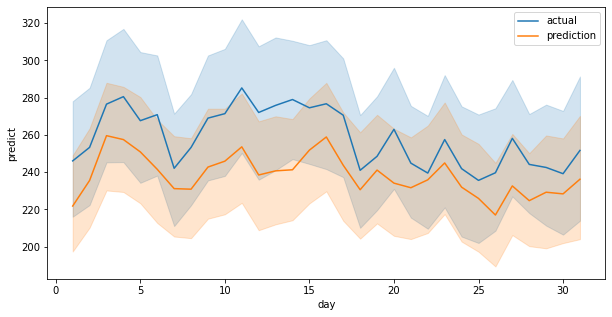

In [49]:
fig, ax = plt.subplots(figsize=(10,5)) 
sns.lineplot(x='day',y='count',data=bike_testing2,label='actual')
sns.lineplot(x='day',y='predict',data=bike_testing2,label='prediction')
plt.show()

Our model seems to fit the pattern as we can see from the graph. Because of the trend of bike-sharing rental is increasing from year 2011 to year 2012, we do not random split our dataset when creating the model. For every prediction that is above the actual, as we concern it is as okay as long as the number still in the interval range. Because when we supply a little bit more, it can be used as spare for undetected broken bike (such as flat tire or else). Also it can manage to adjust the increase of user that is not affected by features we include in this modeling